 **<big><center> Project 1: Logdanidis Pavlos 2071,Vasilopoulos Vasileios 2024**

\begin{exercise}
Ένα απλό πρόβλημα ελαχίστων τετραγώνων (ΕΤ)
\end{exercise}

## Python

The parameters are : 
a= -2.6356254837121007 
b= 0.14364618259889303 
c= 0.5514469631403579 
d= 3.2229403381058948 
e= -0.4328942702644502


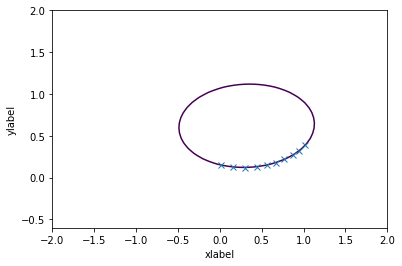

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


x = np.array([ 1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01 ])
y = np.array( [ 0.39, 0.32, 0.27, 0.22, 0.18 ,0.15, 0.13, 0.12, 0.13, 0.15 ])

A = np.column_stack((y**2,x*y,x,y,np.ones((x.size,1))))
b = x**2

c =la.lstsq(A,b,rcond=-1)[0]
print('The parameters are :','\na=',c[0],'\nb=',c[1],'\nc=',c[2],'\nd=',c[3],'\ne=',c[4])

plt.plot(x,y,'x')
plt.ylim((-0.6,2))
plt.xlim((-2,2))
plt.xlabel('xlabel')
plt.ylabel('ylabel')



mg_x=np.linspace(-1,2,50)
mg_y=np.linspace(-1,2,50)
XY = np.meshgrid(mg_x,mg_y)
xs=XY[0]
ys=XY[1]

z=c[0]*ys**2 + c[1]*xs*ys + c[2]*xs + c[3]*ys + c[4]*np.ones((xs.shape[0],1)) - xs**2


plt.contour(mg_x,mg_y,z,levels=0)
plt.show()



In [3]:
#new data

xp = x + np.random.uniform(-0.005,0.005,10)
yp = y + np.random.uniform(-0.005,0.005,10)


Ap = np.column_stack((yp**2,xp*yp,xp,yp,np.ones((xp.size,1))))
bp = xp**2

cp =la.lstsq(Ap,bp,rcond=-1)[0]
print('The new parameters are :','\na=',cp[0],'\nb=',cp[1],'\nc=',cp[2],'\nd=',cp[3],'\ne=',cp[4])


The new parameters are : 
a= -3.1707107963272954 
b= 0.36836782275363317 
c= 0.5214395002085869 
d= 3.286765084413433 
e= -0.4333990199174337


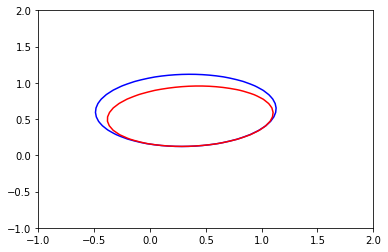

In [4]:
zp=cp[0]*ys**2 + cp[1]*xs*ys + cp[2]*xs + cp[3]*ys + cp[4]*np.ones((xs.shape[0],1)) - xs**2

plt.contour(mg_x,mg_y,z,levels=0,colors='blue')
plt.contour(mg_x,mg_y,zp,levels=0,colors='red')
plt.show()




In [5]:
precision = cp-c
print('Precision for each parameter \na:' , precision[0], "b: ",precision[1], "c: ", precision[2], "d: ", precision[3],
    "e: ", precision[4])

Precision for each parameter 
a: -0.5350853126151947 b:  0.22472164015474014 c:  -0.030007462931771034 d:  0.06382474630753832 e:  -0.0005047496529834716


In [6]:
la.cond(Ap)

644.2367764223463

As we can see the system has a high condition number , which is to be expected since a small change in x and y cause the curve to be a lot more different that in the beggining.

## R

The solution to the least squares problem is:
a:  -2.635625 b:  0.1436462 c:  0.551447 d:  3.22294 e:  -0.4328943

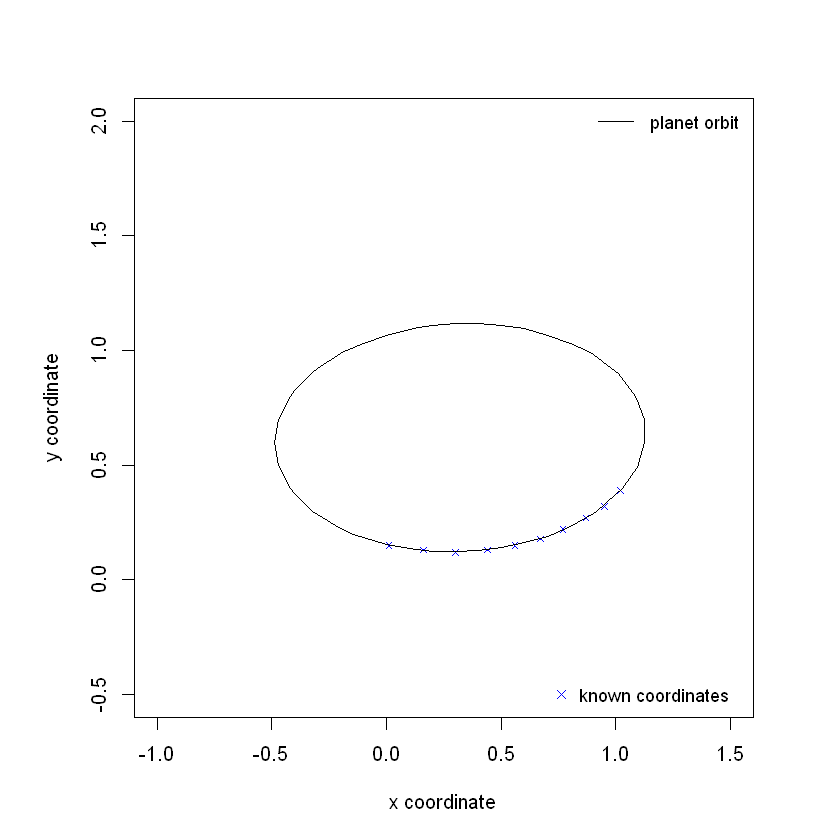

In [1]:
library("pracma")
library("matrixcalc")



#We create arrays of the known coordinates and then we perform QR decomposition, using the mldivide function from the pracma library, to get a least squares solution of the problem.
#```{r}
x <- c(1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01)
y <- c(0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15)

A <- cbind(y^2, x*y, x, y, array(1, c(length(x), 1)))
b <- x ^ 2
# calculate the parameters of the problem
parameters <- mldivide(A, b)
a = parameters[1]
b = parameters[2]
c = parameters[3]
d = parameters[4]
e = parameters[5]

cat("The solution to the least squares problem is:\na: ", a, "b: ", b, "c: ", c, "d: ", d,"e: ", e)


#We plot the calculated orbit to get a visualization of the solution to the problem.
#```{r}
xmin <- -1
xmax <- 1.5
ymin <- -0.5
ymax <- 2
mg_x <- seq(xmin, xmax, by=0.1)
mg_y <- seq(ymin, ymax, by=0.1)
XY <- meshgrid(mg_x, mg_y)
xs <- XY$X
ys <- XY$Y
z <- (a * ys ^ 2) + (b * xs * ys) + (c * xs) + (d * ys) + e - xs ^ 2
# transpose of z
z_t <- t(z)

# produce a square plot
par(pty="s")
plot(x=x, y=y, pch=4, cex=0.6, col='blue', xlim=c(xmin, xmax), ylim=c(ymin, ymax),
     xlab="x coordinate", ylab="y coordinate")
legend('topright', c("planet orbit"), lty=1, col=c('black'), bty='n', cex=0.9)
legend('bottomright', c("known coordinates"), pch=4, col=c('blue'), bty='n', cex=0.9)
contour(x=mg_x, y=mg_y, z_t, nlevels=1, drawlabels=FALSE, add=TRUE)

In [2]:
# set the random seed to get reproducible results, without loss of generality
set.seed(1)
# calculate the perturbed values of the original points
xp = x + runif(length(x), -0.005, 0.005)
yp = y + runif(length(y), -0.005, 0.005)

Ap <- cbind(yp^2, xp*yp, xp, yp, array(1, c(length(xp), 1)))
bp <- xp ^ 2
# calculate the parameters of the problem
parameters_p <- mldivide(Ap, bp)
a_p = parameters_p[1]
b_p = parameters_p[2]
c_p = parameters_p[3]
d_p = parameters_p[4]
e_p = parameters_p[5]

cat("The new solution is:\na: ", a_p, "b: ", b_p, "c: ", c_p, "d: ", d_p, "e: ", e_p)

The new solution is:
a:  -3.010052 b:  0.2260965 c:  0.5372656 d:  3.360569 e:  -0.4478634

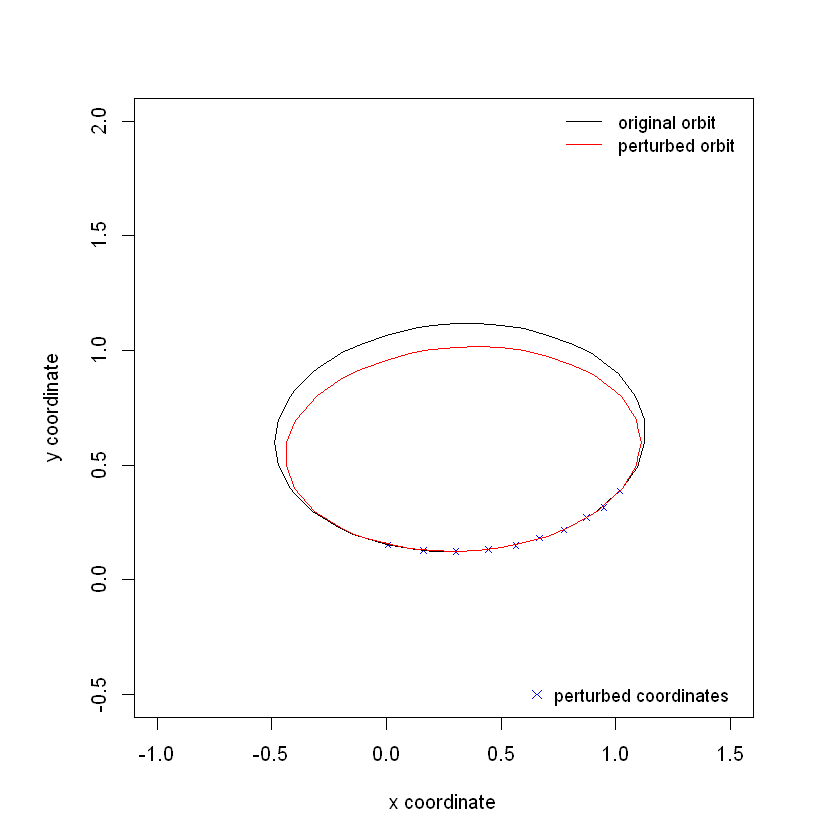

In [3]:
zp <- (a_p * ys ^ 2) + (b_p * xs * ys) + (c_p * xs) + (d_p * ys) + e_p - xs ^ 2
zp_t <- t(zp)

par(pty="s")
plot(x=xp, y=yp, pch=4, cex=0.6, col='blue', xlim=c(xmin, xmax), ylim=c(ymin, ymax),
     xlab="x coordinate", ylab="y coordinate")
legend('topright', c("original orbit", "perturbed orbit"), lty=1, col=c('black', 'red'),
       bty='n', cex=0.9)
legend('bottomright', c("perturbed coordinates"), pch=4, col=c('blue'), bty='n', cex=0.9)
contour(x=mg_x, y=mg_y, z_t, nlevels=1, drawlabels=FALSE, add=TRUE)
contour(x=mg_x, y=mg_y, zp_t, nlevels=1, col='red', drawlabels=FALSE, add=TRUE)

In [3]:
precision <- (parameters - parameters_p) / parameters
p_a = precision[1]
p_b = precision[2]
p_c = precision[3]
p_d = precision[4]
p_e = precision[5]

cat("The precision for each parameter is:\na: ", p_a, "b: ", p_b, "c: ", p_c, "d: ", p_d,
    "e: ", p_e)

The precision for each parameter is:
a:  -0.1420634 b:  -0.5739823 c:  0.02571661 d:  -0.04270274 e:  -0.03457921

In [4]:
#solutions_matrix <- rbind(t(parameters), t(parameters_p))
#condition_number <- kappa(solutions_matrix)
condition_number <- kappa(Ap)

cat("The condition number of the system : ", condition_number)

The condition number of the system :  759.7233

\begin{exercise}
Προσέγγιση ελαχίστων τετραγώνων και λύση υποπροσδιορισμένων
συστημάτων
\end{exercise}



## Octave

### Problem 1

#### QR

ans = R squared is: 0.536946
ans = The norm of absolute error is: 1.497250
ans = The norm of residuals is: 1.612292

ans = R squared is: 0.903094
ans = The norm of absolute error is: 0.684942
ans = The norm of residuals is: 2.090956

ans = R squared is: 0.995839
ans = The norm of absolute error is: 0.139236
ans = The norm of residuals is: 2.195700

ans = R squared is: 0.746192
ans = The norm of absolute error is: 0.402515
ans = The norm of residuals is: 1.900657



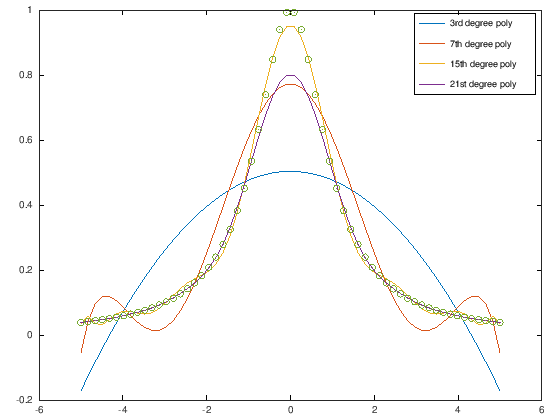

In [1]:
n = 4; %polynomial degree 3
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[ A x.^(i-1) ]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))


n = 8; %polynomial degree 7
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y; 
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))


n = 16; %polynomial degree 15
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))



n = 22; %polynomial degree 21
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition
y_hat = A*c;
plot(x,y_hat,'-')
hold on;

%R square test
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))
plot(x,y,'o')
legend('3rd degree poly', '7th degree poly', '15th degree poly', '21st degree poly')


#### SVD

ans = R squared is: 0.536946
ans = The norm of absolute error is: 1.497250
ans = The norm of residuals is: 1.612292

ans = R squared is: 0.903094
ans = The norm of absolute error is: 0.684942
ans = The norm of residuals is: 2.090956

ans = R squared is: 0.899285
ans = The norm of absolute error is: 0.697584
ans = The norm of residuals is: 2.086542

ans = R squared is: 0.269678
ans = The norm of absolute error is: 1.965691
ans = The norm of residuals is: 1.142618



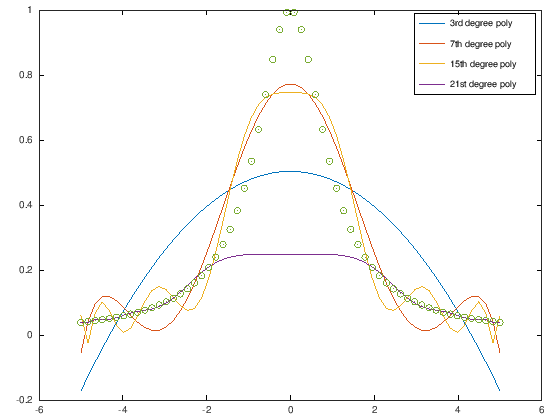

In [2]:
n = 4; %polynomial degree 3
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2) 
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))




n = 8; %polynomial degree 7
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))




n = 16; %polynomial degree 15
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2) 
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))




n = 22; %polynomial degree 21
x= linspace(-5,5,60);
x = x';
y =  1 ./ (1 + (x.^2));
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 
plot(x,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))



plot(x,y,'o')
legend('3rd degree poly', '7th degree poly', '15th degree poly', '21st degree poly')

### Problem 2

#### QR

ans = R squared is: 0.028987
ans = The norm of absolute error is: 619.409858
ans = The norm of residuals is: 107.020691

ans = R squared is: 0.065819
ans = The norm of absolute error is: 607.548836
ans = The norm of residuals is: 161.265061

ans = R squared is: 1.356967
ans = The norm of absolute error is: 992.297522
ans = The norm of residuals is: 732.234546

ans = R squared is: 0.115151
ans = The norm of absolute error is: 606.475599
ans = The norm of residuals is: 213.304038



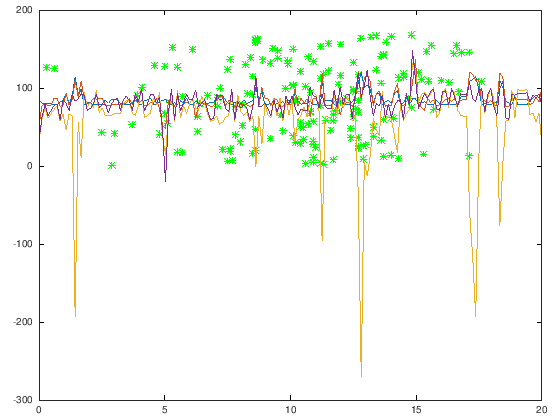

In [3]:
DATA = load("-ascii", "data.txt");
x = DATA(:,1);
y = DATA(:,2);
plot(x,y,'*g')
hold on;
xx = linspace(0,20,168);

n = 4; %polynomial degree 3
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[ x.^(i-1) A]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;

plot(xx,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))




n = 8; %polynomial degree 7
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[ x.^(i-1) A]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;
plot(xx,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))



n = 16; %polynomial degree 3
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[ x.^(i-1) A]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;
plot(xx,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))



n = 21; %polynomial degree 3
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[ x.^(i-1) A]; %generates the Van der Monde matrix
end

a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition

y_hat = A*c;
plot(xx,y_hat,'-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))

#### SVD

ans = R squared is: 0.028987
ans = The norm of absolute error is: 619.409858
ans = The norm of residuals is: 107.020691

ans = R squared is: 0.063093
ans = The norm of absolute error is: 607.616361
ans = The norm of residuals is: 157.890694

ans = R squared is: 0.072274
ans = The norm of absolute error is: 614.601119
ans = The norm of residuals is: 168.988731

ans = R squared is: 0.235401
ans = The norm of absolute error is: 656.191322
ans = The norm of residuals is: 304.978556



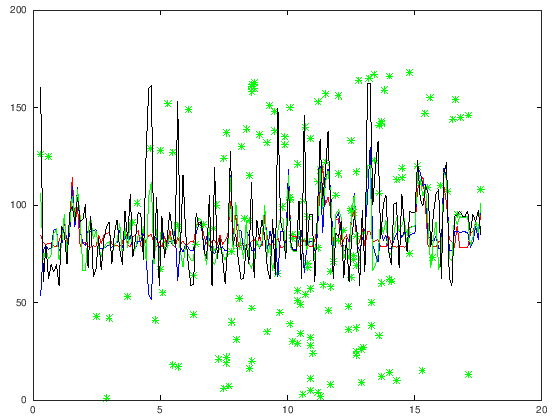

In [4]:
DATA = load("-ascii", "data.txt");
x = DATA(:,1);
y = DATA(:,2);
plot(x,y,'*g')
hold on;
mval = 169;
xx = linspace(min(x),max(x),168);
 
n = 4; %polynomial degree 3
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd


y_hat = A*c; 
plot(xx,y_hat,'r-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2) 
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))



n = 8; %polynomial degree 7
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 

plot(xx,y_hat,'b-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2) 
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))





n = 16; %polynomial degree 15
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 
plot(xx,y_hat,'g-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2) 
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))





n = 22; %polynomial degree 21
A=[]; %defines Van der Monde matrix
for i=1:n
    A=[A x.^(i-1)]; %generates the Van der Monde matrix
end
a=A'*A;
b = A' * y;    
[U,S,V] = svd(a); %svd decomposition
z = U'*b;
xd = pinv(S) * z;
c = V*xd; %sol of the lsq using svd
y_hat = A*c; 
plot(xx,y_hat,'k-')
hold on;
y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2) 
sprintf('The norm of absolute error is: %f',norm(y_hat - y))
sprintf('The norm of residuals is: %f\n',norm(y_hat - y_mean))

#### Problem 2 Part 2 

ans = R squared is: 3.018980


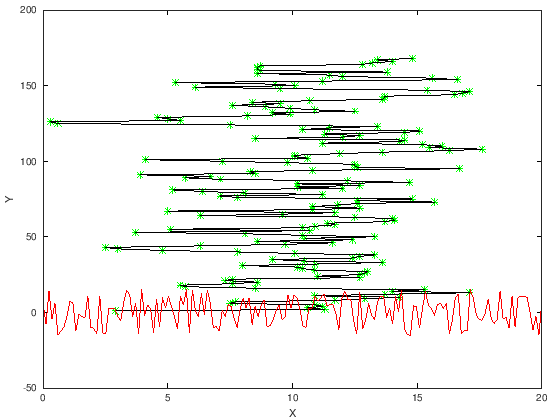

In [5]:

DATA = load("-ascii", "data.txt");
x = DATA(:,1);
y = DATA(:,2);
xx = linspace(0,20,168);


A = [ cos(pi*x/3) , sin(pi*x/3) , sin(pi*x)  ]; 
a=A'*A;
b=A'*y;  
[Q,R] = qr(a); % QR decomposition
c = inv(R) * Q' *b; %solutions of the QR decomposition
y_hat = c(1)* cos(pi*x/3) + c(2) *sin(pi*x/3) + c(3)* sin(pi*x);



plot(x,y,'g*');
xlabel ("X")
ylabel ("Y")
hold on;
plot(x,y,'-k')
hold on;
plot(xx,y_hat,'r');


y_mean = mean(y);
Sum1=sum((y_hat-y_mean).^2);
Sum2=sum((y-y_mean).^2);
sprintf('R squared is: %f',Sum1/Sum2)

## R

### Problem 1

#### QR


R squared of 1st degree polynomial is  0.5369458
The norm of absolute error is:  1.49725
The norm of residuals is:  10.75059 2
R squared of 8th degree polynomial is  0.903094
The norm of absolute error is:  0.6849418
The norm of residuals is:  14.34916 2
R squared of 15th degree polynomial is  NA

ERROR: Error in svd(x, nu = 0L, nv = 0L): infinite or missing values in 'x'


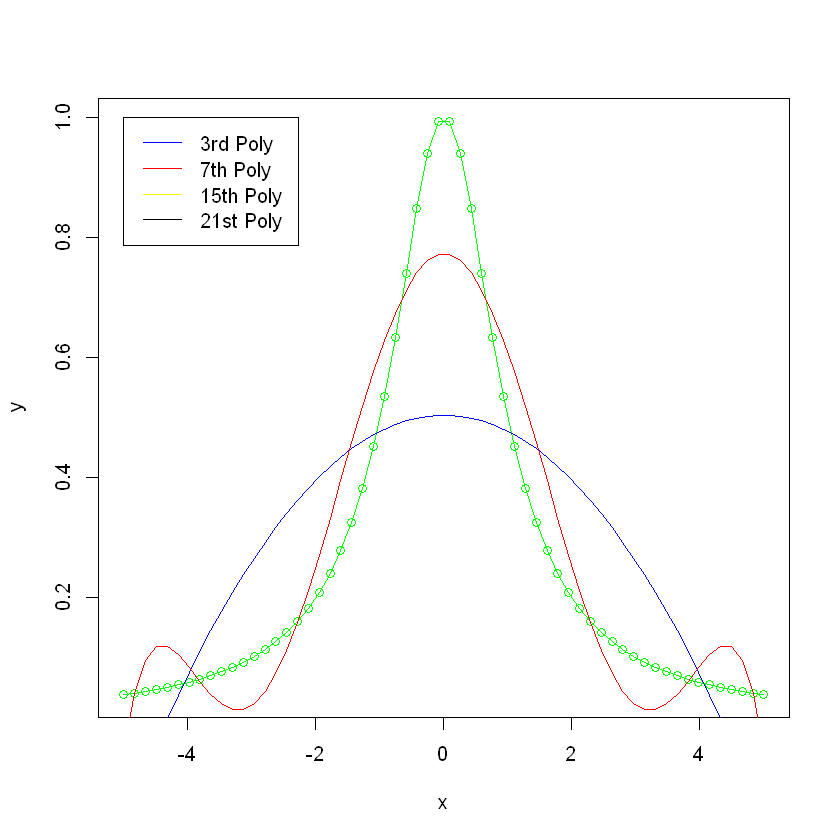

In [6]:
library("matrixcalc")
library("pracma")
library("corpcor")
library("ggplot2")
n <- 4 #polynomial degree 3
x <- c(linspace(-5,5,60))
y <- 1/(1+ x^2)
A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)

y_hat = A %*% qr_coef
plot(x,y,type="o",col="green")


lines(x,y_hat,type="l", col="blue")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 1st degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))




n <- 8 #polynomial degree 7
x <- c(linspace(-5,5,60))
y <- 1/(1+ x^2)
A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)
y_hat = A %*% qr_coef

lines(x,y_hat,type="l", col="red")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 8th degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))
legend(-5,1.0, legend=c("3rd Poly", "7th Poly","15th Poly", "21st Poly"),
       col=c("blue", "red","yellow", "black"),lty=1:1)




n <- 16 #polynomial degree 15
x <- c(linspace(-5,5,60))
y <- 1/(1+ x^2)
A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)
y_hat = A %*% qr_coef

lines(x,y_hat,type="l", col="yellow")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 15th degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))






n <- 22 #polynomial degree 21
x <- c(linspace(-5,5,60))
y <- 1/(1+ x^2)
A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)

y_hat = A %*% qr_coef
lines(x,y_hat,type="l", col="black")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 21st degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))

#### SVD

### Problem 2

#### QR


R squared of 1st degree polynomial is  0.02898707
The norm of absolute error is:  619.4099
The norm of residuals is:  974.0286 2
R squared of 8th degree polynomial is  NA

ERROR: Error in svd(x, nu = 0L, nv = 0L): infinite or missing values in 'x'


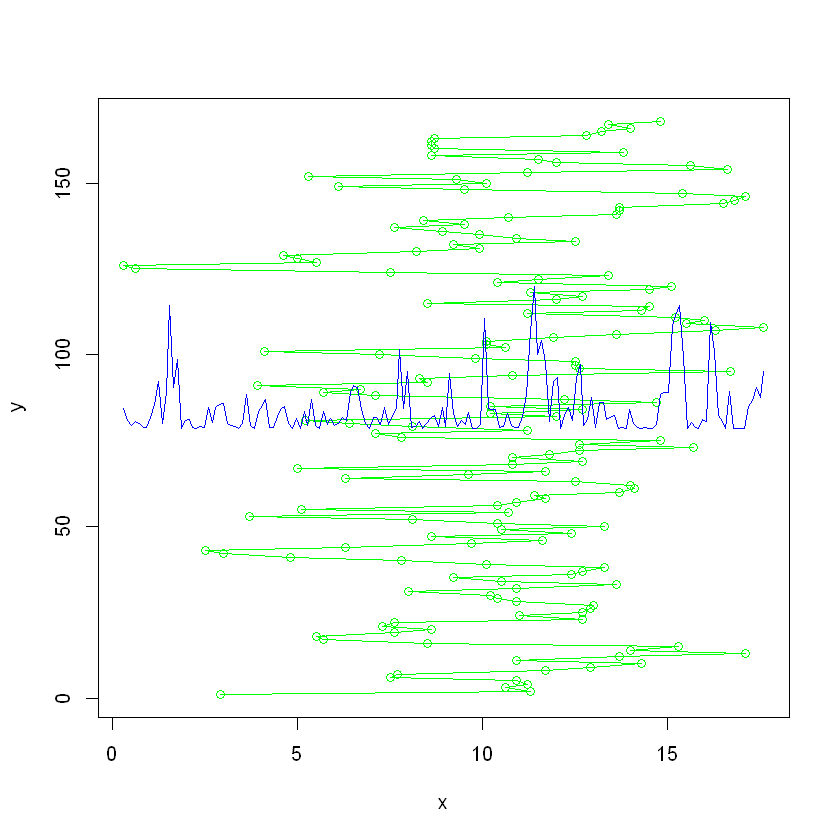

In [7]:
my_data <- read.table("data.txt")
x <- as.matrix(my_data[1])
y <- as.matrix(my_data[2])
xx <- c(linspace(min(x),max(x),168))


n <- 4 #degree 3
A <- matrix(, nrow = length(x), ncol = 0)
for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)

y_hat = A %*% qr_coef
plot(x,y,type="o",col="green")

lines(xx,y_hat, col="blue",type="l", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 1st degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))





n <- 8 #degree 7
A <- matrix(, nrow = length(x), ncol = 0)
for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)

y_hat = A %*% qr_coef

lines(xx,y_hat, col="red",type="l", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 8th degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))



n <- 15 #degree 16
A <- matrix(, nrow = length(x), ncol = 0)
for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)

y_hat = A %*% qr_coef

lines(xx,y_hat, col="yellow",type="l", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 15th degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))





n <- 22 #degree 21
A <- matrix(, nrow = length(x), ncol = 0)
for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
qr_coef = qr.coef(qr(a), b)

y_hat = A %*% qr_coef

lines(xx,y_hat,type="l", col="black", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 21st degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))

#### SVD


R squared of 1st degree polynomial is  0.02898707
The norm of absolute error is:  619.4099
The norm of residuals is:  974.0286 2
R squared of 8th degree polynomial is  0.119317
The norm of absolute error is:  634.5523
The norm of residuals is:  1858.284 2
R squared of 15th degree polynomial is  1.096184
The norm of absolute error is:  887.145
The norm of residuals is:  6865.546 2
R squared of 21st degree polynomial is  2.257027
The norm of absolute error is:  1075.458
The norm of residuals is:  11626.37 2

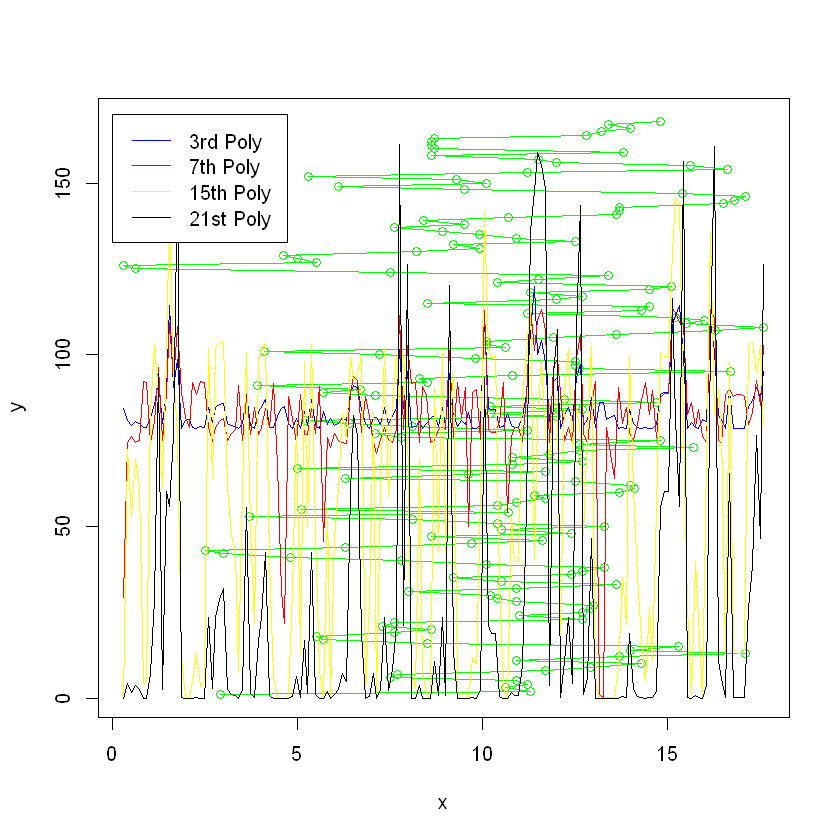

In [8]:
my_data <- read.table("data.txt")
x <- as.matrix(my_data[1])
y <- as.matrix(my_data[2])
xx <- c(linspace(min(x),max(x),168))

n <- 4 #polynomial degree 3

A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
a.svd = svd(a) #svd decomposition
z = t(a.svd$u) %*% b
k = pseudoinverse(diag(a.svd$d)) %*% z
c = a.svd$v %*% k # sols of the lsq using svd
y_hat = A %*% c 
plot(x,y,type="o", col="green")
#y_hat = A %*% svd_coef

lines(xx,y_hat,type="l", col="blue", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 1st degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))





n <- 8 #polynomial degree 7

A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
a.svd = svd(a) #svd decomposition
z = t(a.svd$u) %*% b
k = pseudoinverse(diag(a.svd$d)) %*% z
c = a.svd$v %*% k # sols of the lsq using svd
y_hat = A %*% c 

#y_hat = A %*% svd_coef

lines(xx,y_hat,type="l", col="red", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 8th degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))






n <- 15 #polynomial degree 16

A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
a.svd = svd(a) #svd decomposition
z = t(a.svd$u) %*% b
k = pseudoinverse(diag(a.svd$d)) %*% z
c = a.svd$v %*% k # sols of the lsq using svd
y_hat = A %*% c 

#y_hat = A %*% svd_coef

lines(xx,y_hat,type="l", col="yellow", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 15th degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))





n <- 22 #polynomial degree 21

A <- matrix(, nrow = length(x), ncol = 0)

for (i in 1:n){
    A = cbind( A, x^(i-1))
}

a = t(A)%*% A
b = t(A) %*% y
a.svd = svd(a) #svd decomposition
z = t(a.svd$u) %*% b
k = pseudoinverse(diag(a.svd$d)) %*% z
c = a.svd$v %*% k # sols of the lsq using svd
y_hat = A %*% c 

#y_hat = A %*% svd_coef

lines(xx,y_hat,type="l", col="black", xlab = "", ylab = "",xaxs="i", yaxs="i")
y_mean = mean(y);
Sum1=sum((y_hat-mean(y)) ^ 2);
Sum2=sum((y-y_mean)^2);
cat('\nR squared of 21st degree polynomial is ',Sum1/Sum2)
cat('\nThe norm of absolute error is: ',norm((y_hat - y), type = c("2")))
cat('\nThe norm of residuals is: ',norm((y_hat - y_mean)),type = c("2"))

legend(0,170, legend=c("3rd Poly", "7th Poly","15th Poly", "21st Poly"),
       col=c("blue", "red","yellow", "black"),lty=1:1)

### Problem 2 Part 2

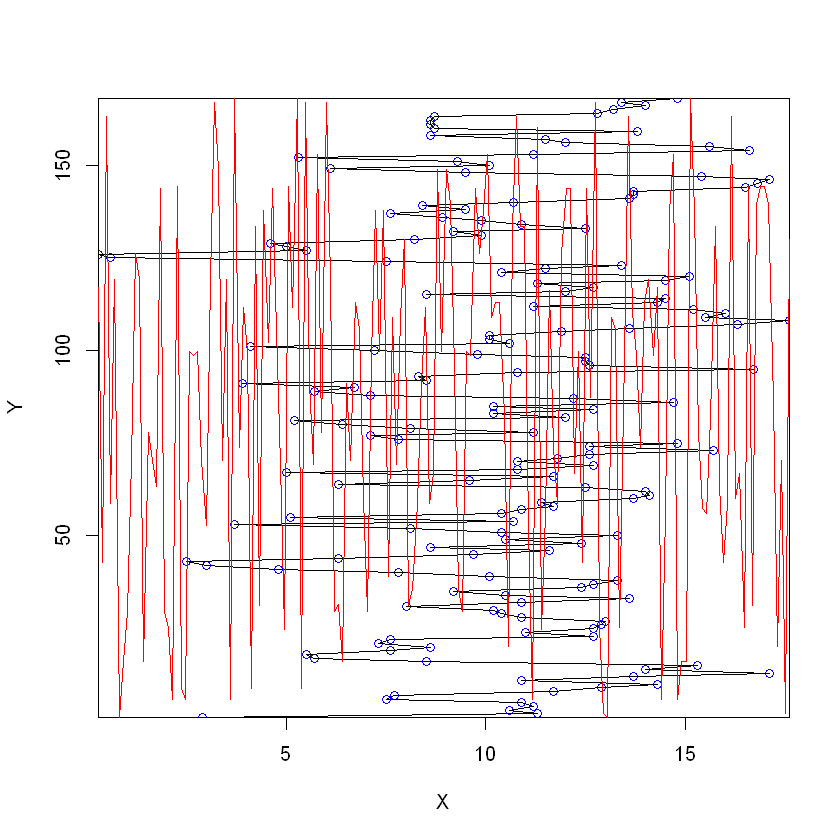

In [9]:
my_data <- read.table("data.txt")
x <- as.matrix(my_data[1])
y <- as.matrix(my_data[2])
xx <- c(linspace(min(x),max(x),168))
nls.mod <-nls(y~ a*cos(pi * x/ 3) + b*sin(pi* x/ 3) + c*sin(pi*x), start=list(a = 0, b = 0, c=0))
co <- coef(nls.mod)
Func <- (co["a"]*cos(pi * x/ 3) + co["b"]*sin(pi* x/ 3) + co["c"]*sin(pi*x))

plot(x,y, col="blue", xlab = "X", ylab = "Y",xaxs="i", yaxs="i")
lines(x,y,type = "l", col="black", xlab = "", ylab = "",xaxs="i", yaxs="i")

par(new = TRUE)
plot(xx,Func ,type = "l",col = "red", axes = FALSE, xlab = "", ylab = "",xaxs="i", yaxs="i")

## Python

### Problem 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt   
import numpy.linalg as la
import pandas as pd

#### QR

In [8]:
def qr(x,y,degree):
    n = degree
    xx = np.linspace(min(x),max(x),x.size)
    A = np.vander(x,n, increasing=True)
    a = np.dot(A.T,A) 
    b = np.dot(A.T,y)

    q, r = la.qr(a)
    c = np.dot(np.dot(np.linalg.inv(r), q.T),b)

    y_hat = np.dot(A,c)
    if (n==4): #3rd degree polynomial
        plt.plot(xx,y_hat,'r-')
    
    elif (n==8): #7th degree polynomial
        plt.plot(xx,y_hat,'b-')
    
    elif (n==16): #15th degree polynomial
        plt.plot(xx,y_hat,'m-')
    
    elif (n==22): #21st degree polynomial
        plt.plot(xx,y_hat,'k-')
    else:
        plt.plot(xx,y_hat,'p-')
    
    return c


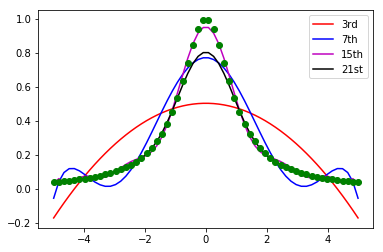

In [9]:
x = np.linspace(-5, 5, 60)
y = 1/(1+x**2)
qr(x,y,4)
qr(x,y,8)
qr(x,y,16)
qr(x,y,22)


plt.legend( ('3rd', '7th', '15th','21st'))
plt.plot(x,y,'go')
plt.show()

#### SVD

In [10]:
def SVD(x,y,degree):
    
    xx = np.linspace(min(x),max(x),x.size)
    n = degree
    
    A = np.vander(x,n, increasing=True)
    a = np.dot(A.T,A) 
    b = np.dot(A.T,y)

    u, s, v = la.svd(a, full_matrices=True)
    z = np.dot(u.T,b)
    k = np.dot(la.pinv(np.diag(s)),z)
    c = np.dot(v,k)
    

    y_hat = np.dot(A,c)
    if (n==4): #3rd degree polynomial
        plt.plot(xx,y_hat,'r-')
    
    elif (n==8): #7th degree polynomial
        plt.plot(xx,y_hat,'b-')
    
    elif (n==16): #15th degree polynomial
        plt.plot(xx,y_hat,'m-')
    
    elif (n==22): #21st degree polynomial
        plt.plot(xx,y_hat,'k-')
    else:
        plt.plot(xx,y_hat,'p-')

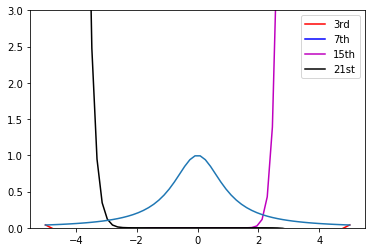

In [11]:
x = np.linspace(-5, 5, 60)
y = 1/(1+x**2)

SVD(x,y,4)
SVD(x,y,8)
SVD(x,y,16)
SVD(x,y,22)

plt.ylim((0,3))
plt.legend( ('3rd', '7th', '15th','21st'))
plt.plot(x,y)
plt.show()

### Problem 2

#### QR

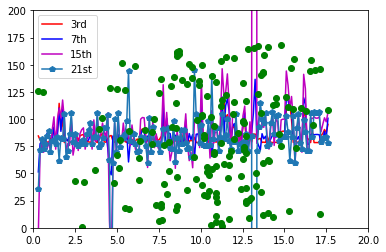

In [12]:
df = np.loadtxt('data.txt')
x = df[:,0]
y = df[:,1]


qr(x,y,4)
qr(x,y,8)
qr(x,y,16)
qr(x,y,21)

plt.plot(x,y,'go')
plt.axis((0,20,0,200))
plt.legend( ('3rd', '7th', '15th','21st'))
plt.show()

#### SVD

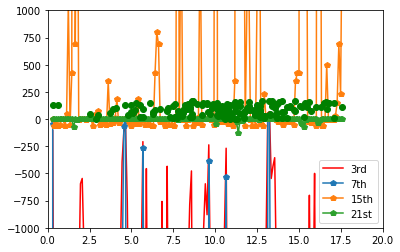

In [13]:
df = np.loadtxt('data.txt')
x = df[:,0]
y = df[:,1]




SVD(x,y,4)
SVD(x,y,7)
SVD(x,y,15)
SVD(x,y,21)




plt.plot(x,y,'go')
plt.axis((0,20,-1000,1000))
plt.legend( ('3rd', '7th', '15th','21st'))
plt.show()

### Problem 2 Part 2

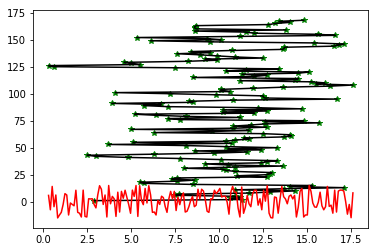

In [14]:
df = np.loadtxt('data.txt')
x = df[:,0]
y = df[:,1]
xx = np.linspace(min(x), max(x), 168)
#A = np.array([ np.cos(np.pi*x/3) , np.sin(np.pi*x/3) , np.sin(np.pi*x)  ])
cos = np.array(np.cos(np.pi*x/3))
sin1 = np.array((np.sin(np.pi*x/3)))
sin2 = np.array((np.sin(np.pi*x)))
A = np.column_stack((cos,sin1,sin2))                
                

a = np.dot(A.T,A) 
b = np.dot(A.T,y)

q, r = la.qr(a)
c = np.dot(np.dot(np.linalg.inv(r), q.T),b)

y_hat = c[0] * np.cos(np.pi*x/3) + c[1]*np.sin(np.pi*x/3) + c[2] * np.sin(np.pi*x)

plt.plot(x,y,'g*')
plt.plot(x,y,'k-')
plt.plot(xx,y_hat,'r-')
plt.show()

# Linear Regression 

C:\Users\Paul\Downloads\PSEs\data.txt

    
    
C:\Users\Paul\Downloads\PSEs\data_new.csv

We are going to apply linear regression to the two given datasets using the **Moore-Penrose pseudoinverse** approach.Then we are going to plot the given (x,y) points as well as the regression line we computed and observe how well it fits the data.To conclude the analysis we are going to calculate **R squared** to see how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

## Python

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def  linear_regression(df):
    
    copy = df.copy()
    A =copy.values
    x = A[:,0]
    y = A[:,1]


    #Find coefficients w
    phi_zero = x**0
    phi_one = x**1
    phi = np.column_stack((phi_zero,phi_one))
    w = np.linalg.pinv(phi).dot(y)

    #scatter plot of data points

    plt.scatter(x,y)

    #Solve using the pseudoinverse

    Y = np.sort(x) 
    #the positions of the sorted elements in the unsorted array
    I = np.argsort(x) 

    y_line =np.dot(phi[I,:] ,w)
    plt.plot(x[I], y_line,'g')
    plt.show()

    #Calculate R squared
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    Sum1=np.sum((y_line-y_mean)**2)
    Sum2=np.sum((y-y_mean)**2)

    print("R squared =",Sum1/Sum2) 
    

### CSV file

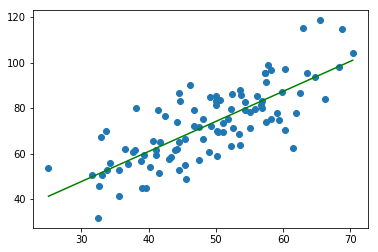

R squared = 0.5986557915386618


In [16]:
df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv',header=None)
linear_regression(df)

Relatively good fit on the data points and R squared comes out a decent 0.59.All makes sense.

### TXT File

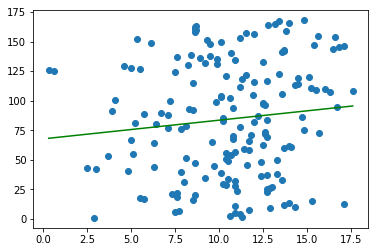

R squared = 0.012706980169839581


In [17]:
df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data.txt',sep='\s+',header=None)
linear_regression(df)

As we can see the data points dont really seem to follow a linear trend so our regression line doesnt fit very well.
R squared is expected to be low here and it is.

## R

In [10]:
library("pracma")
library("matrixcalc")
library("corpcor")
library("ggplot2")


linear_regression <- function(df ){
A <-data.matrix(df)

x<-A[,1]
y<-A[,2]

#Find coefficients w

phi_zero <- x^0
phi_one <- x^1
phi<- cbind(phi_zero,phi_one)
w<-pseudoinverse(phi)%*%y

#scatter plot of data points
plot(x,y,col='blue')

#the positions of the sorted elements in the unsorted array
I =order(x)

#y_line =np.dot(phi[I,:] ,w)
y_line=phi[I,]%*%w
lines(x[I],y_line,col='green')

#Calculate R squared
x_mean =mean(x)
y_mean =mean(y)

Sum1=sum((y_line-y_mean)^2)
Sum2=sum((y-y_mean)^2)
cat("R squared =",Sum1/Sum2) 
    
    
    
}

### CSV file

R squared = 0.5986558

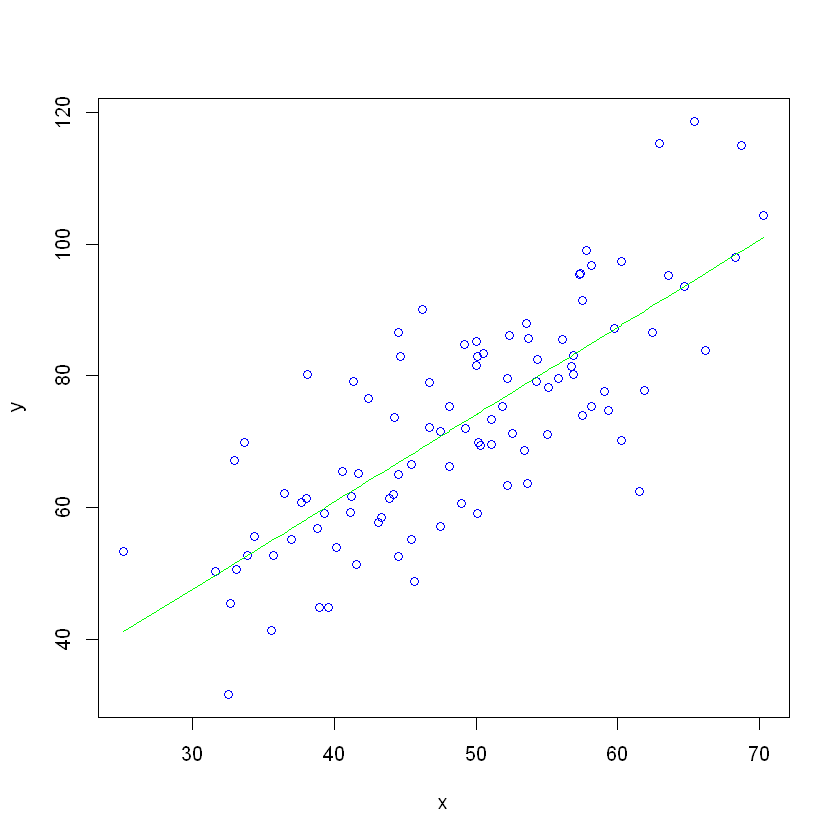

In [11]:
df <- read.csv(file="C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv", header=FALSE, sep=",")
linear_regression(df)

### TXT file

R squared = 0.01270698

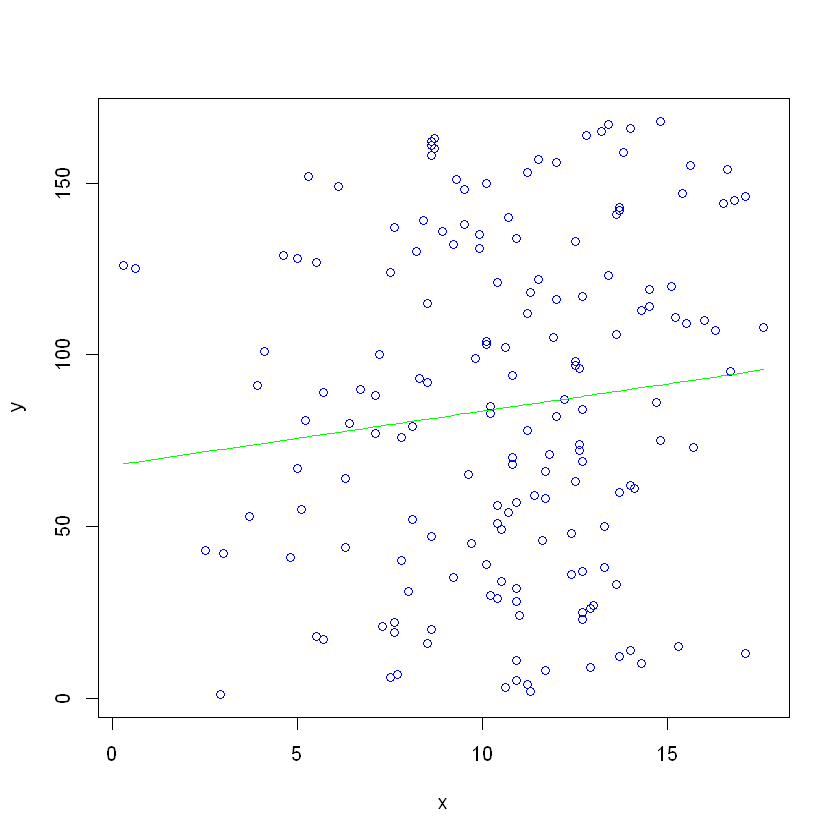

In [12]:
df <- read.csv(file="C:\\Users\\Paul\\Downloads\\PSEs\\data.txt", header=FALSE,sep = "")
linear_regression(df)

# Generalization and Evaluation

We are going to train our model with a fraction of our data points (80%) and evaluate it on the rest (20%) to see how well our model generalizes, meaning how accurately it can predict outputs for future inputs.

## Python

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def train_test(df):

    copy = df.copy()
    A =copy.values

    #Split to train and test set 
    split = np.floor(A.shape[0]*0.2).astype(int)
    test_set = A[0:split,:] #first 20 percent of observations
    train_set = A[split:,:] #rest 80 percent of observations

    x_test=test_set[:,0]
    y_test=test_set[:,1]
    x_train =train_set[:,0]
    y_train =train_set[:,1]



    #calculate coefficients using training set
    phi_train = np.column_stack((x_train**0,x_train**1))
    w = np.linalg.pinv(phi_train).dot(y_train)

    #evaluate on test set
    phi_test = np.column_stack((x_test**0,x_test**1))
    y_test_predicted = phi_test.dot(w)

    I = np.argsort(x_test) 


    #plot data points
    plt.scatter(x_test[I], y_test[I],label='test points')
    plt.scatter(x_train,y_train,marker='.',c='r',label='train points')
    #plot predicted points
    plt.plot(x_test[I],y_test_predicted[I],'g',label='regression line')
    plt.legend()
    plt.show()
    

    print('MSE test :',np.sum((y_test-y_test_predicted)**2) / y_test.shape[0])
    print('MSE train :',np.sum((y_train-phi_train.dot(w))**2) / y_train.shape[0])

    #Calculate R squared
    x_mean = np.mean(x_test)
    y_mean = np.mean(y_test)

    Sum1=np.sum((y_test_predicted-y_mean)**2)
    Sum2=np.sum((y_test-y_mean)**2)

    print("R squared =",Sum1/Sum2) 


### CSV file

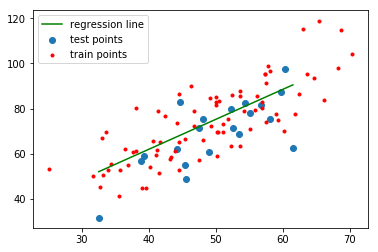

MSE test : 132.64265463068574
MSE train : 106.33560906961716
R squared = 0.6271158172181766


In [19]:
df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv',header=None)
train_test(df)

As we can see, the line fits our test data decenly enough and R squared comes out 0.62.The mean squared error from the test set is pretty high though , but its similar to the one from the train set which means our model generalizes prety well.

### TXT file

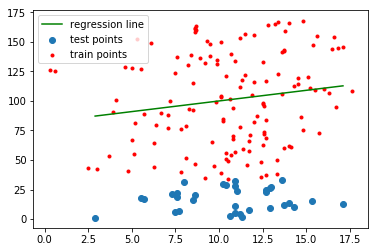

MSE test : 7165.518316336617
MSE train : 1477.5566510681188
R squared = 78.14321312109386


In [20]:
df1=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data.txt',sep='\s+',header=None)
train_test(df1)

Here both MSE and R squared are absurdly high.MSE test is so much higher than MSE train because we happen to evaluate the model on test points that are all a lot farther away from the line.This is a byproduct of the structure of the data set since the second column is filled with evenly spaced numbers from 1 to 168.

## R

In [13]:
library("pracma")
library("matrixcalc")
library("corpcor")
library("ggplot2")

train_test <- function(df){ 
    

    A <-data.matrix(df)

    #Split to train and test set 
    split<-floor(dim(A)[1]*0.2)
    test_set<-A[1:split,]
    train_set <- A[-1:-split,]

    x_test<-test_set[,1]
    y_test<-test_set[,2]
    x_train<-train_set[,1]
    y_train<-train_set[,2]

     #calculate coefficients using training set

    phi_zero <- x_train^0
    phi_one <- x_train^1
    phi_train<- cbind(phi_zero,phi_one)
    w<-pseudoinverse(phi_train)%*%y_train

    #evaluate on test set
    phi_zero <- x_test^0
    phi_one <- x_test^1
    phi_test<- cbind(phi_zero,phi_one)

    y_line<-phi_test%*%w

    #the positions of the sorted elements in the unsorted array
    I <-order(x_test)

    #scatter plot of data points
    xlim1=x_test[I[1]]
    xlim2=x_test[I[length(x_test)]]
    plot(x_test[I],y_test[I],col='blue',xlim=c(xlim1, xlim2), ylim=c(0, 120))
    

    lines(x_test[I],y_line[I],col='green')



    #Calculate R squared
    x_mean =mean(x_test)
    y_mean =mean(y_test)

    Sum1=sum((y_line-y_mean)^2)
    Sum2=sum((y_test-y_mean)^2)
    cat("R squared =",Sum1/Sum2) 
}

### CSV file

R squared = 0.6271158

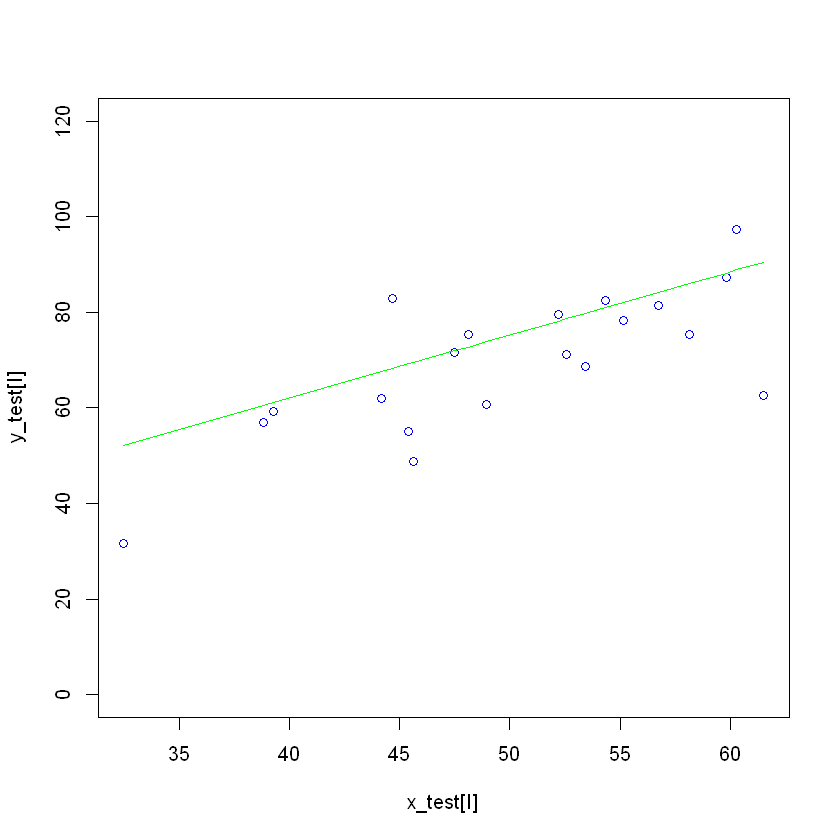

In [14]:
df <- read.csv(file="C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv", header=FALSE, sep=",")
train_test(df)

### TXT file

R squared = 78.14321

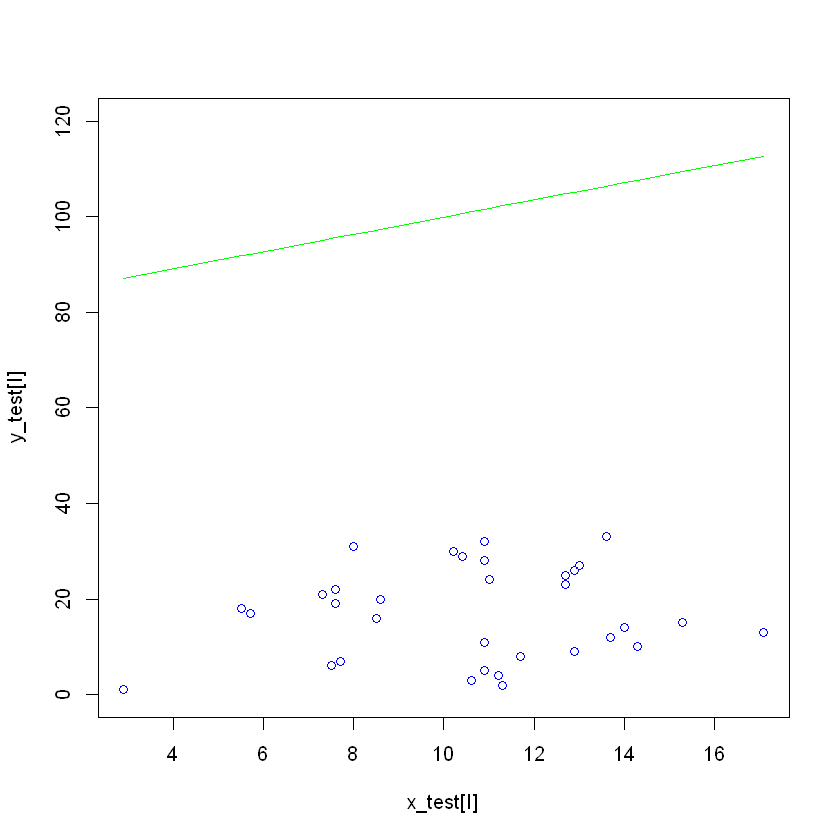

In [15]:
df <- read.csv(file="C:\\Users\\Paul\\Downloads\\PSEs\\data.txt", header=FALSE,sep = "")

train_test(df)

# Cross-validation

Cross-validation provides a framework for creating several train/test splits and
guaranteeing that each data point is in the test set at least once. 

## Python

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

split_assingment_matrix = None#

def cross_validate(df):
    global split_assingment_matrix#its global for testing
    A =df.values

    FOLDS=10

    batch_size=int(A.shape[0]/FOLDS)

    x=A[:,0]
    y=A[:,1]

    #create plit assignment matrix
    split_assingment_matrix = np.zeros((A.shape[0],FOLDS))
    group_start=0;#start for first group
    for i in range(0,FOLDS):
       #calculate end for this group
        group_end = (i+1)*batch_size

        split_assingment_matrix[group_start:group_end,i]=1

        group_start= group_end 

    #
    MSE=np.zeros((FOLDS,1))
    for i in range(0,FOLDS):
        test_indexes =np.where(split_assingment_matrix[:,i]==1)  
        train_indexes =np.where(split_assingment_matrix[:,i]==0)
        x_test= x[test_indexes]
        x_train= x[train_indexes]
        y_test= y[test_indexes]
        y_train= y[train_indexes]

        #calculate coefficients using training set
        phi_train = np.column_stack((x_train**0,x_train**1))
        w = np.linalg.pinv(phi_train).dot(y_train)

        #evaluate on test set
        phi_test = np.column_stack((x_test**0,x_test**1))
        y_test_predicted = phi_test.dot(w)

        MSE[i]=np.sum((y_test-y_test_predicted)**2) / y_test.shape[0]
        
    print('MSE mean :',np.mean(MSE))
    print('MSE std :',np.std(MSE))
    plt.bar(np.arange(0,FOLDS),MSE[:,0])
    


### CSV file

MSE mean : 115.81374332432168
MSE std : 30.304611232505177


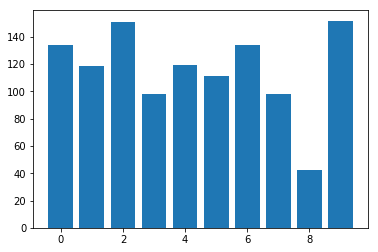

In [22]:
df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv',header=None)
cross_validate(df)

Mean MSE from all folds is similar to the MSE we had with our first train-test plit which means that our data is homogeneous.

### TXT file

MSE mean : 2637.6433466513663
MSE std : 2333.2826872012733


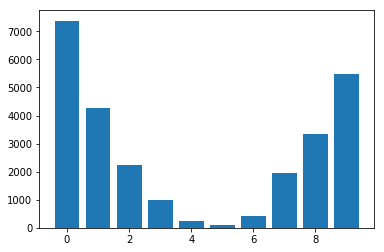

In [23]:
df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data.txt',sep='\s+',header=None)
cross_validate(df)

As you can clearly see , we get the lowest possible MSE when our test points are chosen to be the middle values of the data set.Let's see why that is.

### TXT file for middle test points

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def train_test(df):

    copy = df.copy()
    A = copy.values
    x=A[:,0]
    y=A[:,1]
    
    batch_size=int(A.shape[0]/10)
    #create plit assignment matrix
    split_assingment_matrix = np.zeros((A.shape[0],10))
    group_start=0;#start for first group
    for i in range(0,10):
       #calculate end for this group
        group_end = (i+1)*batch_size
        split_assingment_matrix[group_start:group_end,i]=1
        group_start= group_end 

    #Split to train and test set 
    test_indexes =np.where(split_assingment_matrix[:,5]==1)  #Get the middle points for testing
    train_indexes =np.where(split_assingment_matrix[:,5]==0) #Get the rest for training
    x_test= x[test_indexes]
    x_train= x[train_indexes]
    y_test= y[test_indexes]
    y_train= y[train_indexes]

    #I = np.argsort(x) 

    #calculate coefficients using training set
    phi_train = np.column_stack((x_train**0,x_train**1))
    w = np.linalg.pinv(phi_train).dot(y_train)

    #evaluate on test set
    phi_test = np.column_stack((x_test**0,x_test**1))
    y_test_predicted = phi_test.dot(w)

    I = np.argsort(x_test) 


    #plot data points
    plt.scatter(x_test[I], y_test[I],label='test points')
    plt.scatter(x_train,y_train,c='r',marker='.',label='train points')
    #plot predicted points
    plt.plot(x_test[I],y_test_predicted[I],'g',label='regression line')
    plt.legend()
    plt.show()


    print('MSE test :',np.sum((y_test-y_test_predicted)**2) / y_test.shape[0])
    print('MSE train :',np.sum((y_train-phi_train.dot(w))**2) / y_train.shape[0])

    #Calculate R squared
    x_mean = np.mean(x_test)
    y_mean = np.mean(y_test)

    Sum1=np.sum((y_test_predicted-y_mean)**2)
    Sum2=np.sum((y_test-y_mean)**2)

    print("R squared =",Sum1/Sum2) 

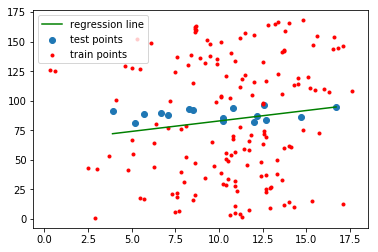

MSE test : 87.29105954556405
MSE train : 2558.0909421596502
R squared = 3.395329389531996


In [40]:
df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data.txt',sep='\s+',header=None)
train_test(df)

The only reason the MSE drops so much with this particulat split is because we evaluate our regression line on points that happen to be close to it.Again,this is just a byproduct of the structure of our data set which is non-homogenous.

## R

In [16]:
library("pracma")
library("matrixcalc")
library("corpcor")
library("ggplot2")


cross_validate <- function(df){ 
    A<-data.matrix(df)

    FOLDS<-10

    batch_size <- floor(dim(A)[1] / FOLDS)

    x<-A[,1]
    y<-A[,2]
    split_assingment_matrix<-matrix(0,dim(A)[1],FOLDS) 
    group_start=1;#start for first group

    for(i in seq(from=1, to=FOLDS, by=1)){

        group_end = i*batch_size

        split_assingment_matrix[group_start:group_end,i]=1

        group_start= group_end +1
    }

    MSE<-matrix(0,FOLDS,1)
    for(i in seq(from=1, to=FOLDS, by=1)){
        test_indexes =which(split_assingment_matrix[,i]==1)
        train_indexes =which(split_assingment_matrix[,i]==0)
        x_test= x[test_indexes]
        x_train= x[train_indexes]
        y_test= y[test_indexes]
        y_train= y[train_indexes]

        #calculate coefficients using training set
        phi_train<-cbind(x_train^0,x_train^1)
        w<-pseudoinverse(phi_train)%*%y_train

         #evaluate on test set
        phi_test<-cbind(x_test^0,x_test^1)
        y_test_predicted <- phi_test%*%w
        MSE[i]<-sum((y_test-y_test_predicted)^2) / length(y_test)


    }
    cat("MSE mean :",mean(MSE),'\n')
    cat("MSE std :",std(MSE))
    barplot(c(MSE),col="blue",names.arg=seq(1,FOLDS,1))
}


### CSV file

MSE mean : 115.8137 
MSE std : 31.94387

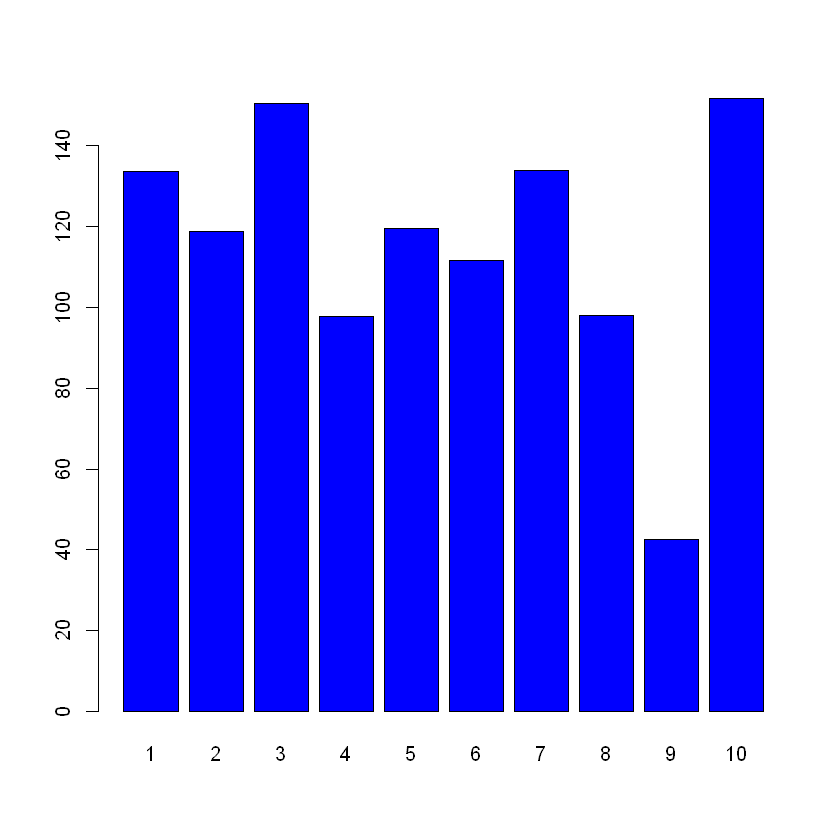

In [17]:
df <- read.csv(file="C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv", header=FALSE, sep=",")
cross_validate(df)

### TXT file

MSE mean : 2637.643 
MSE std : 2459.496

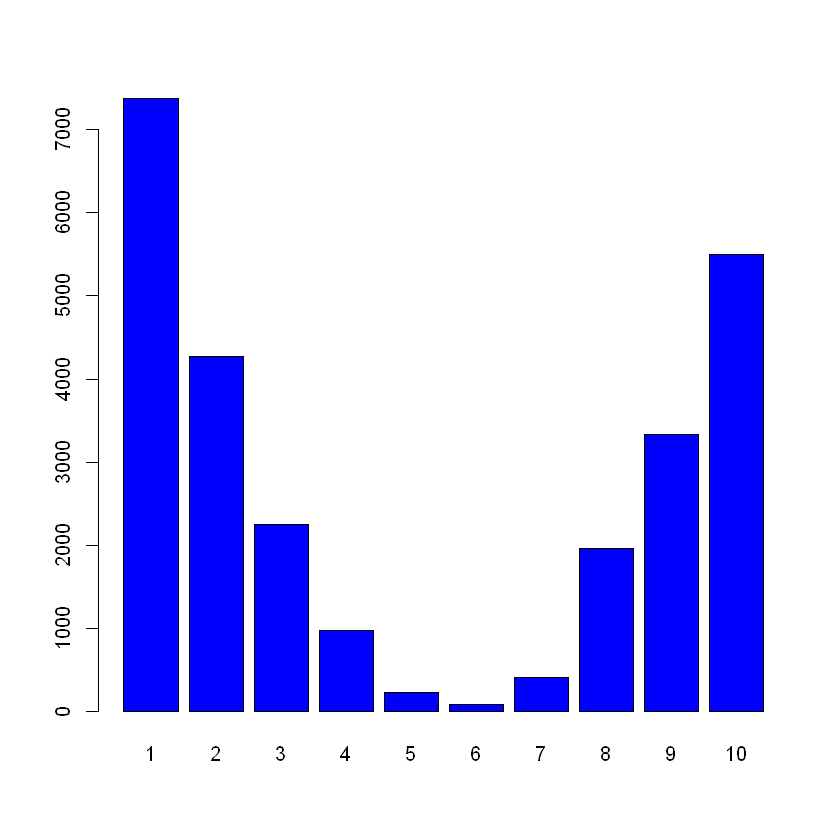

In [18]:
df <- read.csv(file="C:\\Users\\Paul\\Downloads\\PSEs\\data.txt", header=FALSE,sep = "")
cross_validate(df)

# Recursive Least Squares

## R

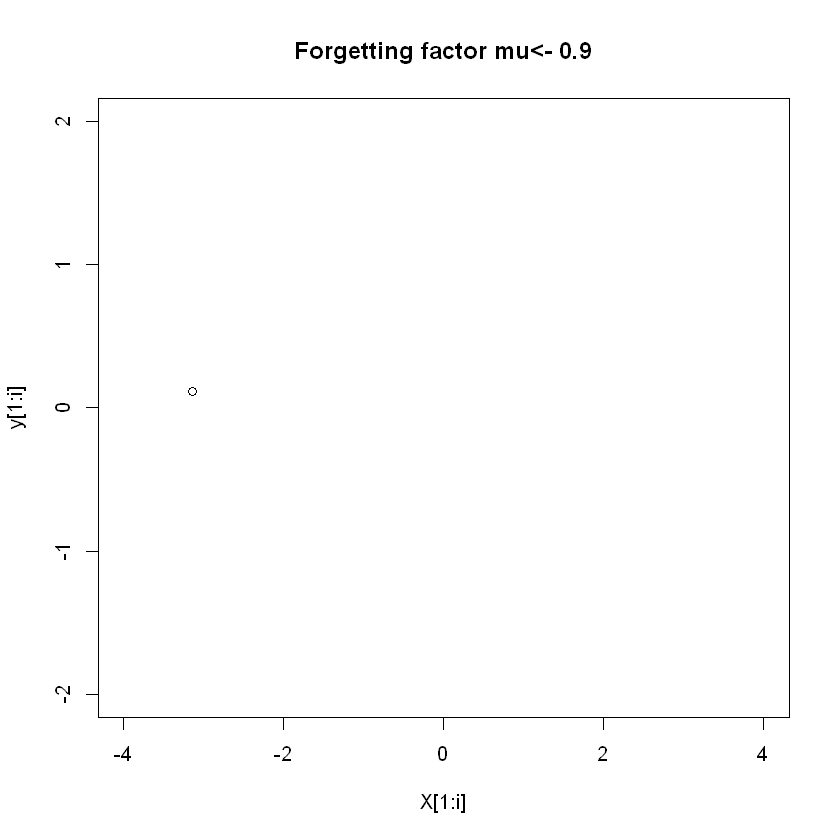

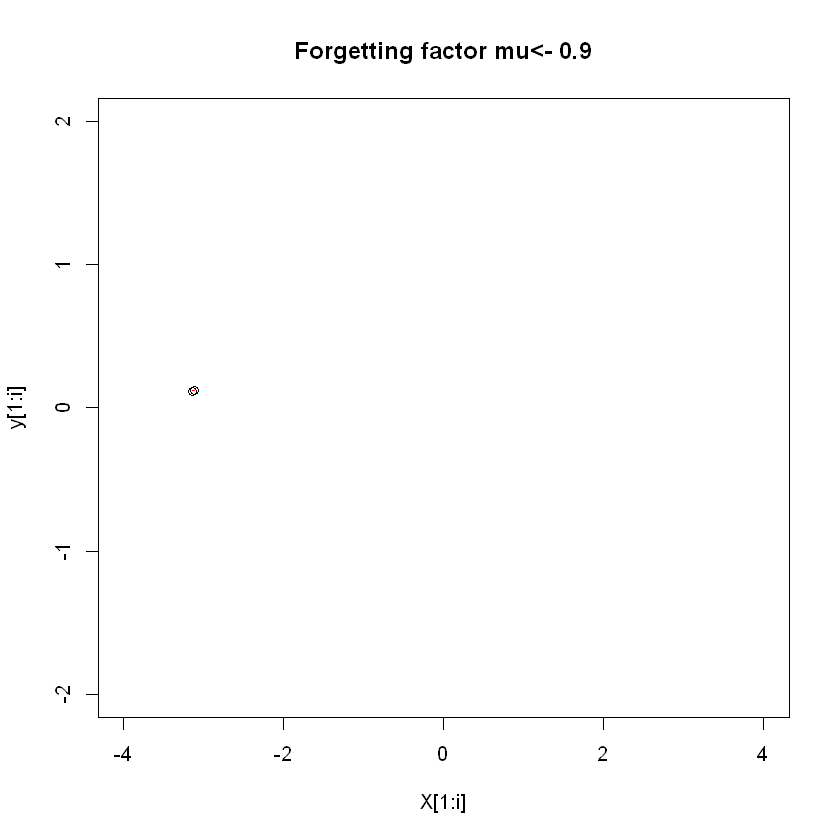

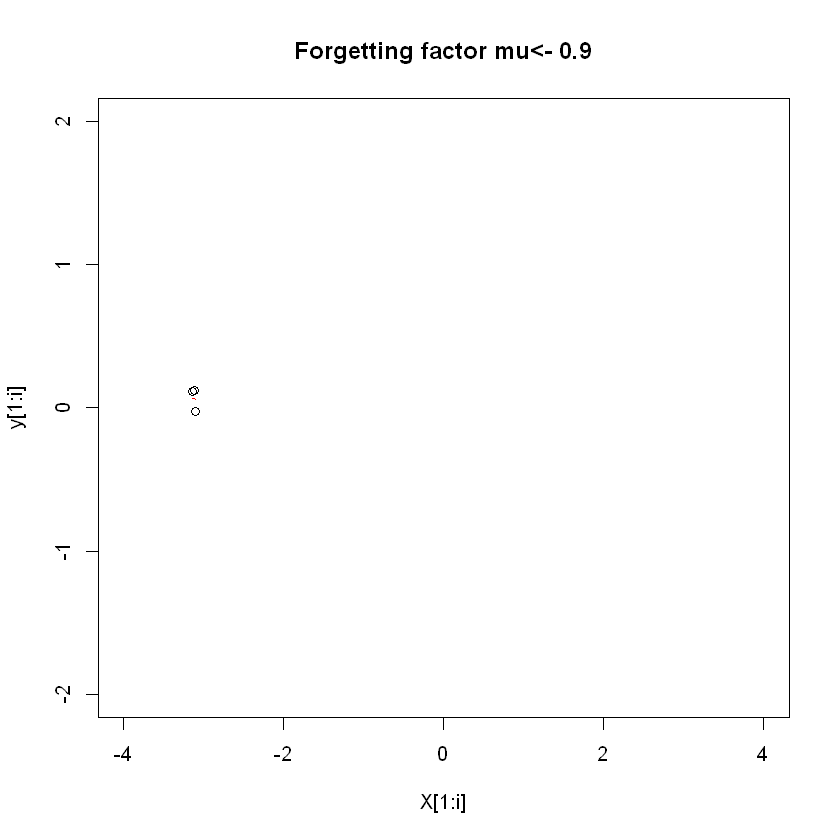

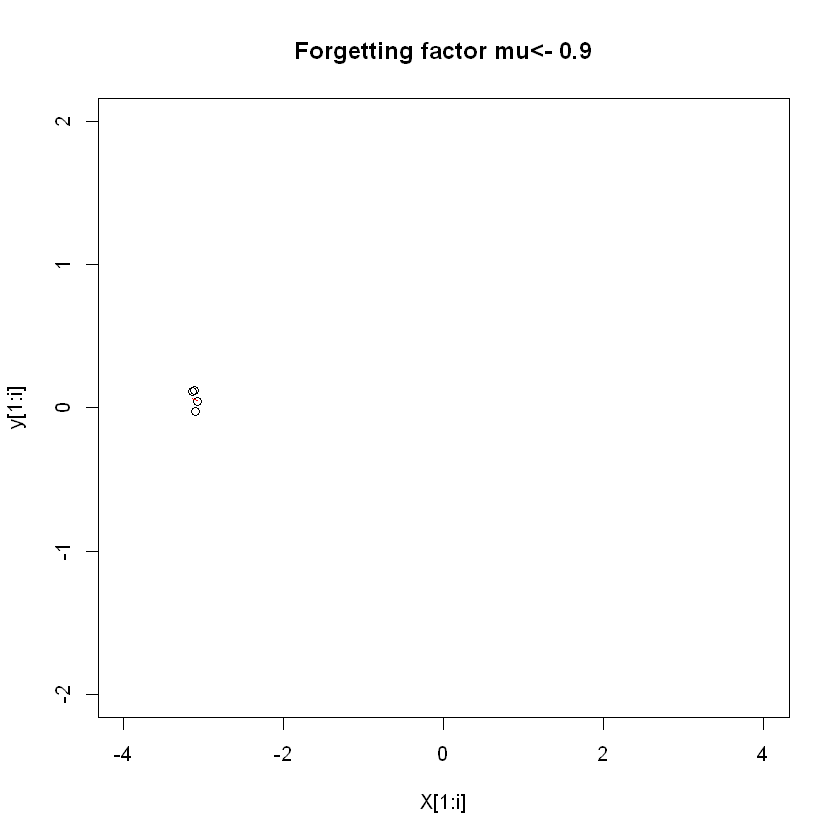

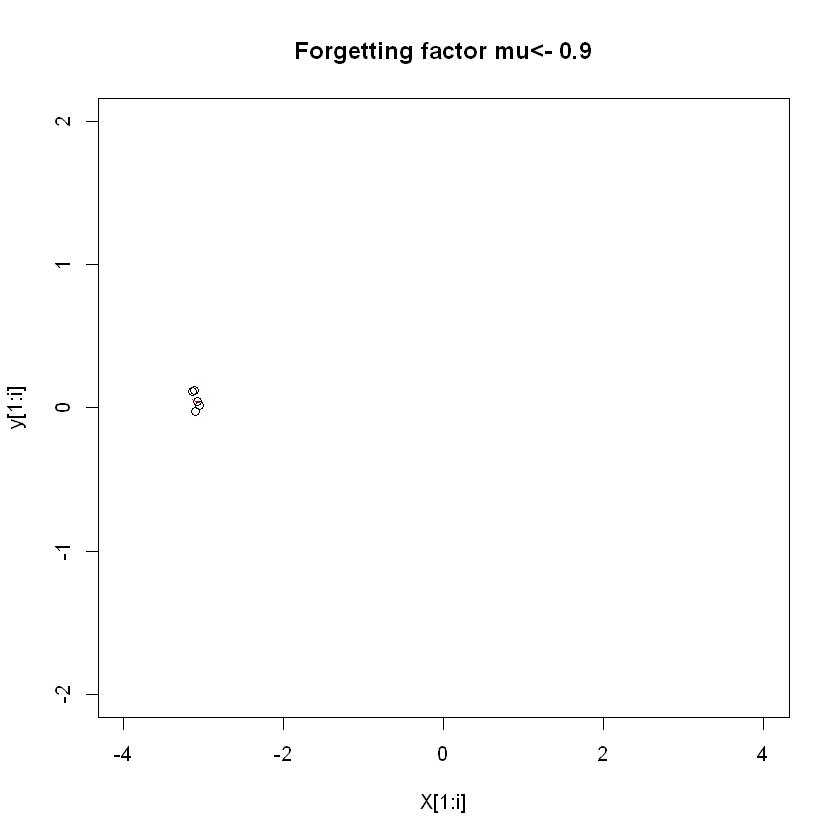

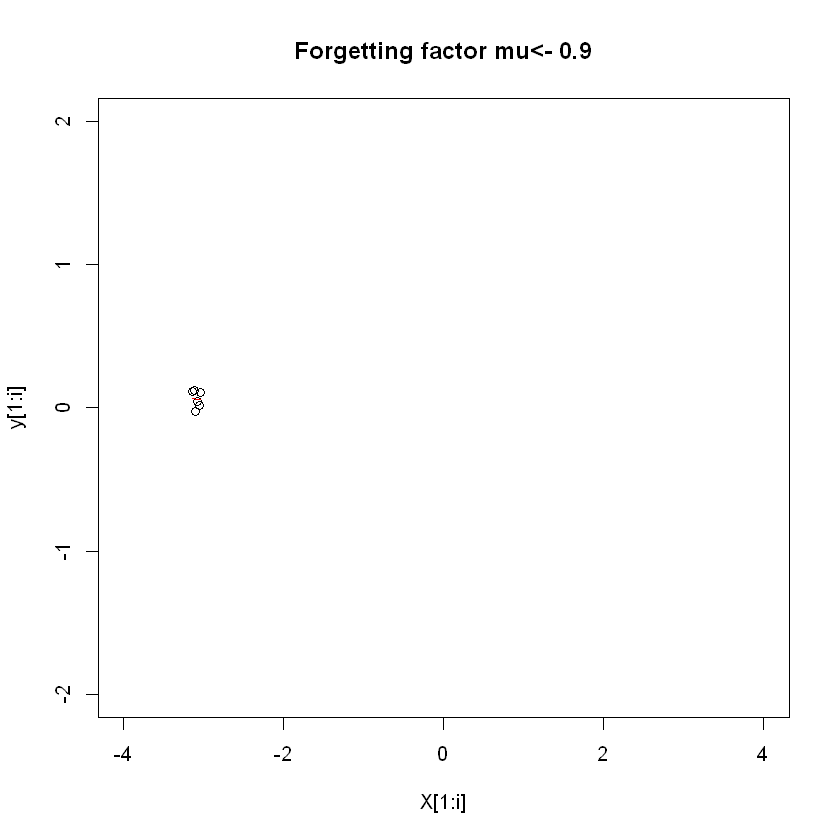

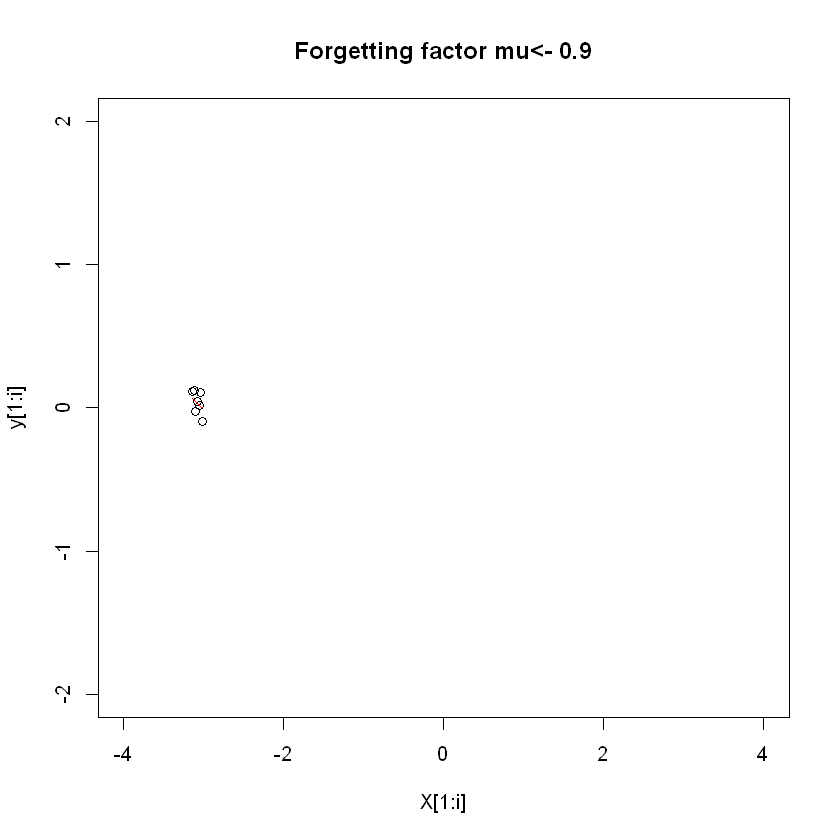

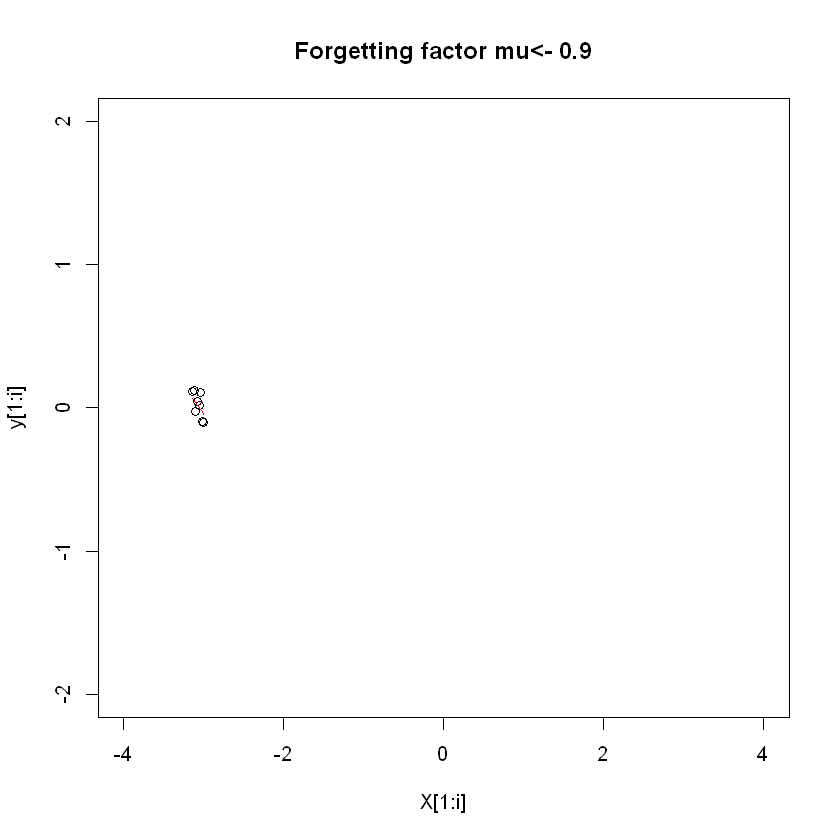

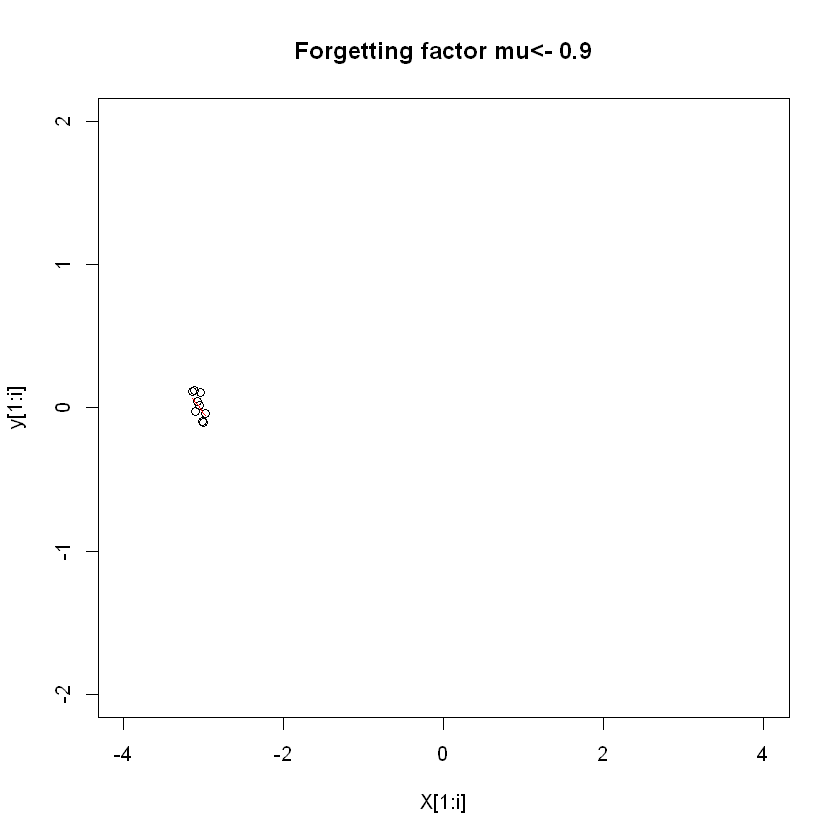

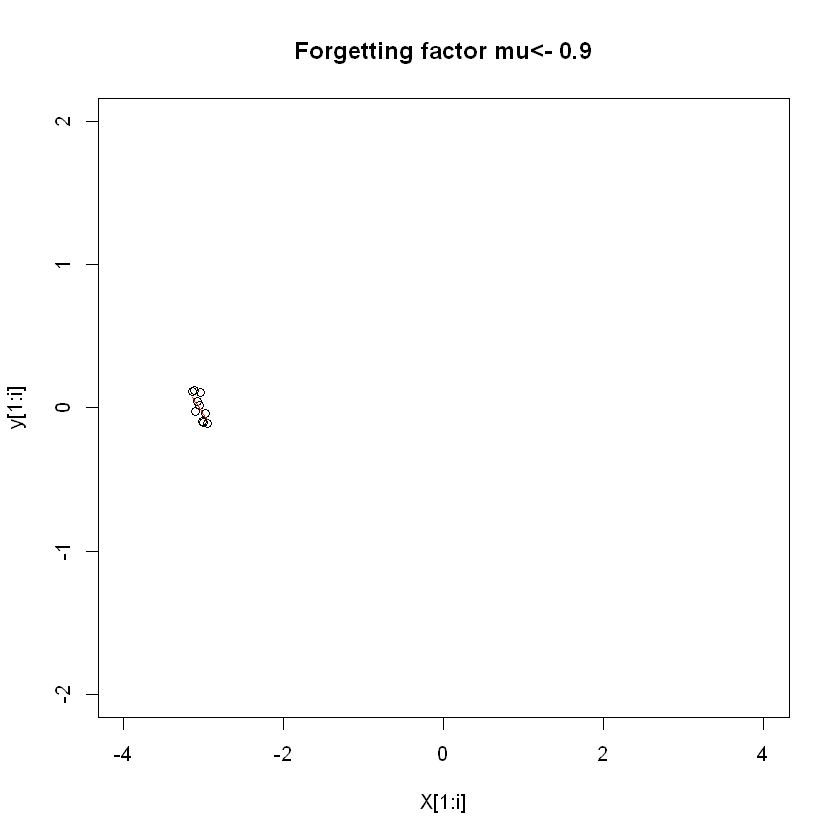

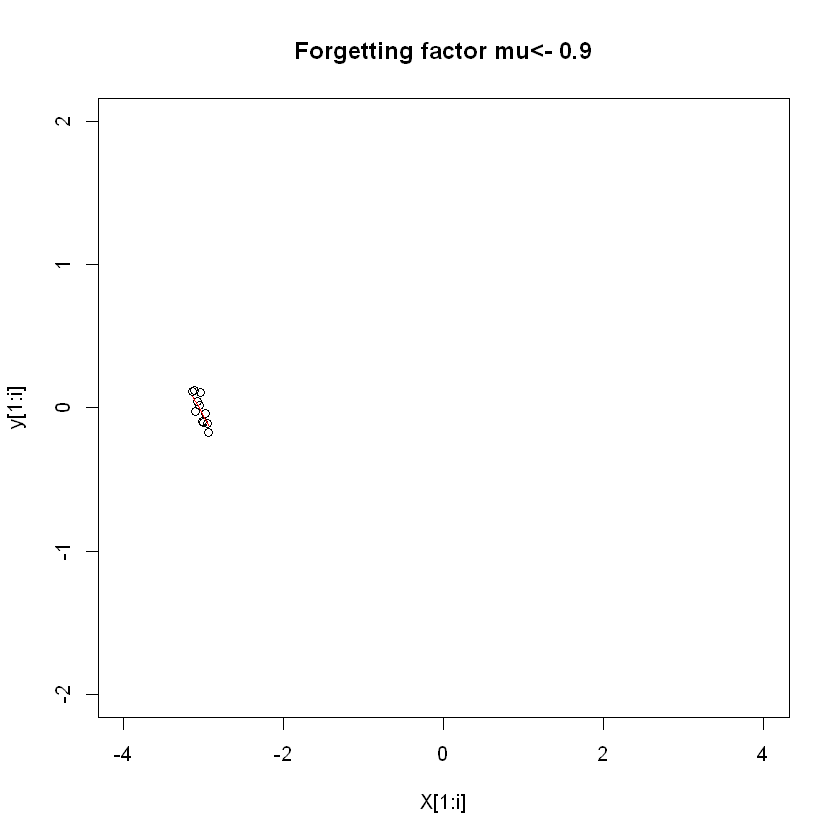

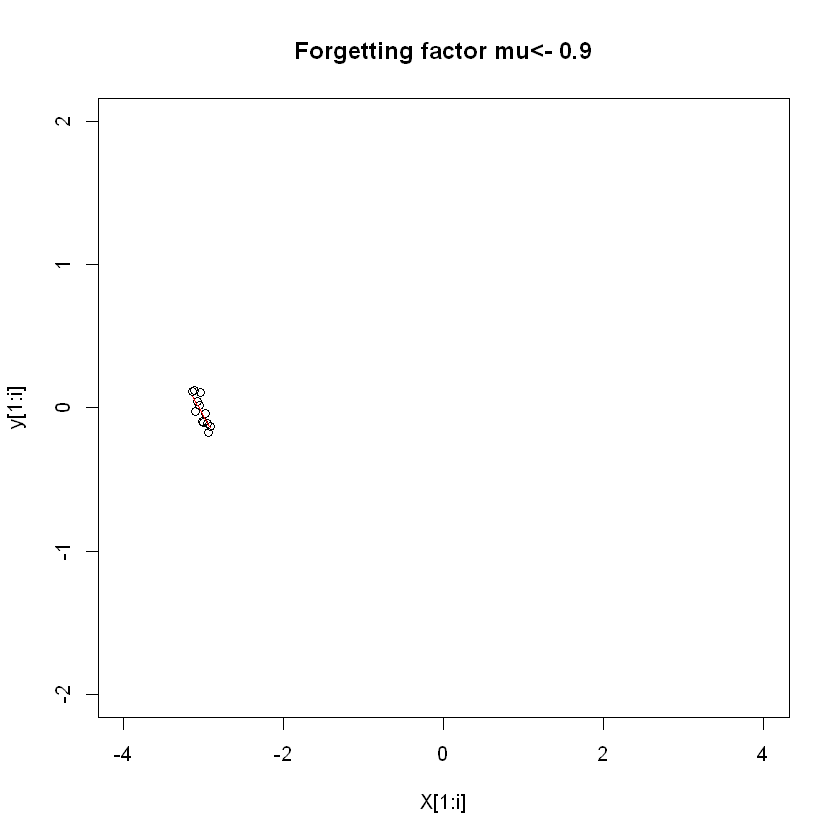

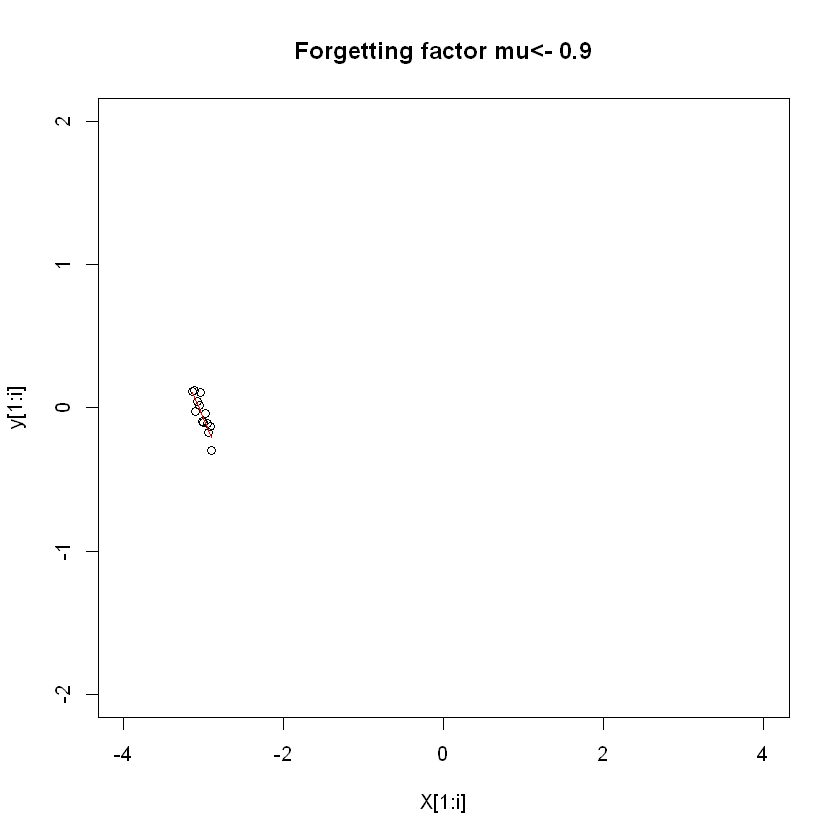

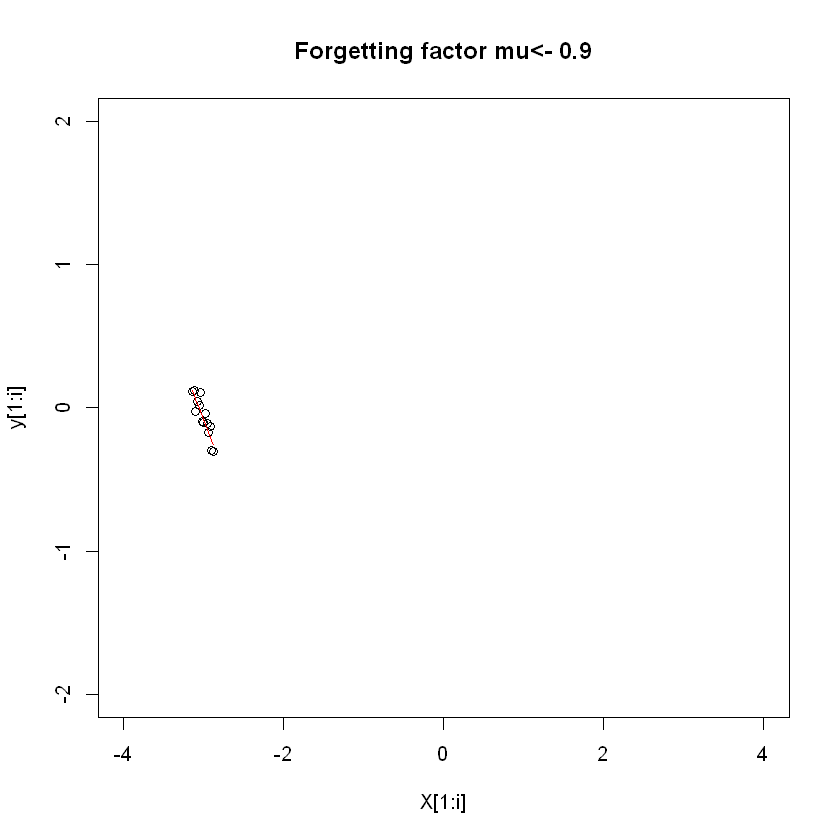

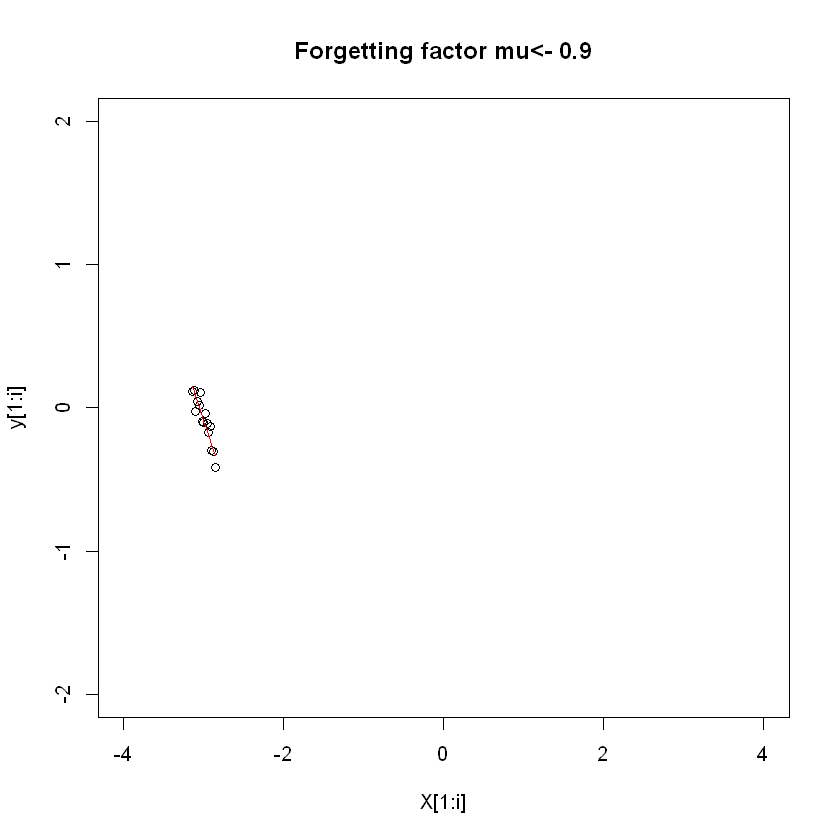

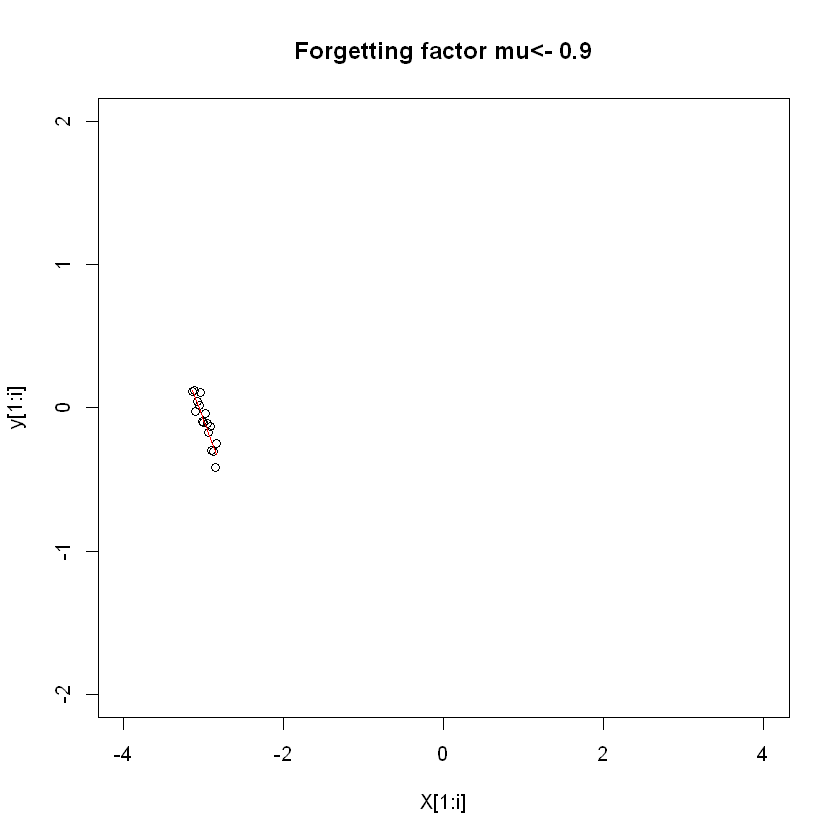

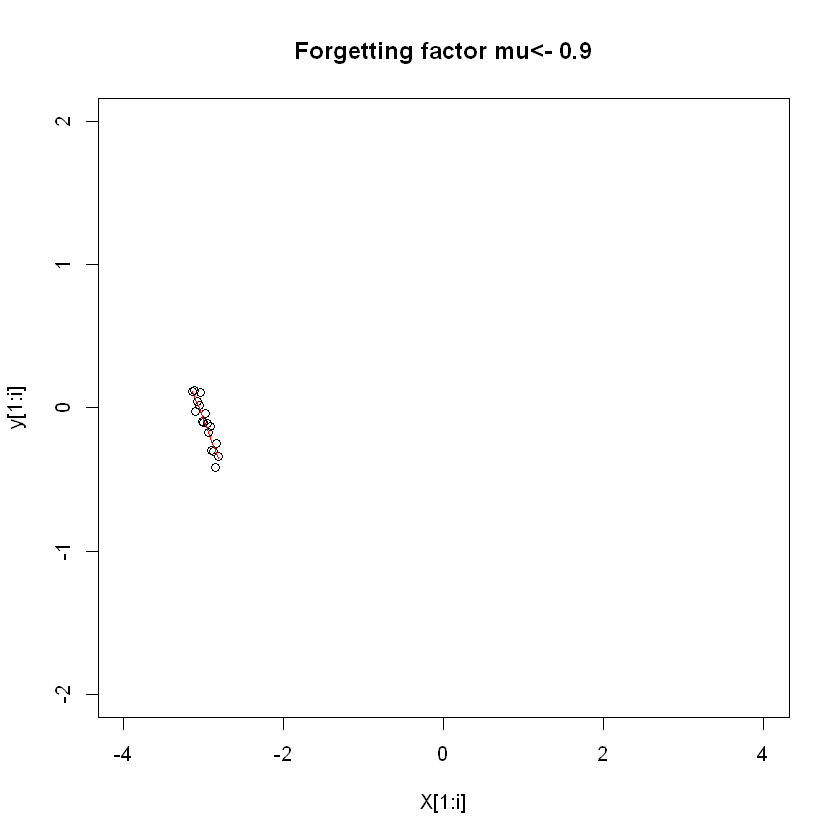

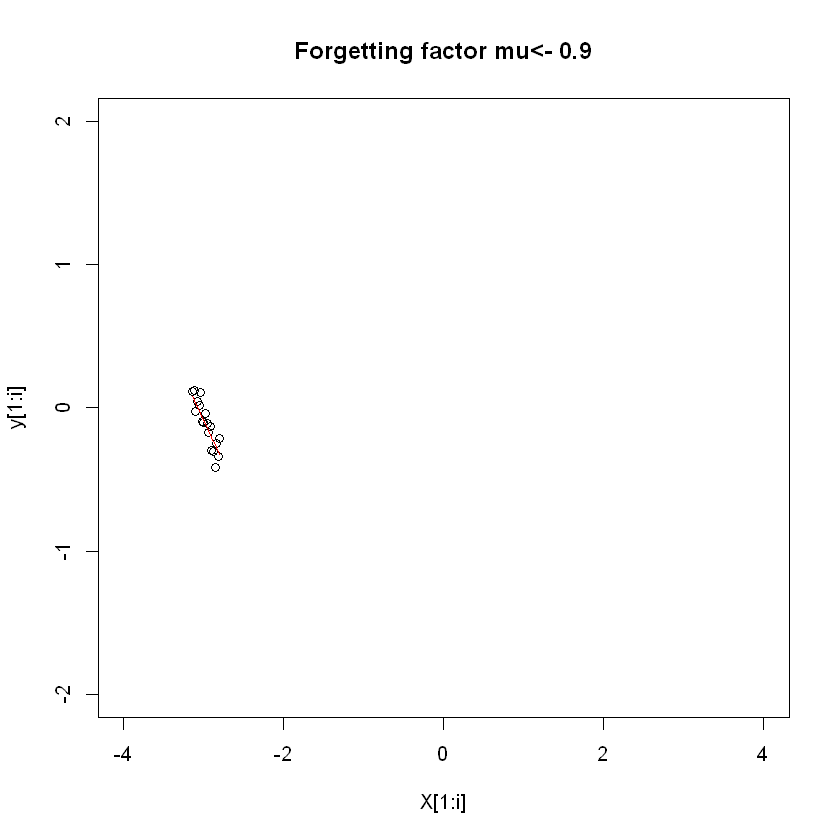

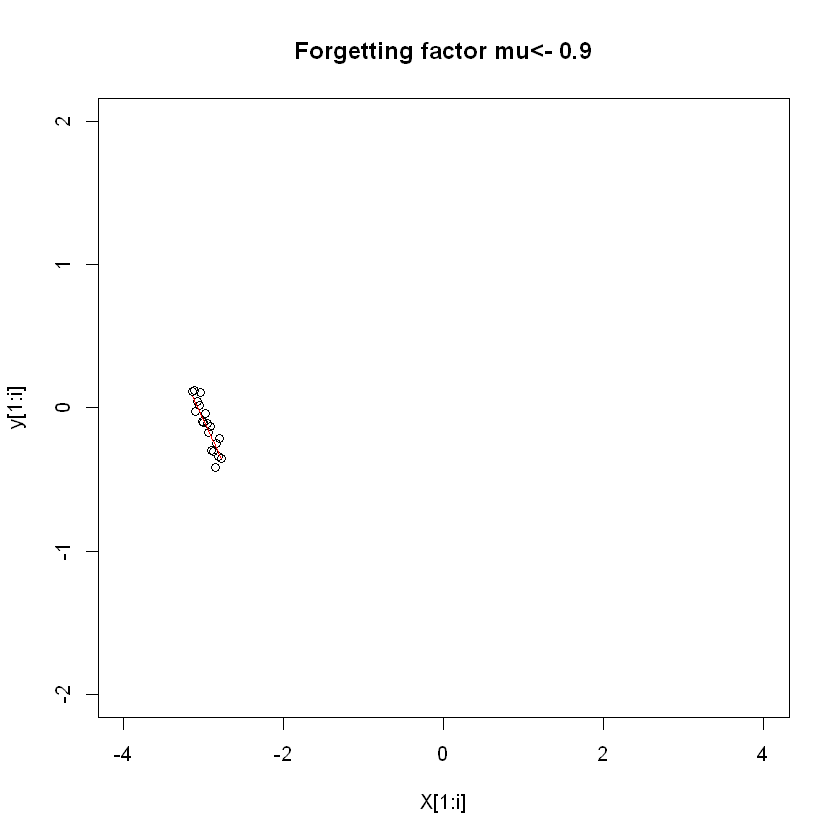

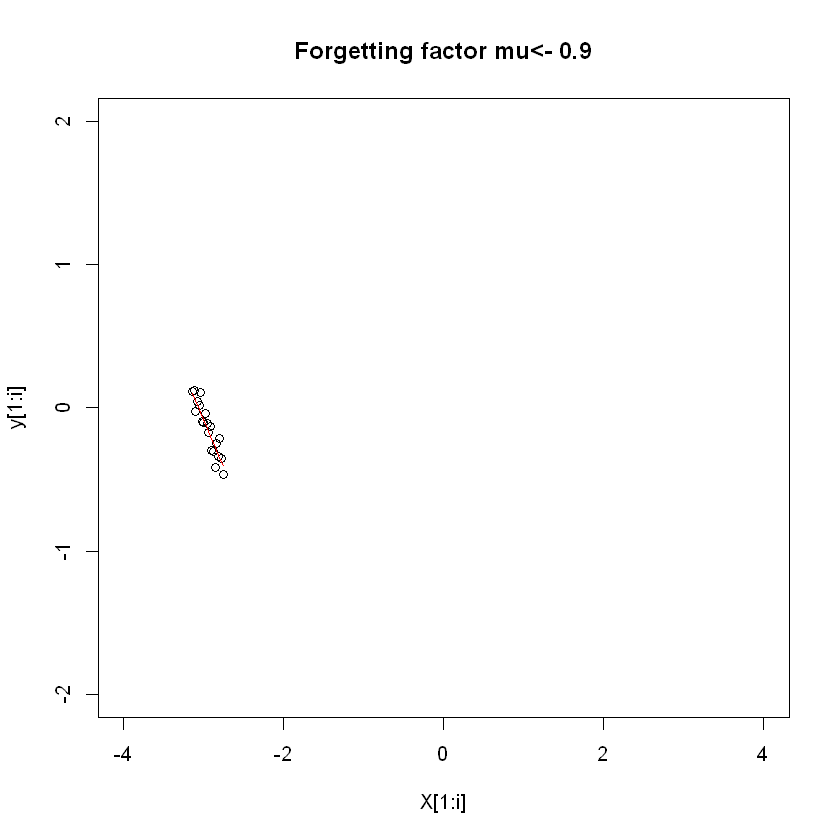

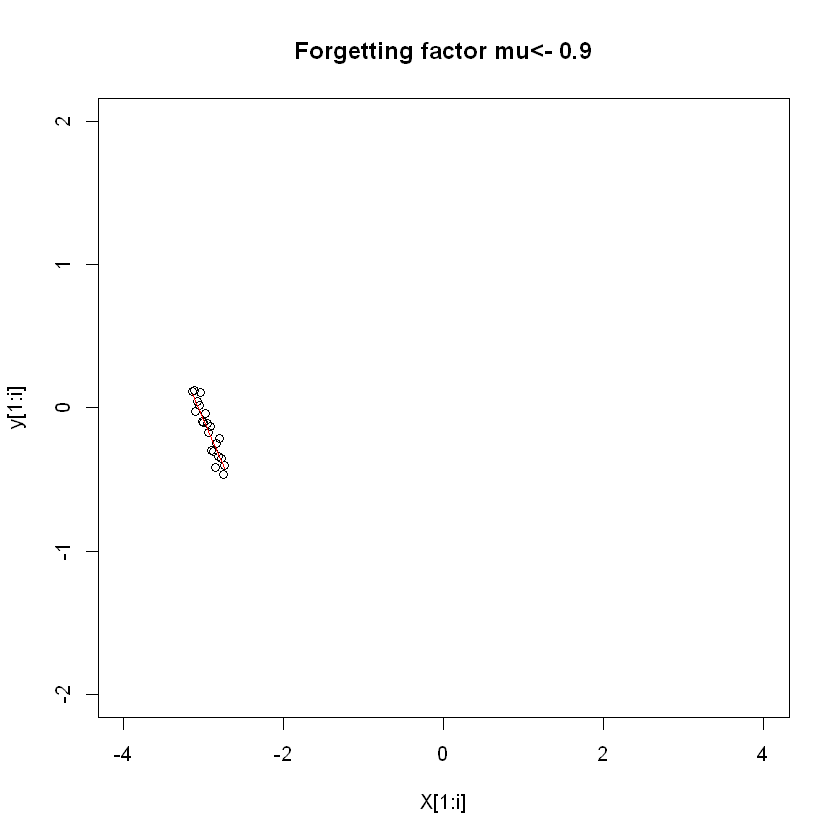

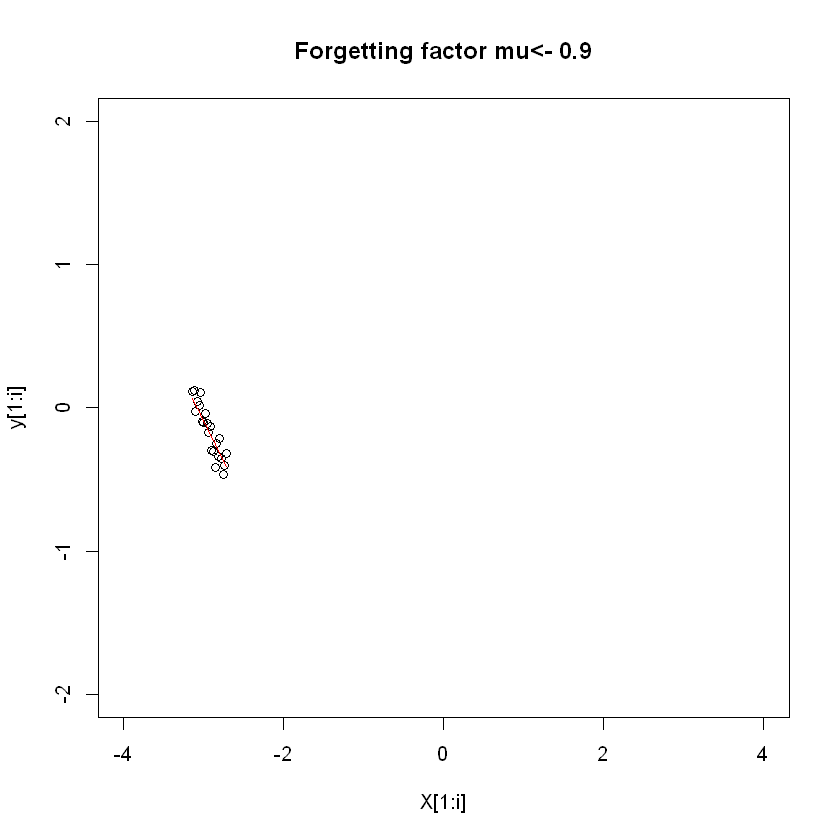

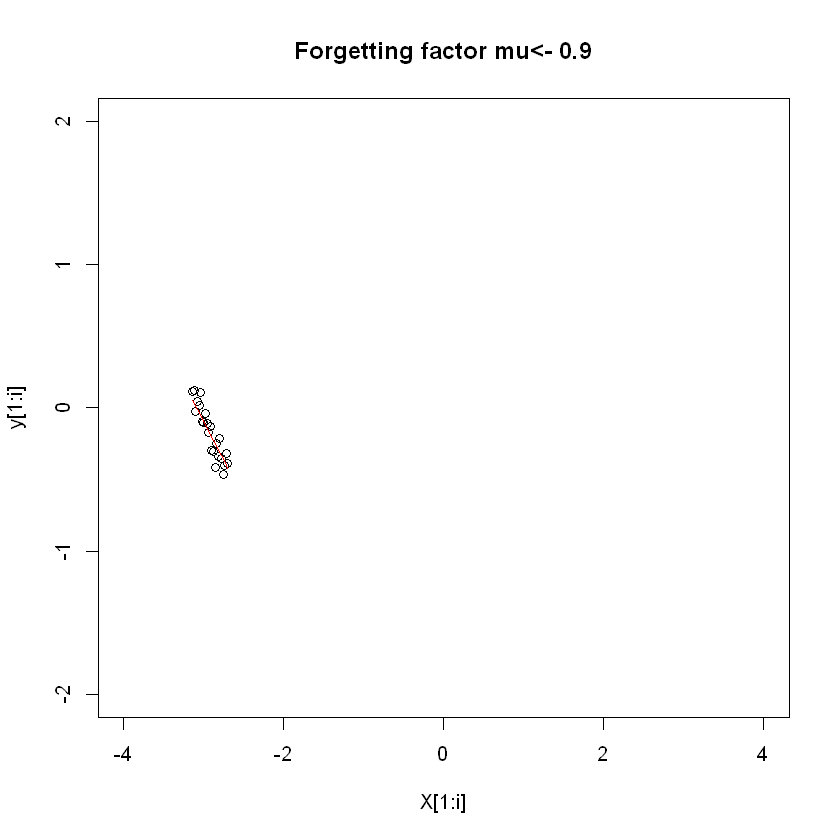

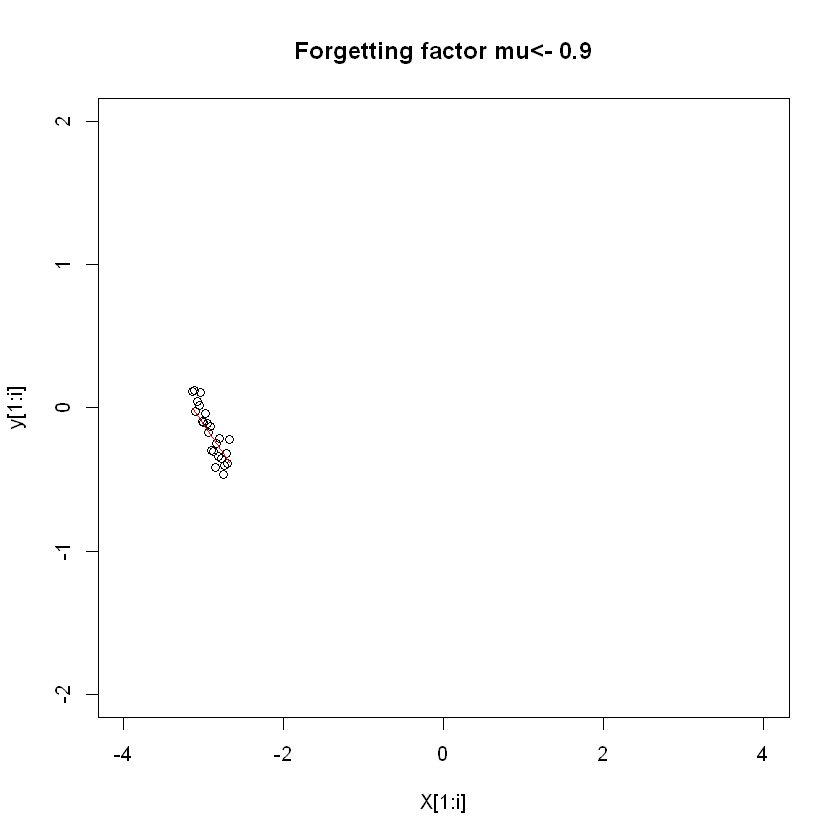

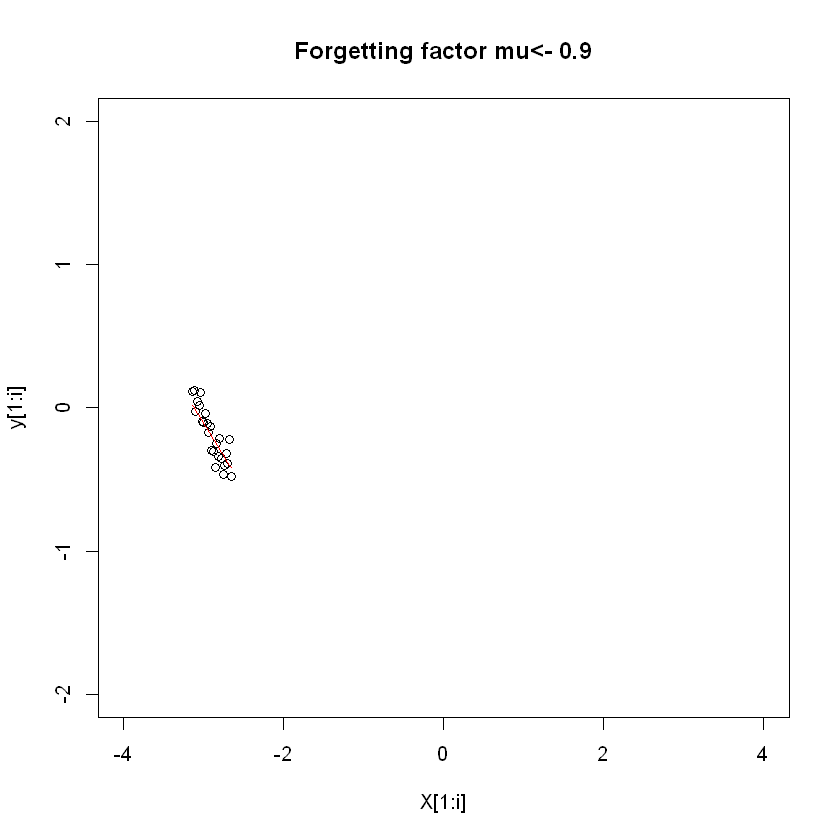

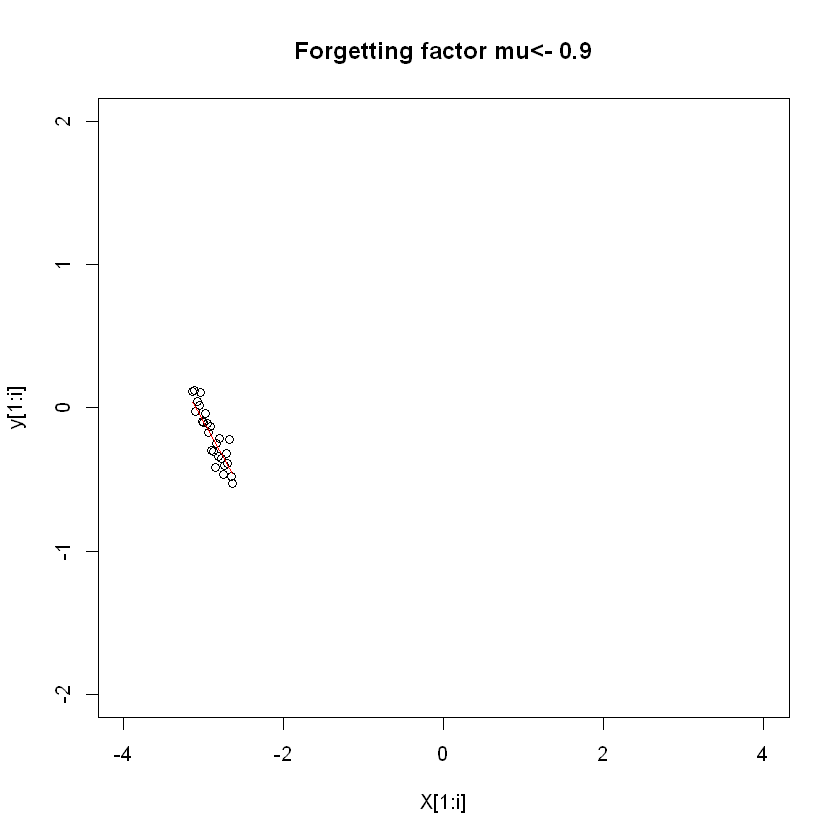

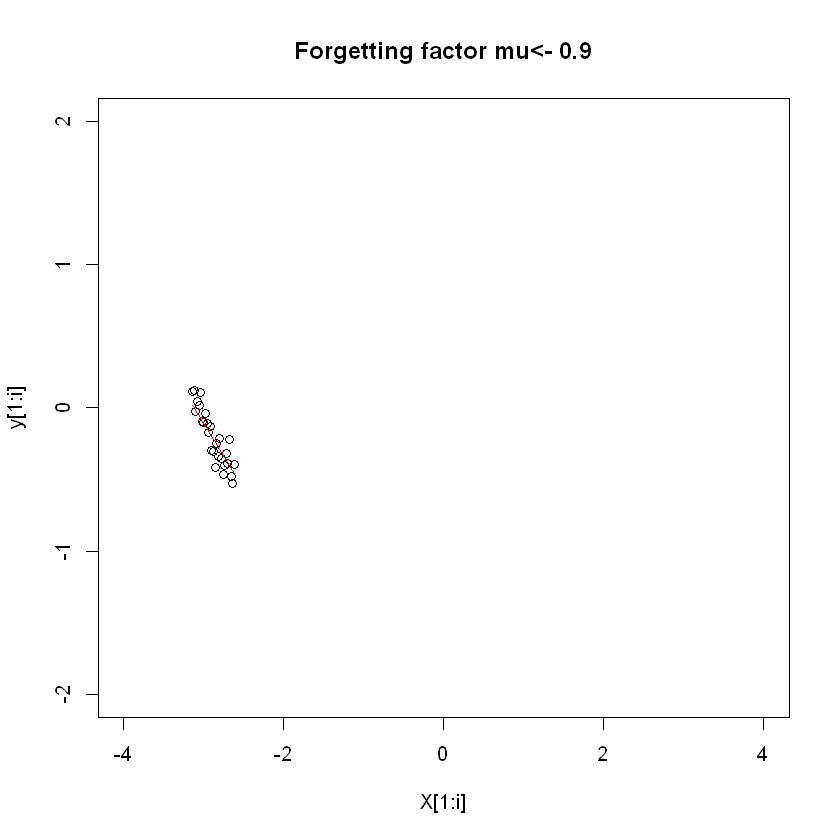

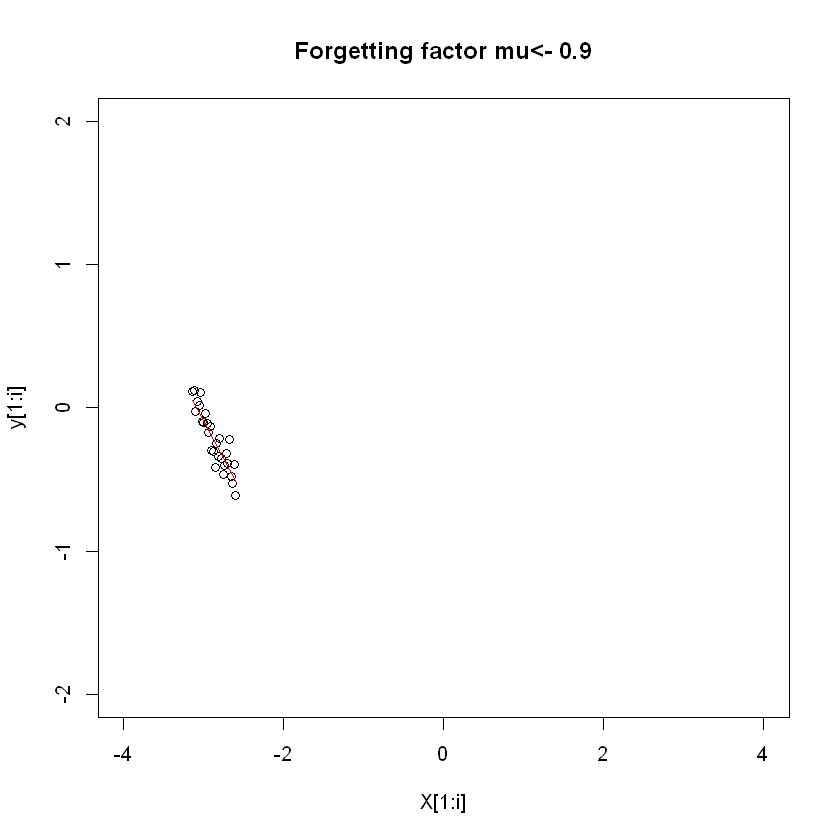

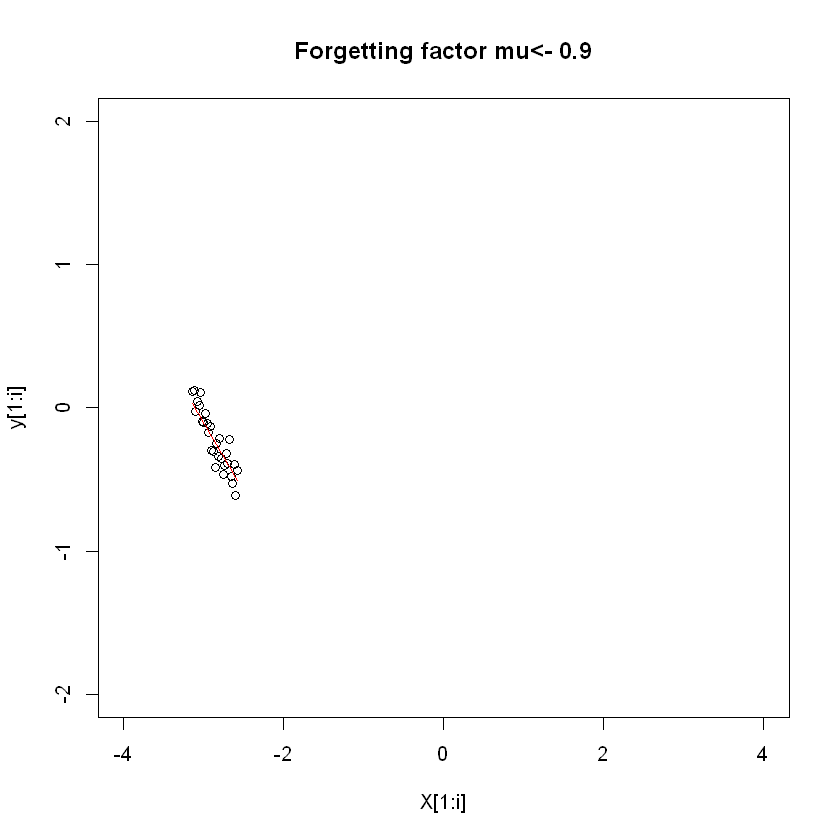

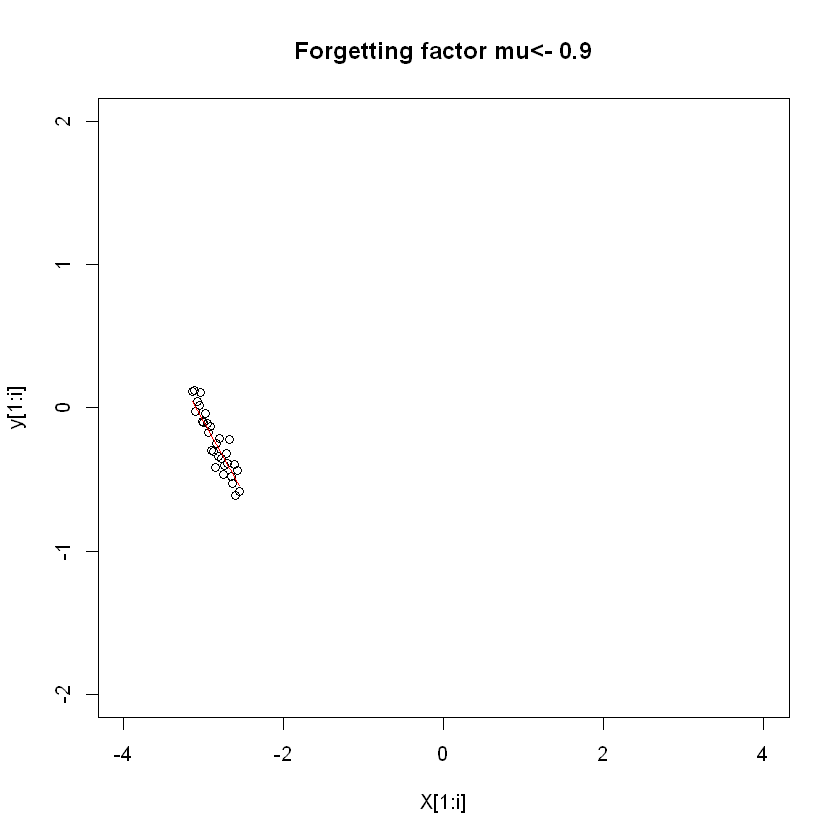

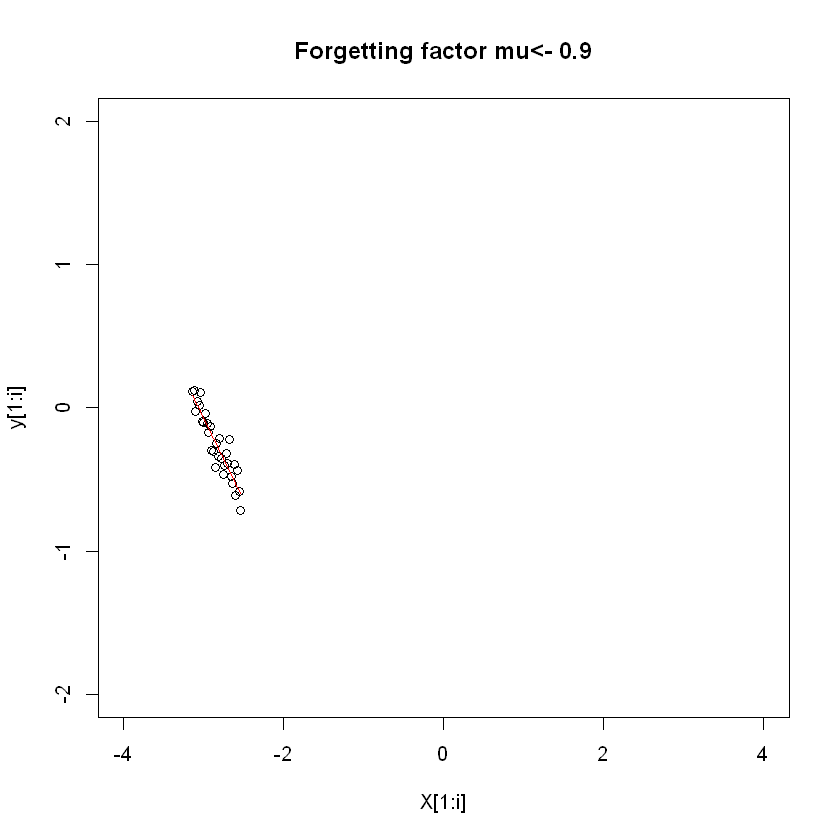

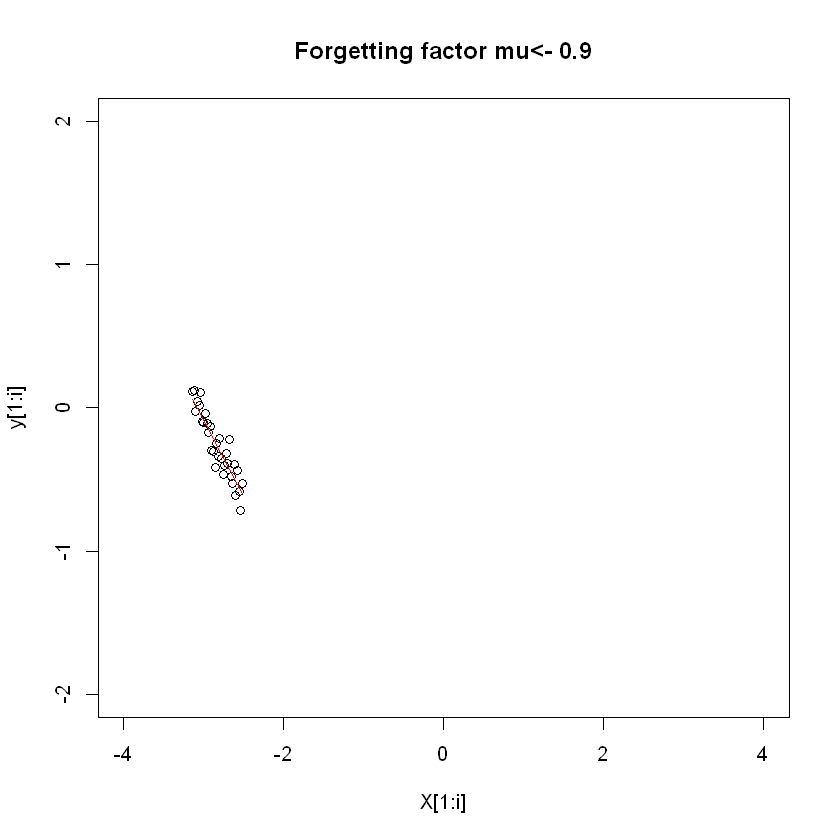

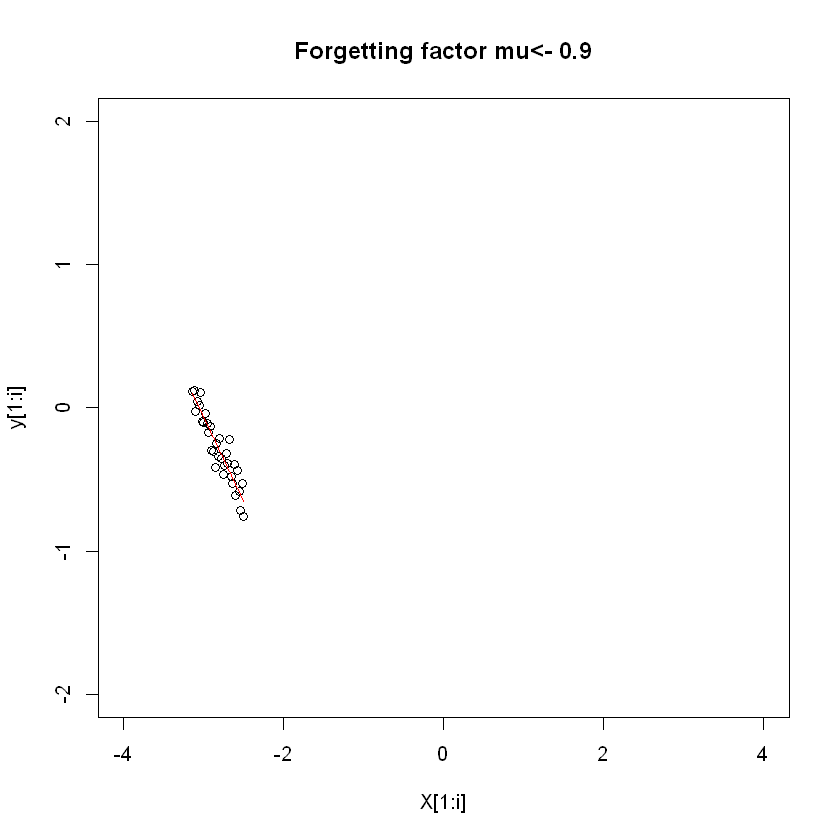

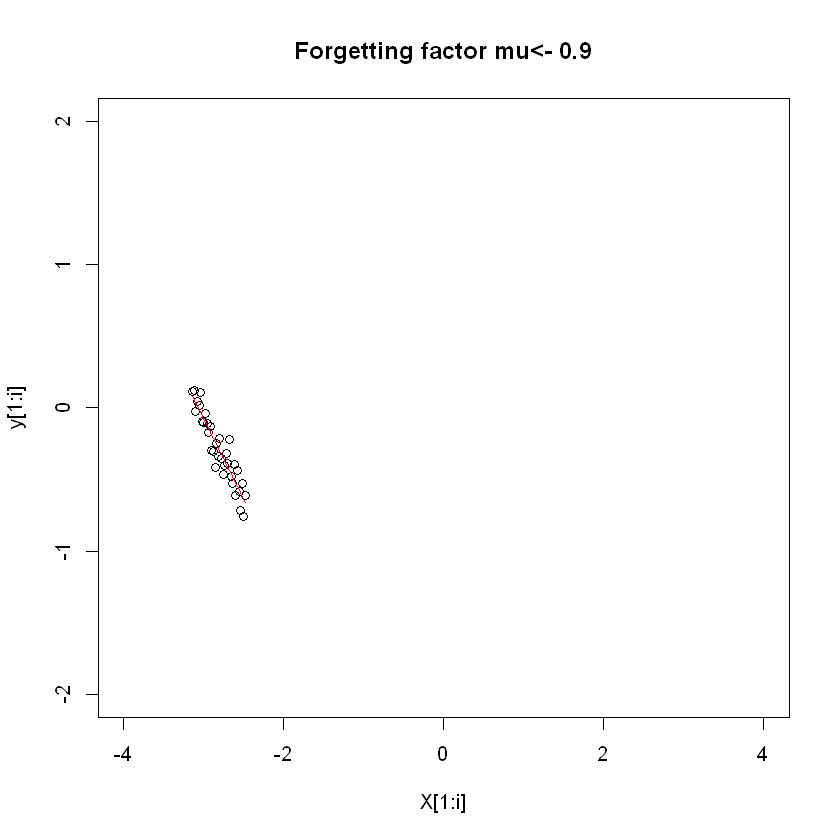

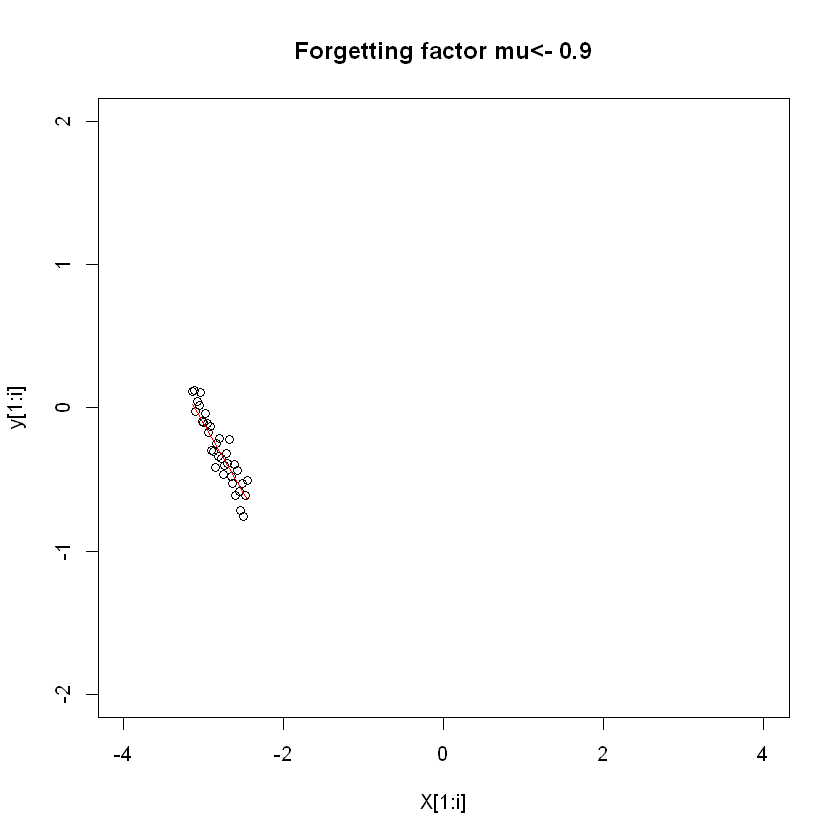

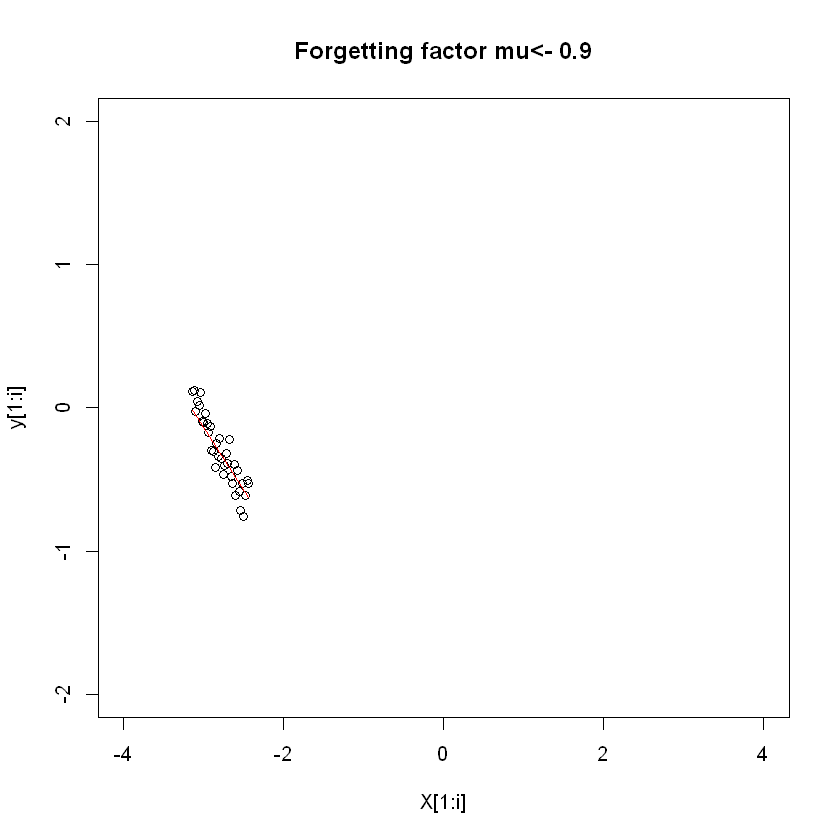

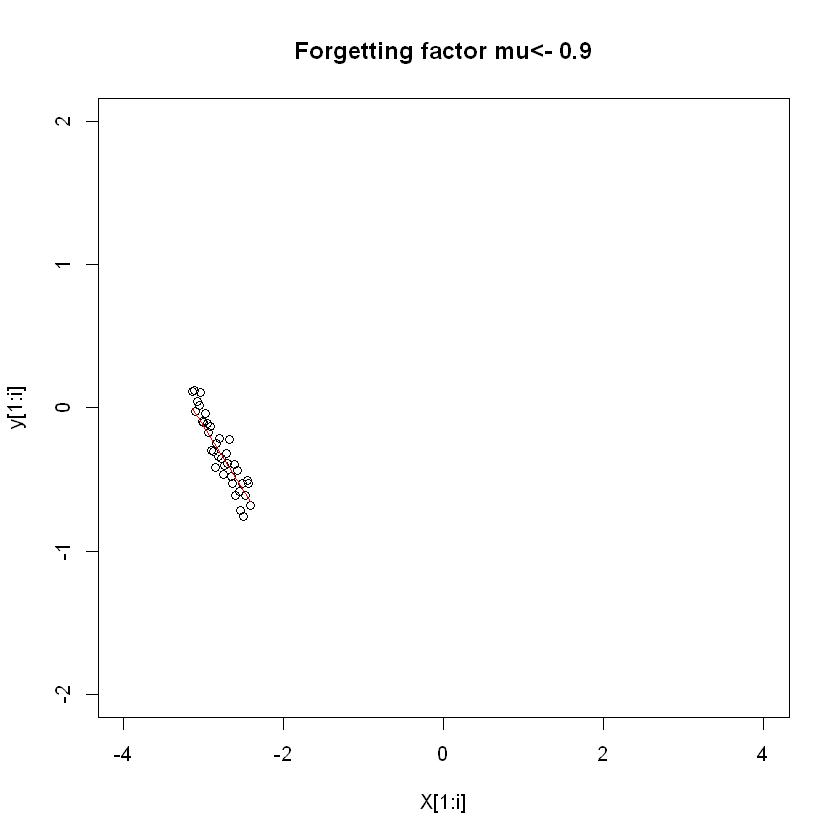

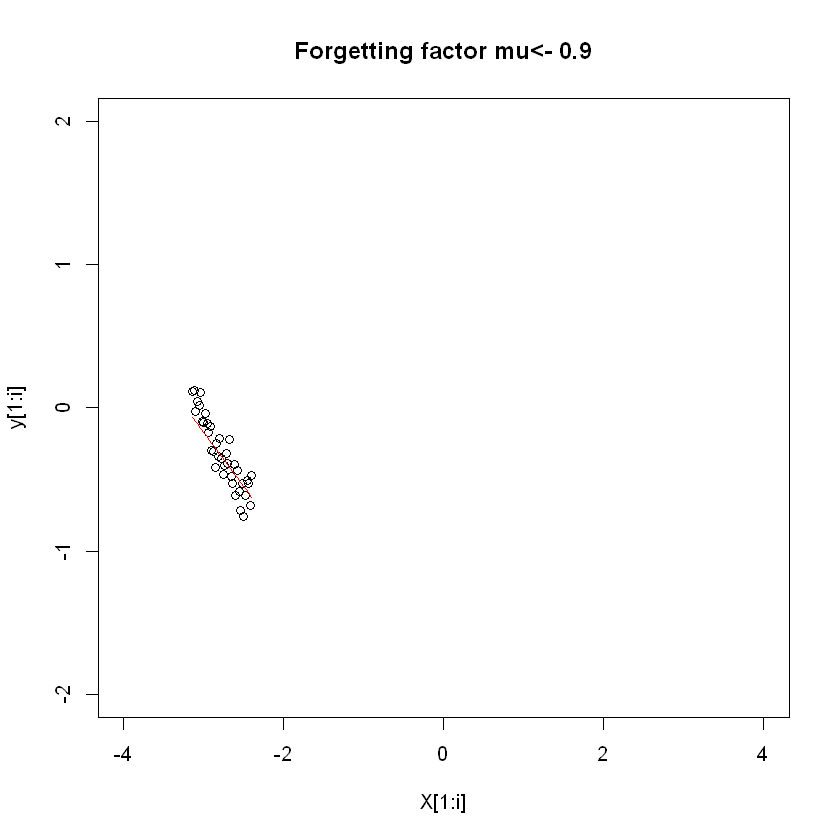

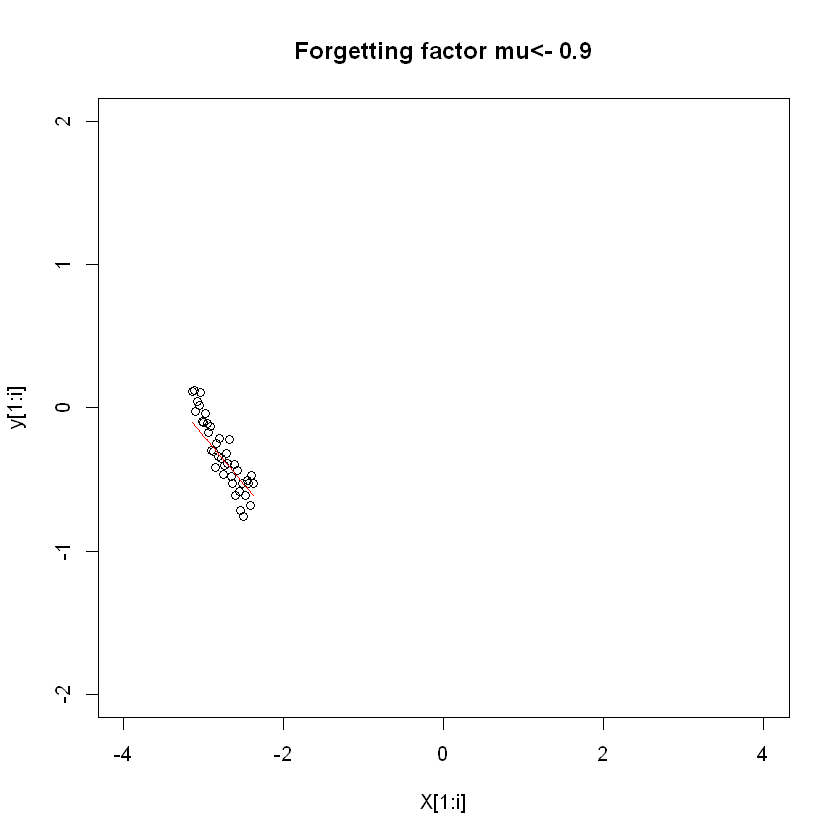

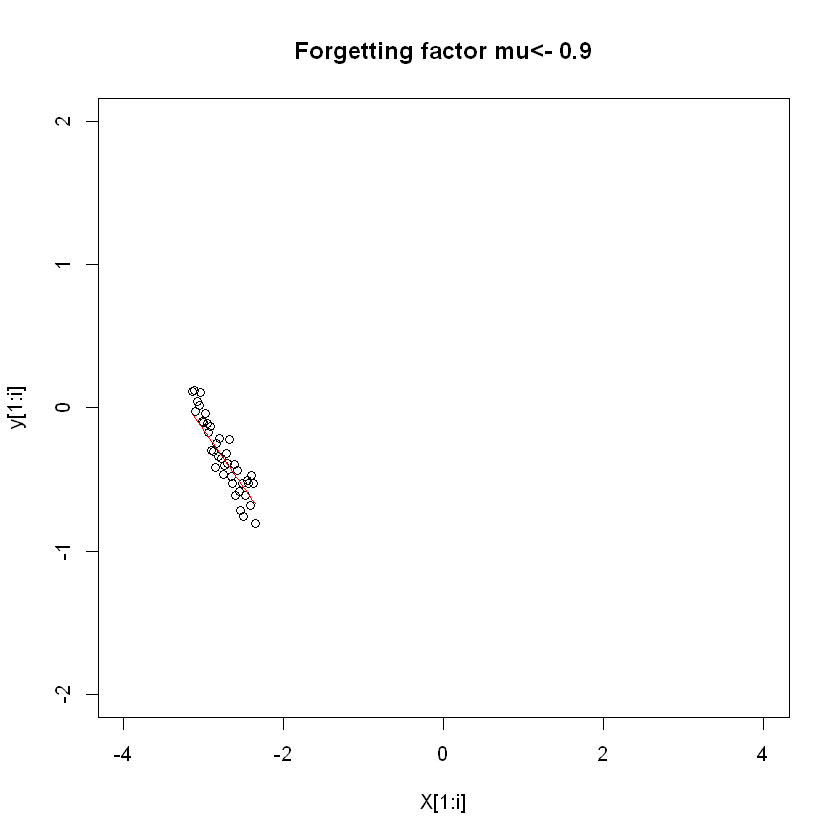

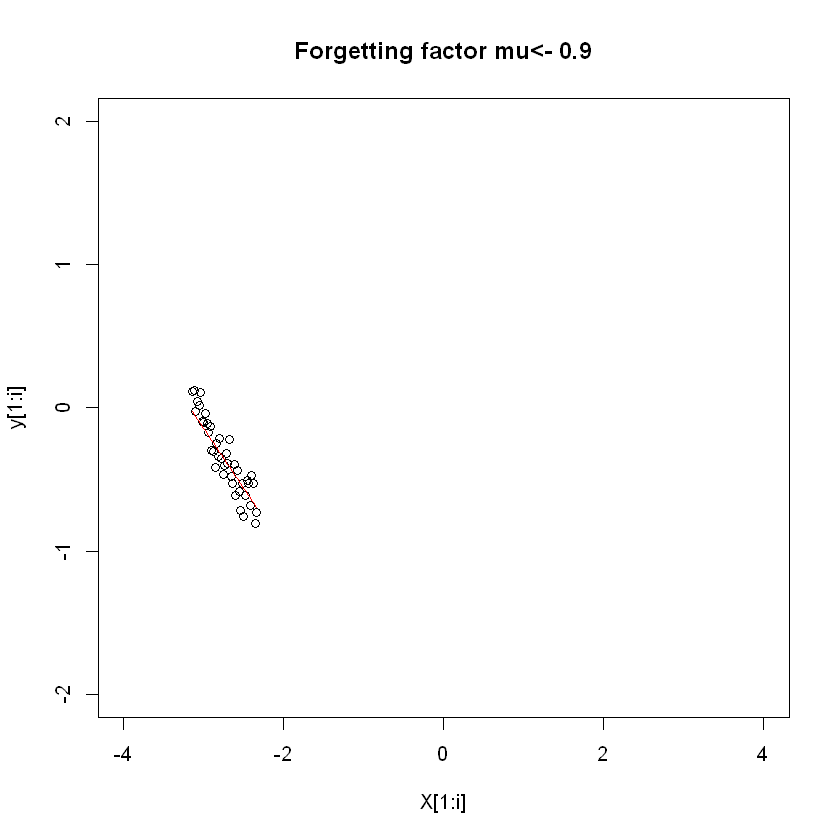

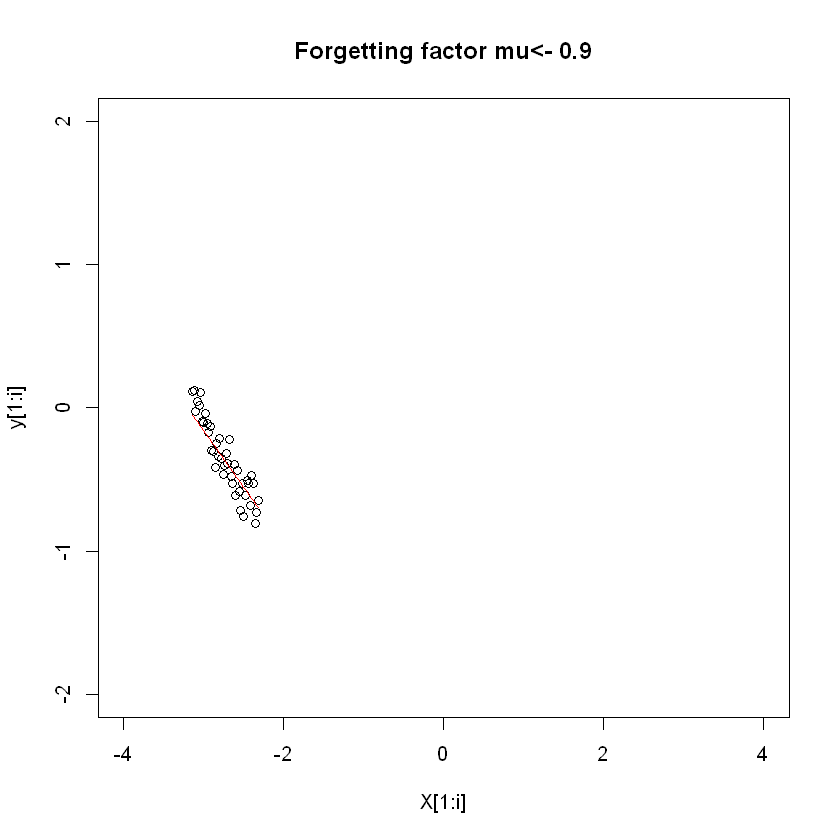

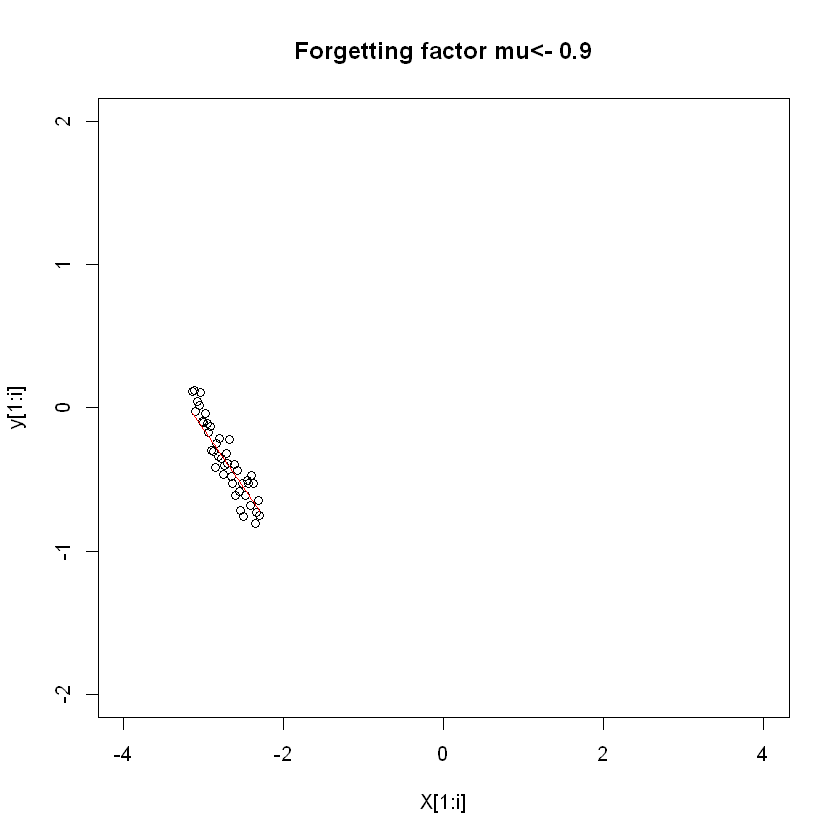

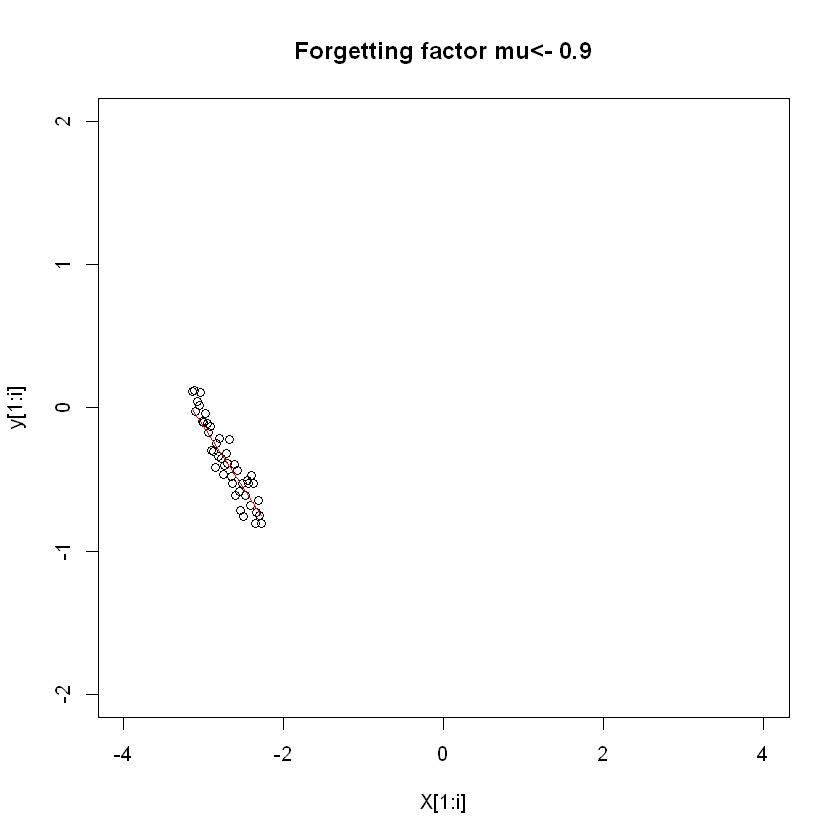

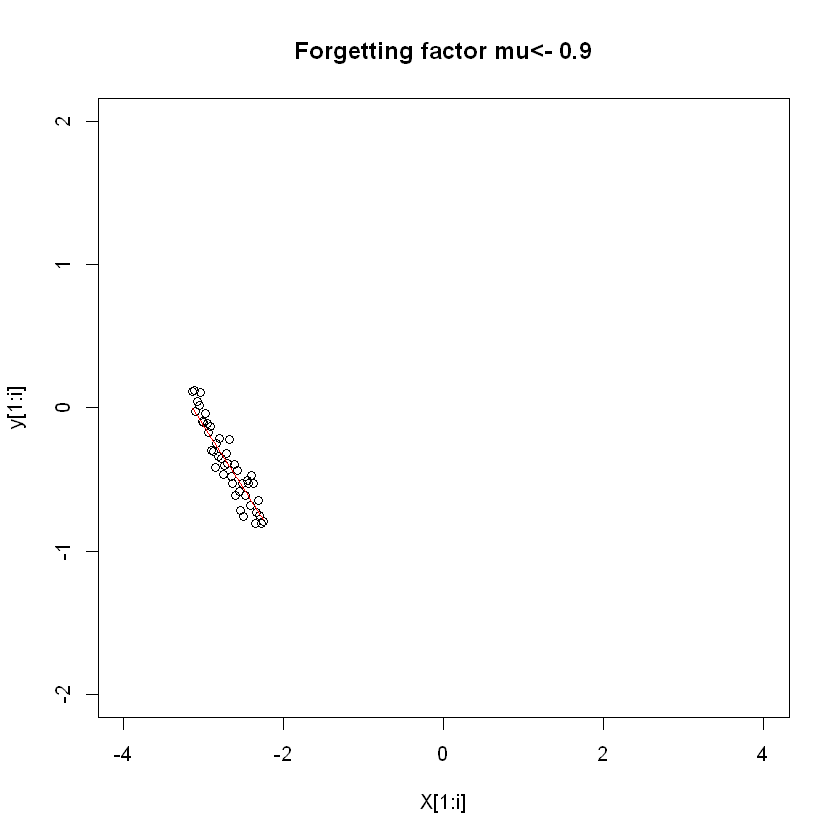

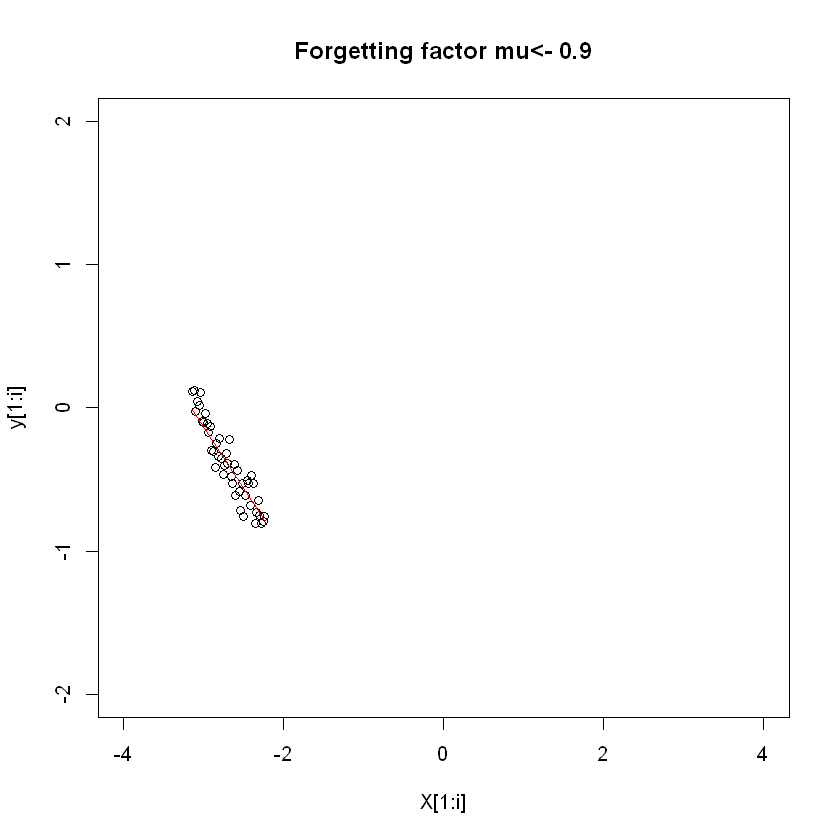

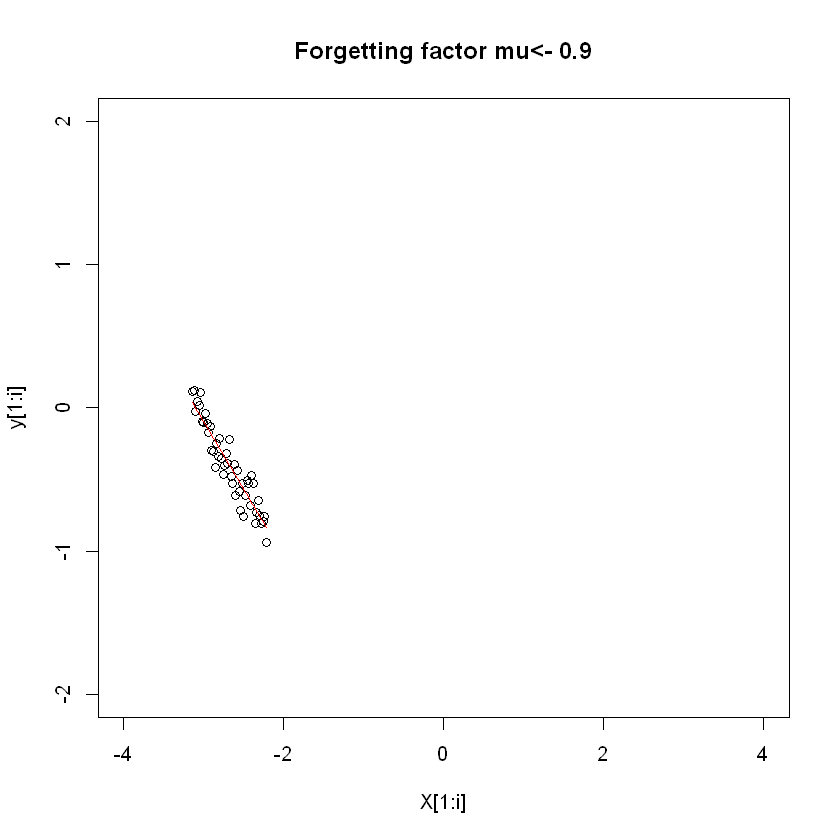

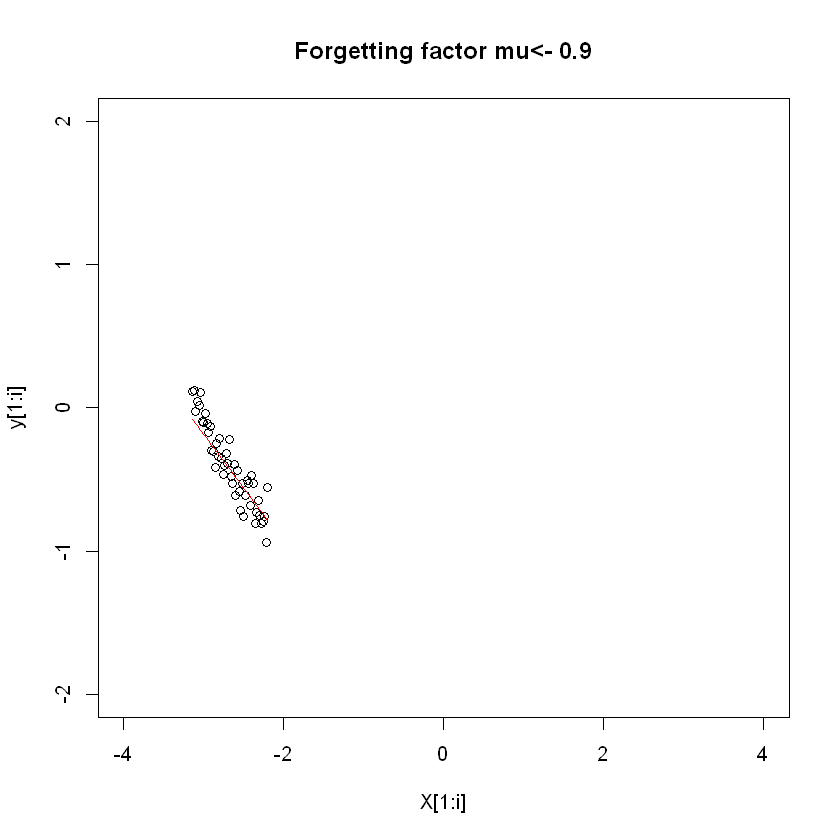

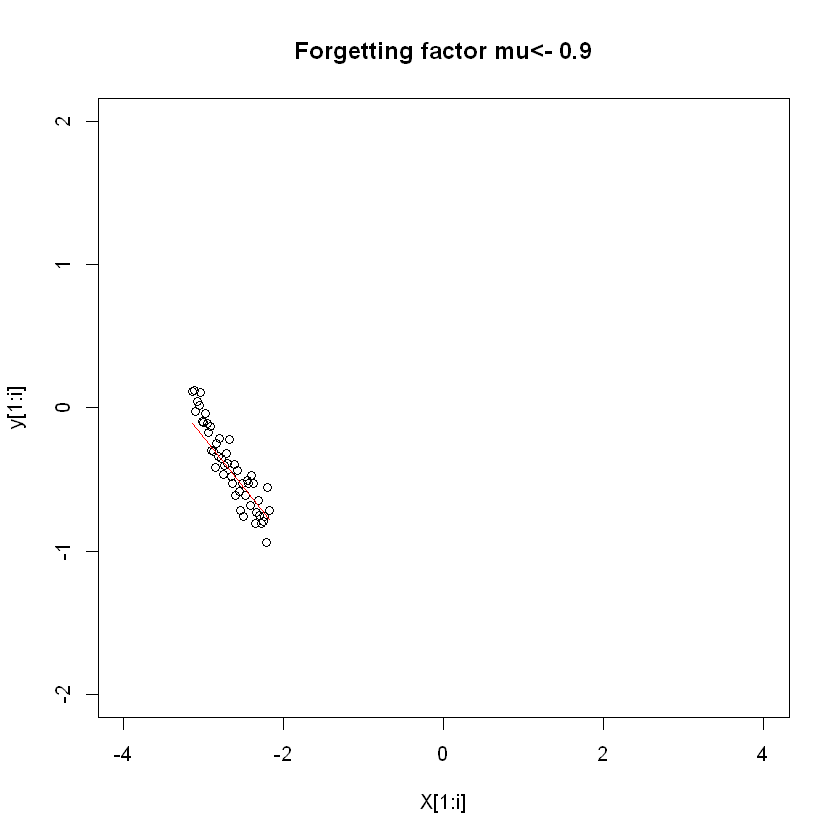

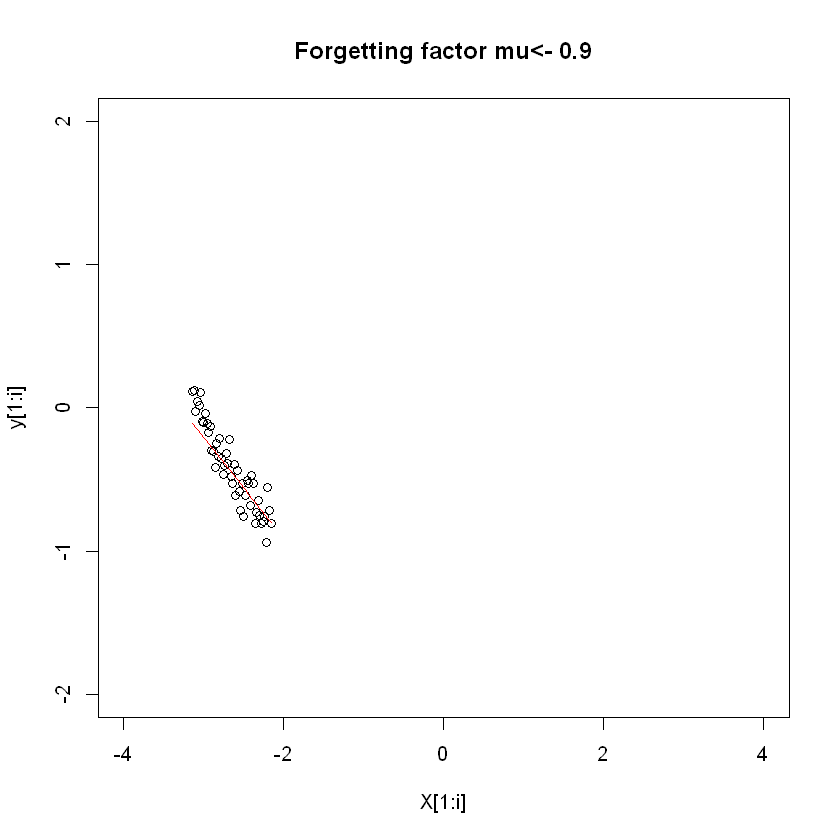

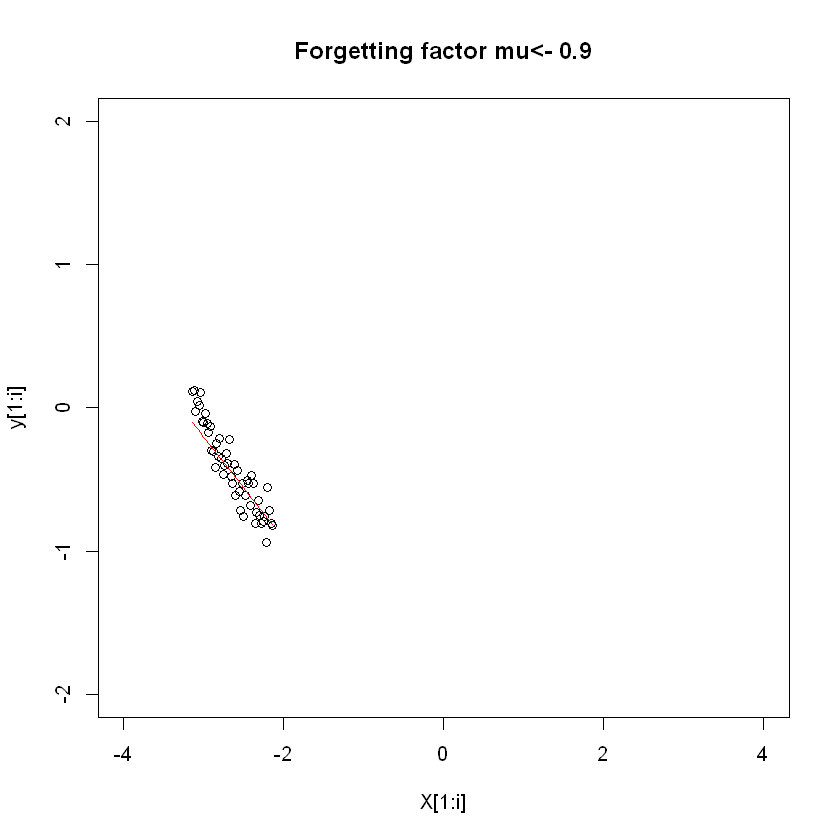

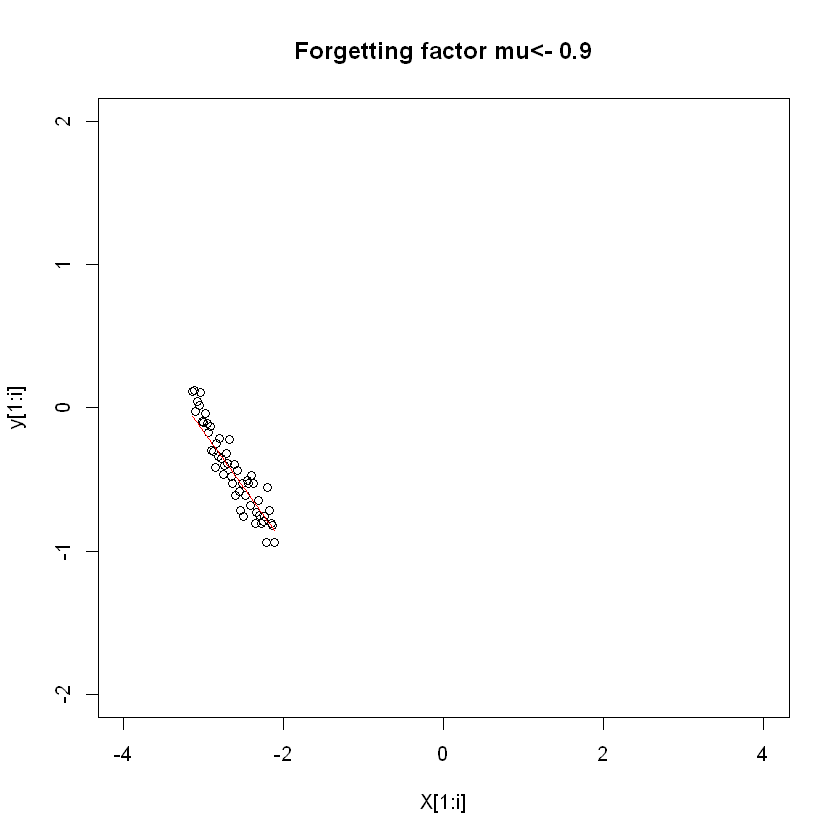

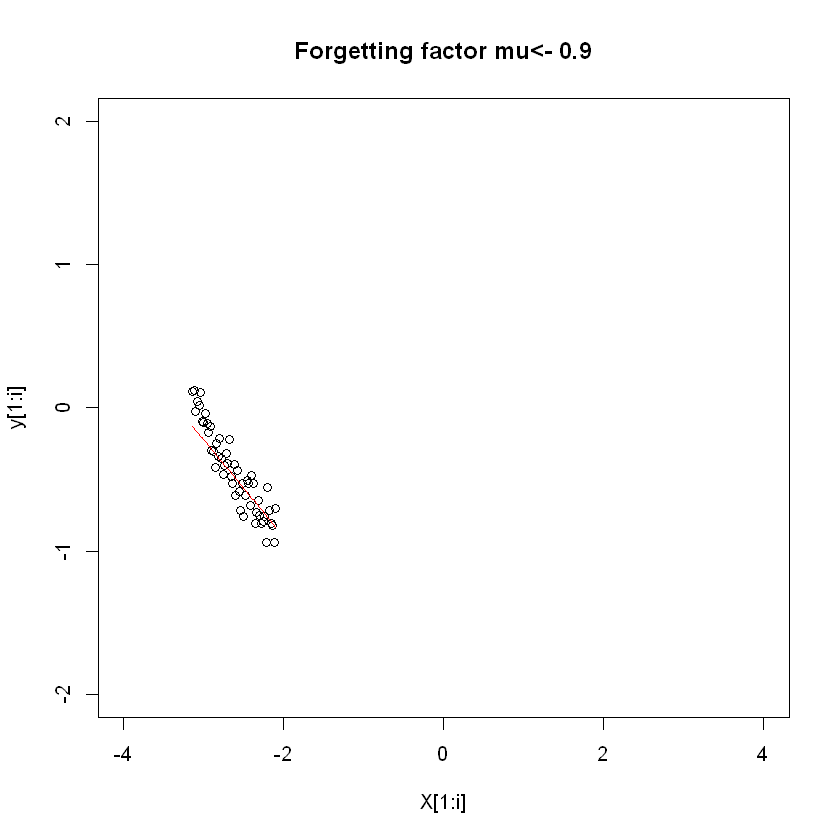

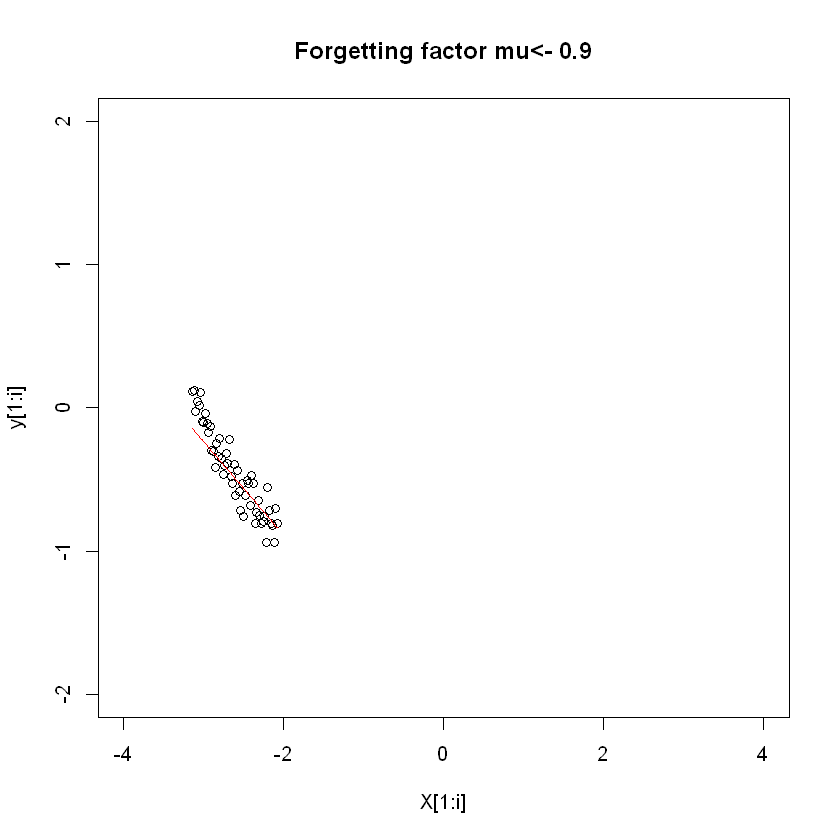

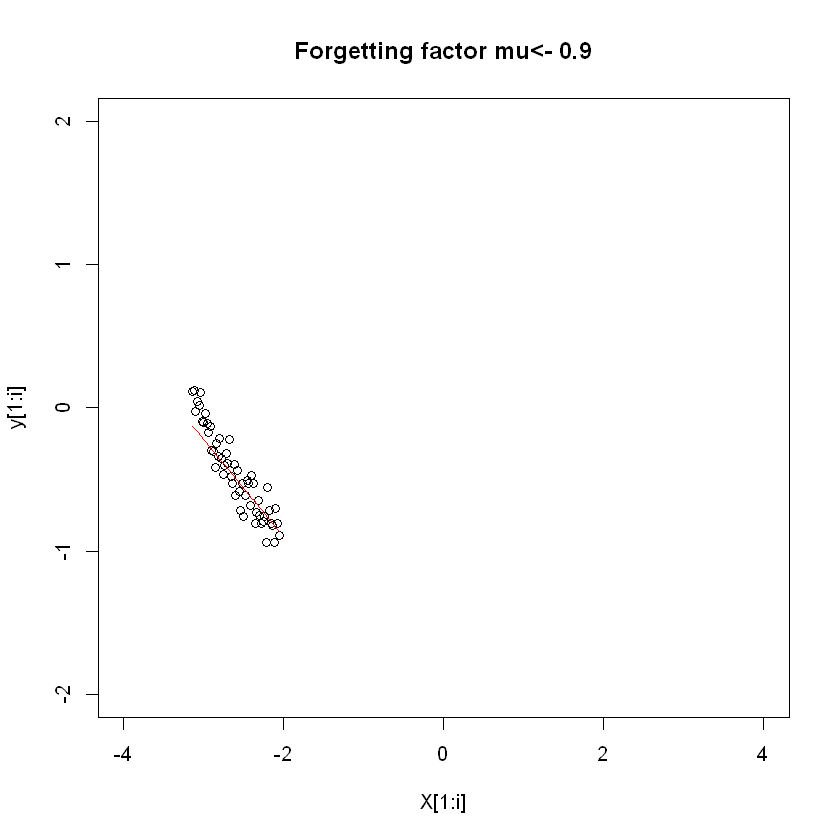

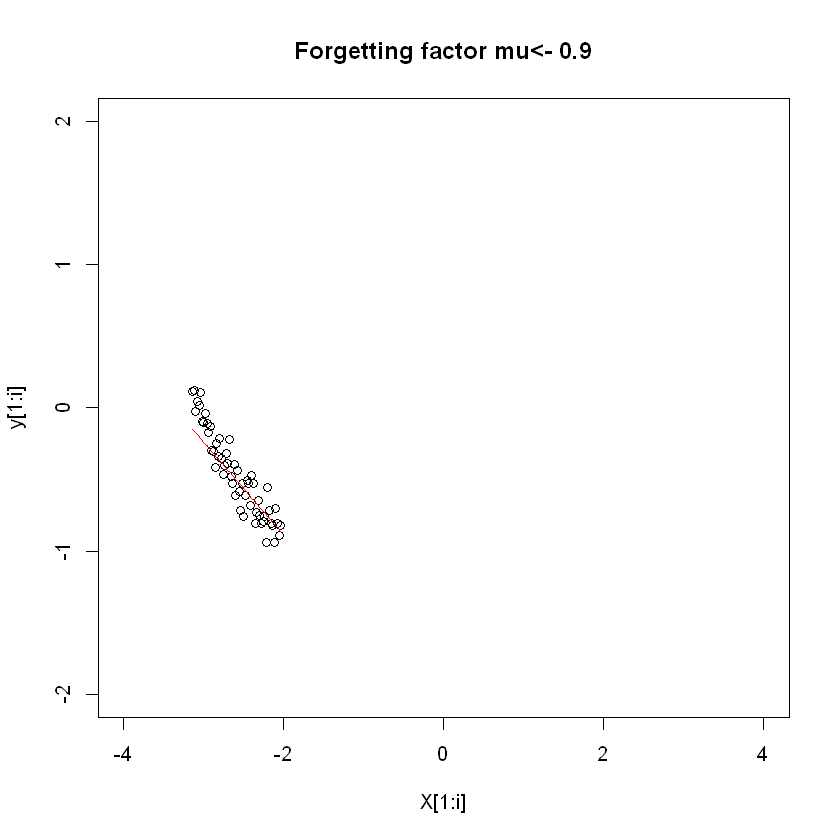

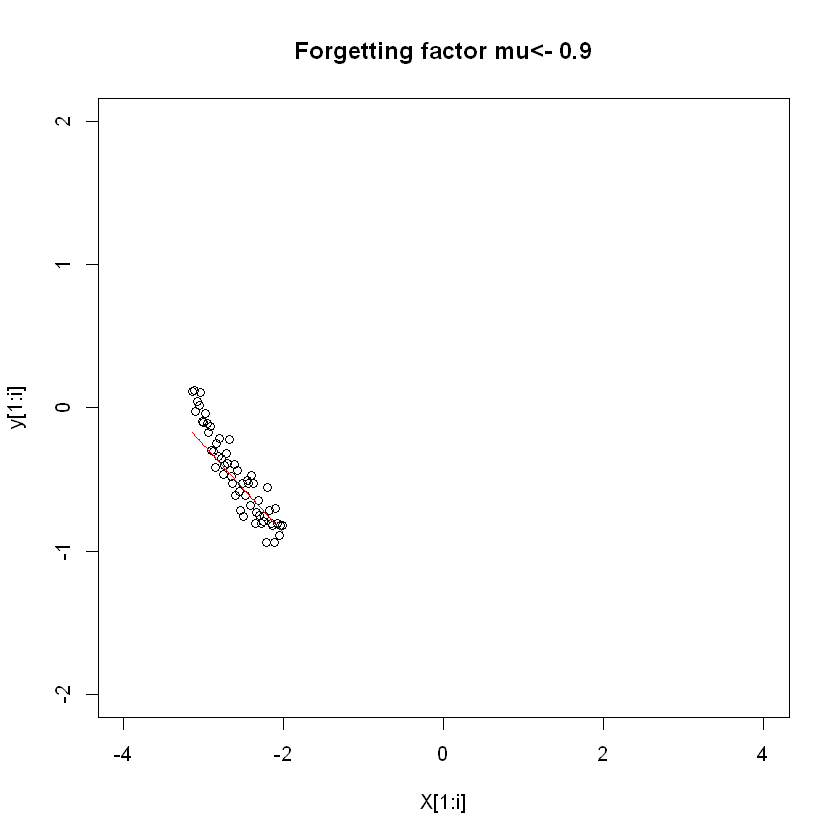

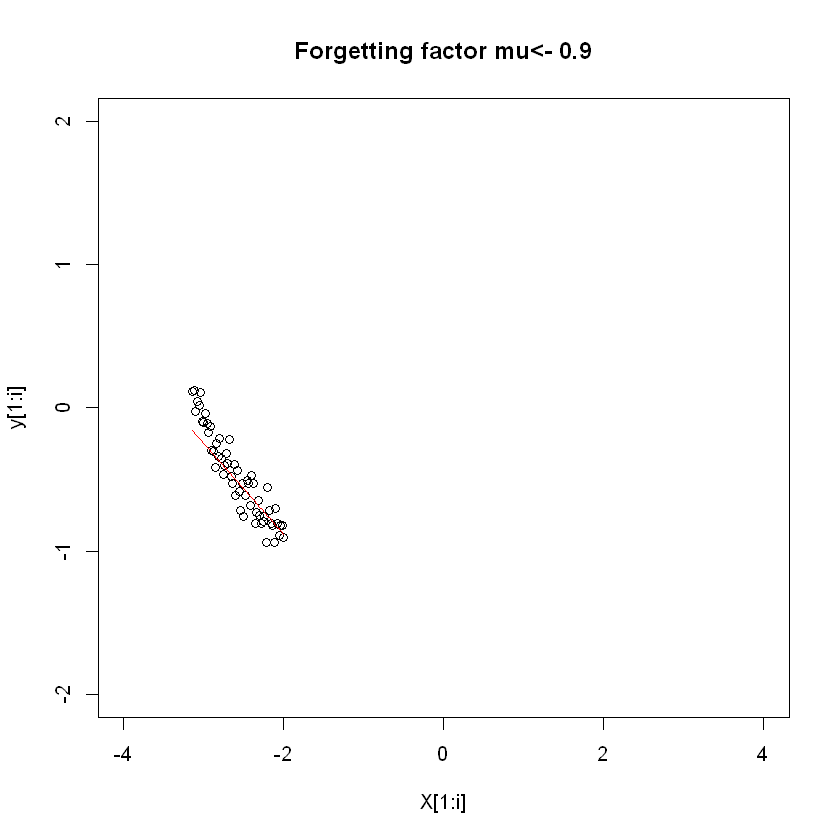

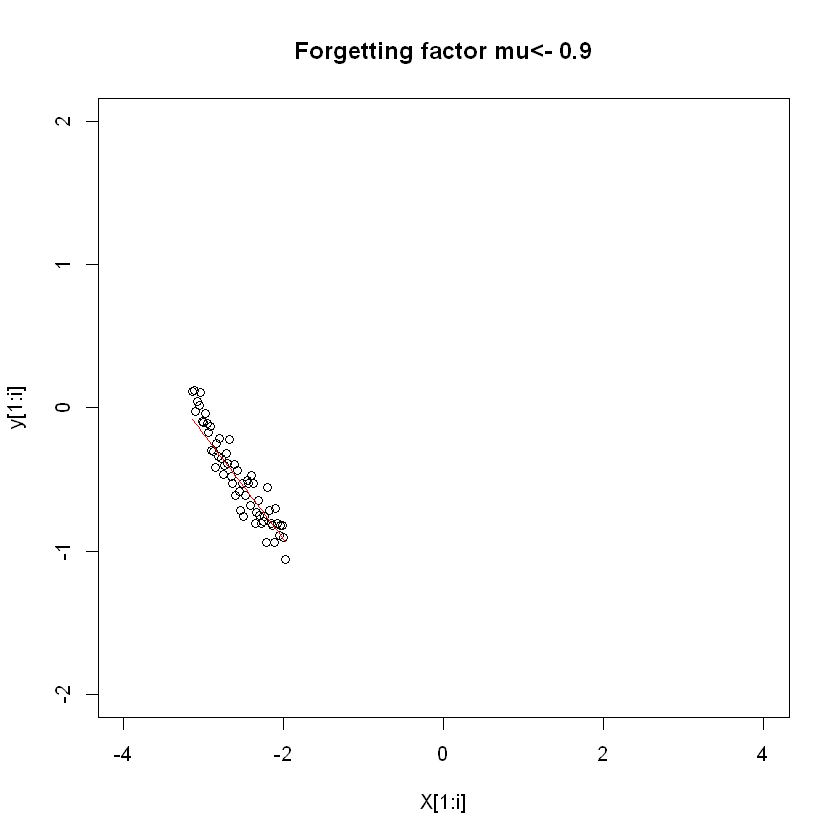

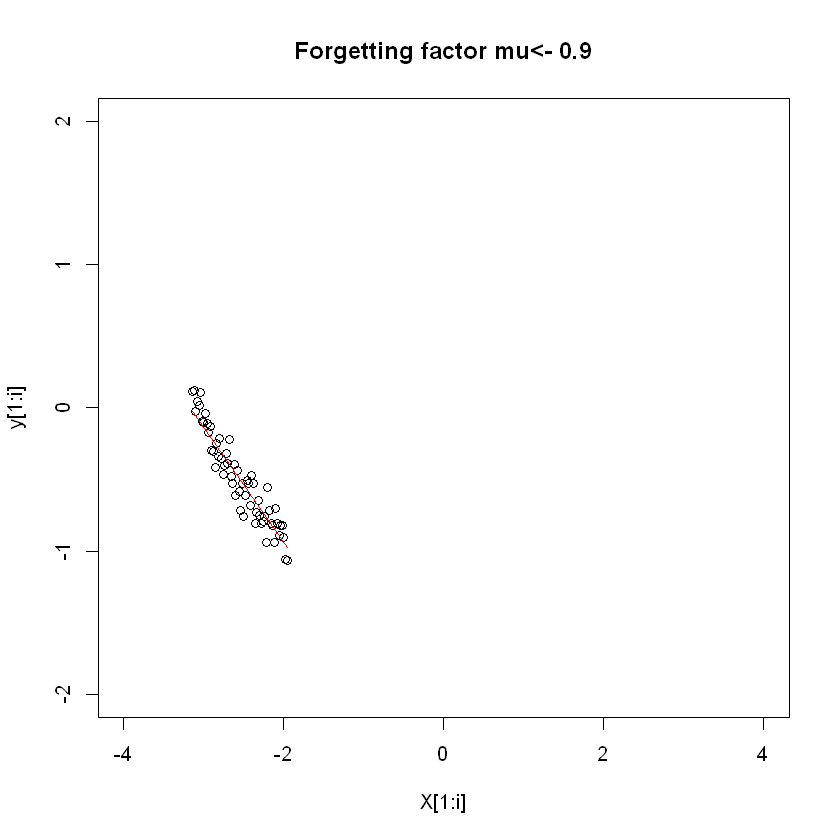

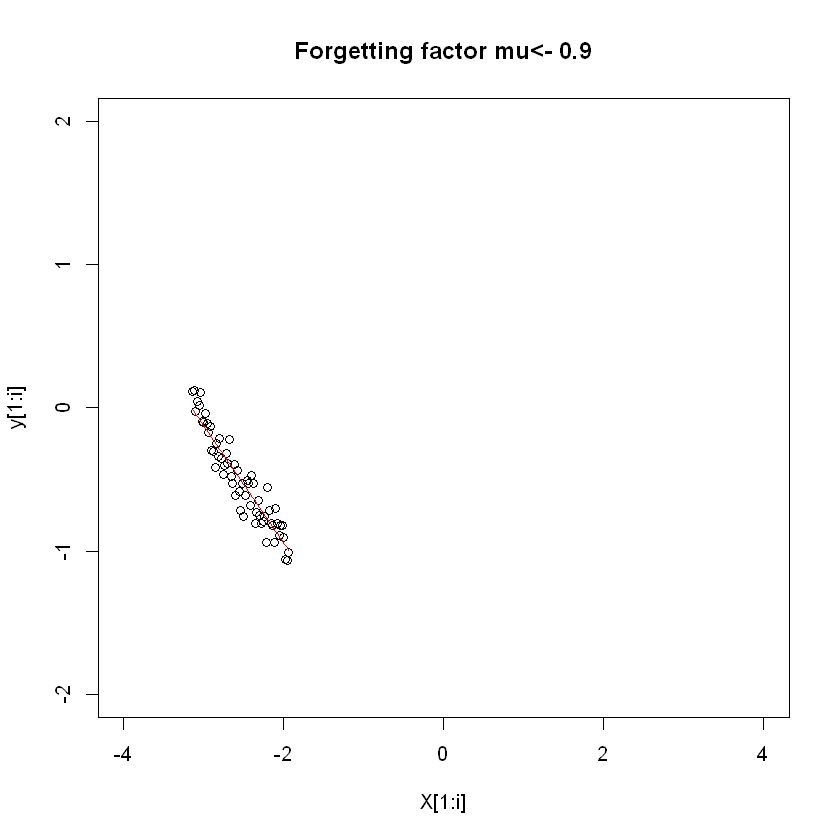

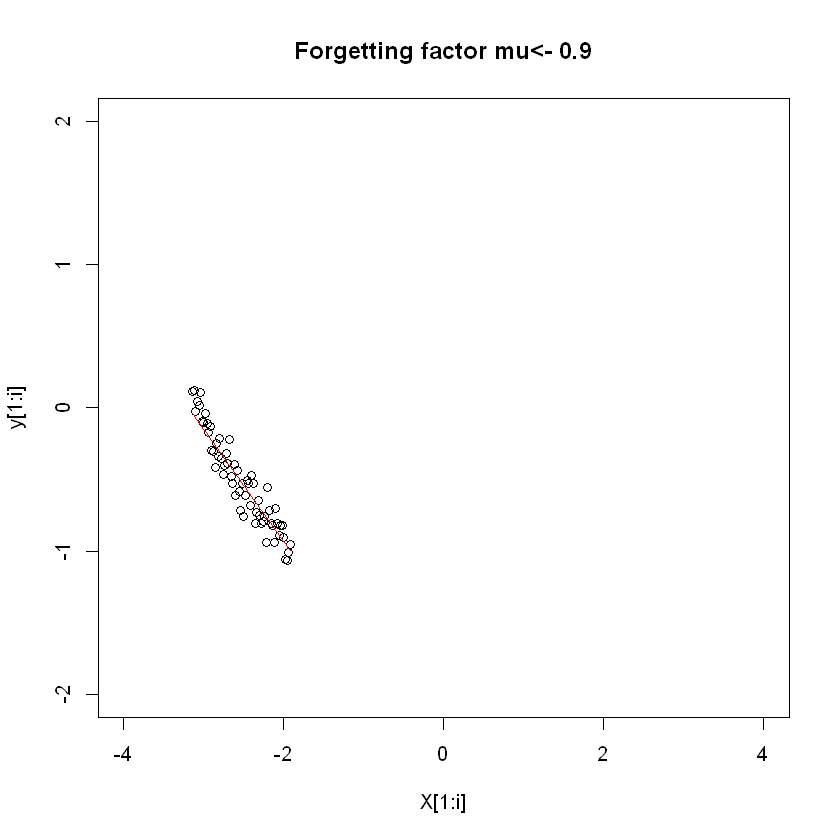

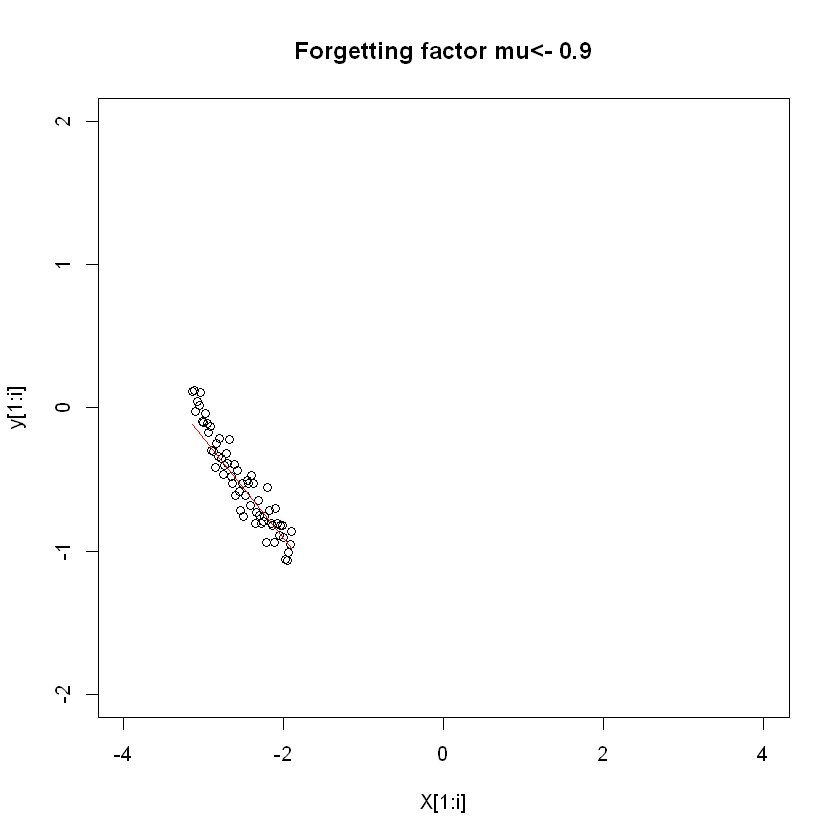

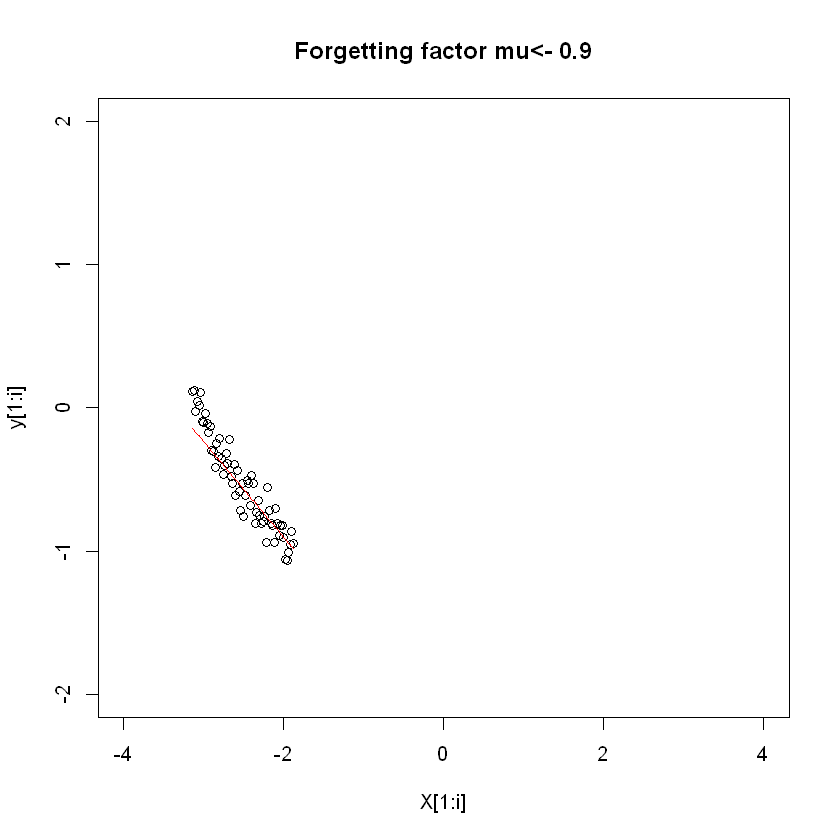

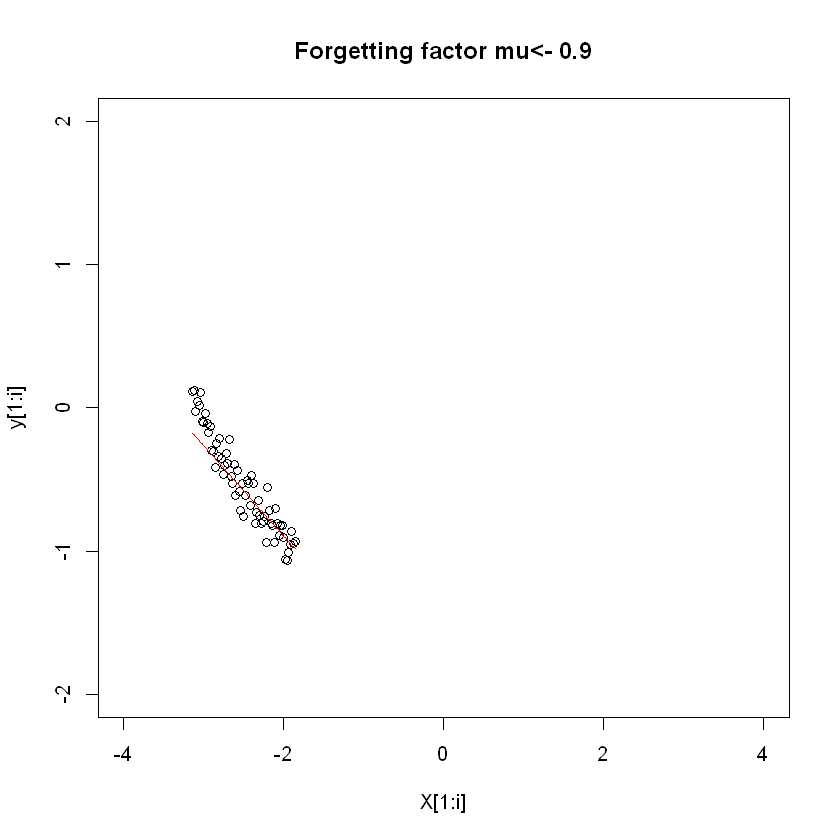

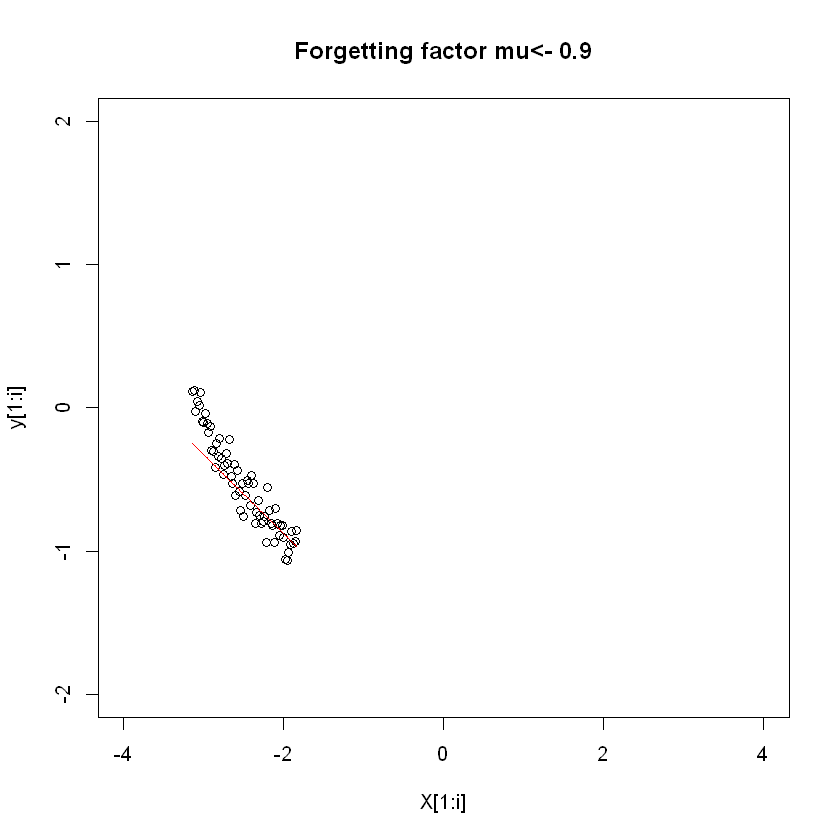

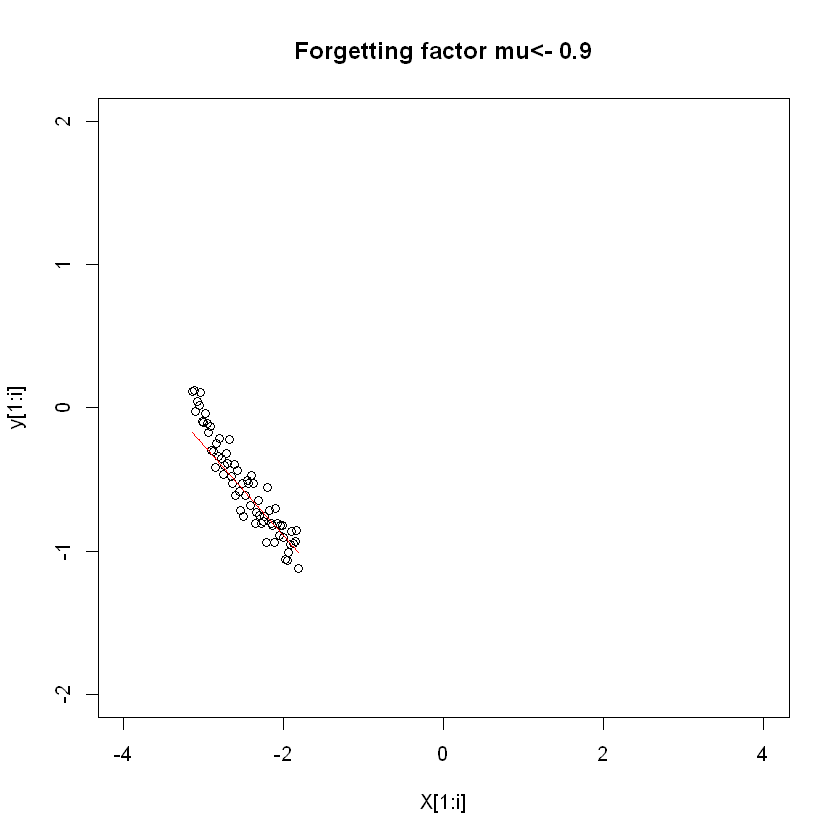

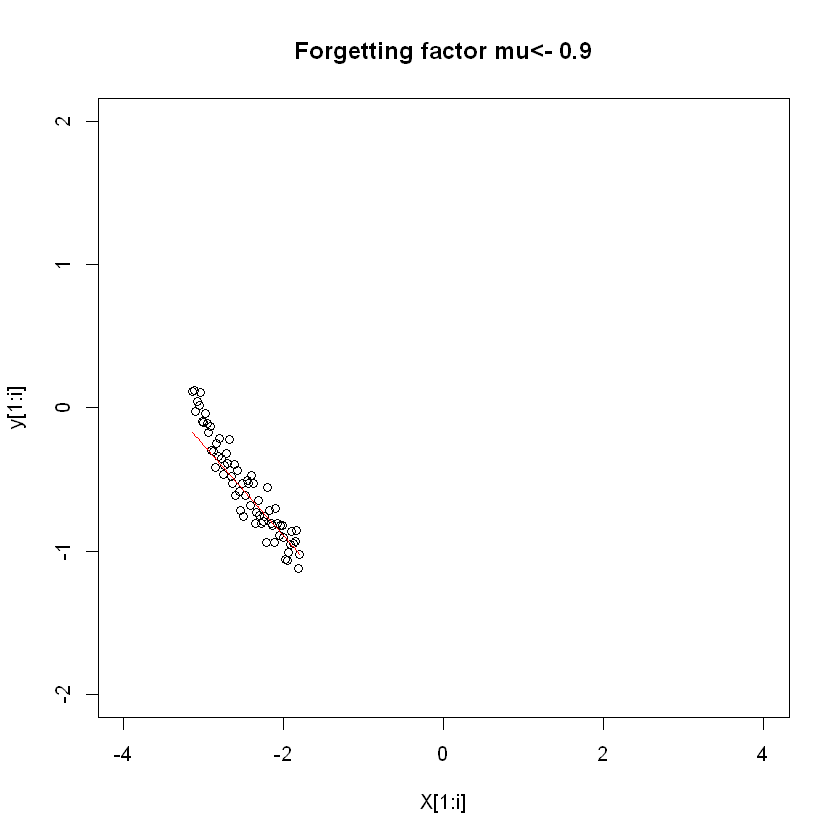

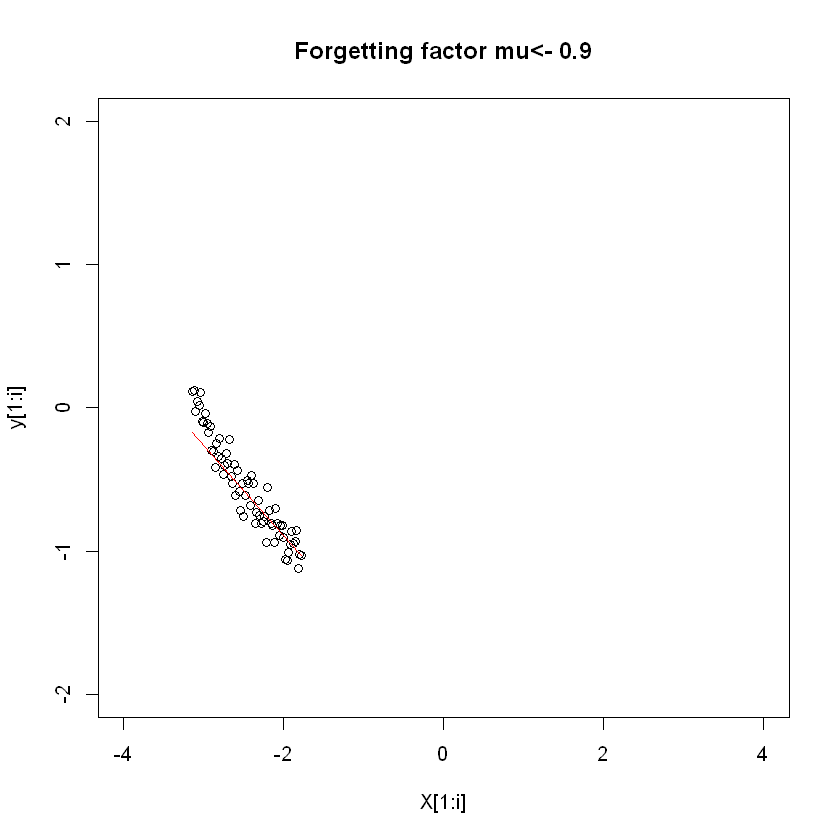

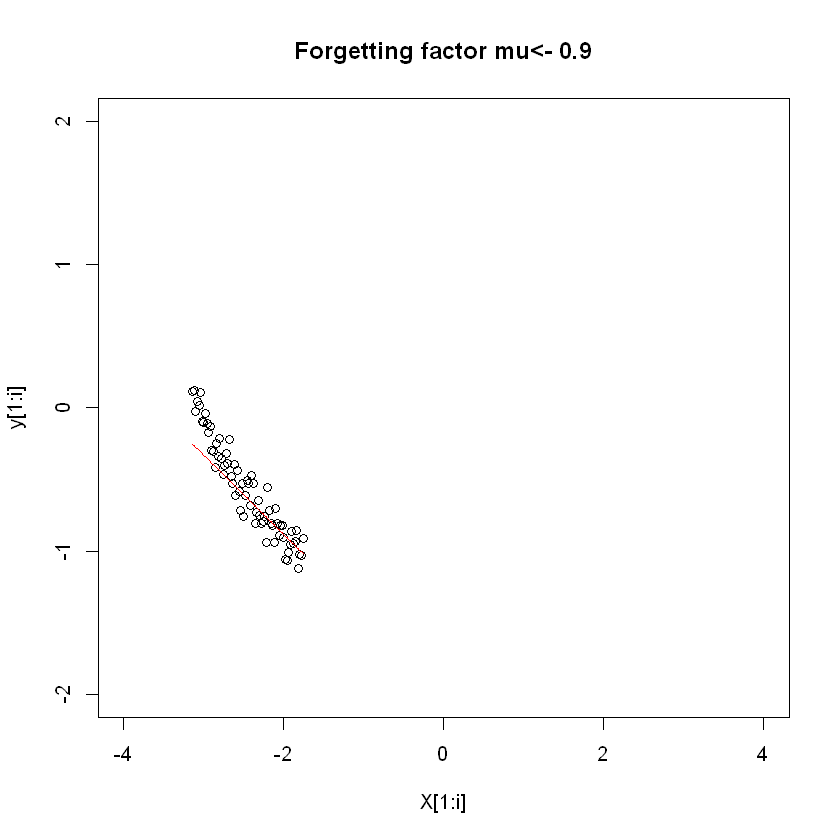

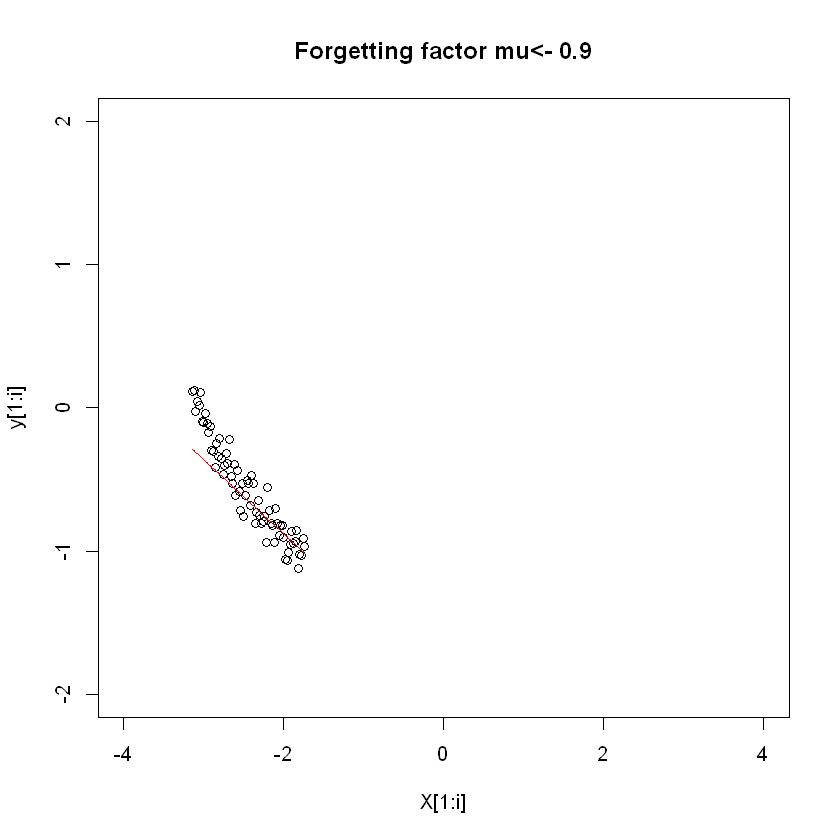

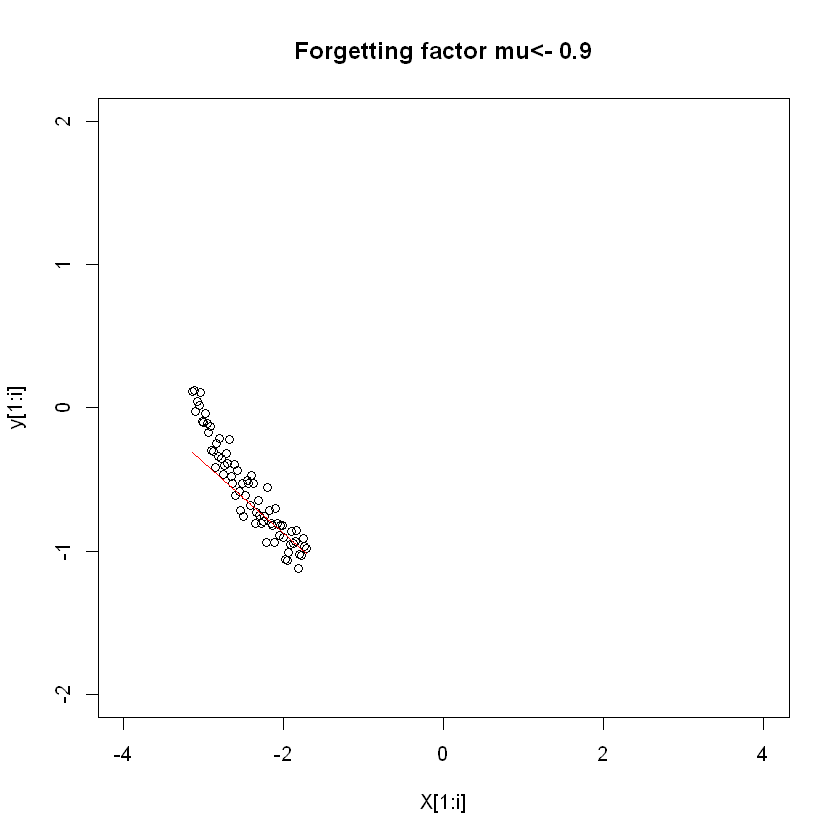

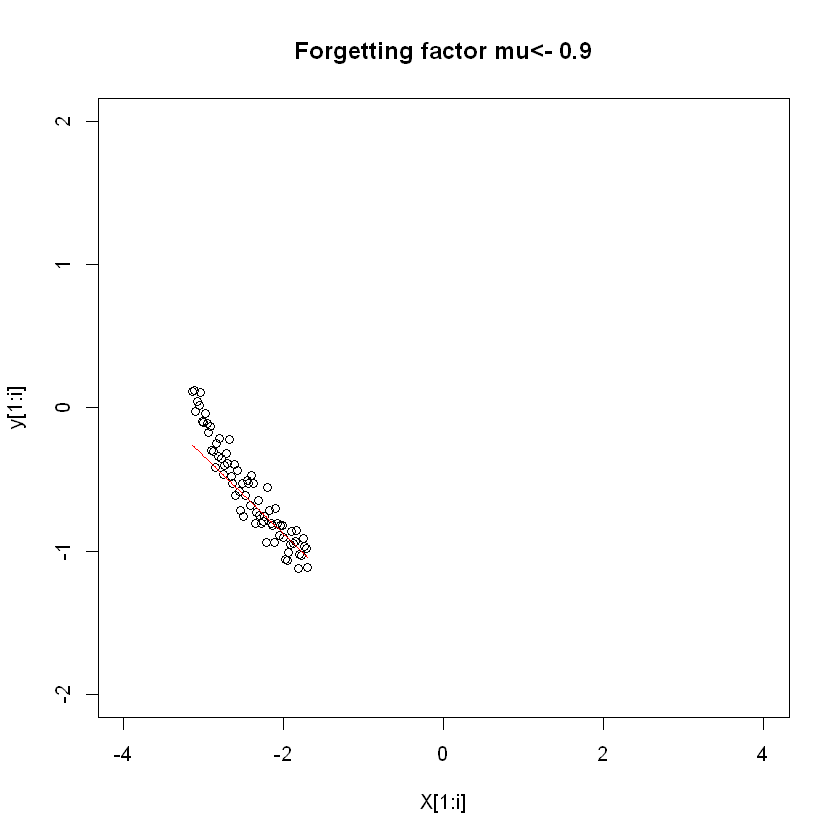

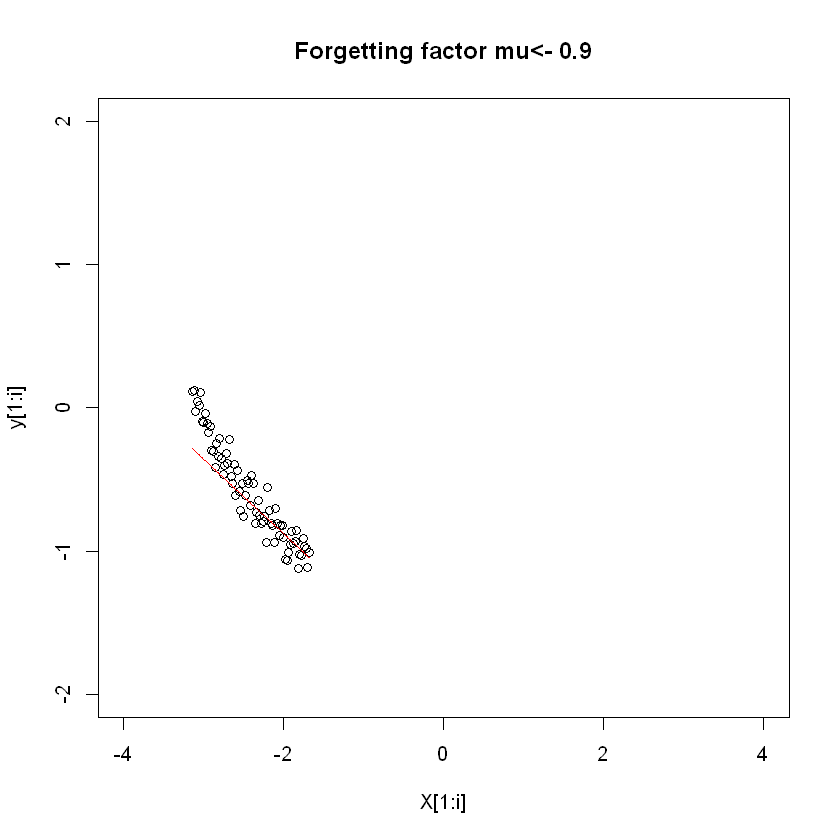

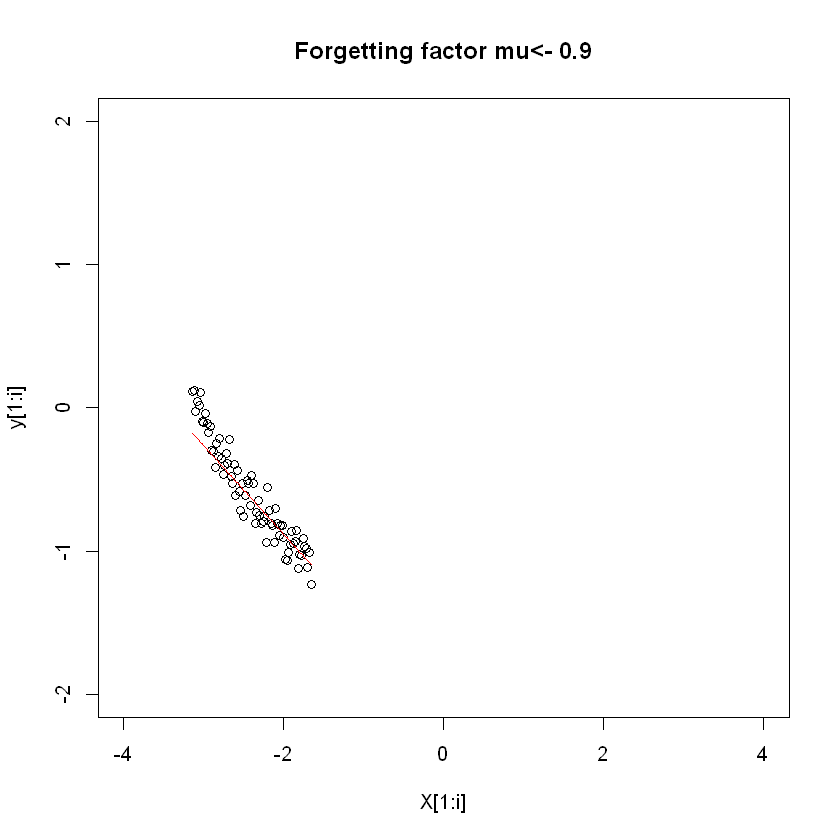

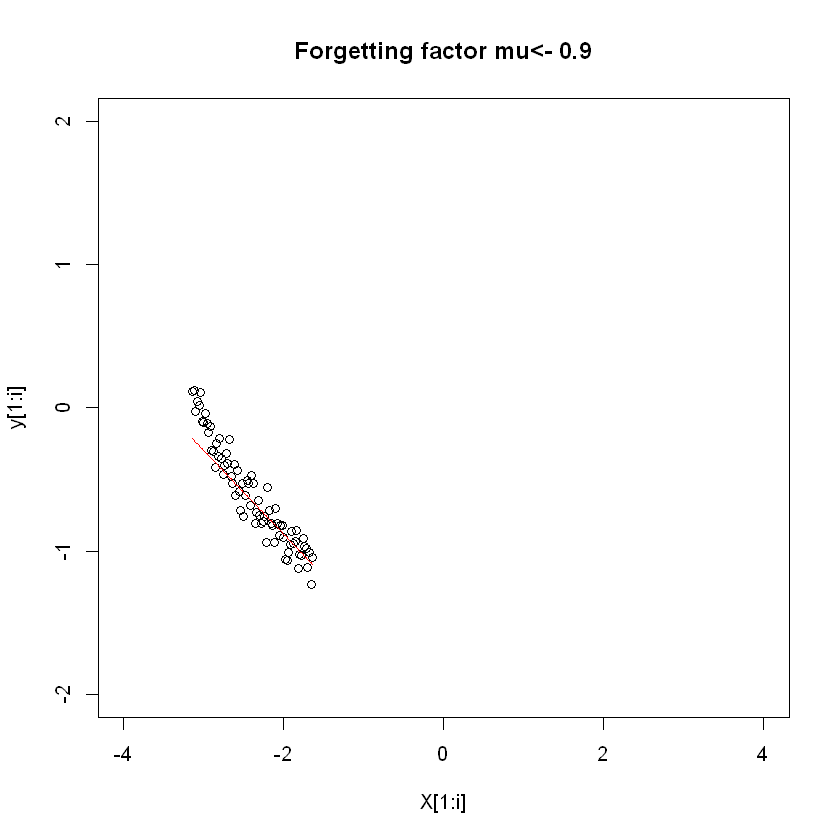

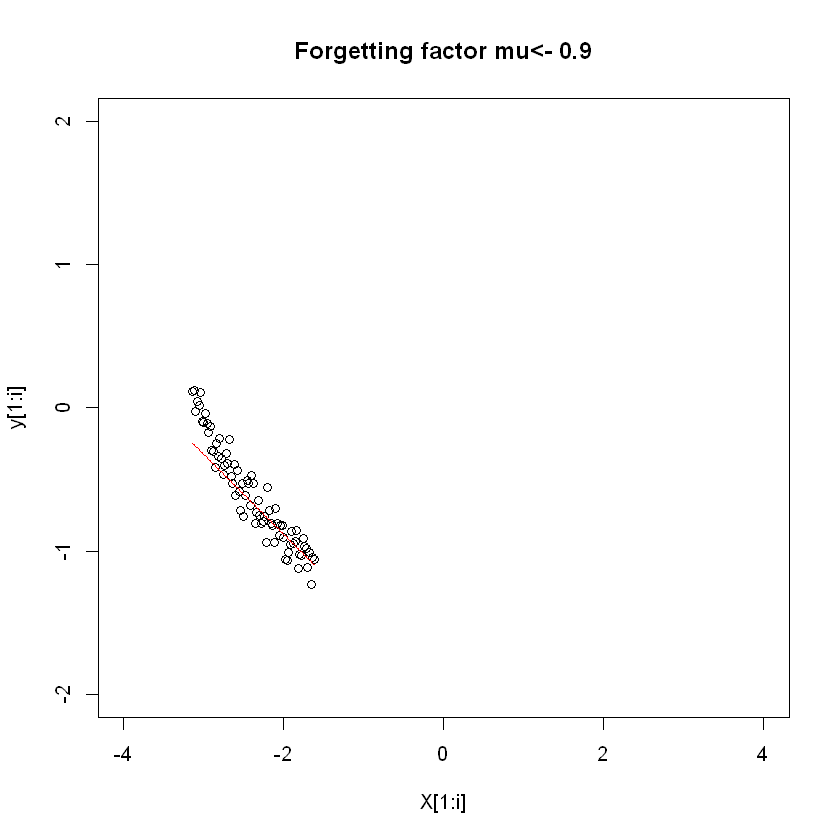

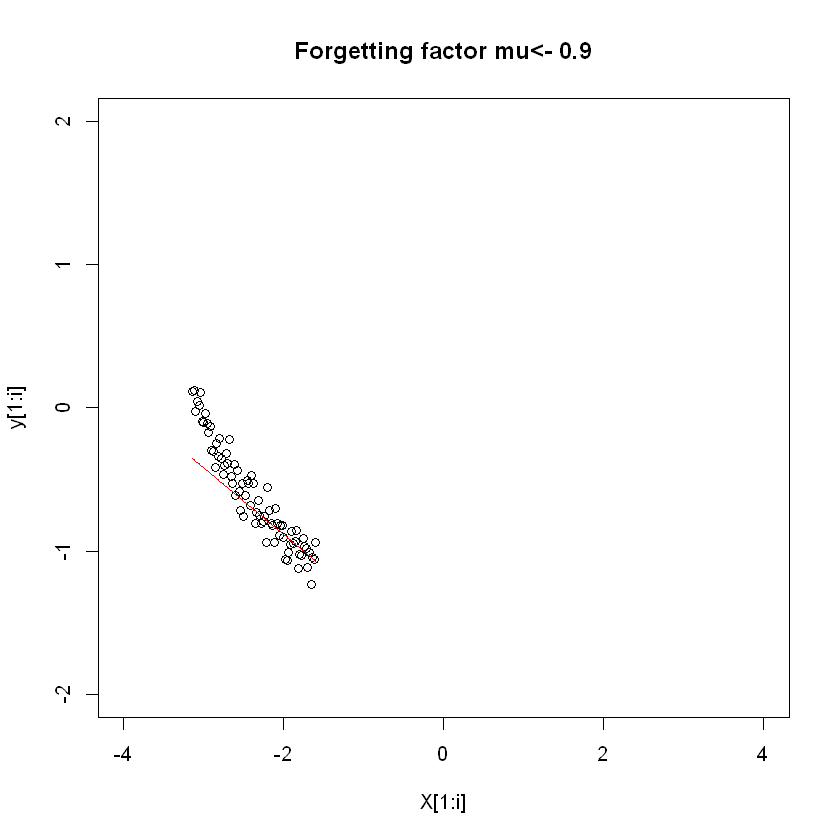

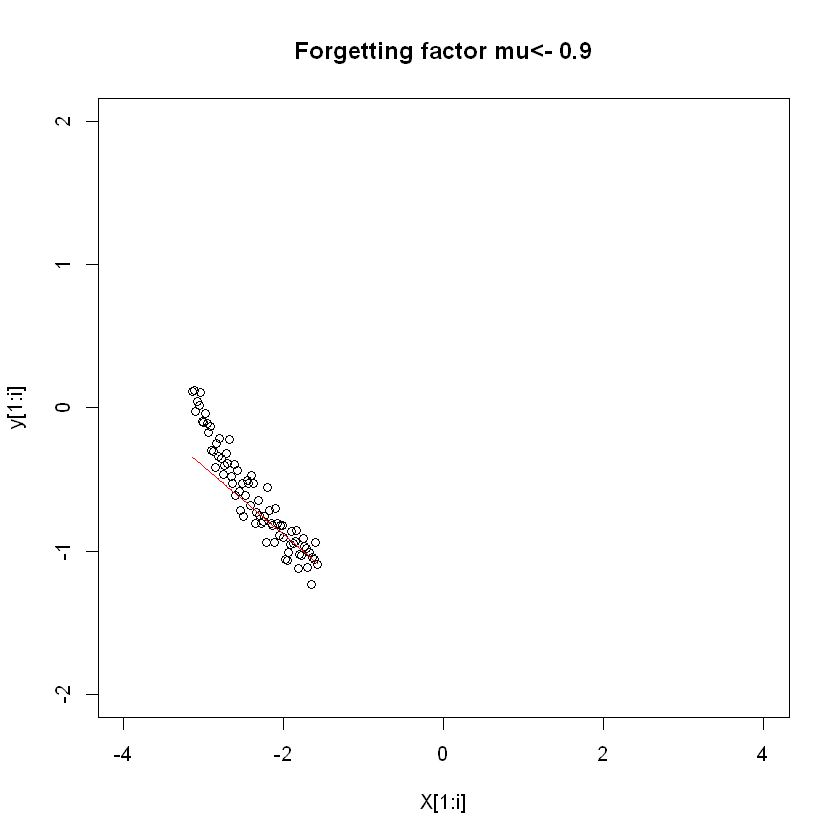

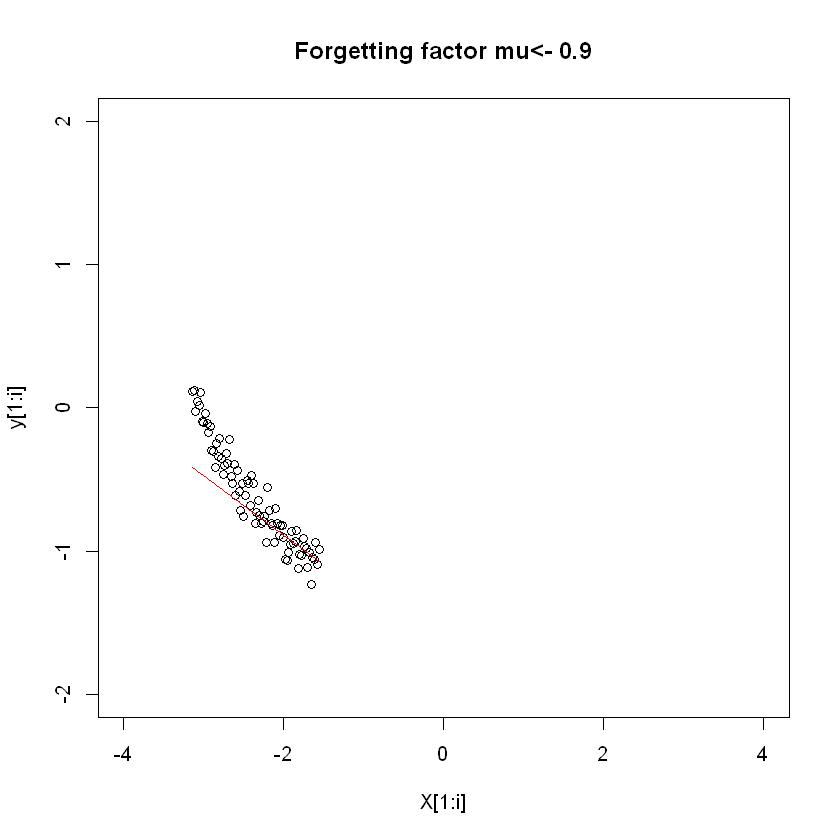

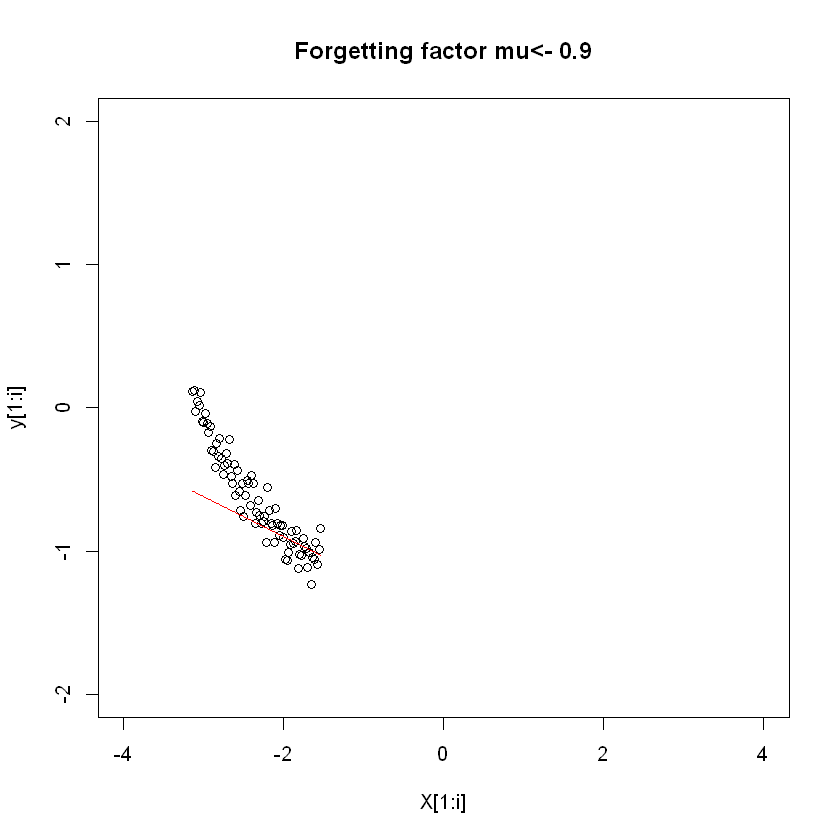

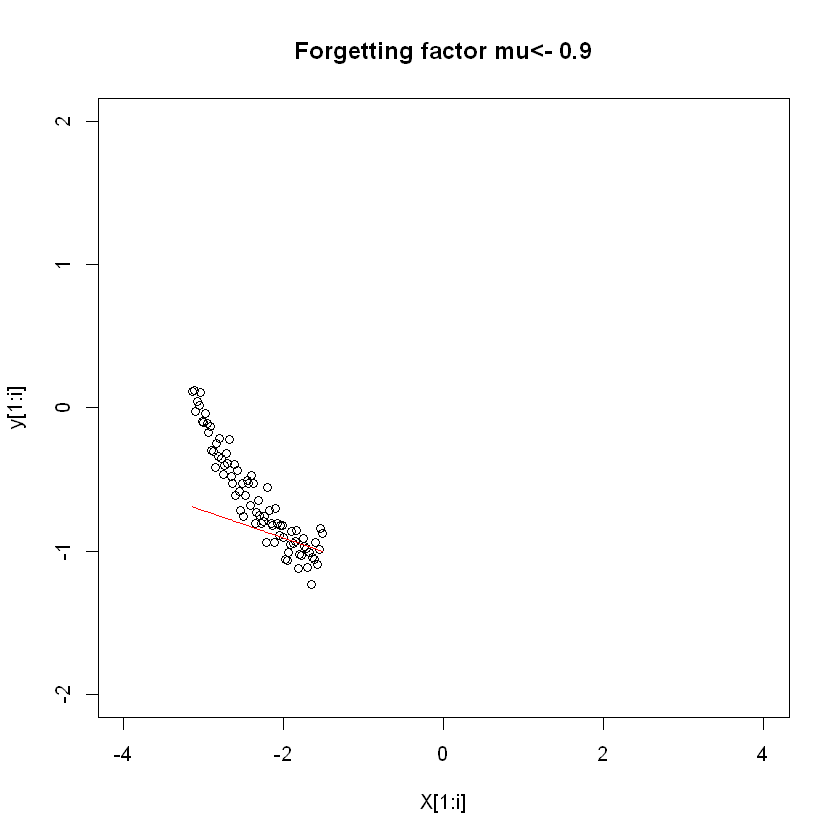

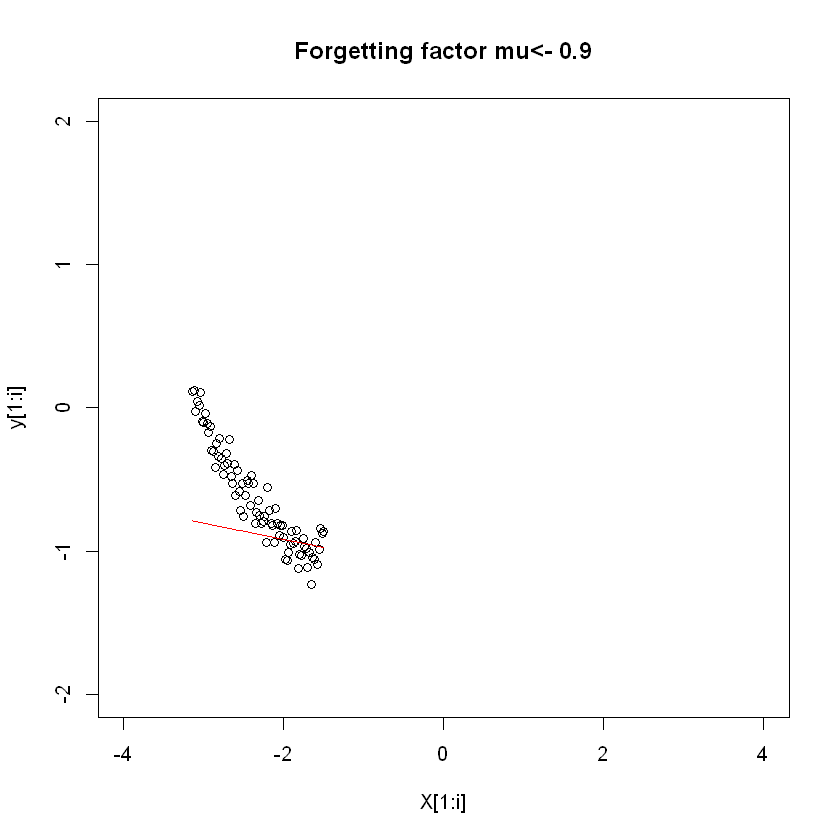

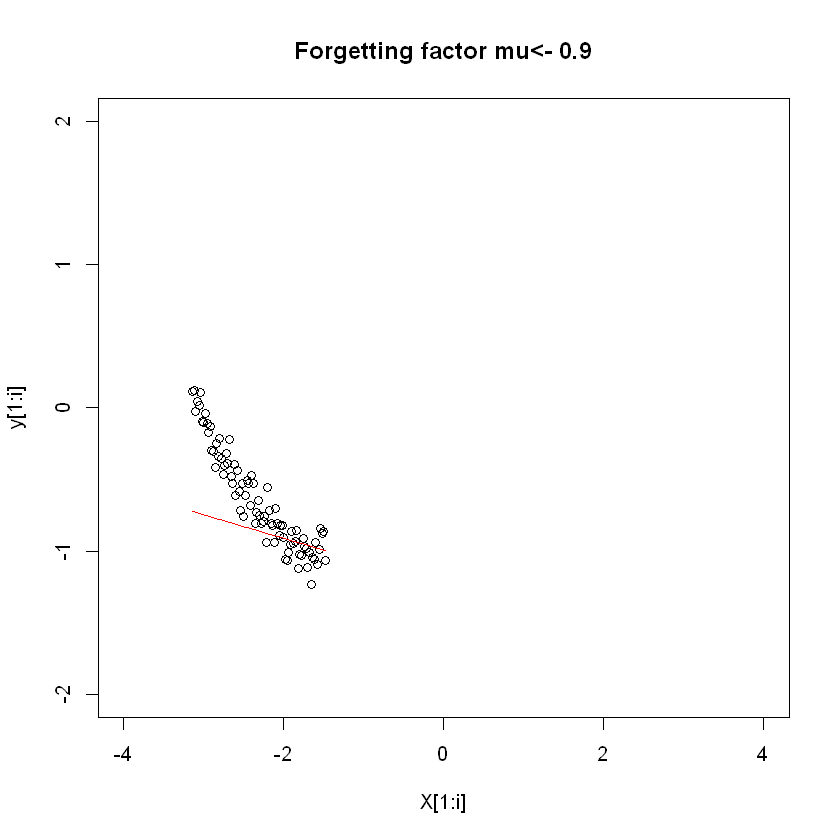

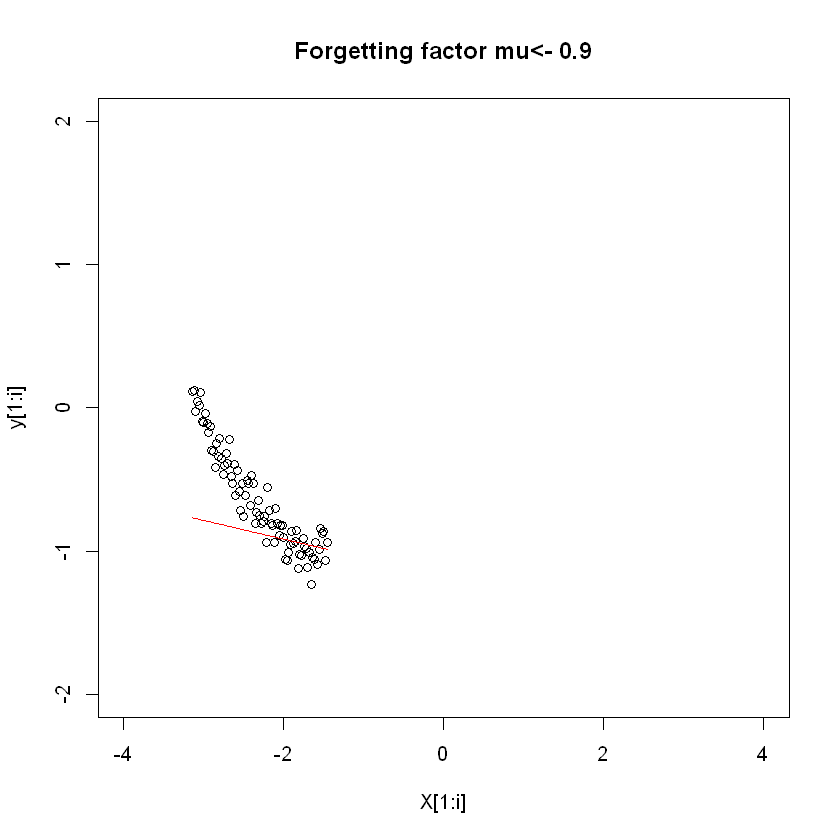

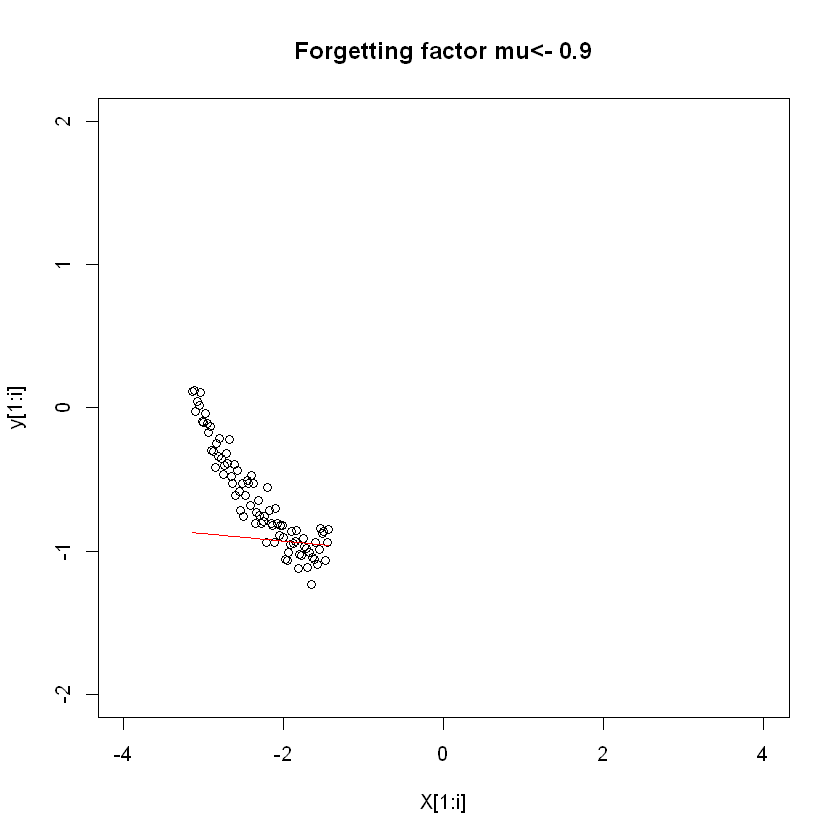

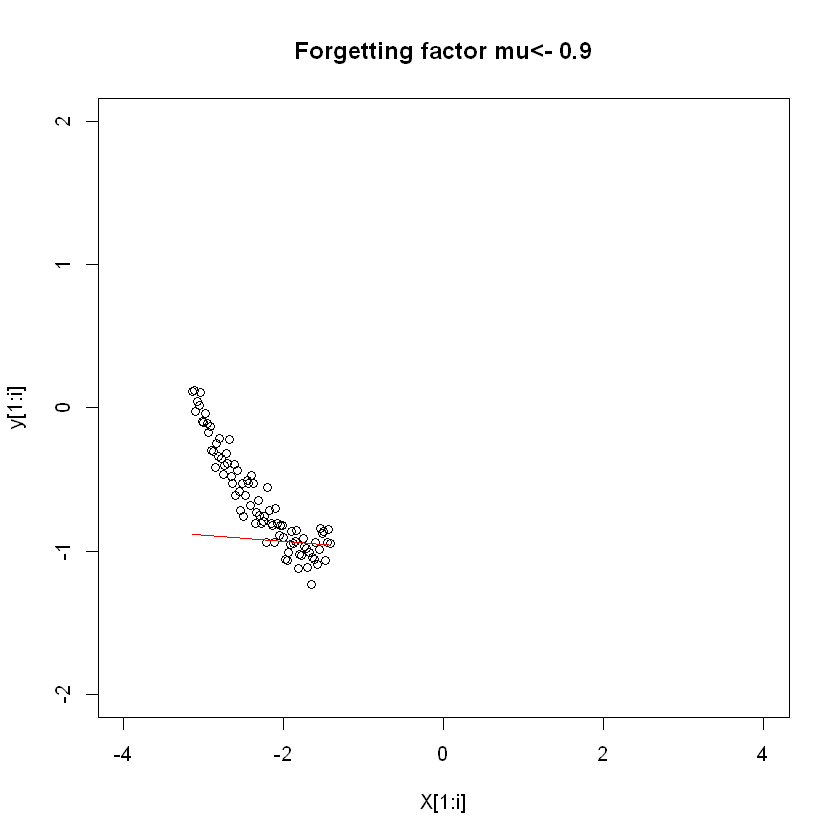

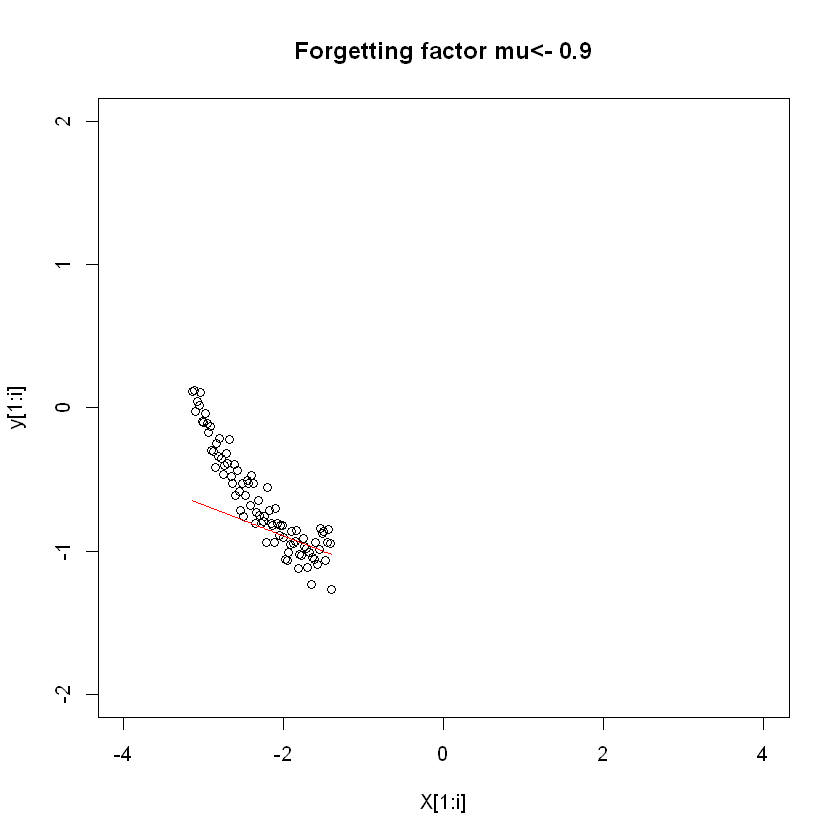

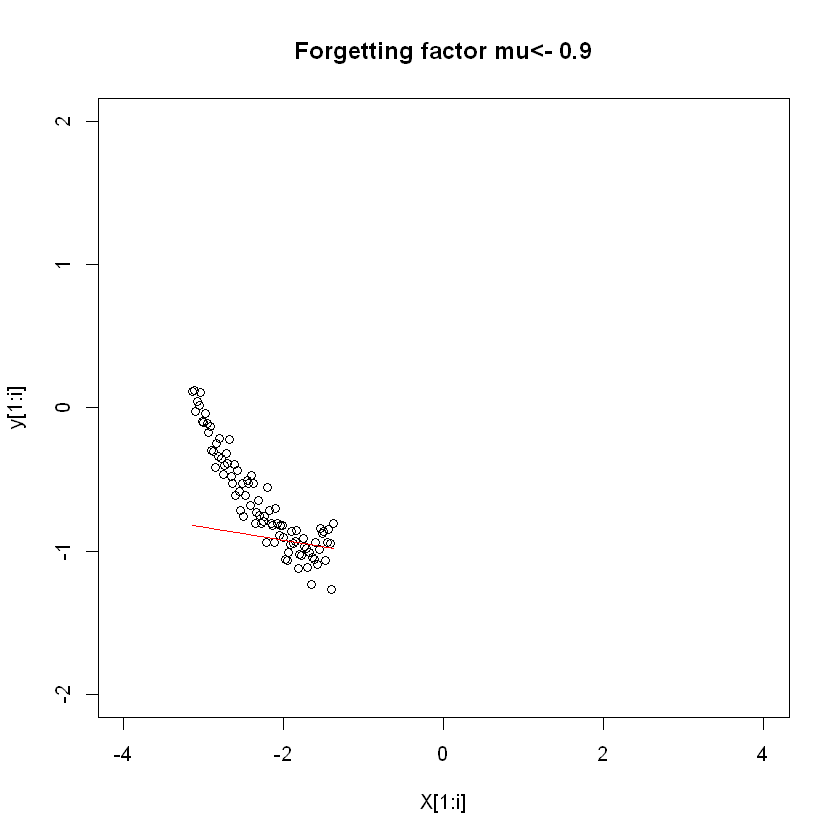

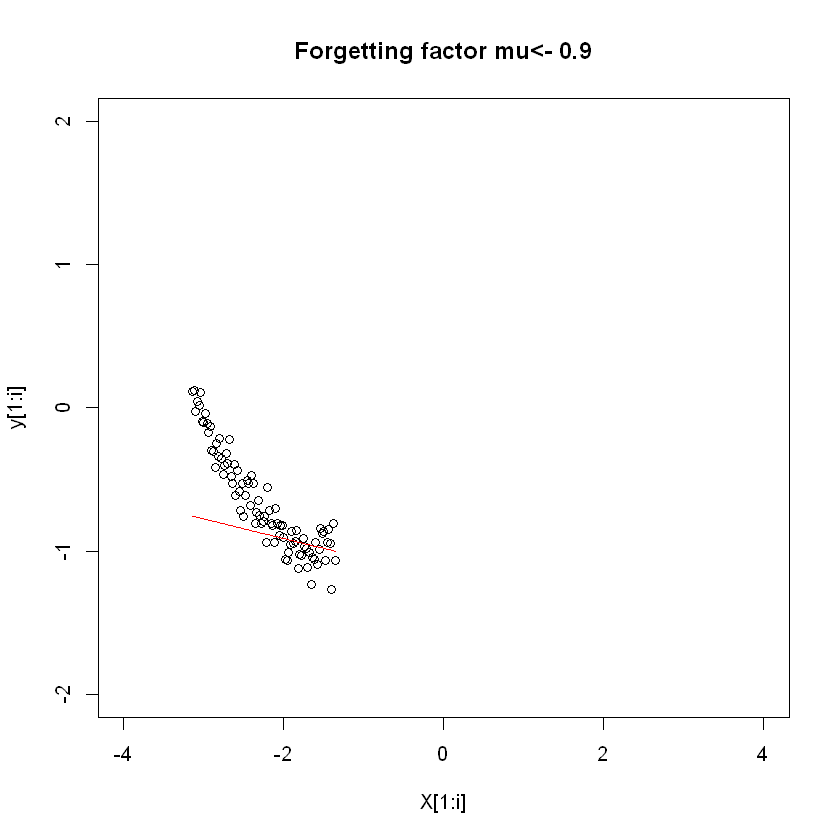

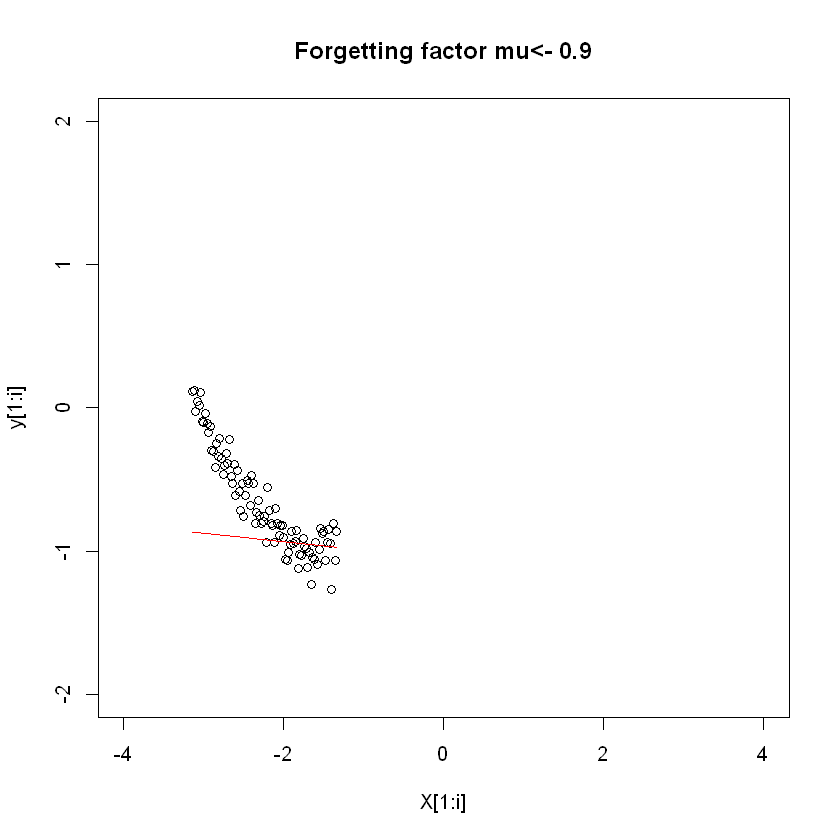

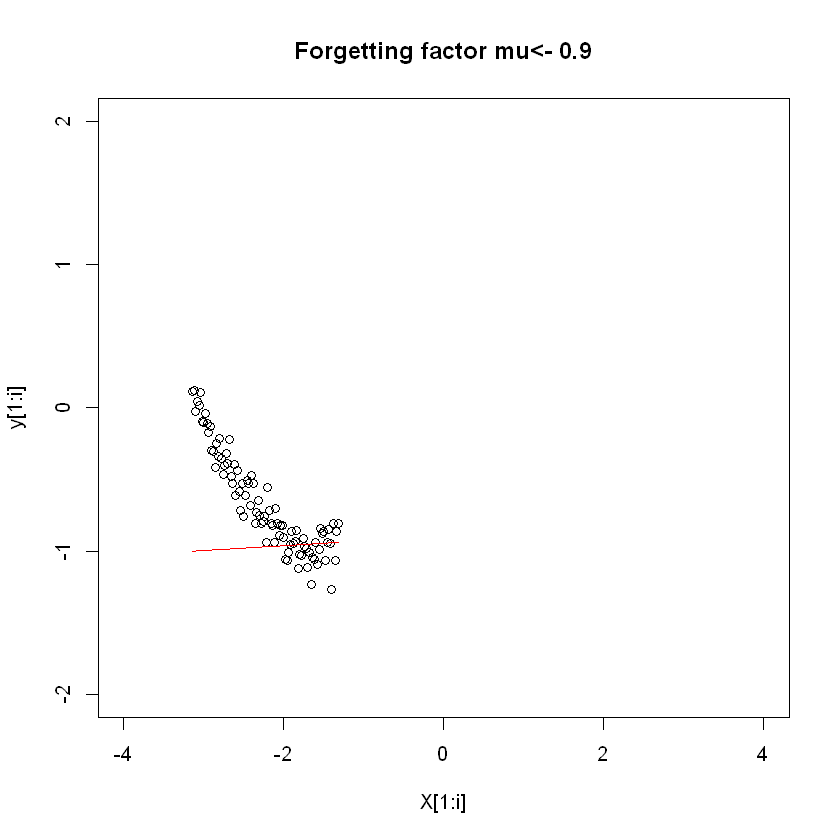

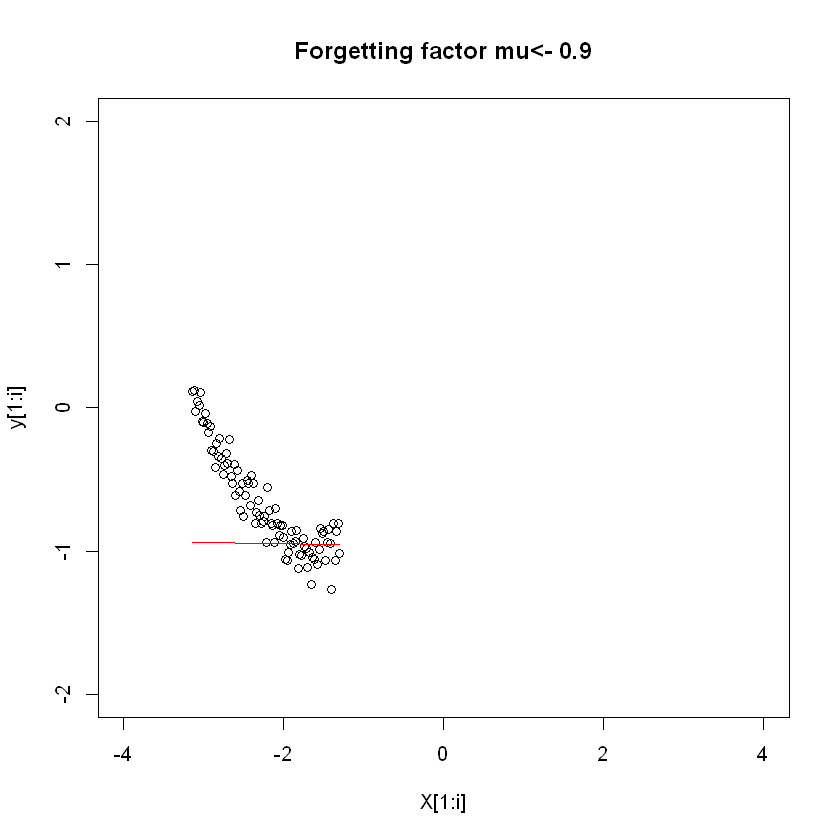

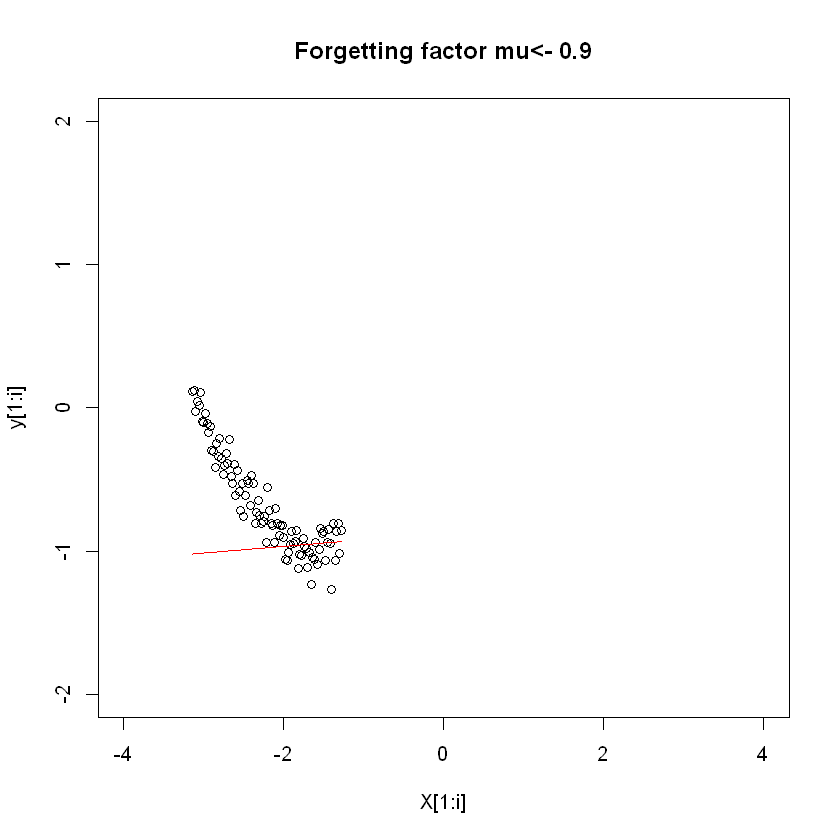

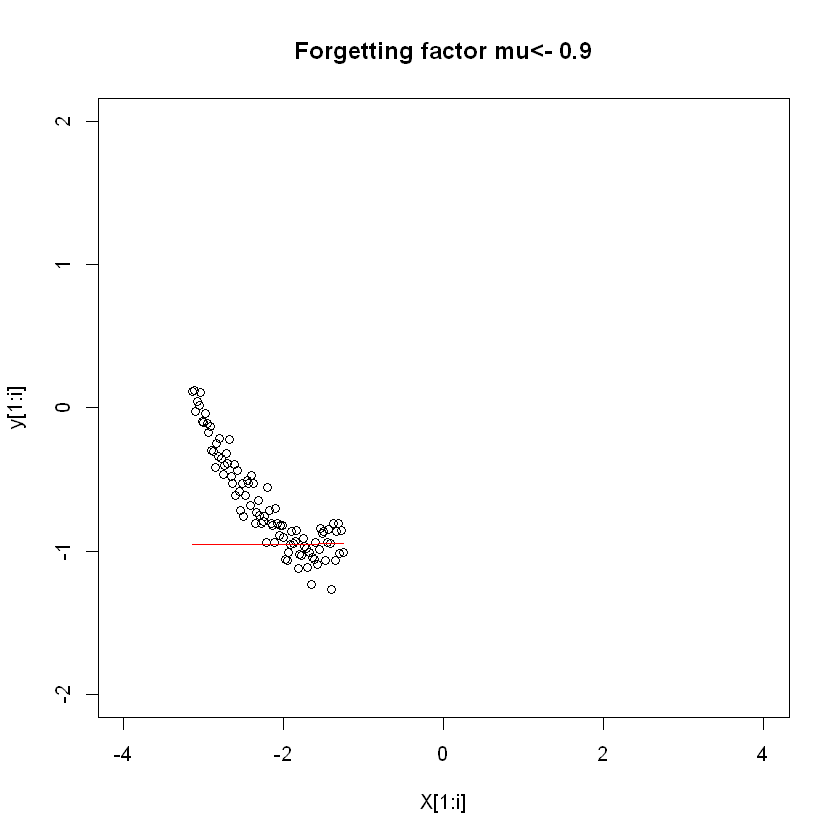

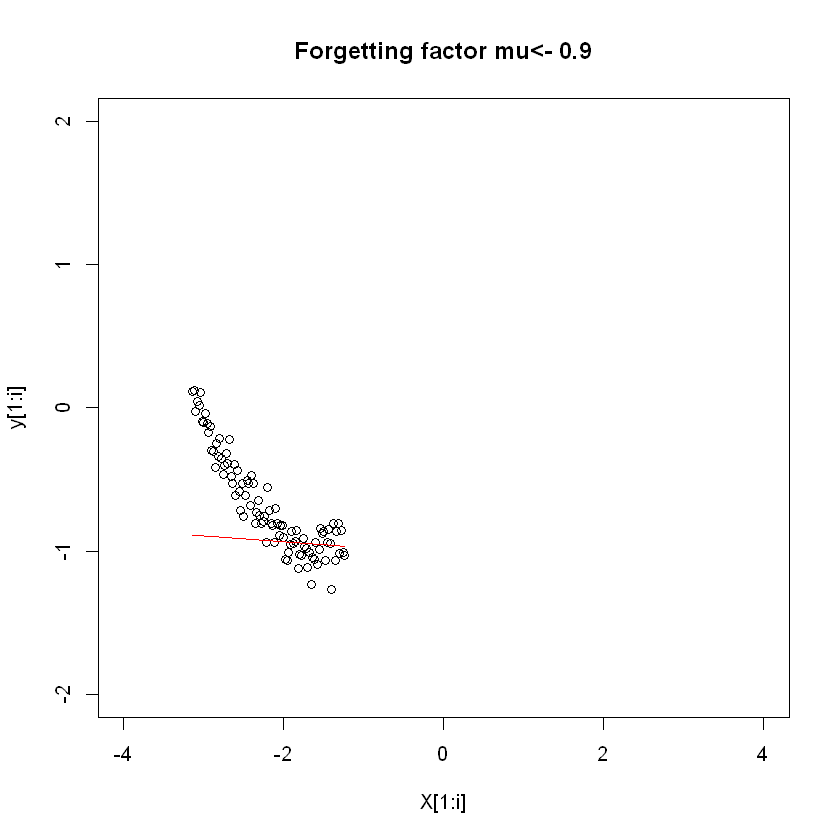

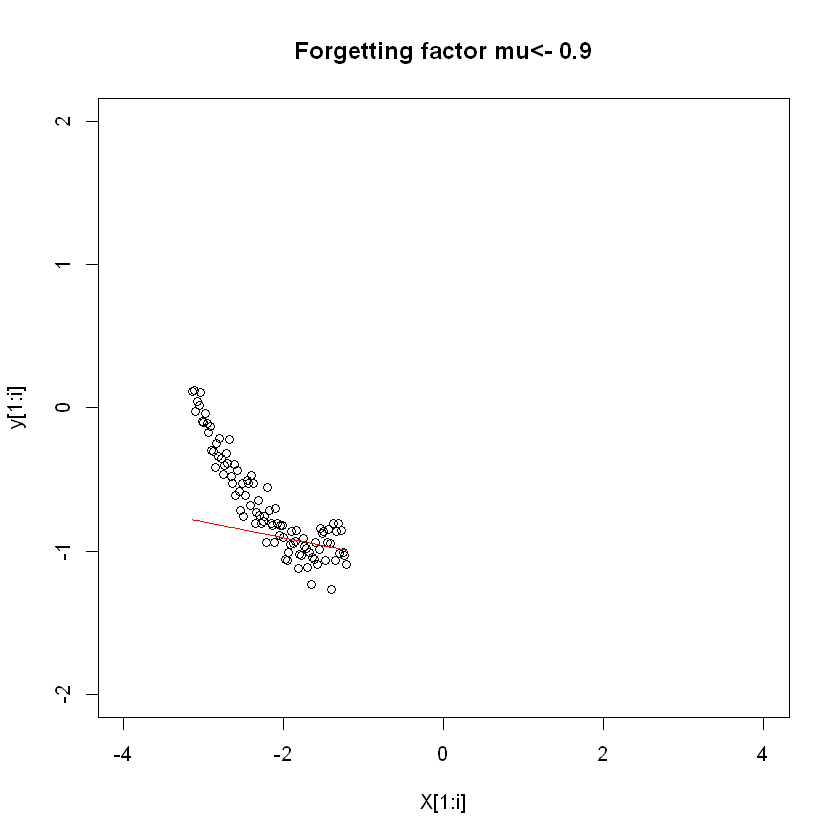

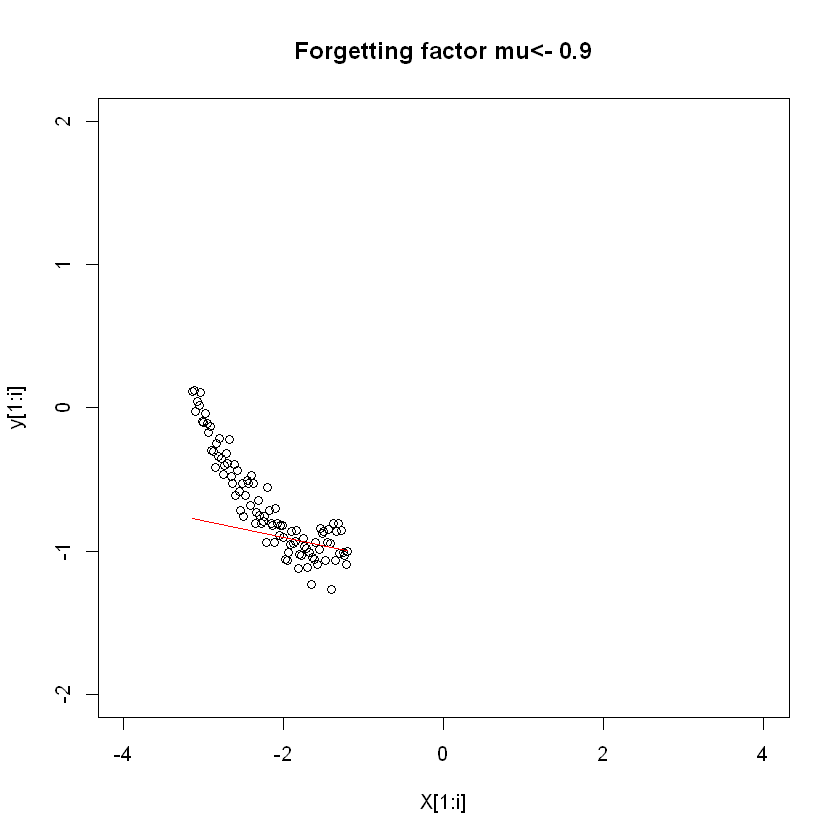

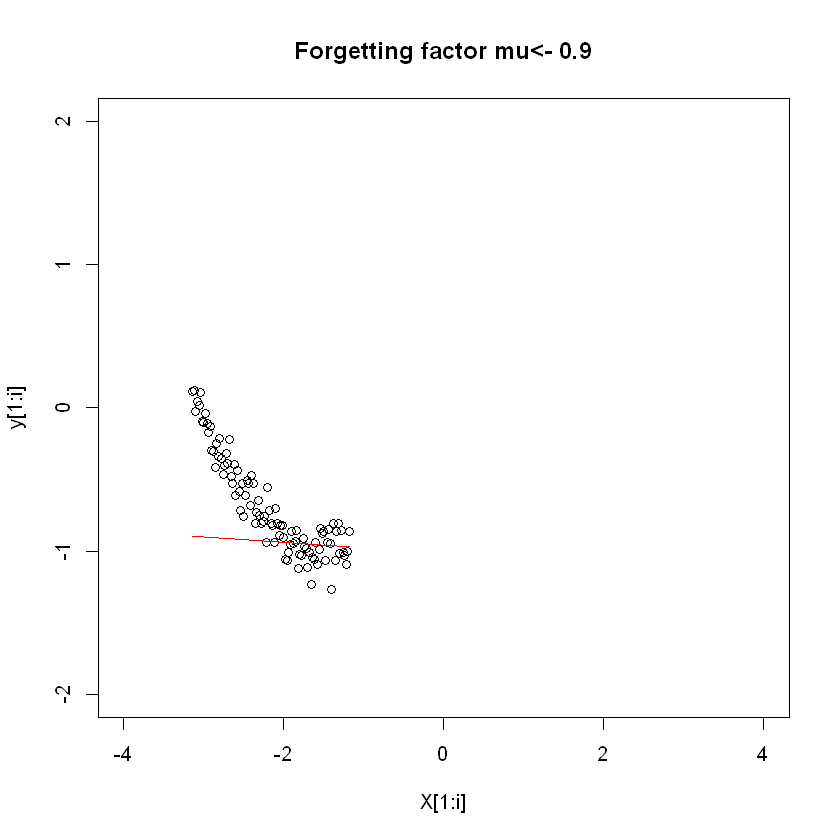

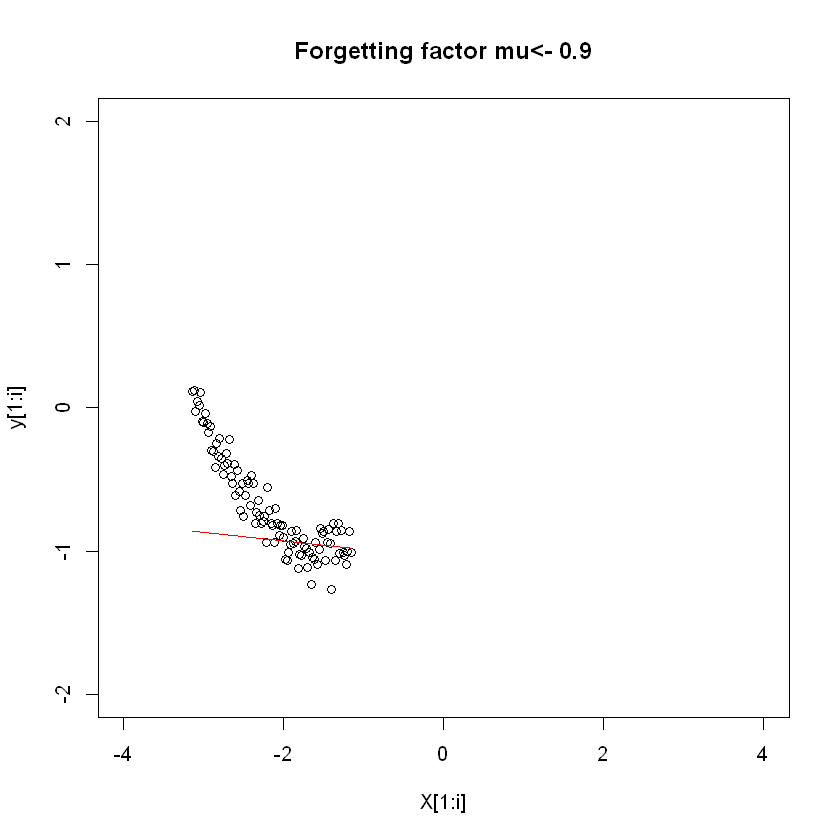

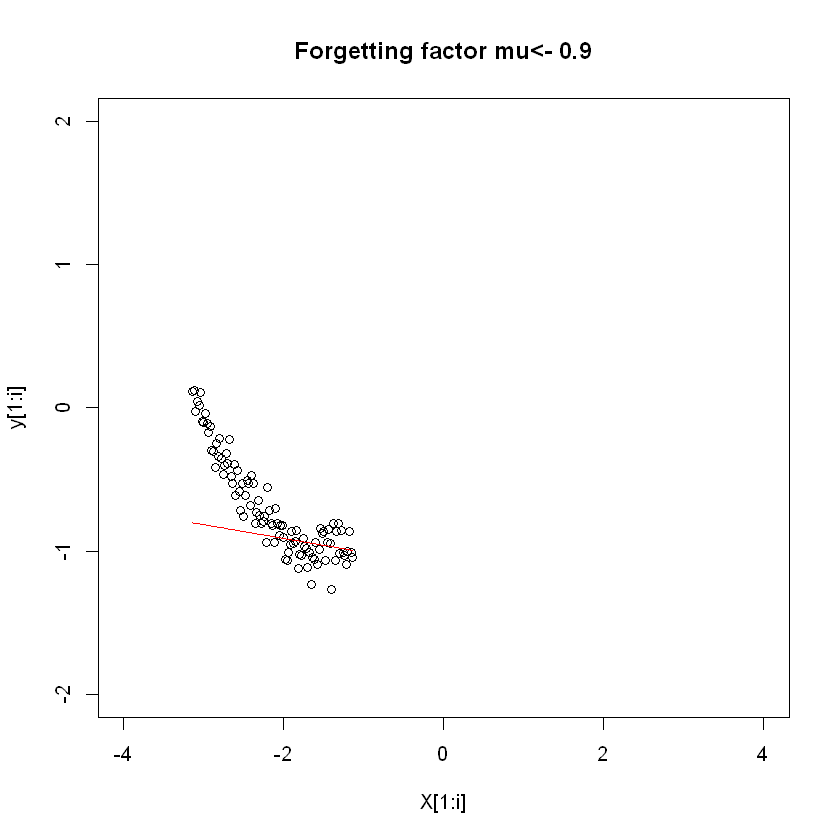

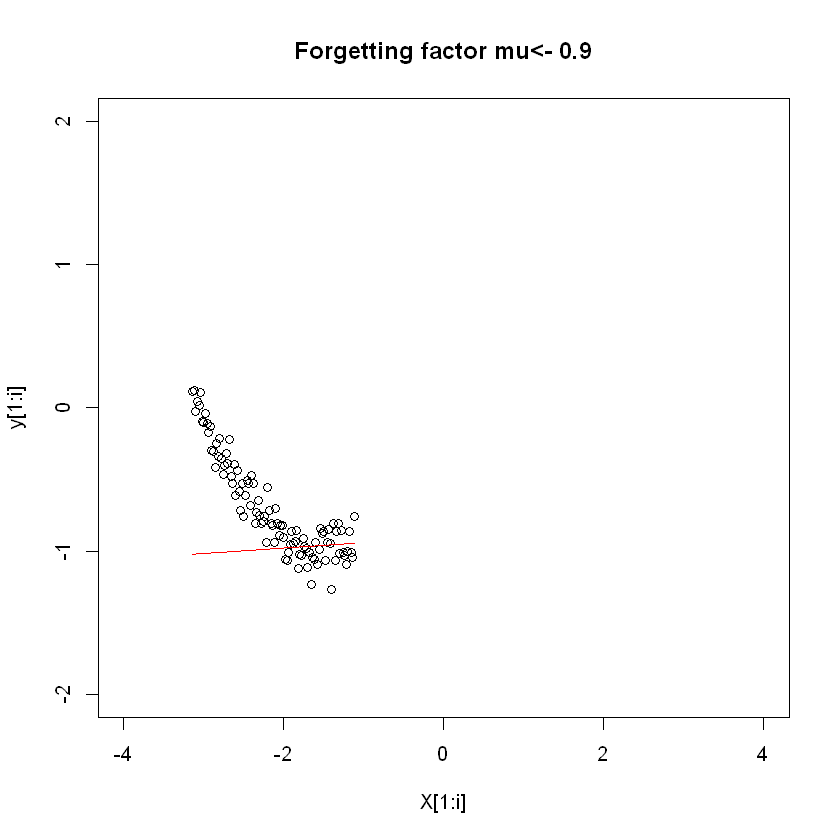

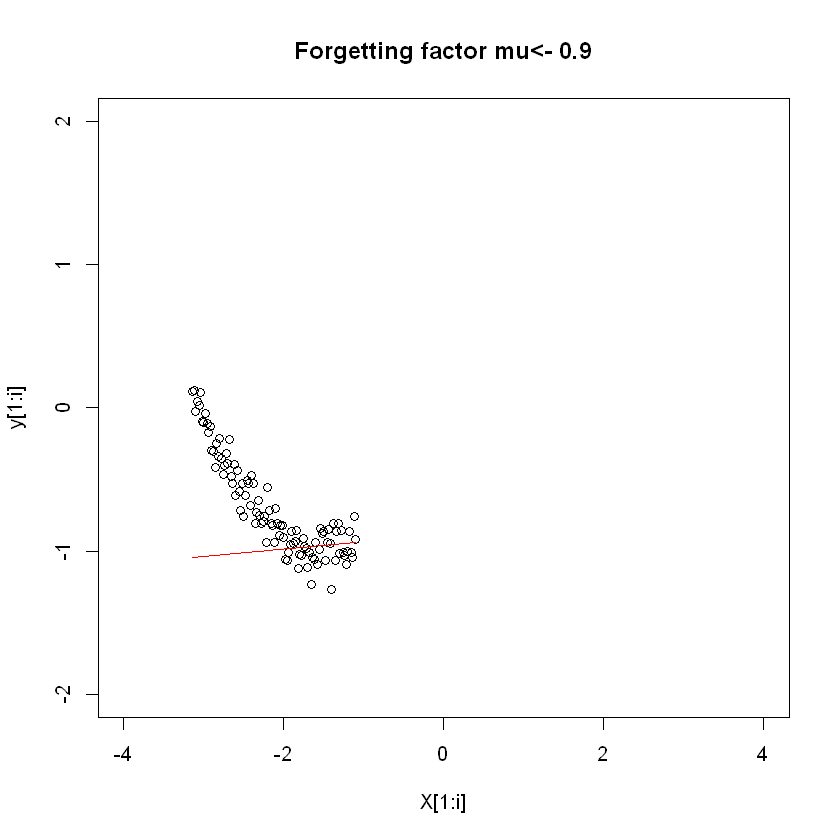

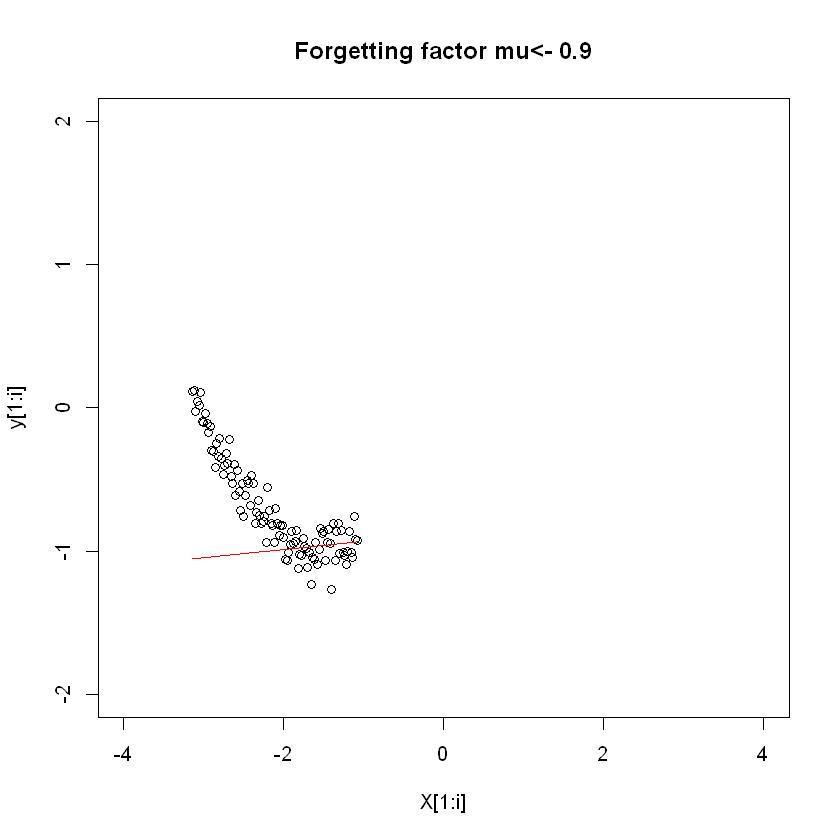

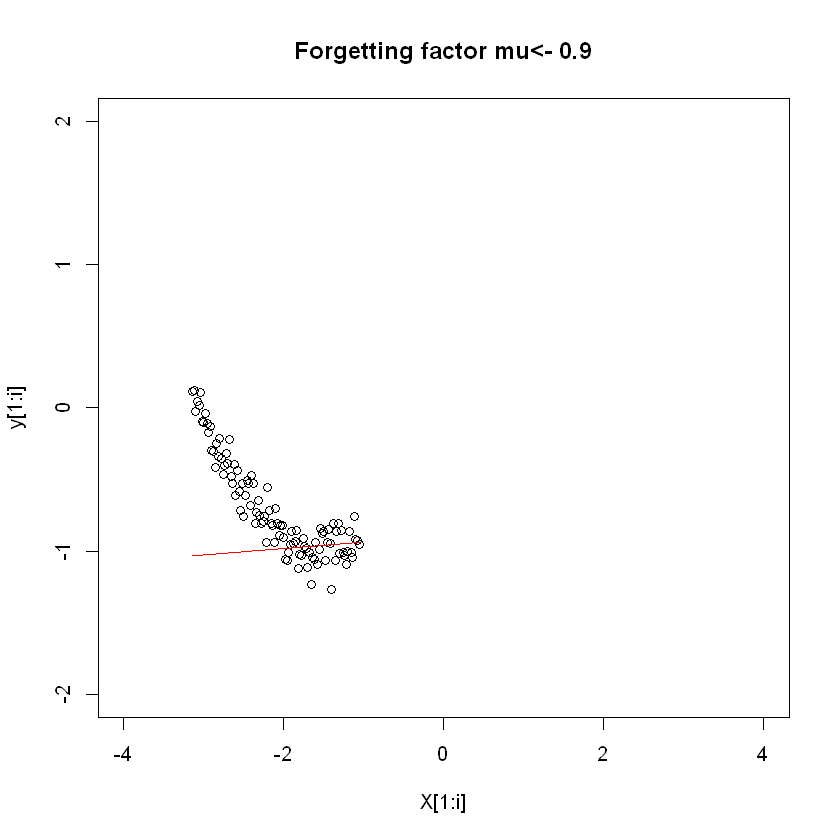

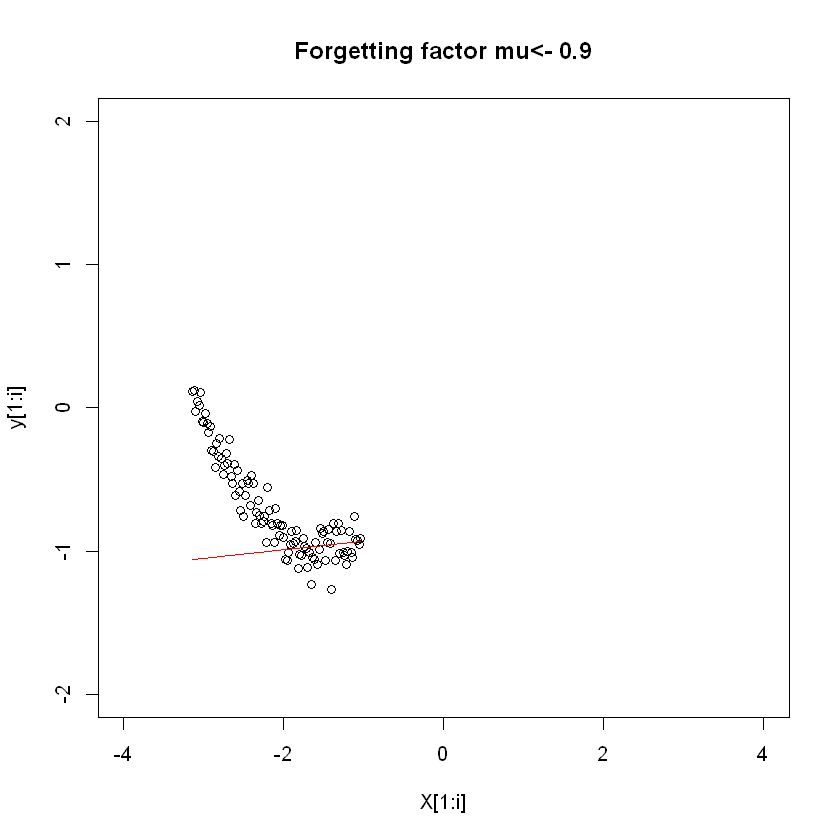

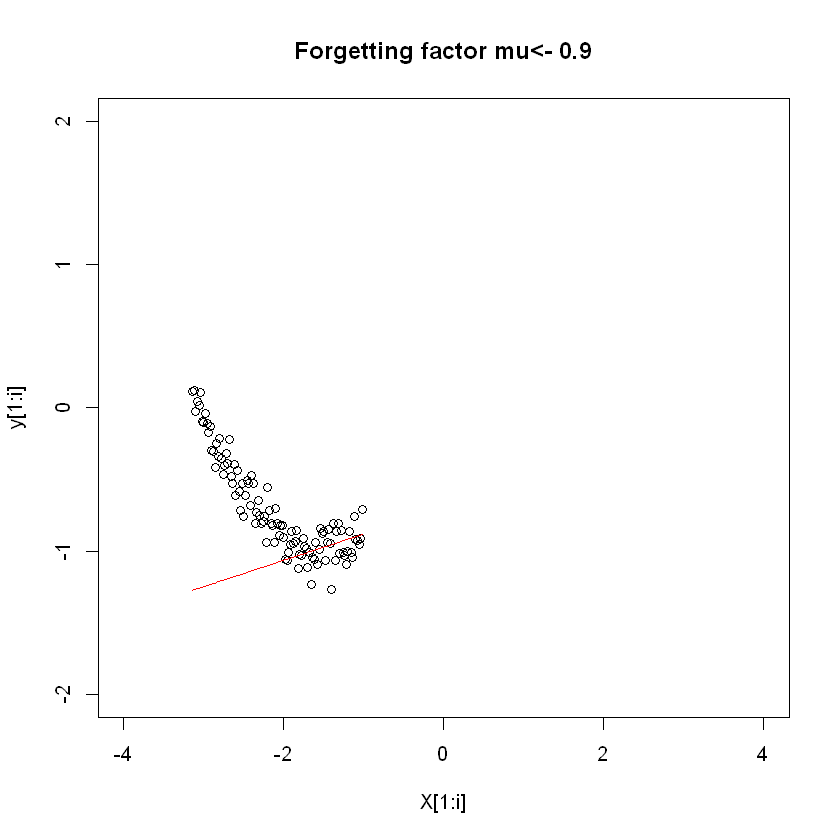

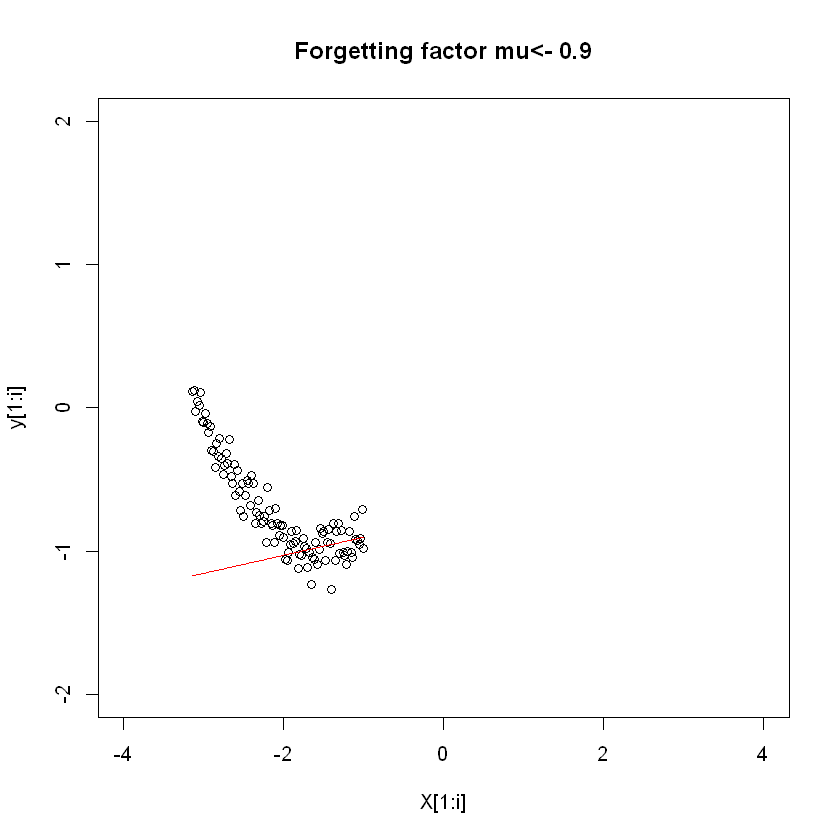

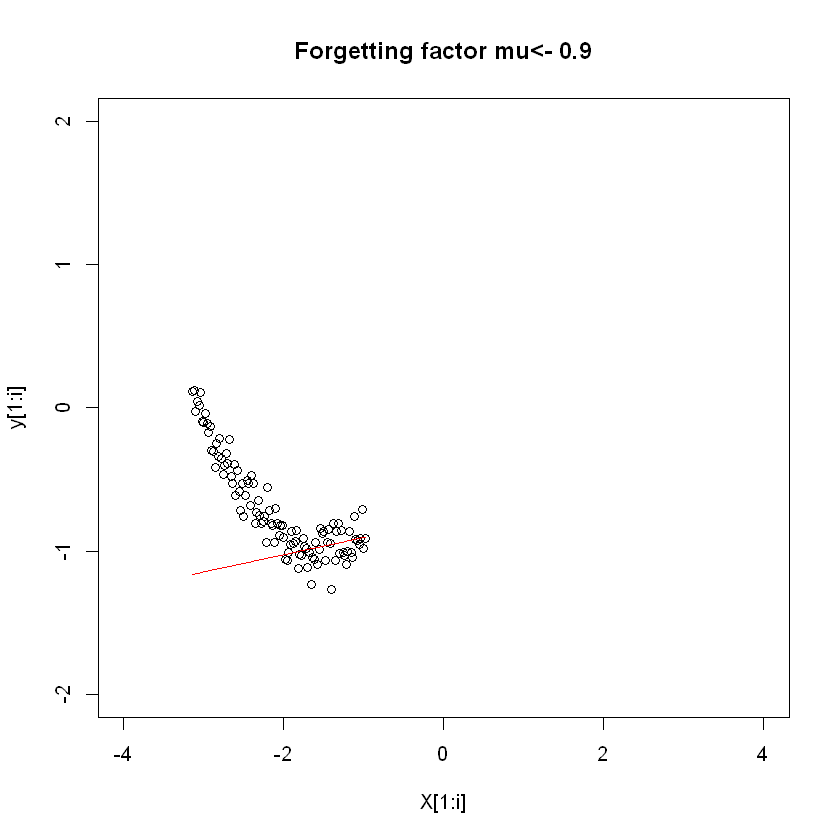

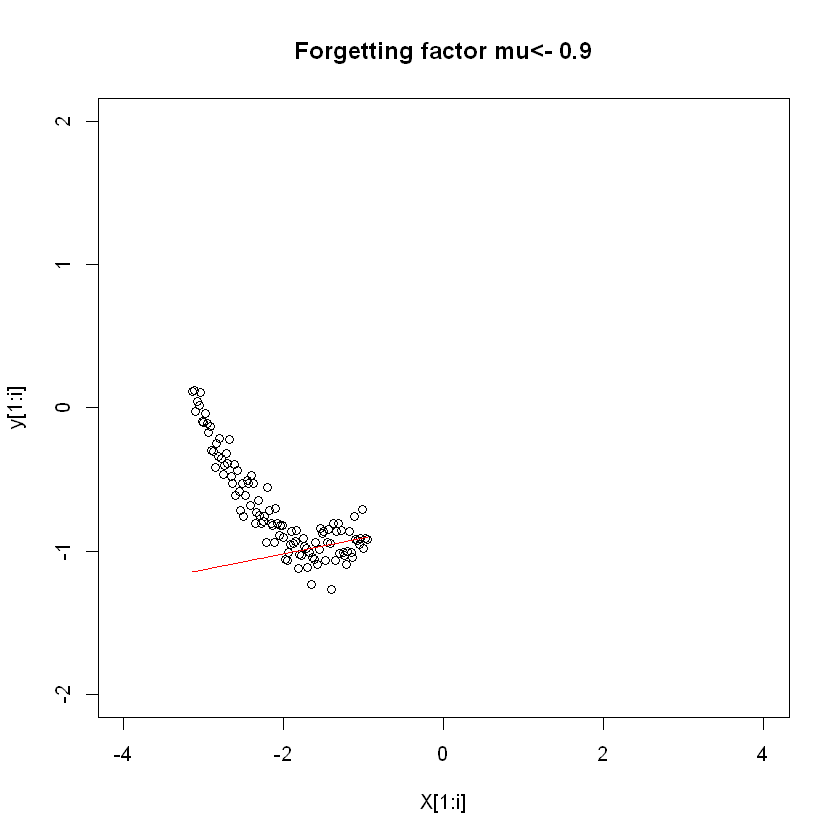

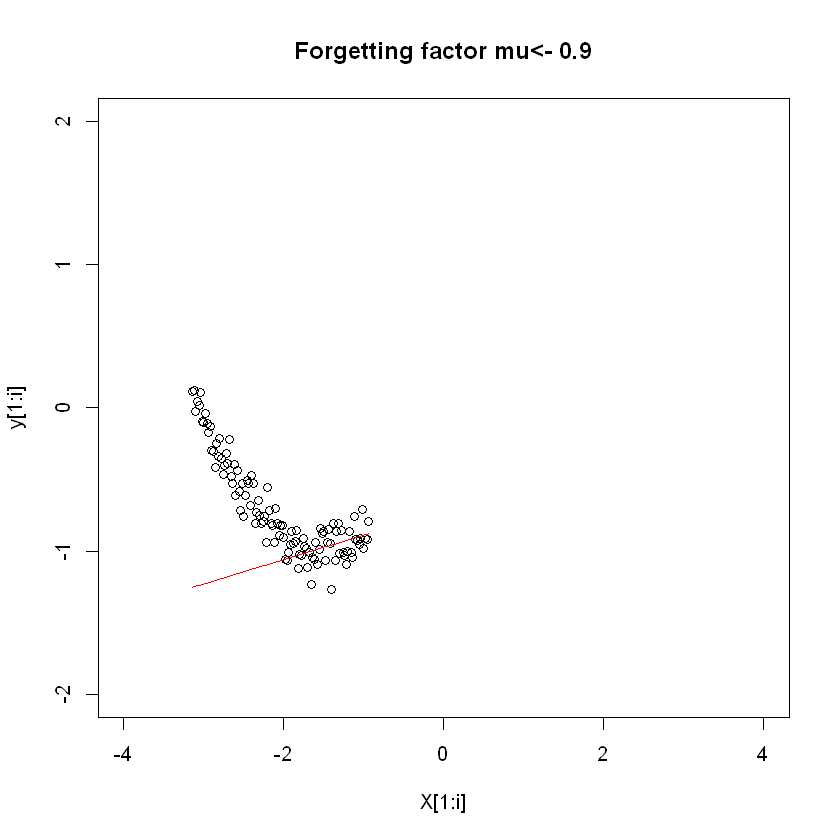

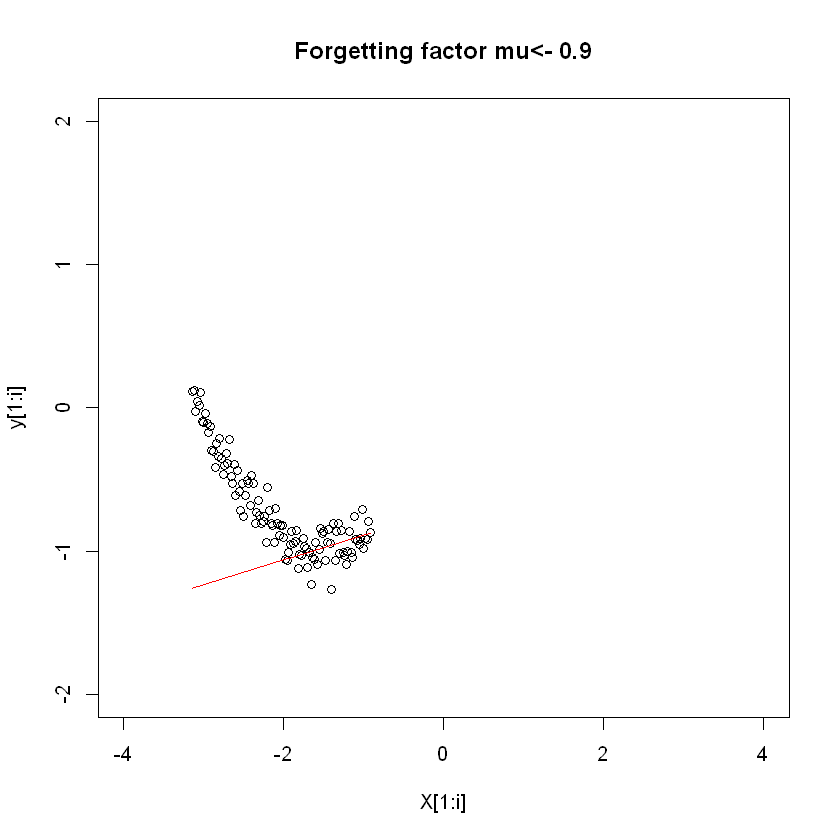

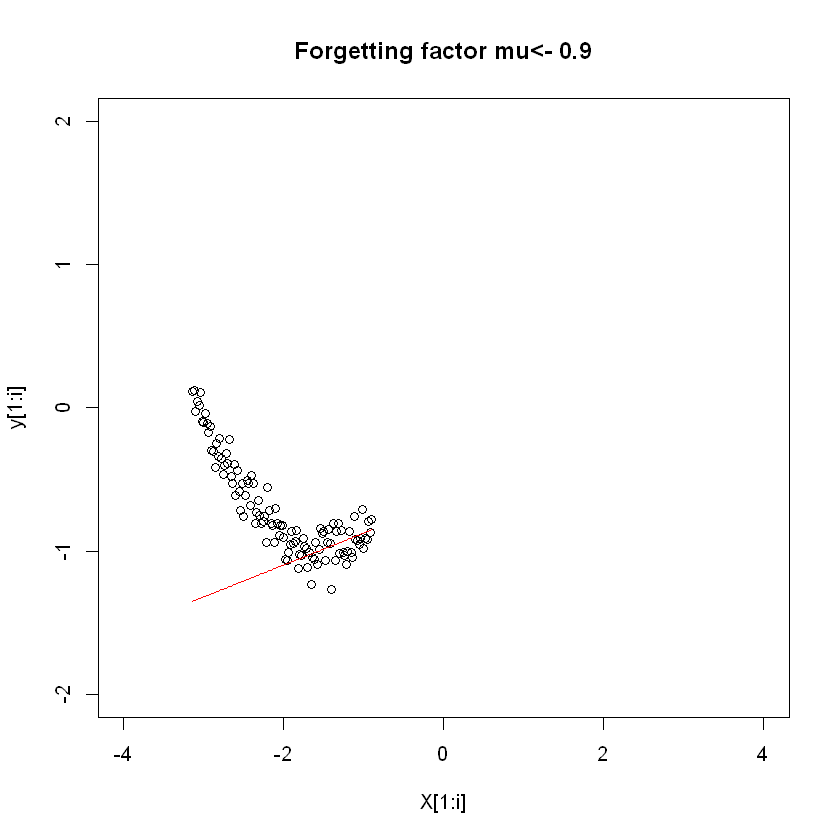

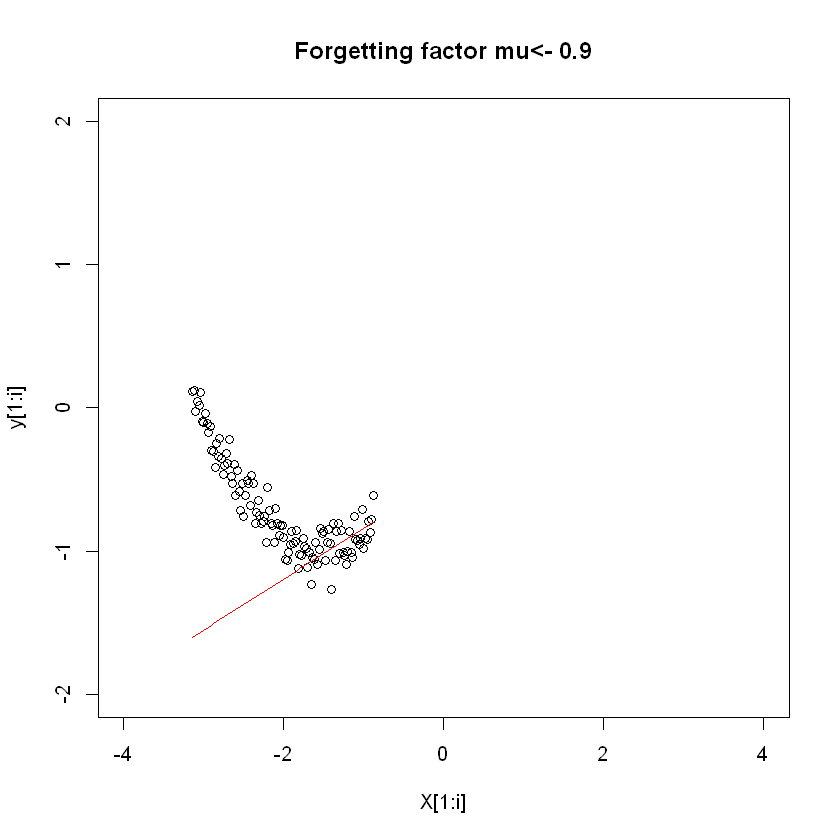

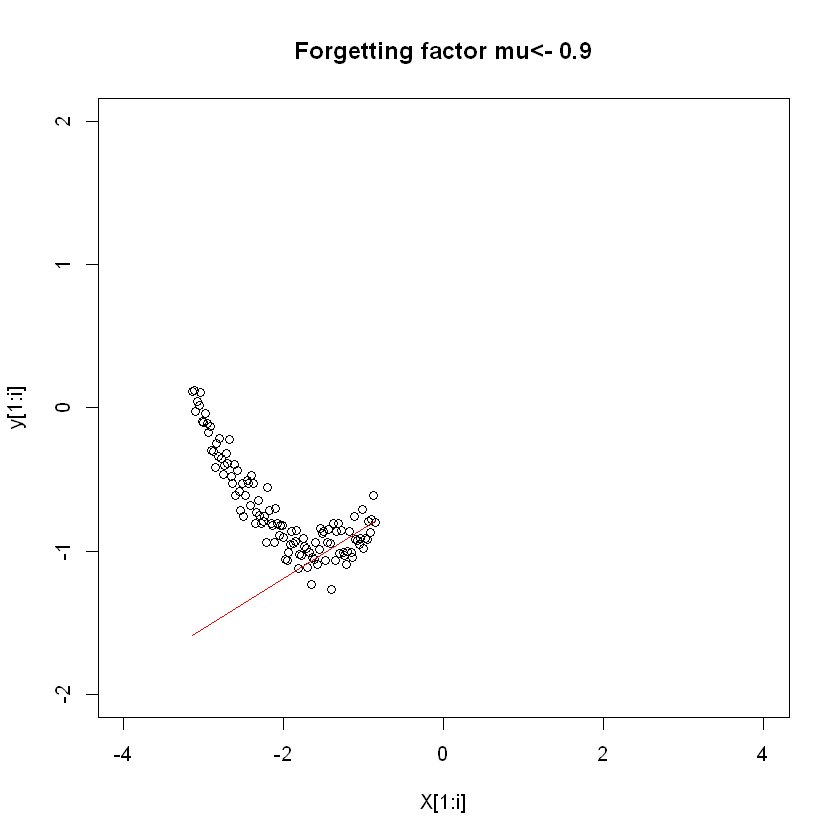

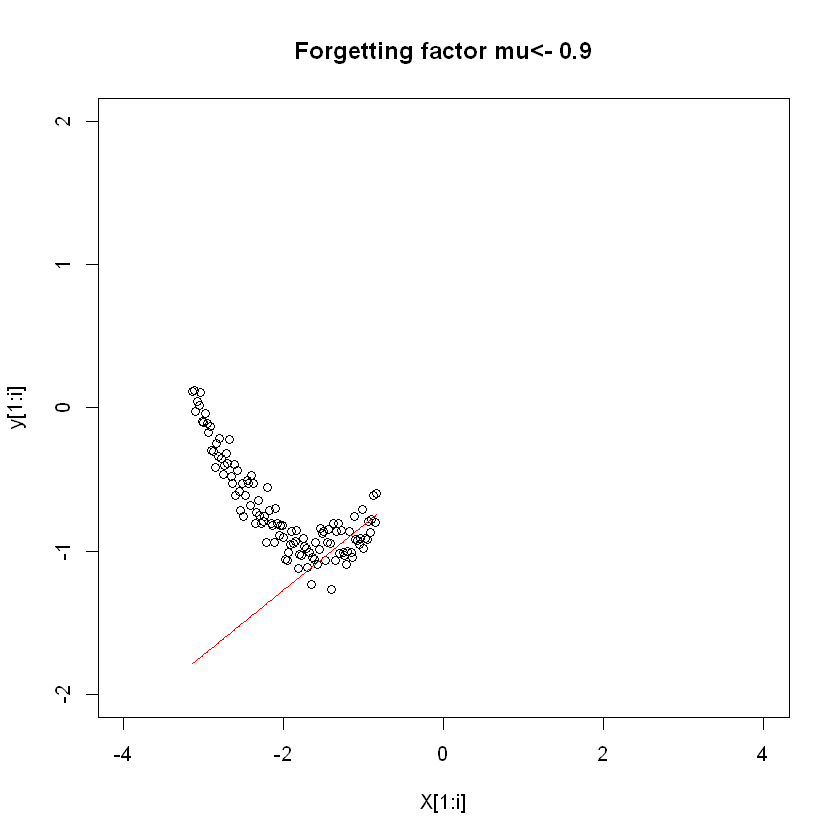

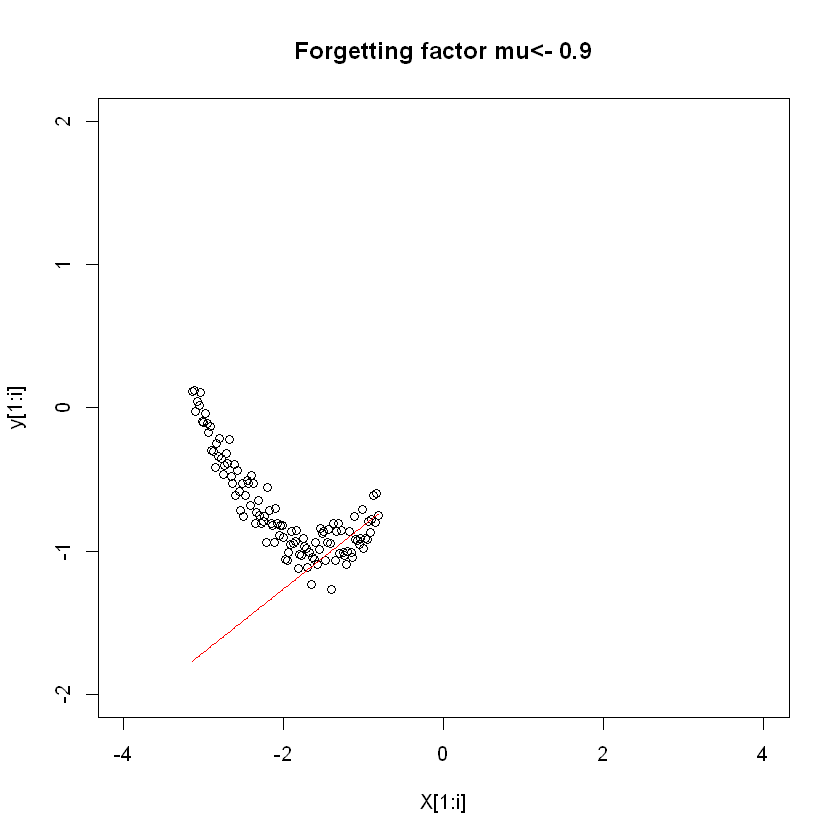

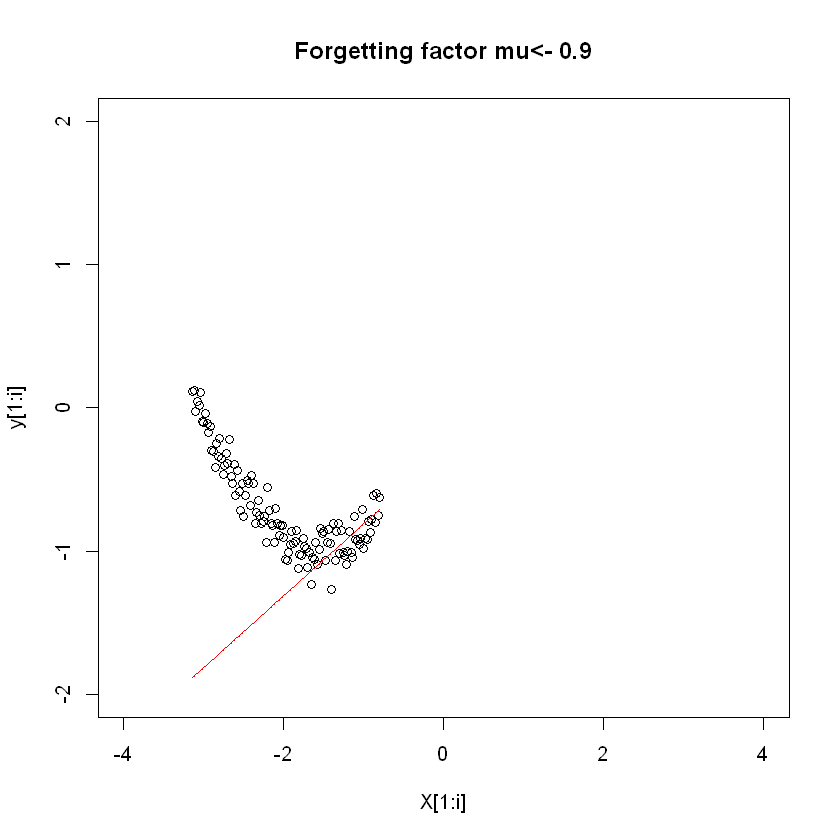

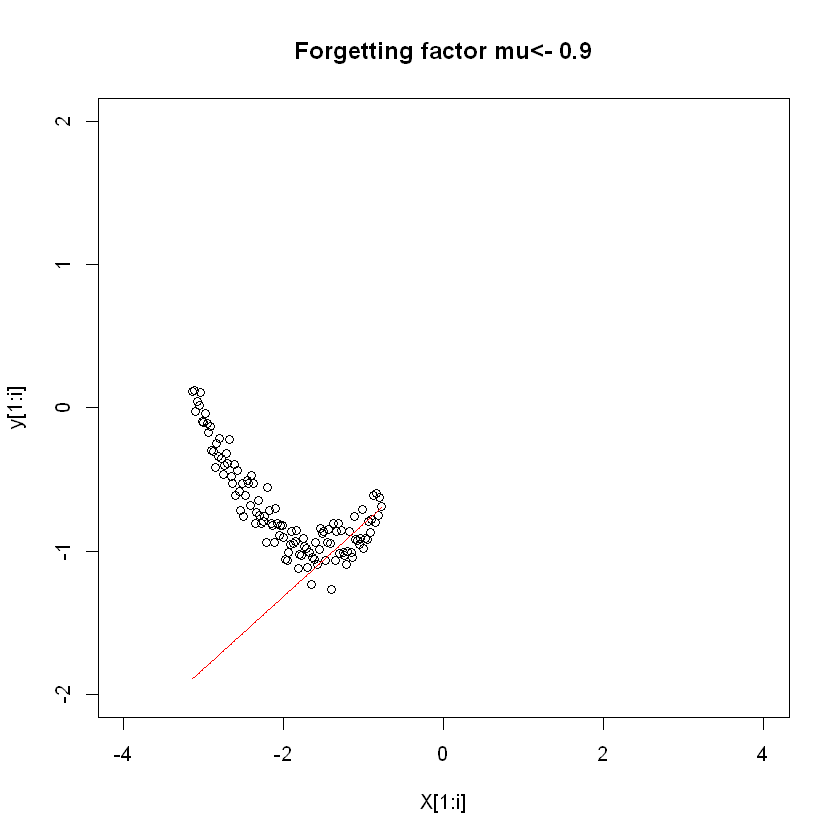

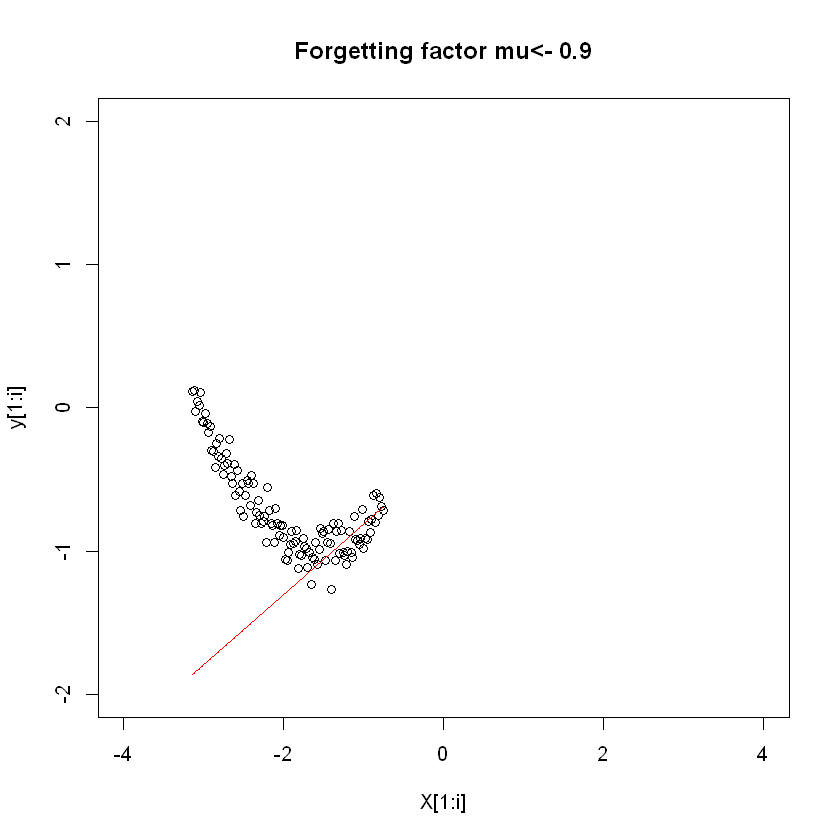

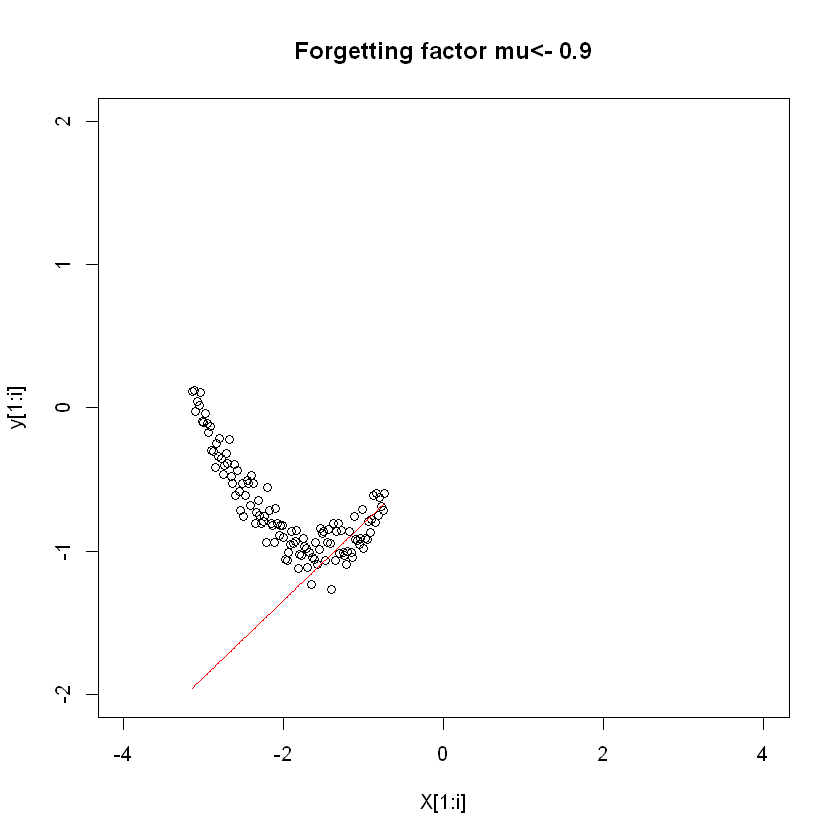

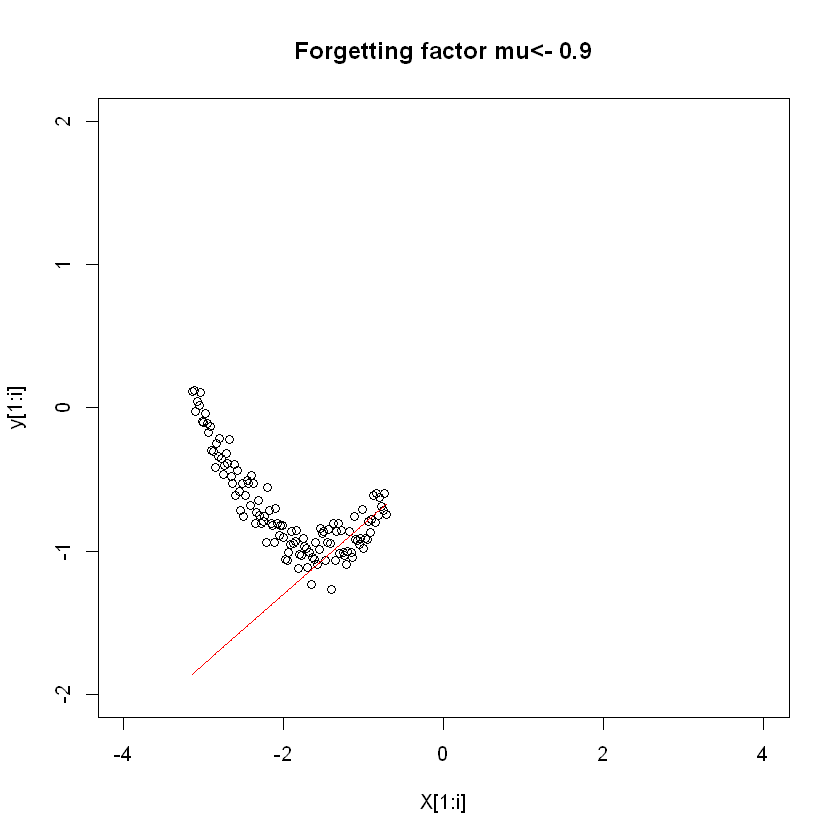

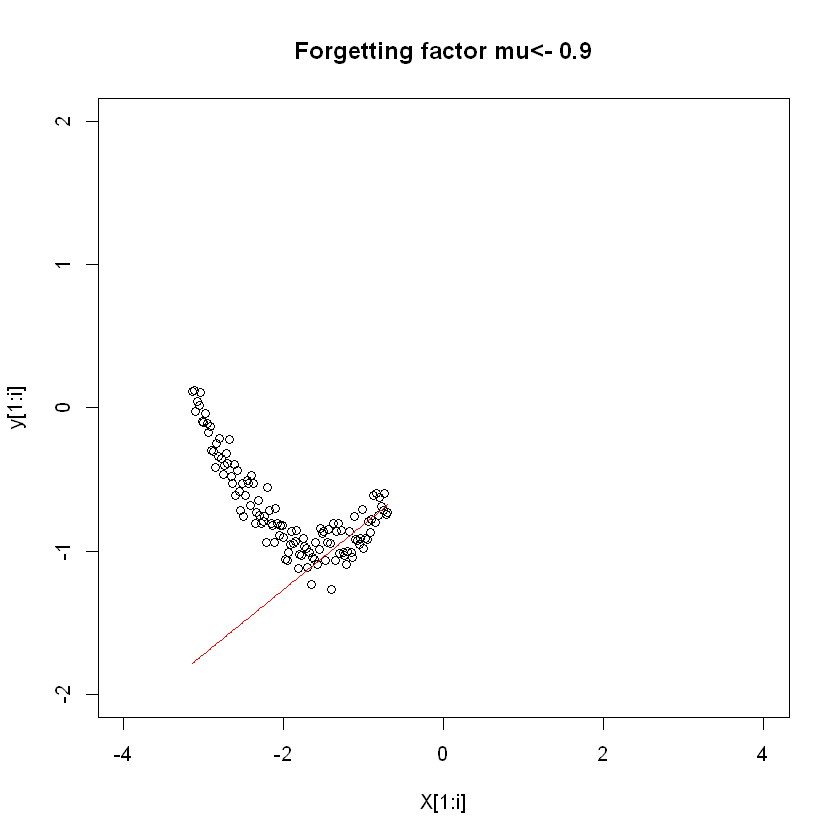

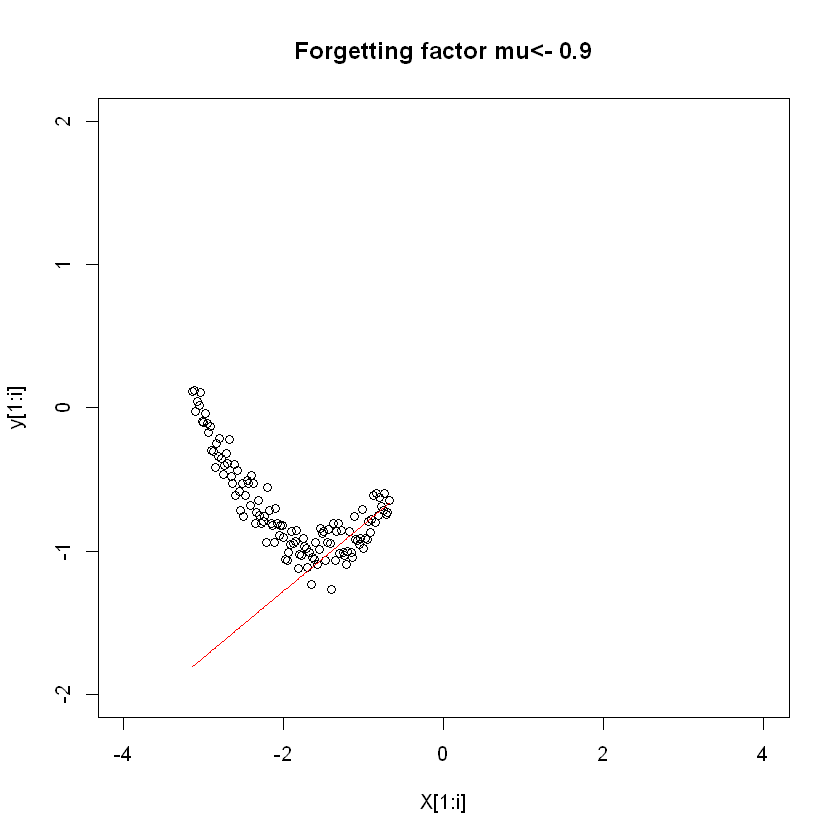

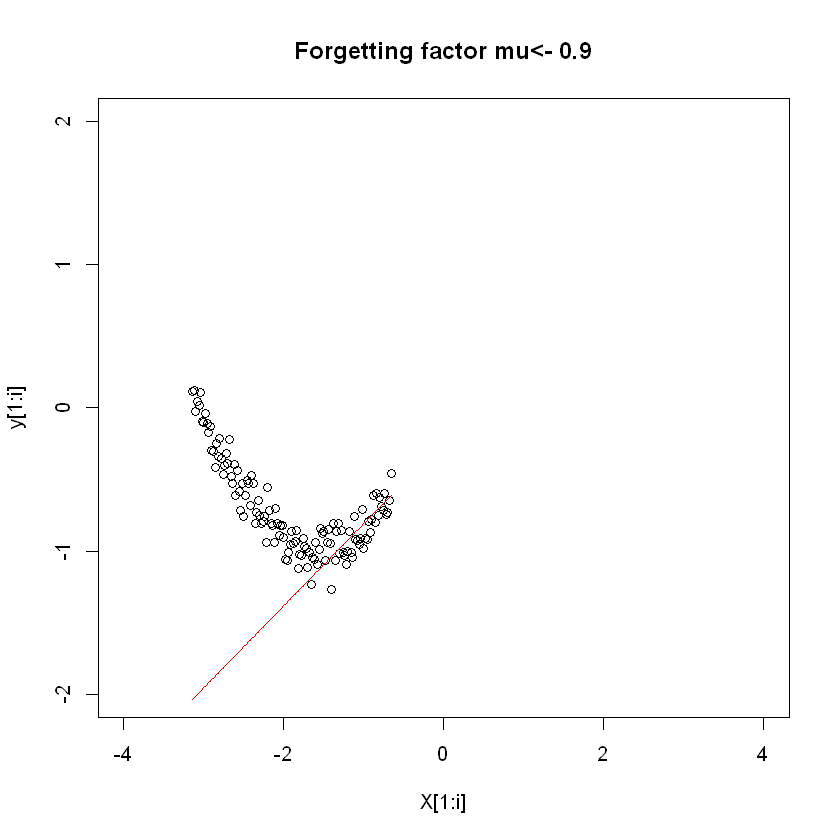

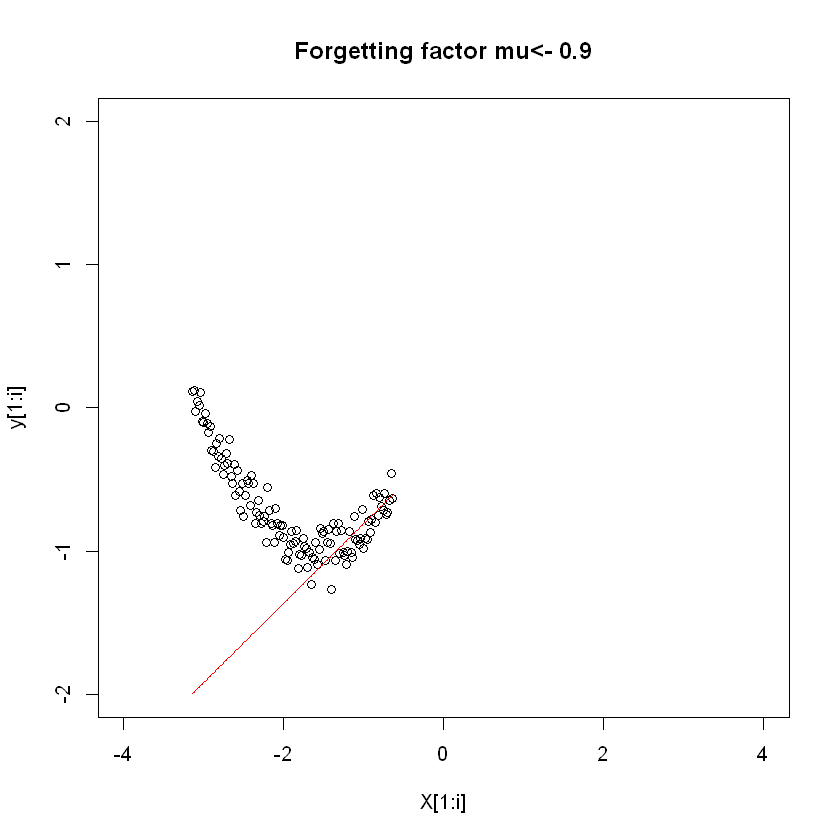

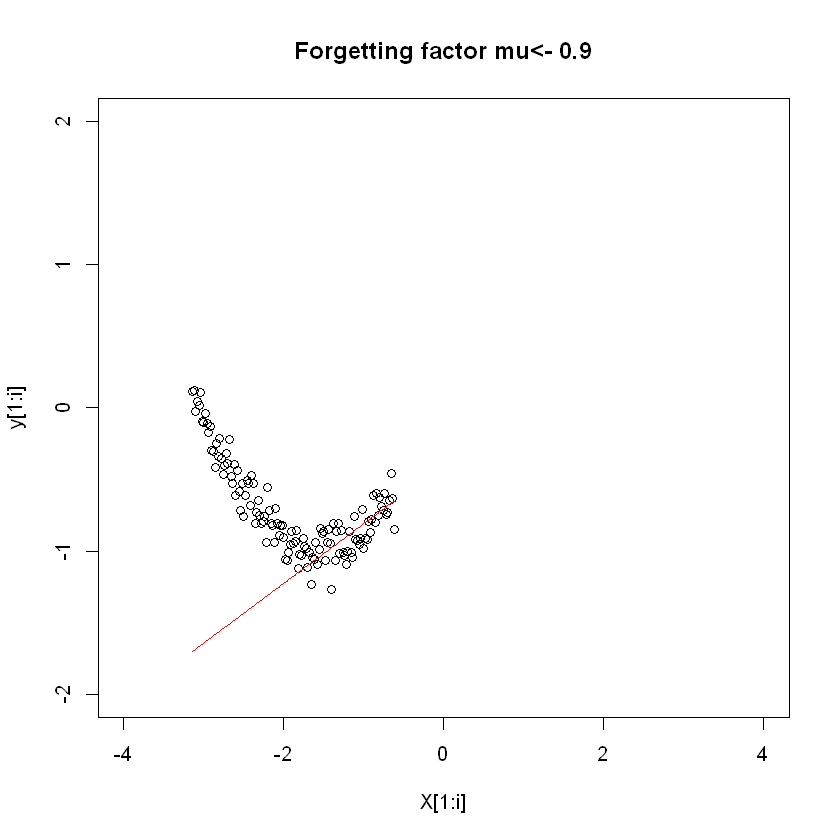

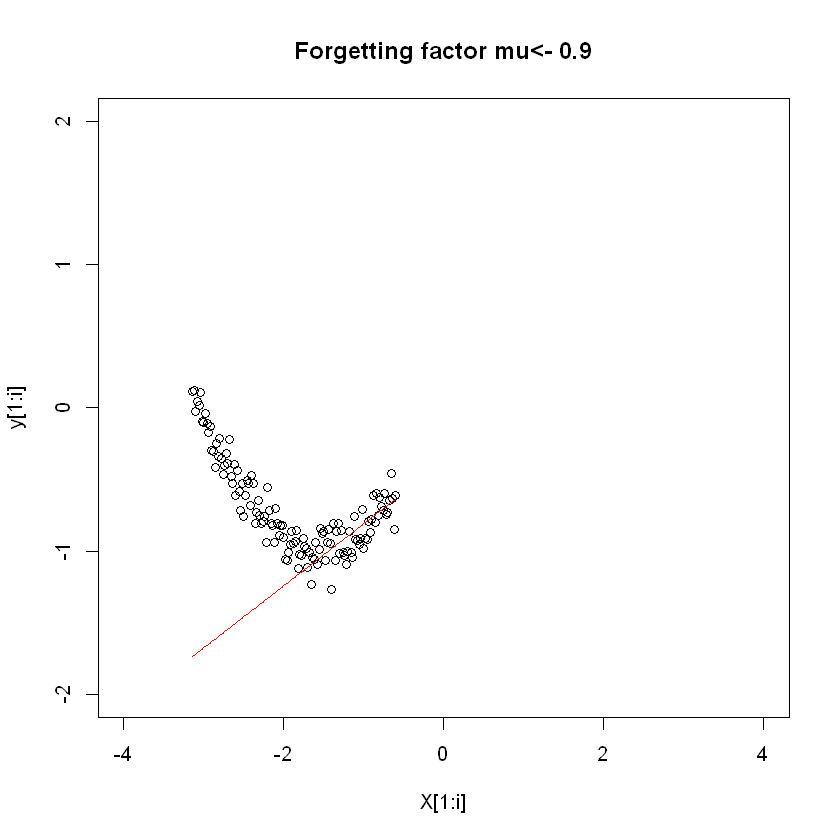

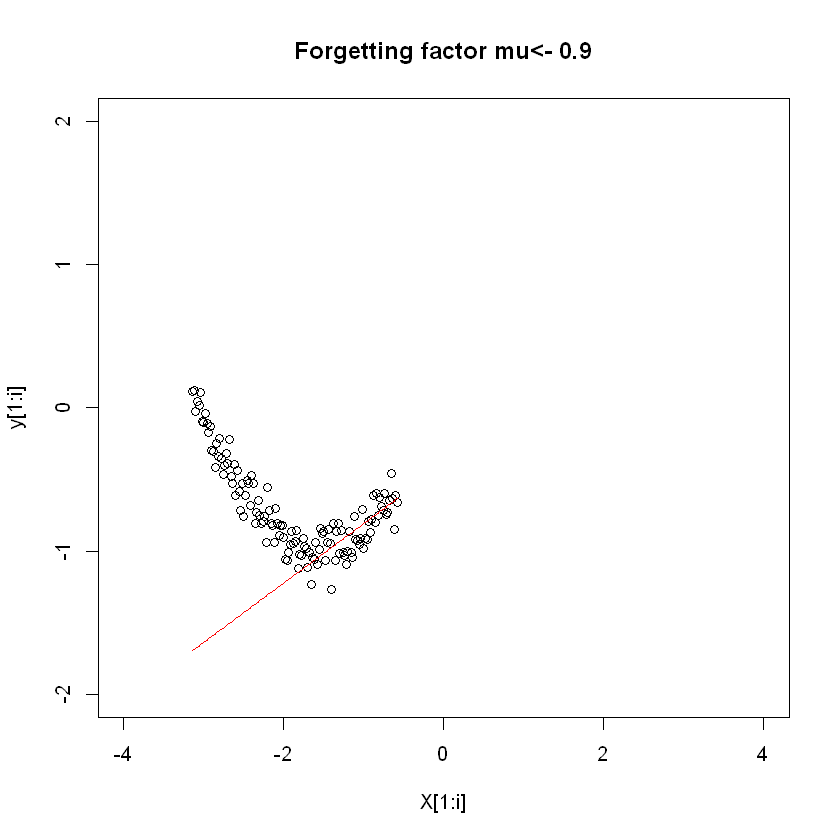

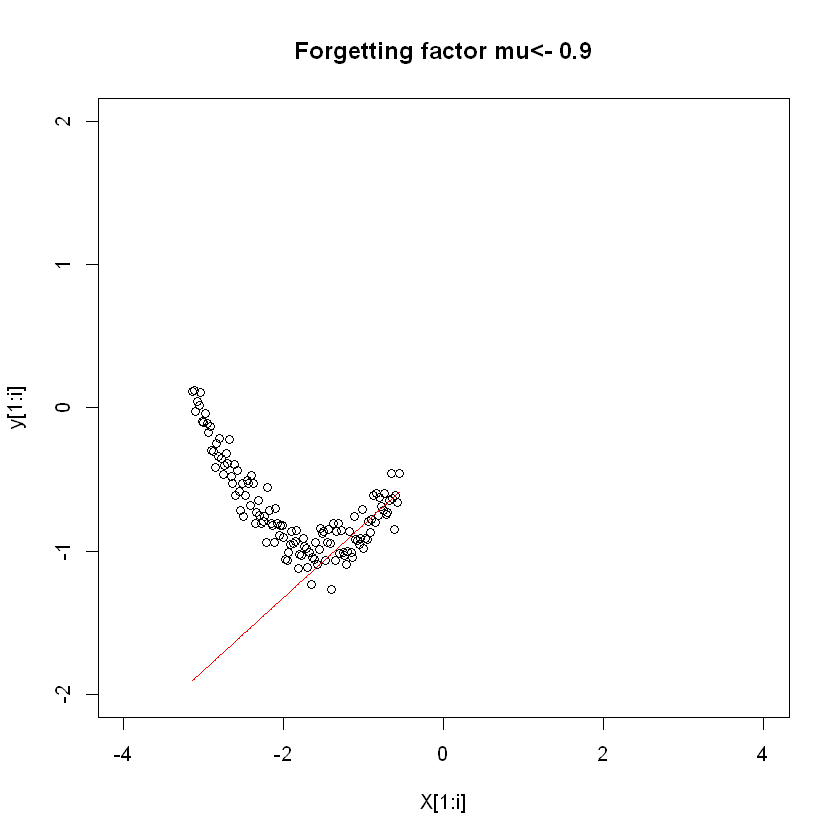

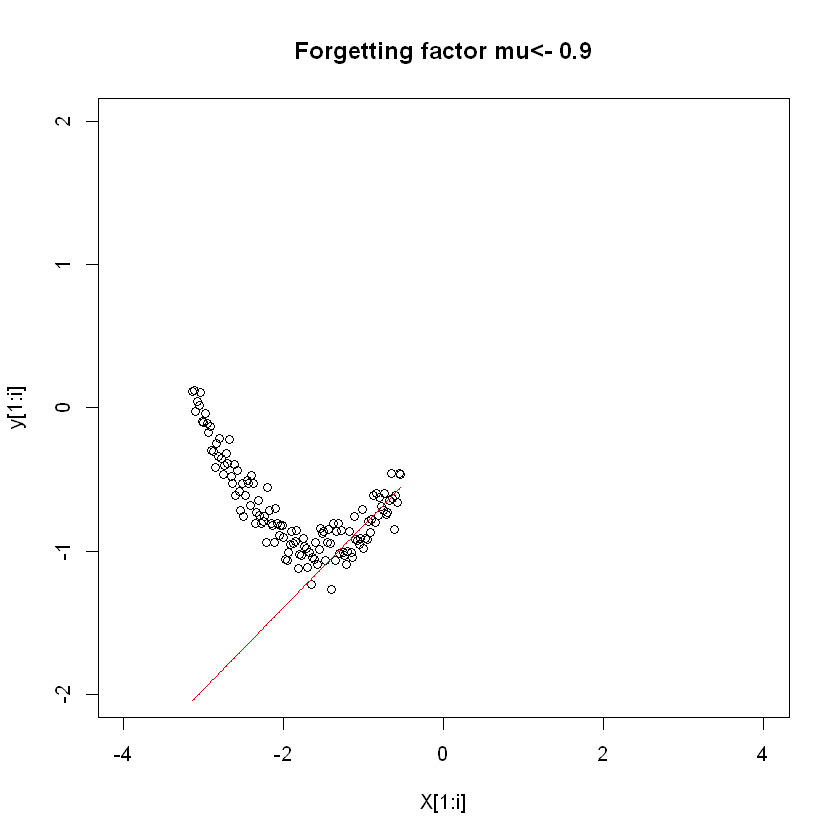

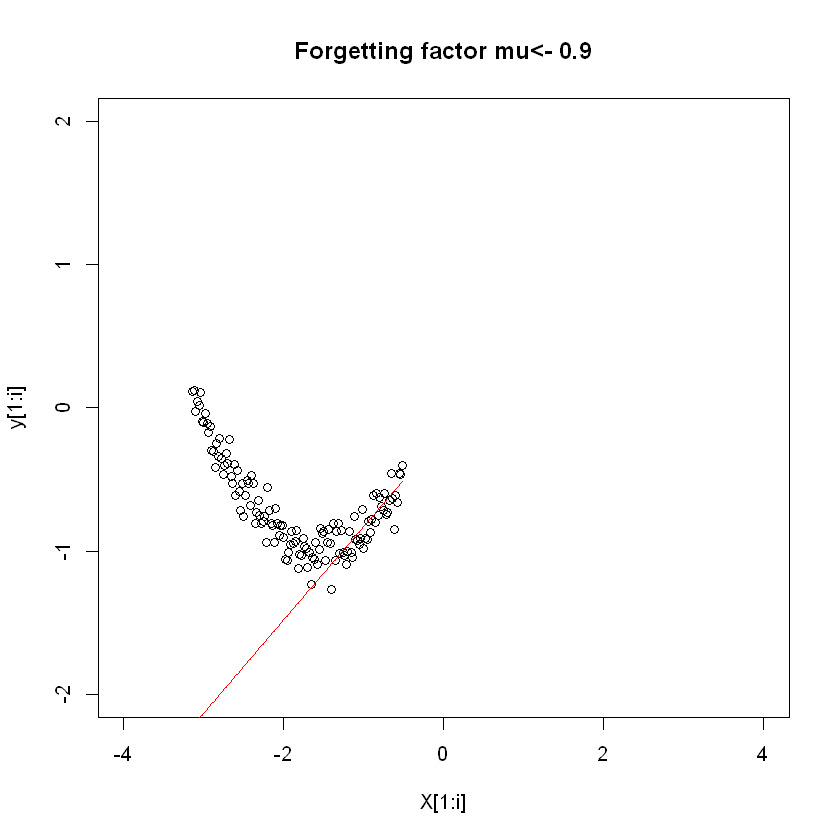

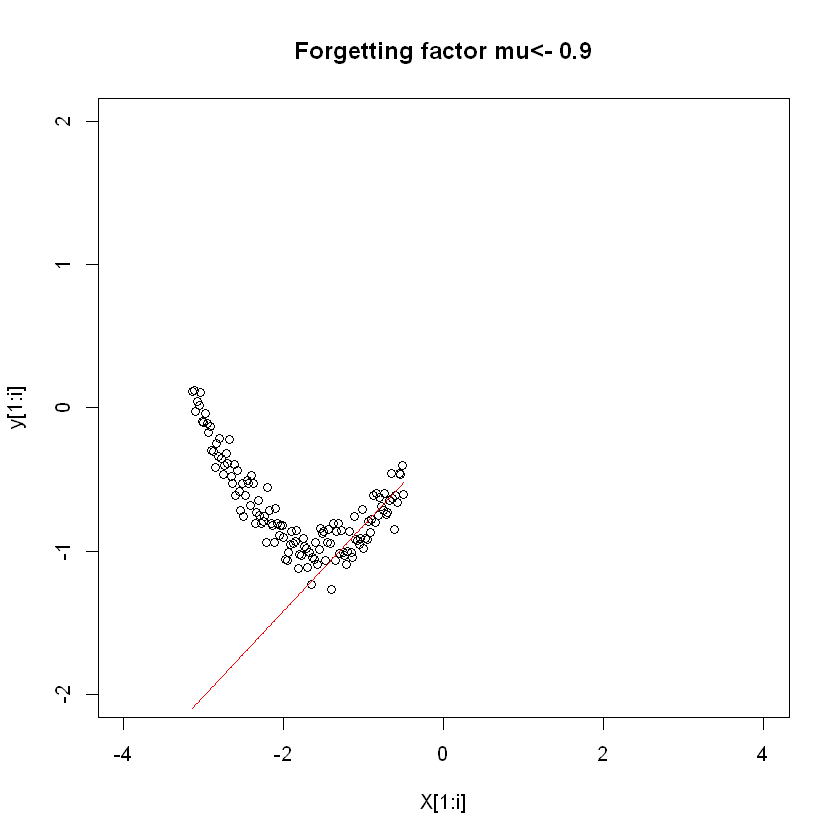

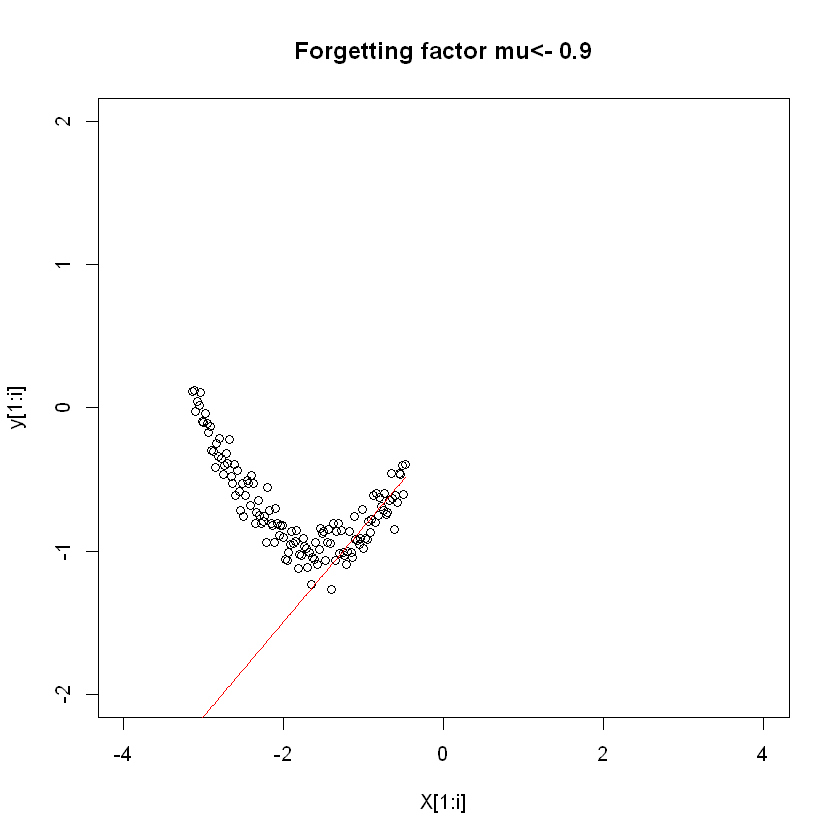

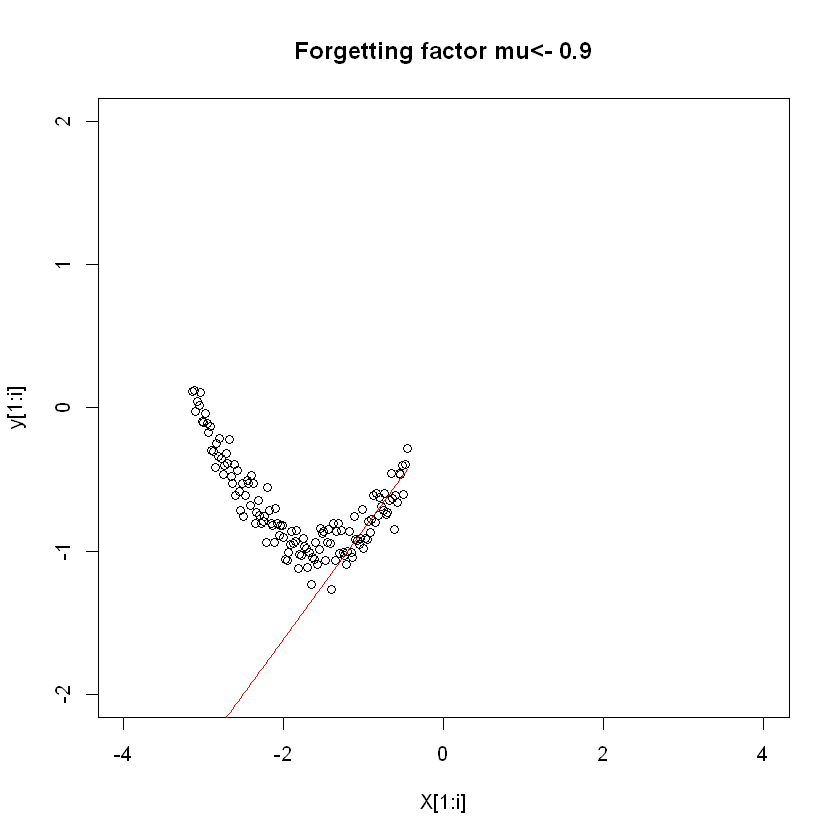

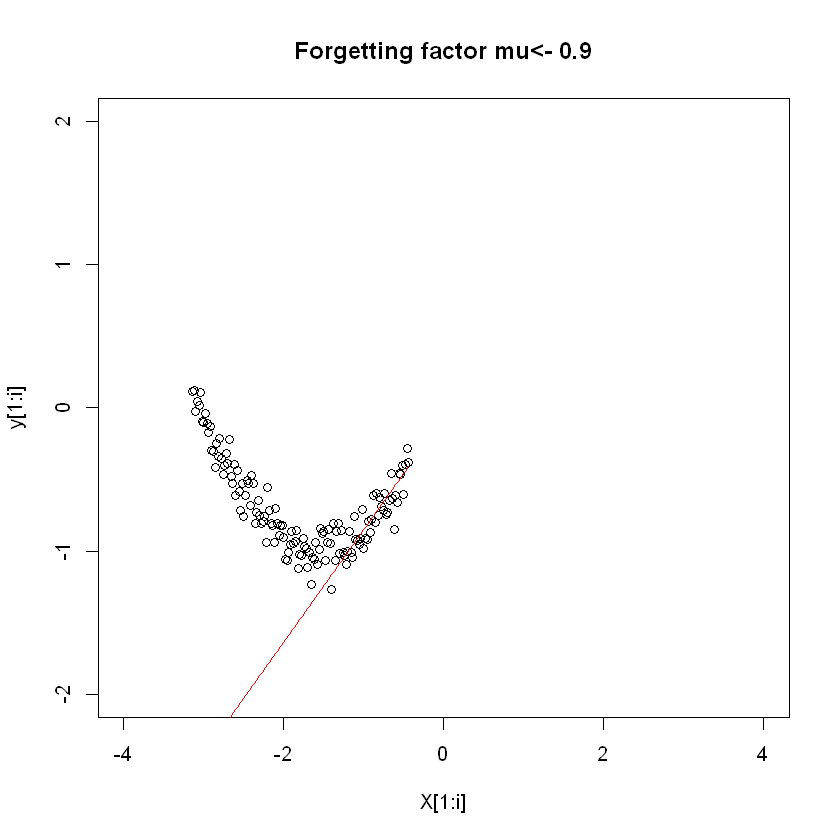

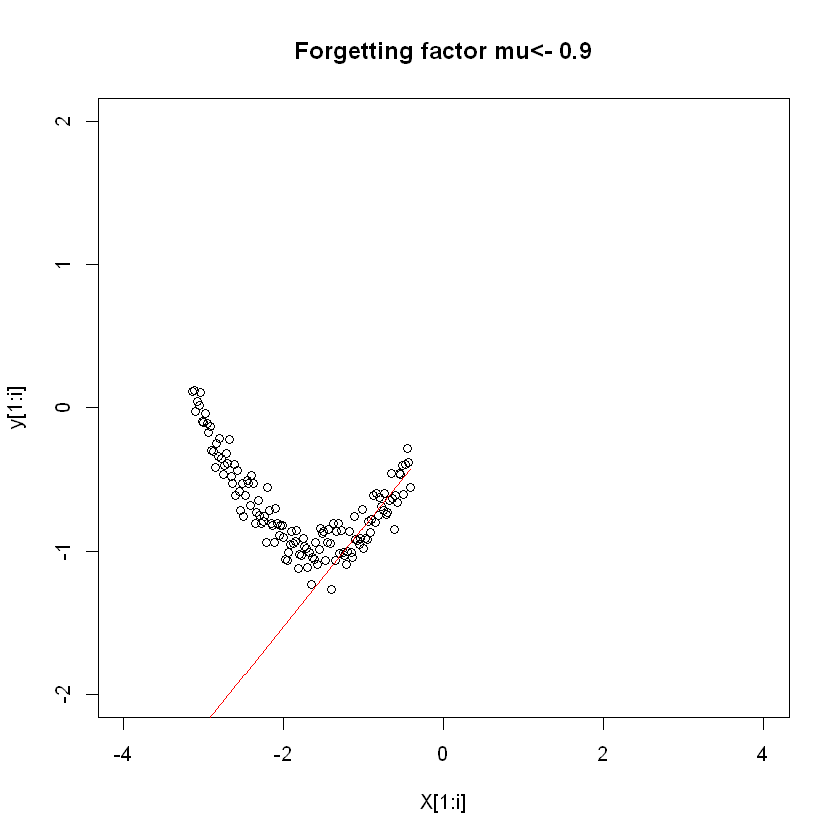

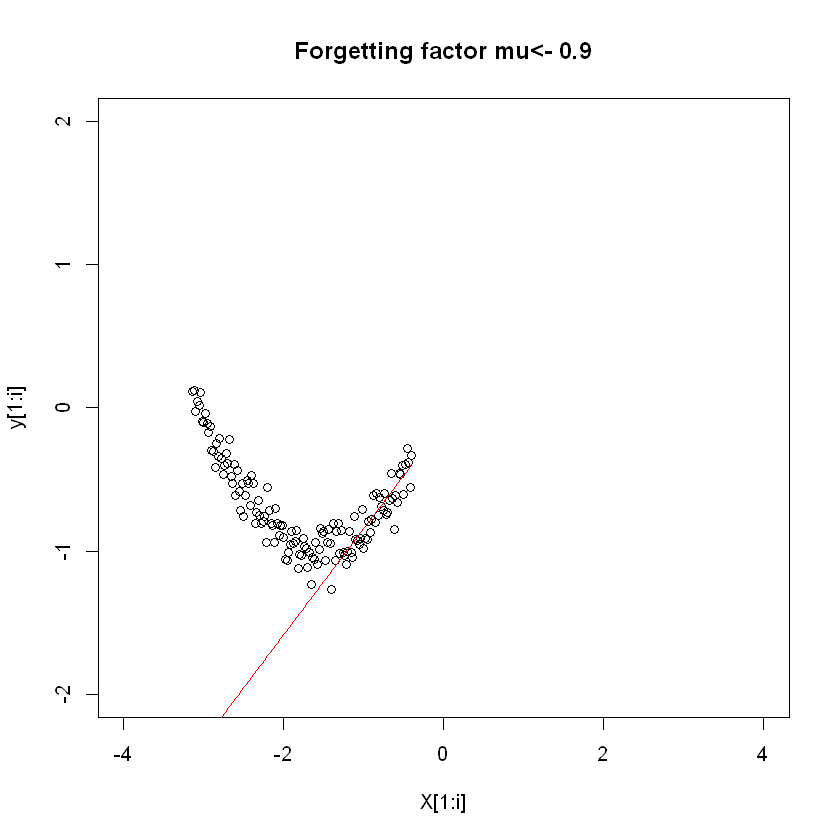

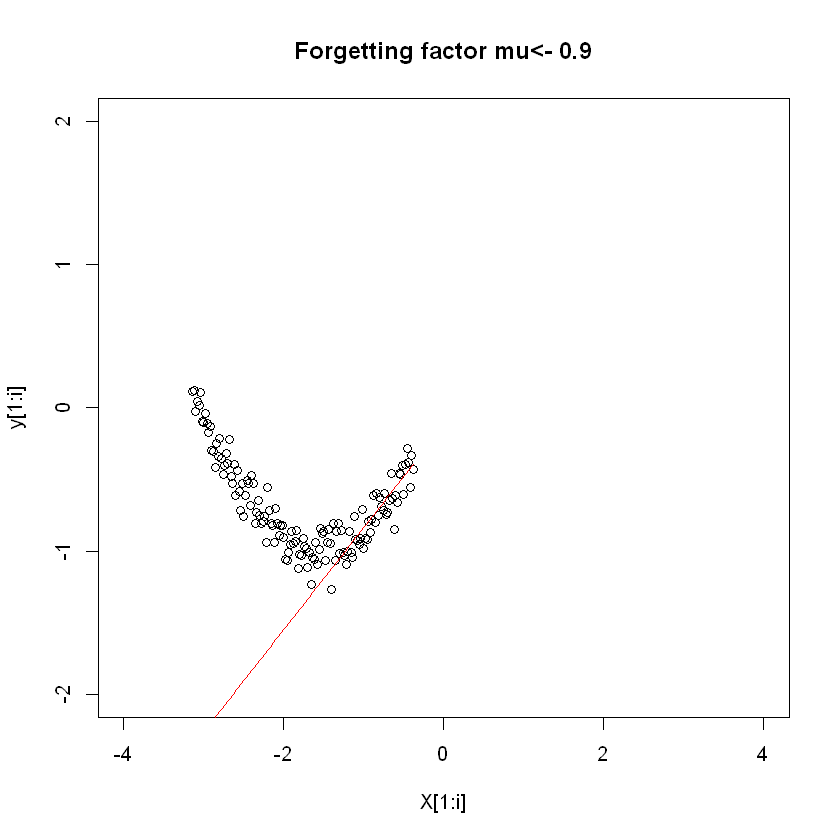

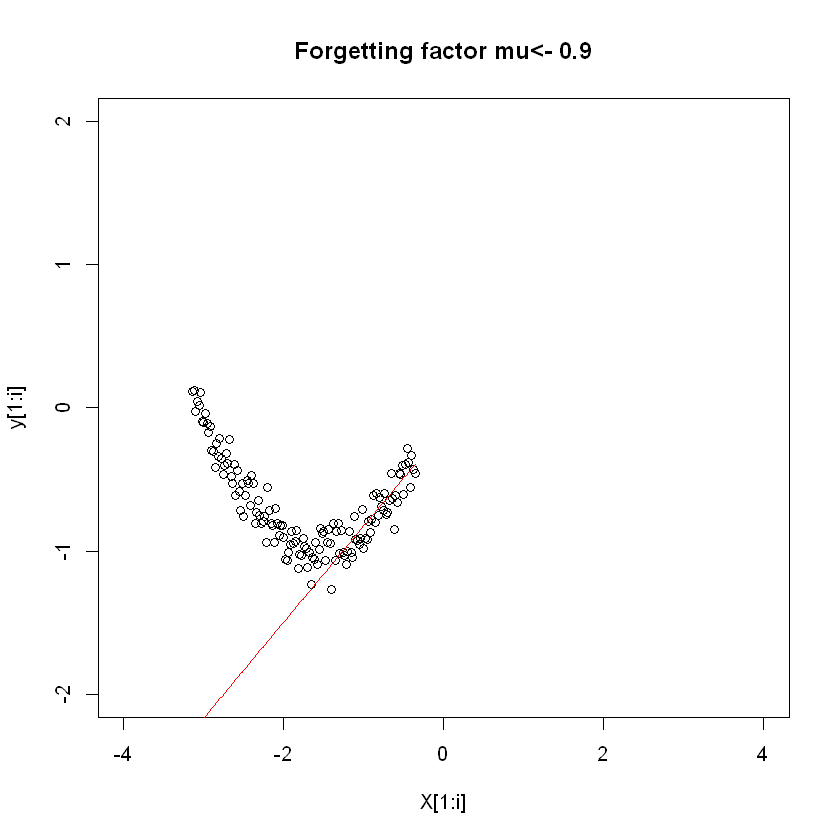

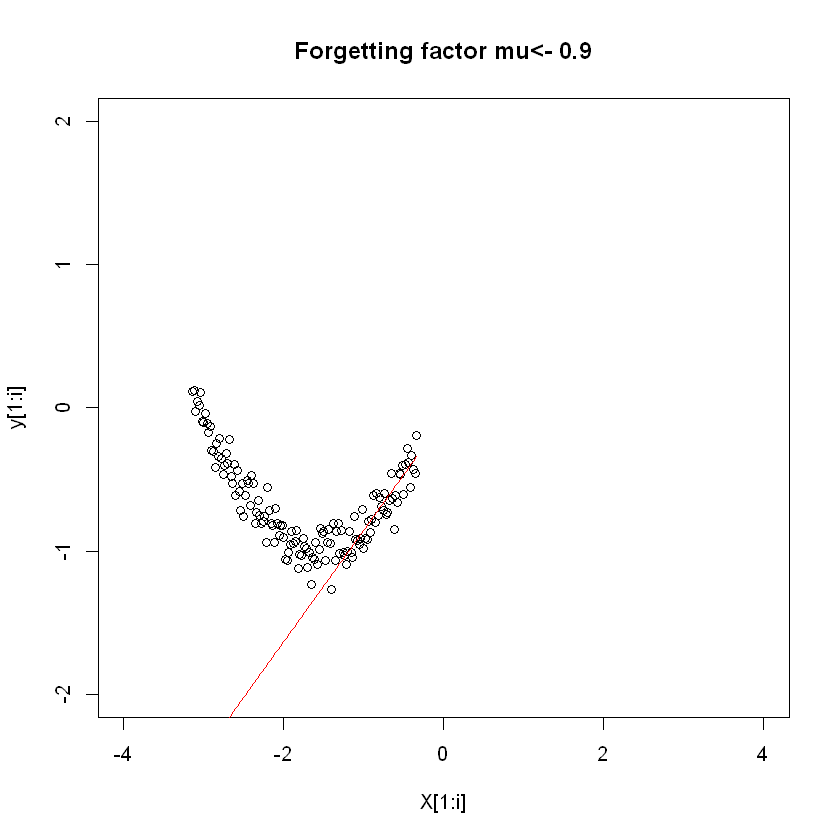

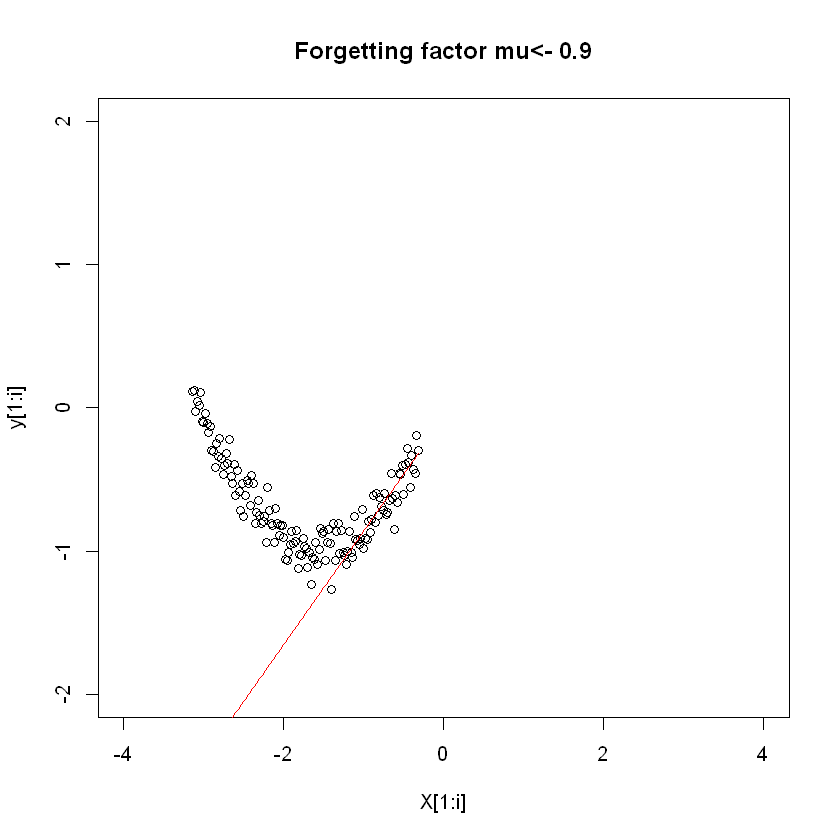

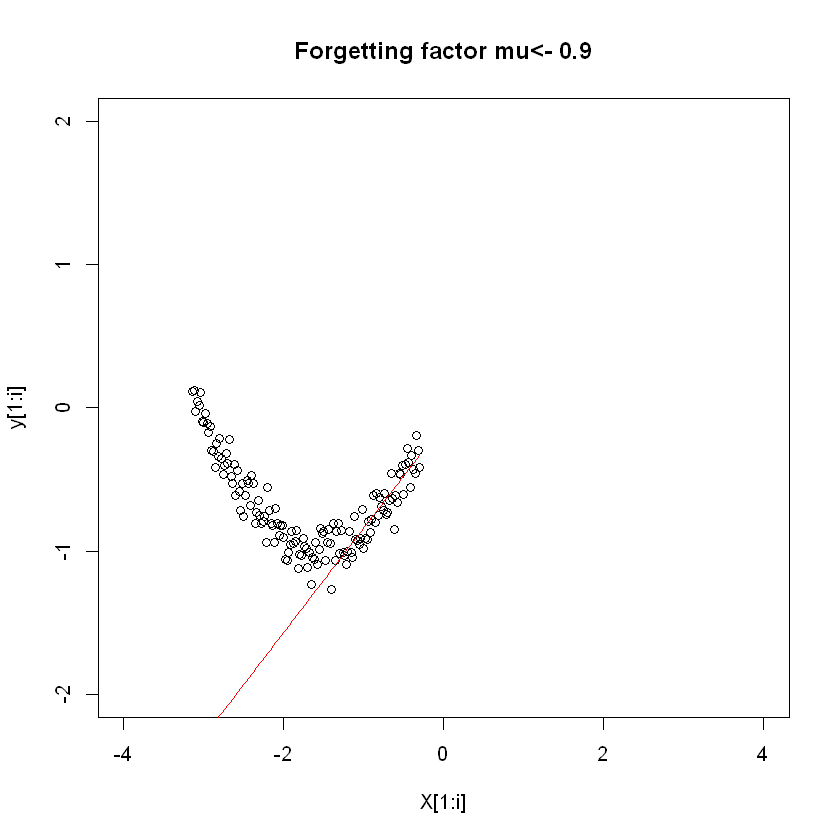

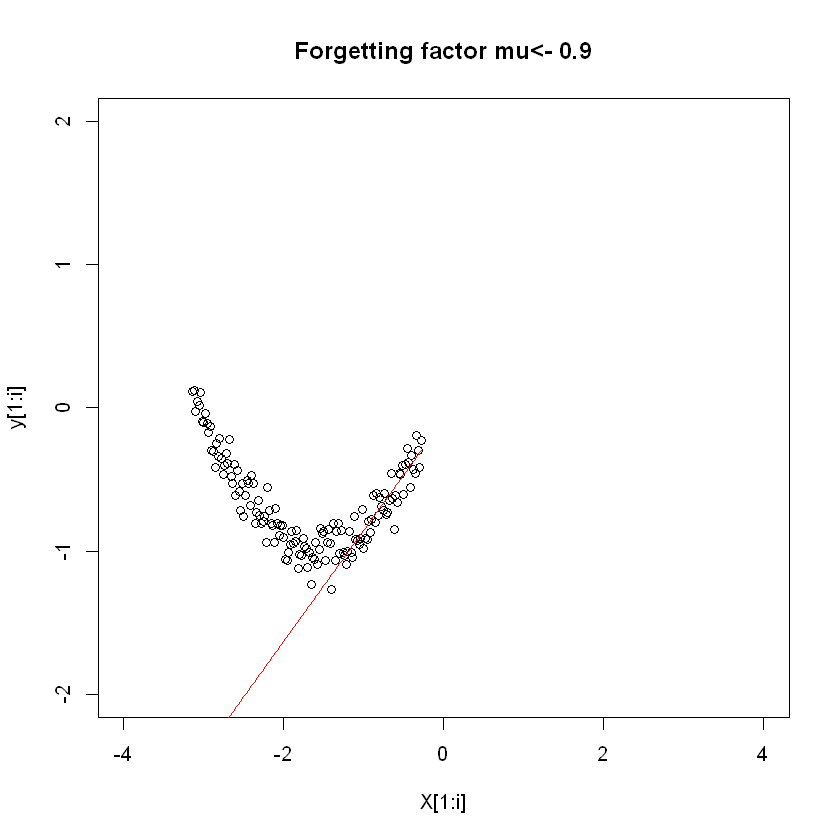

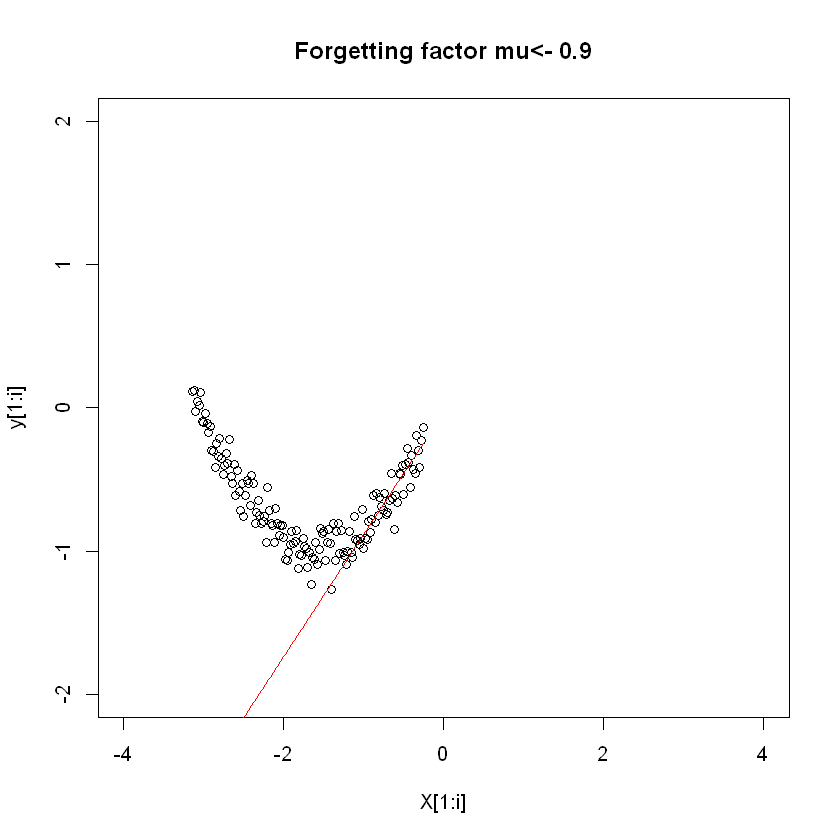

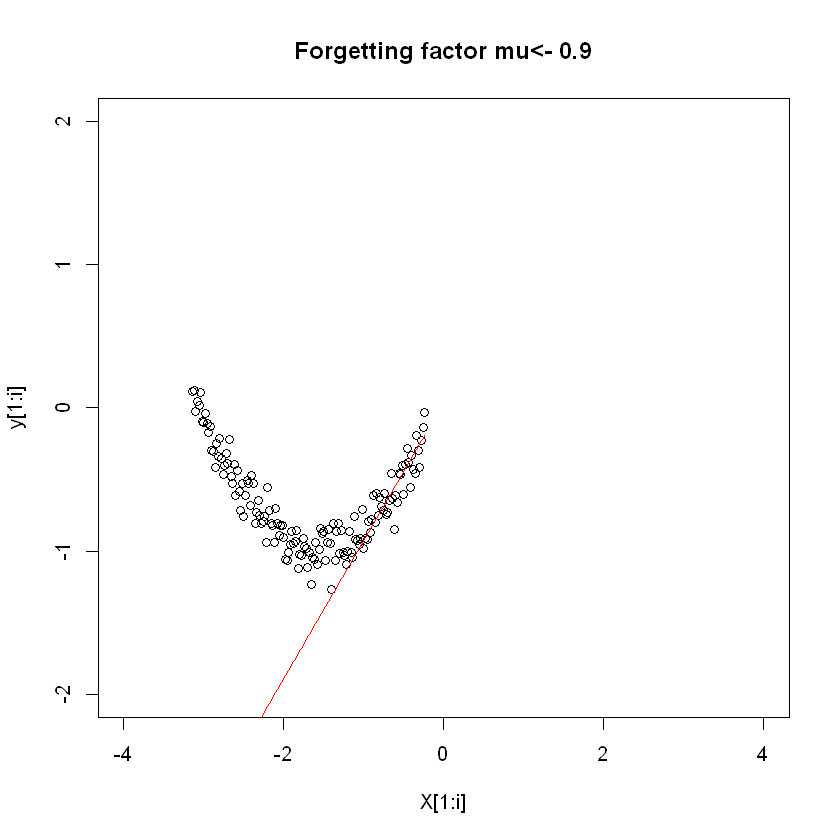

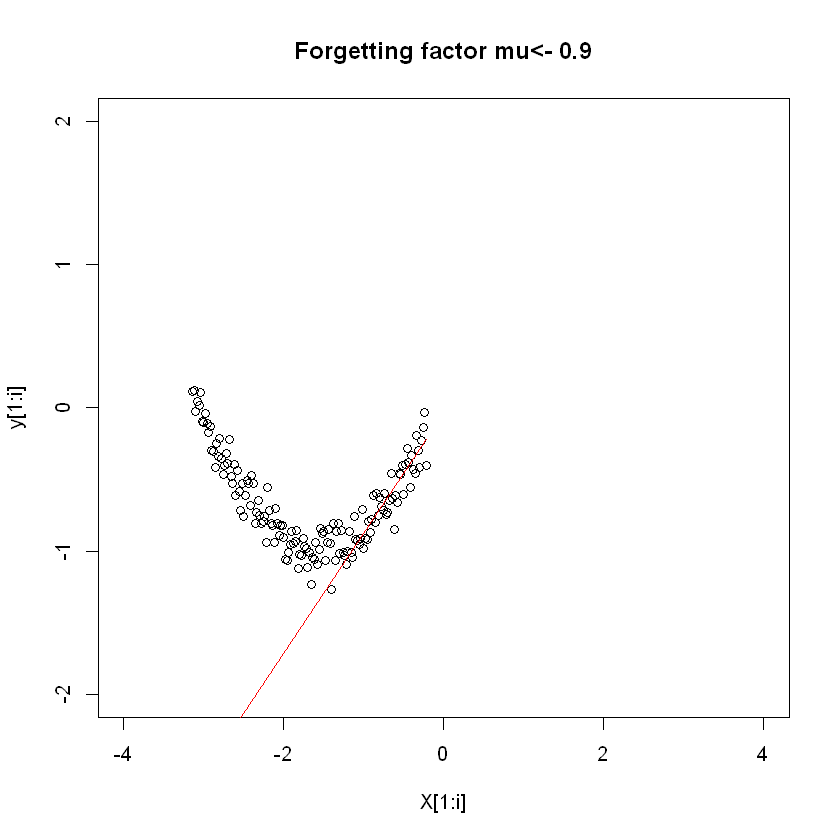

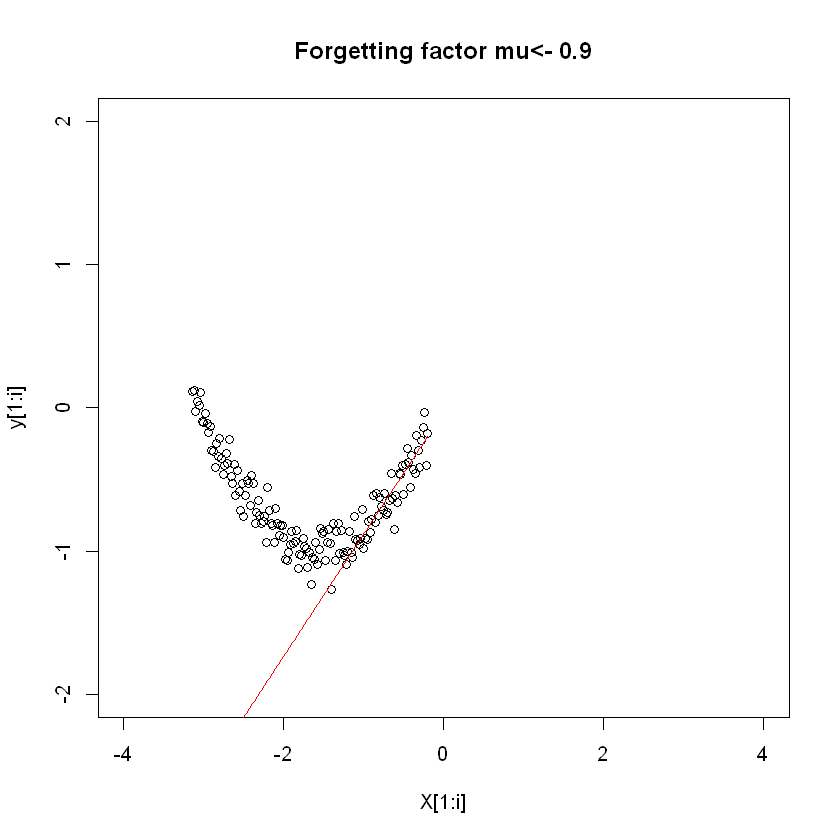

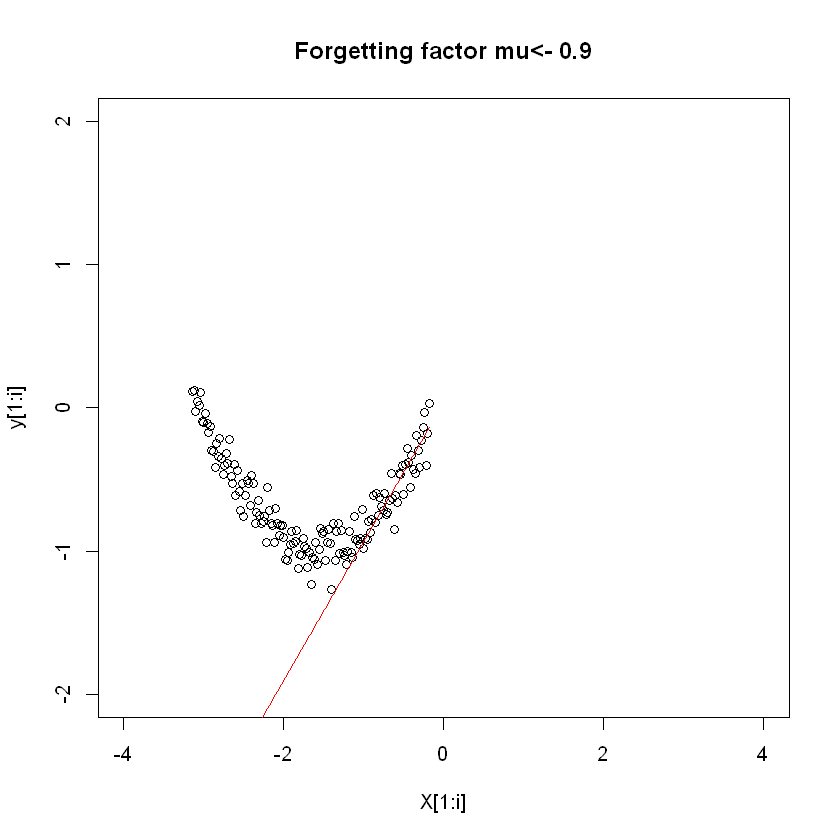

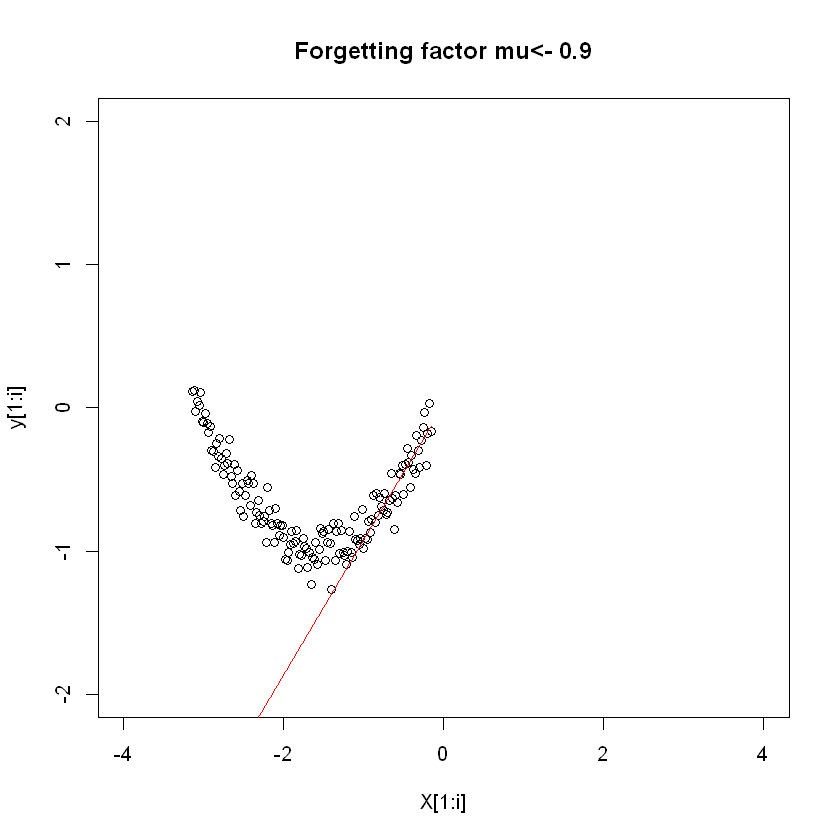

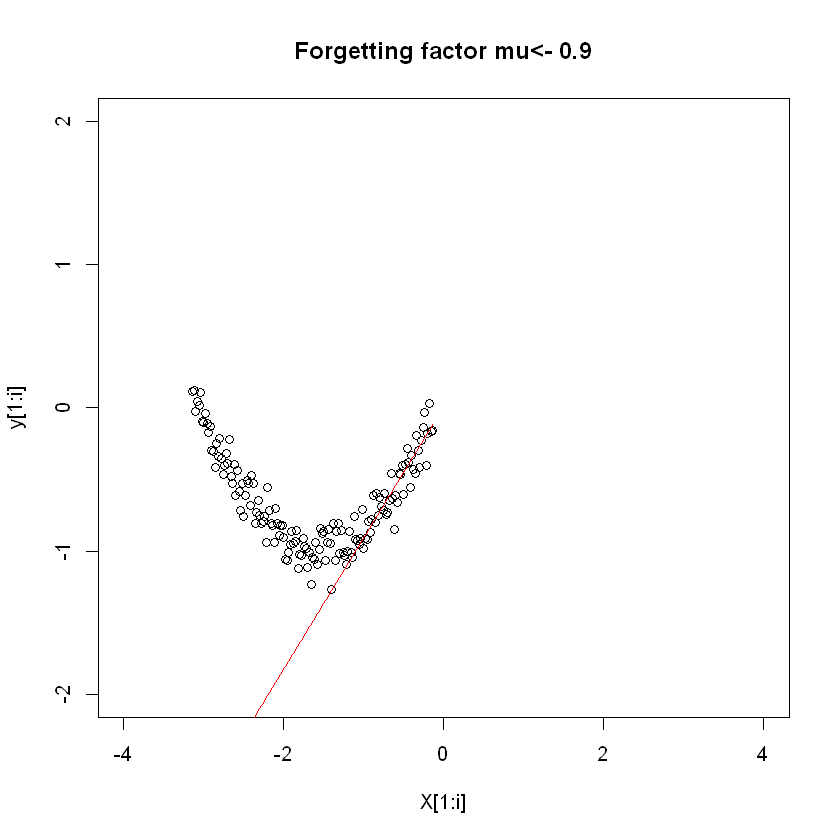

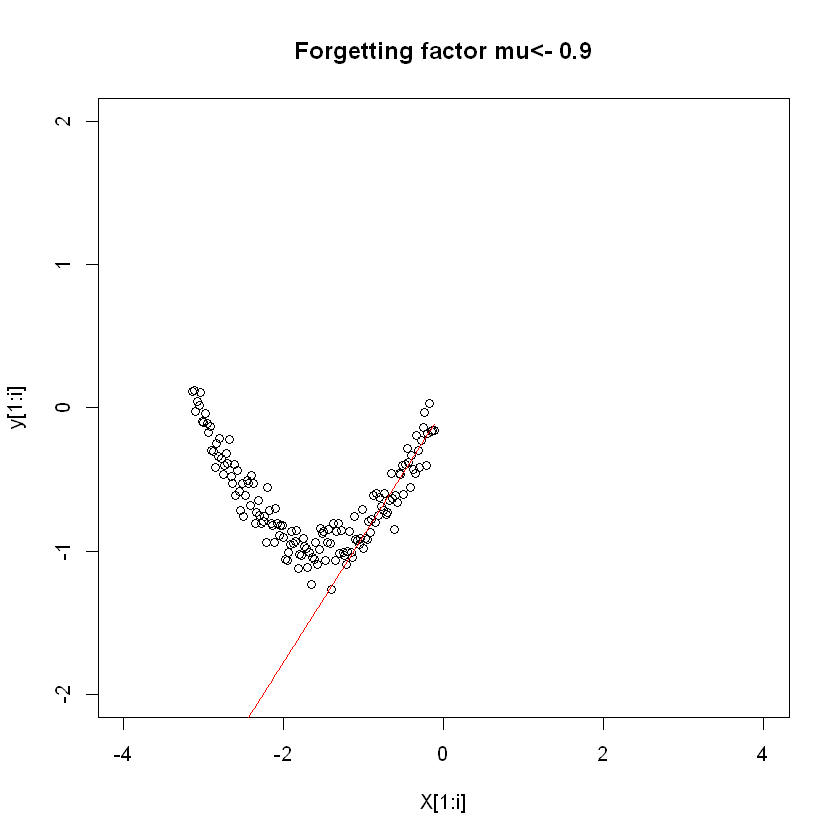

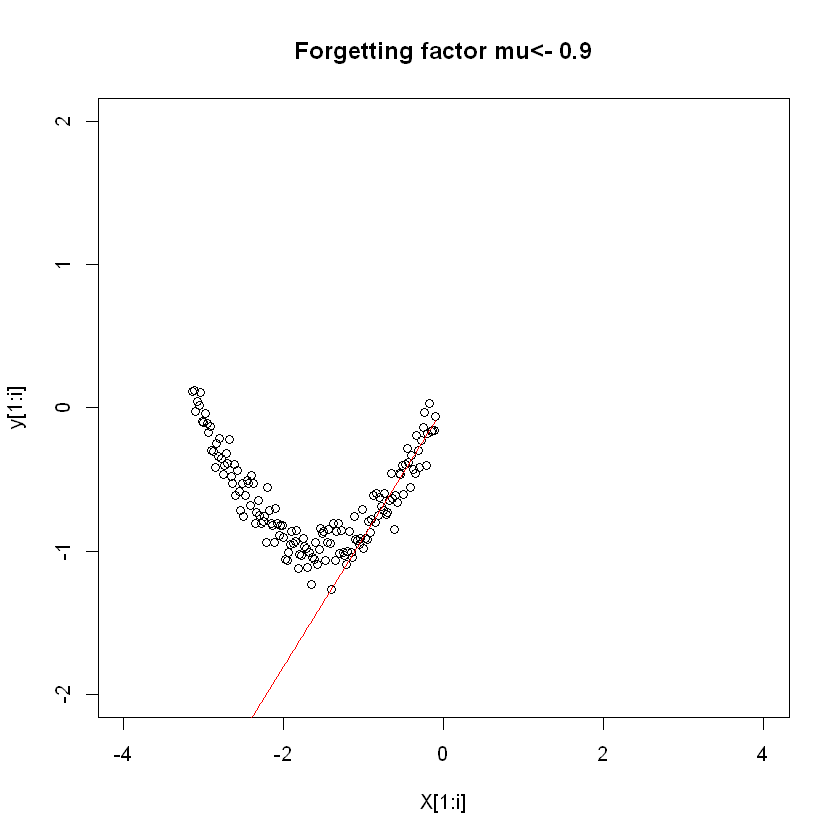

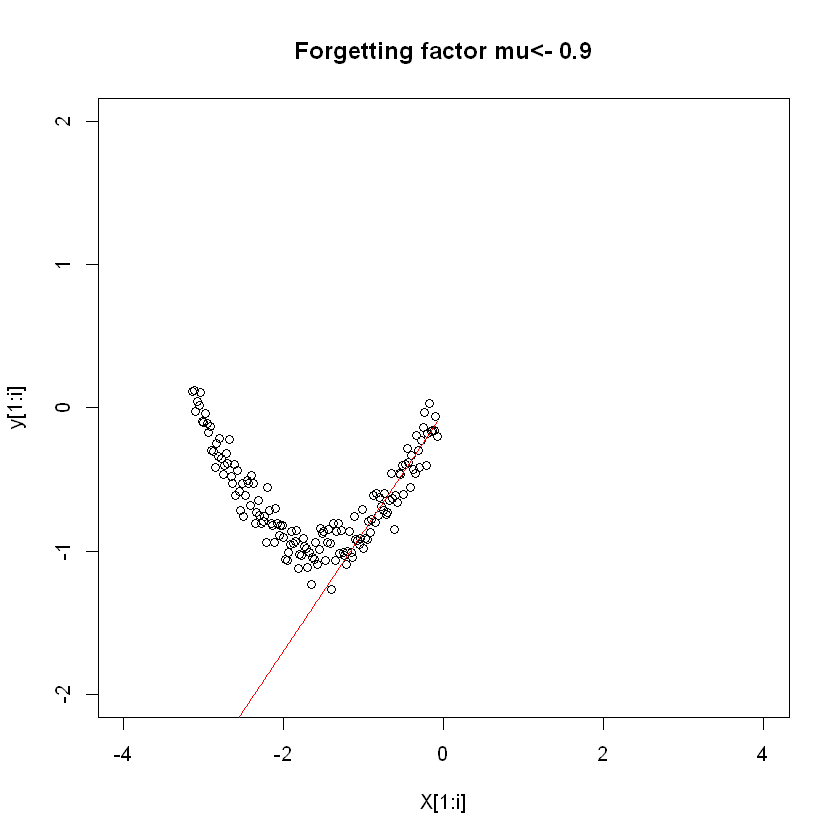

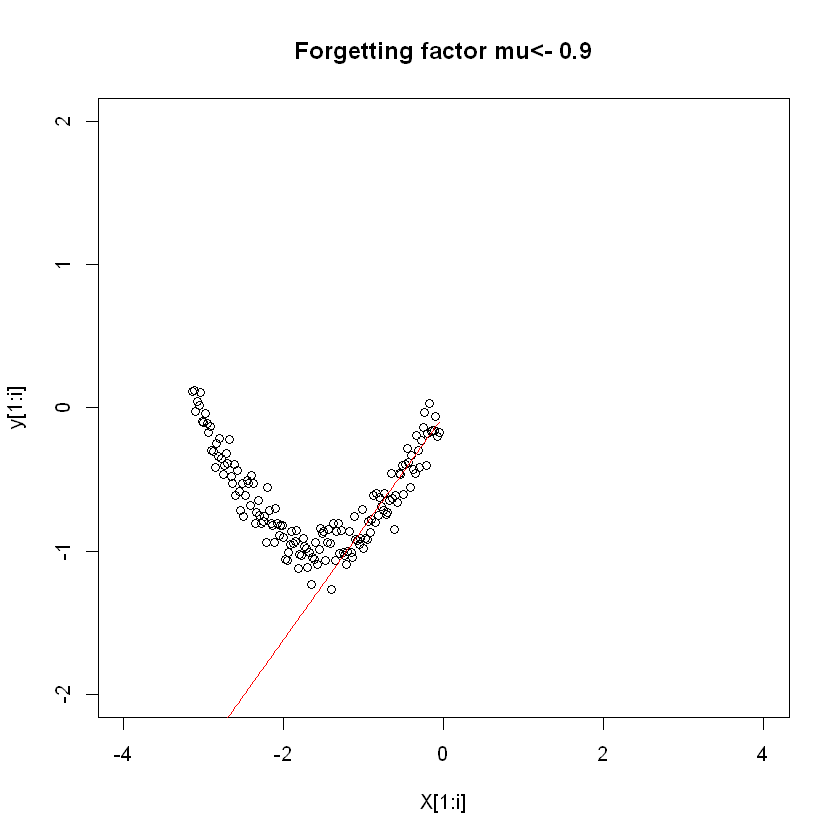

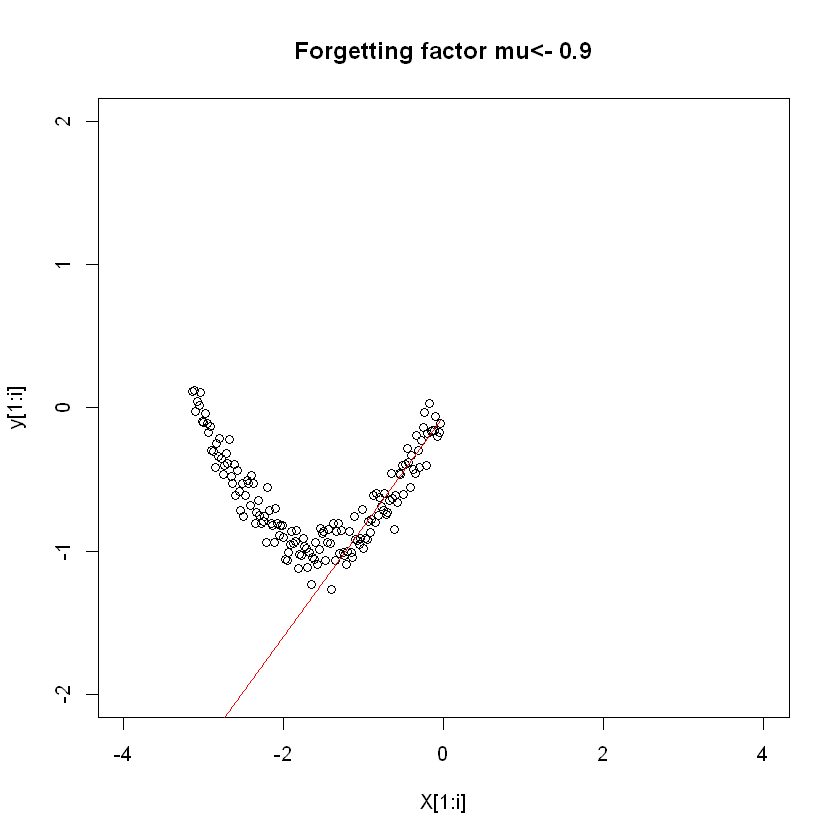

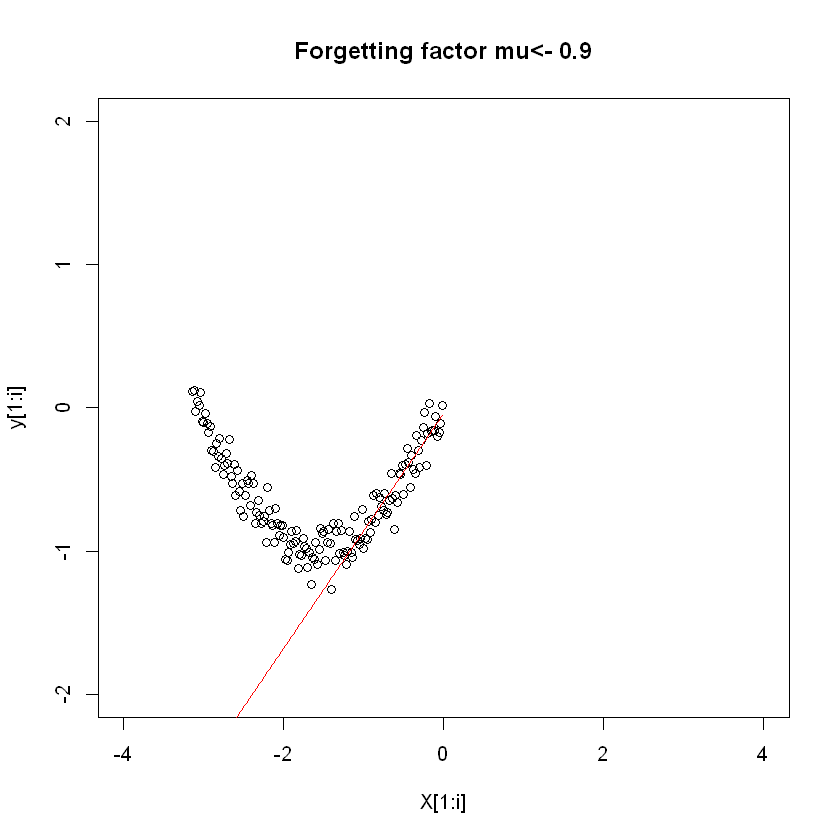

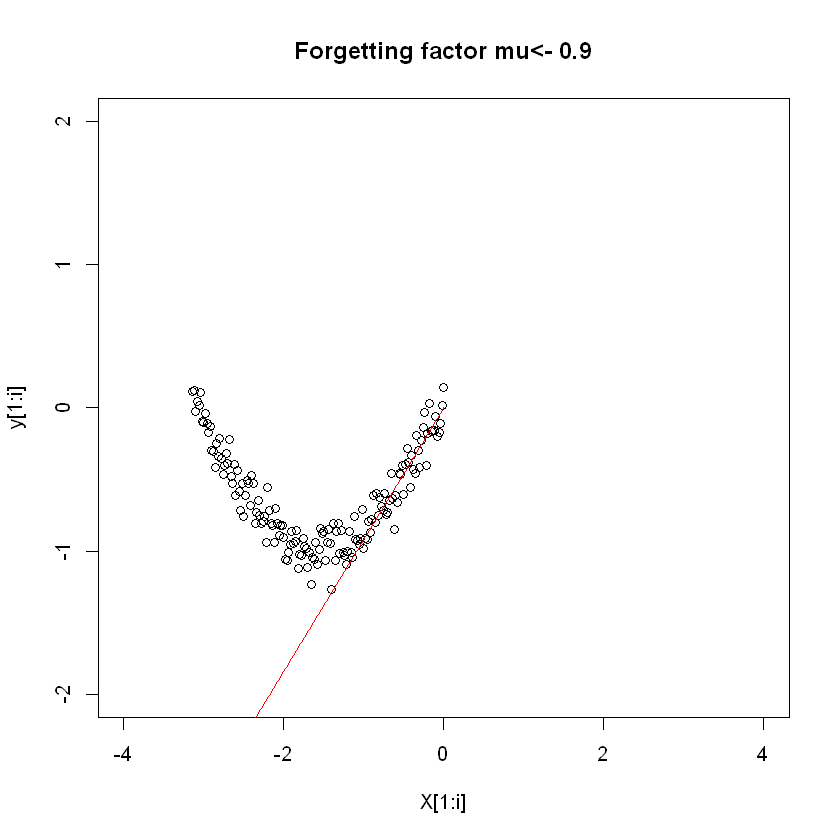

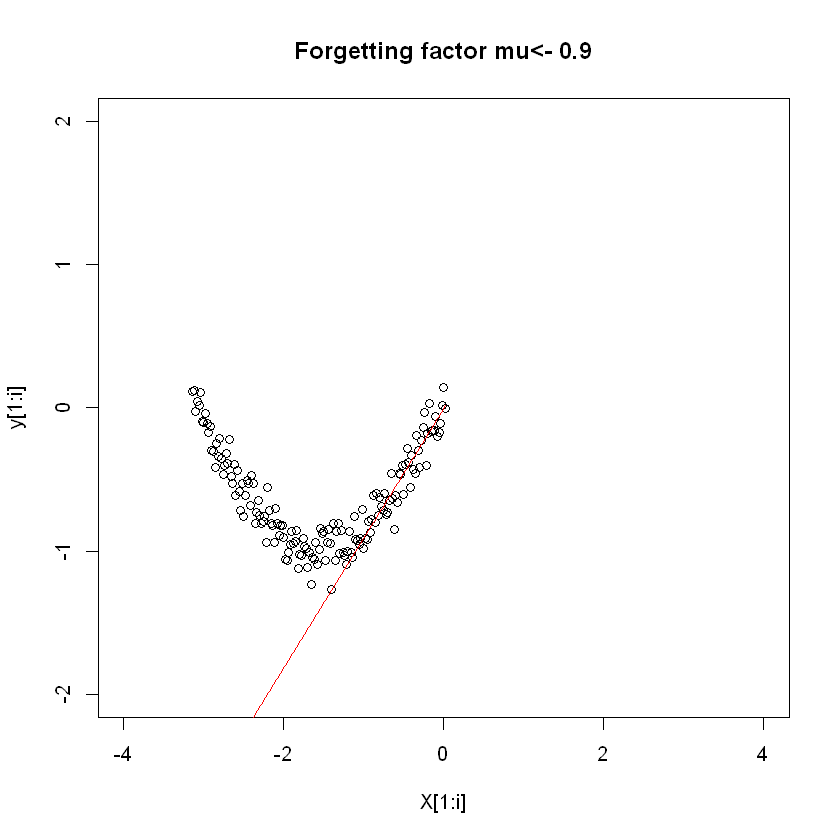

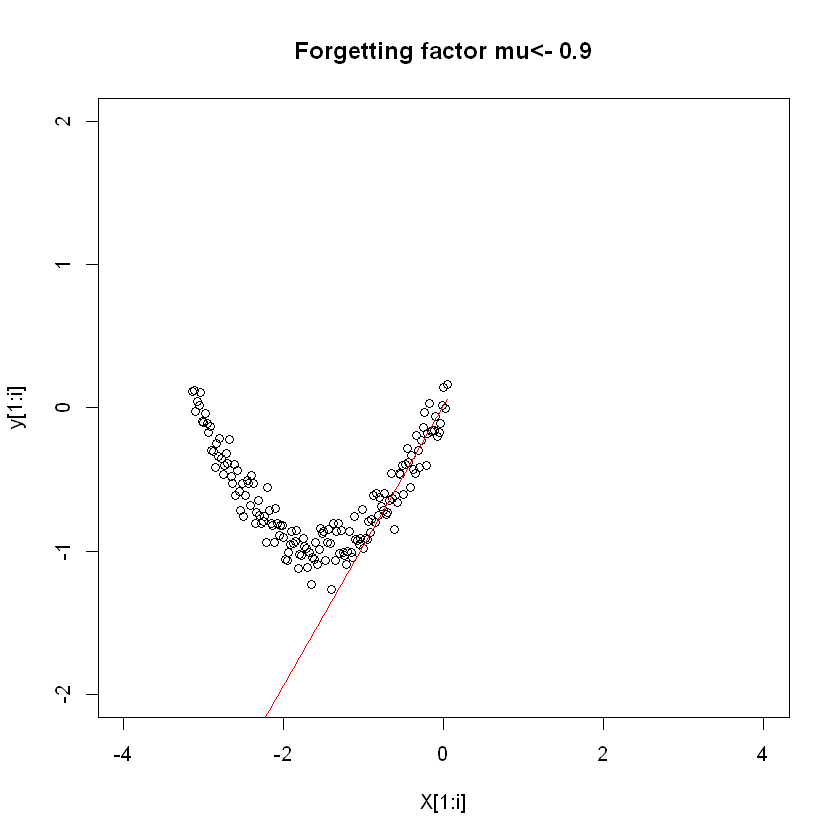

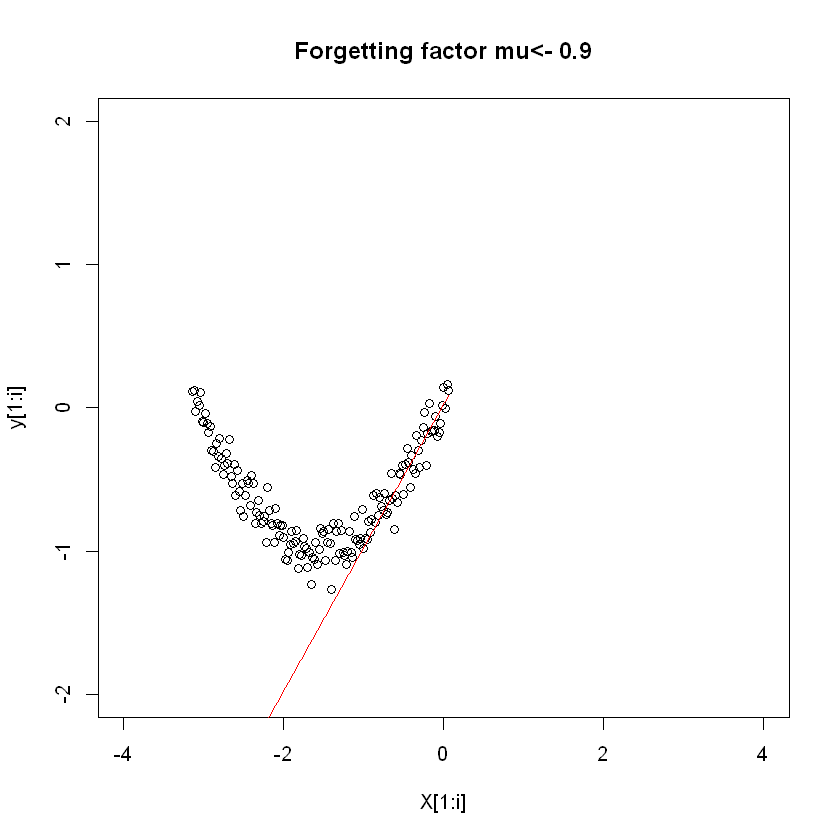

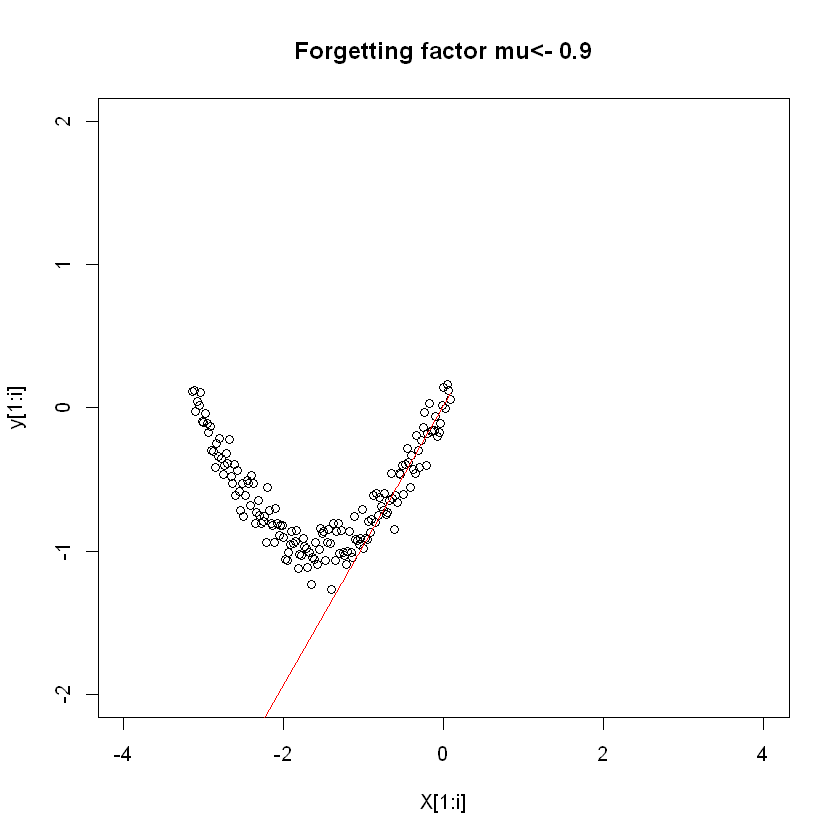

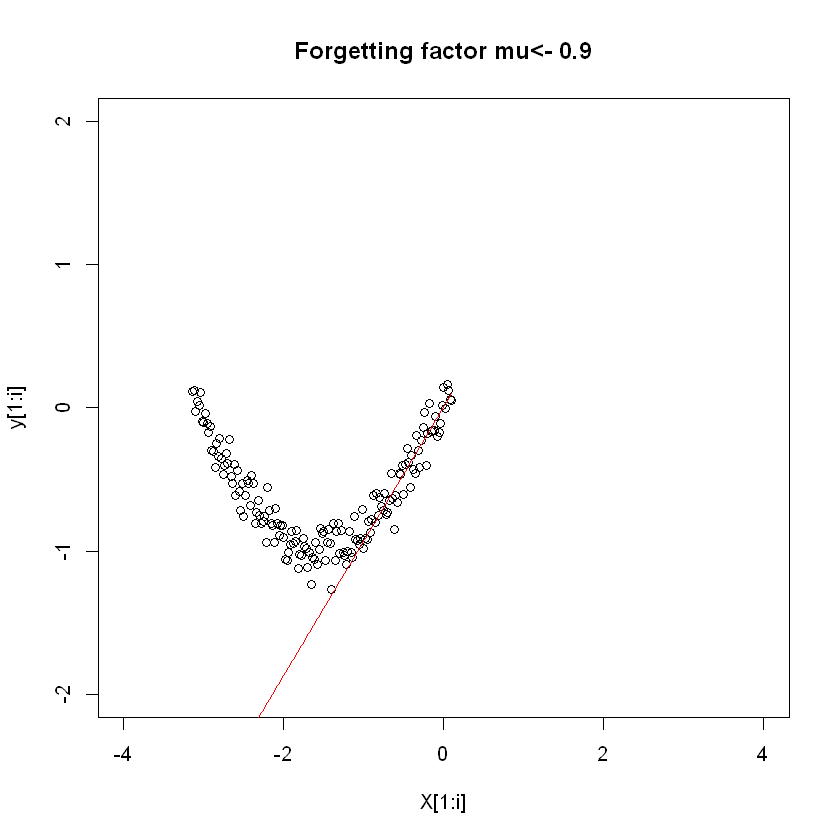

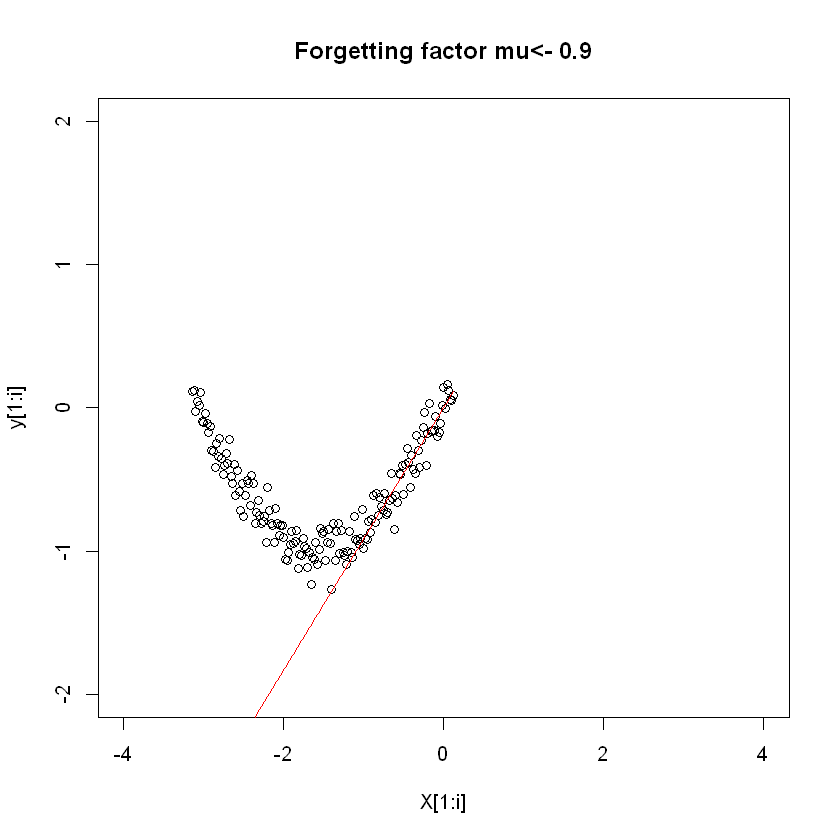

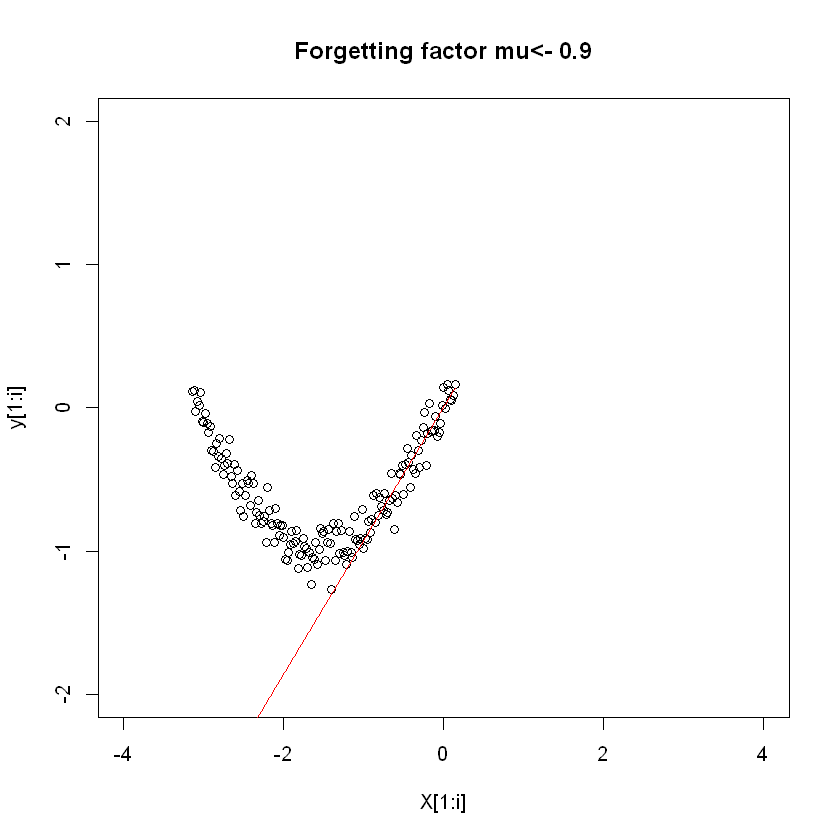

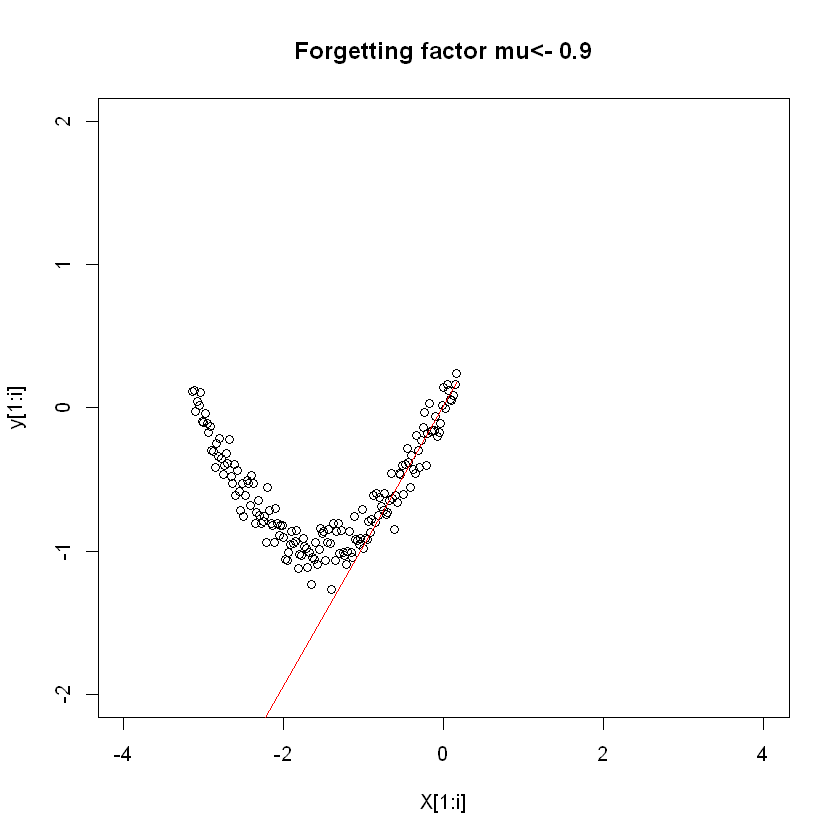

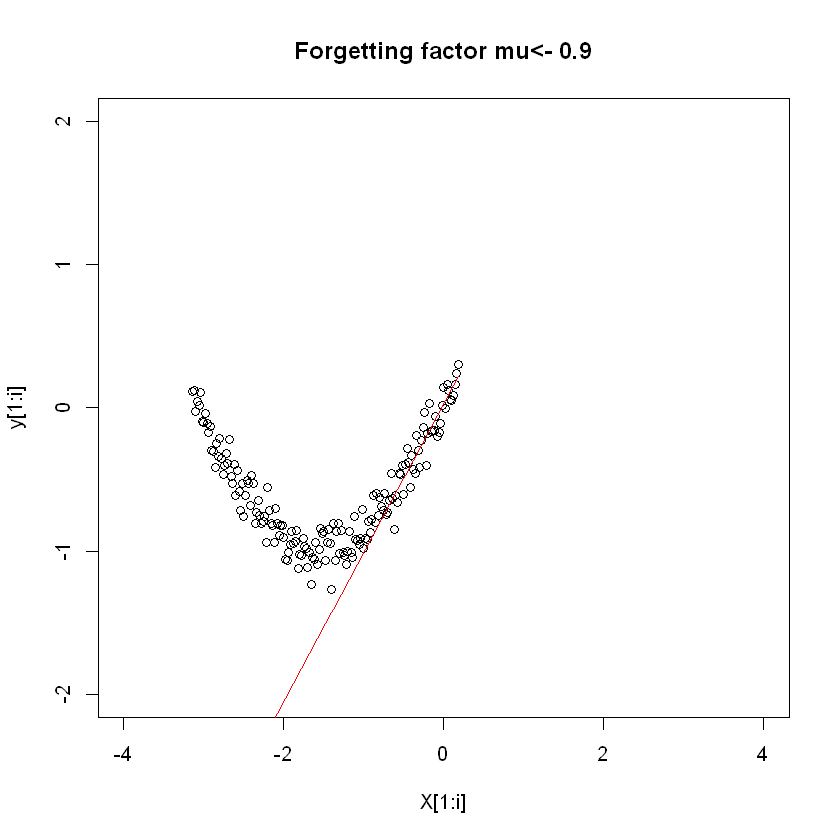

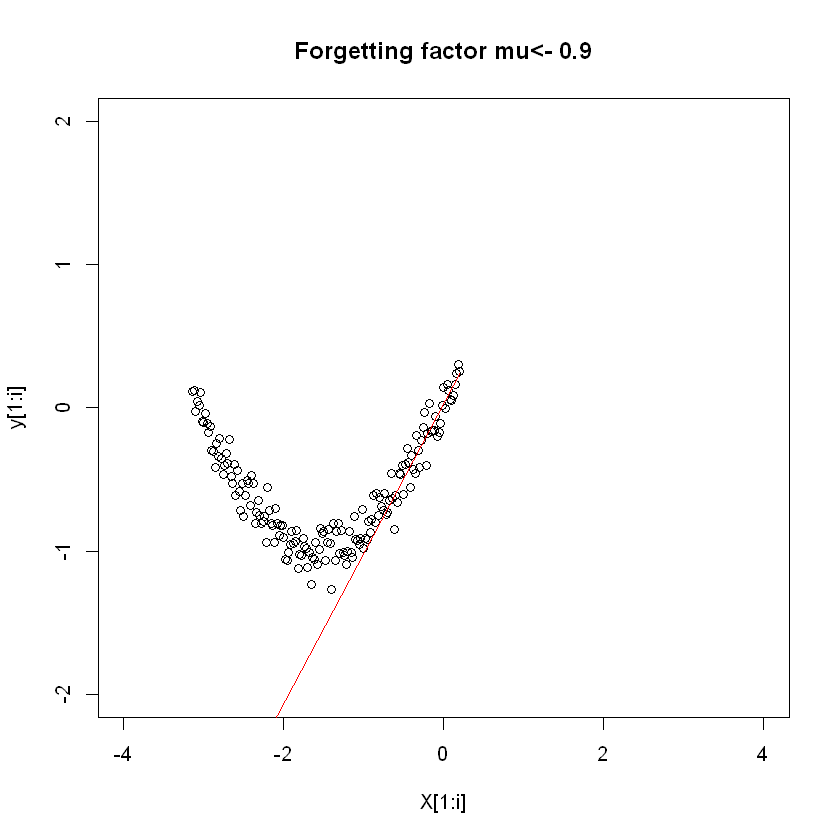

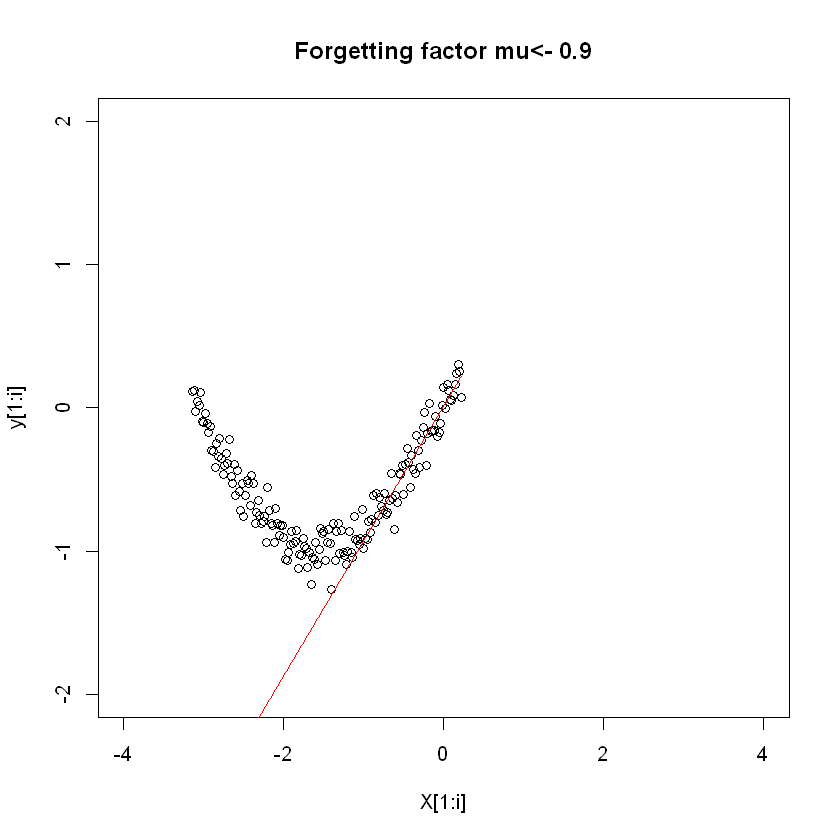

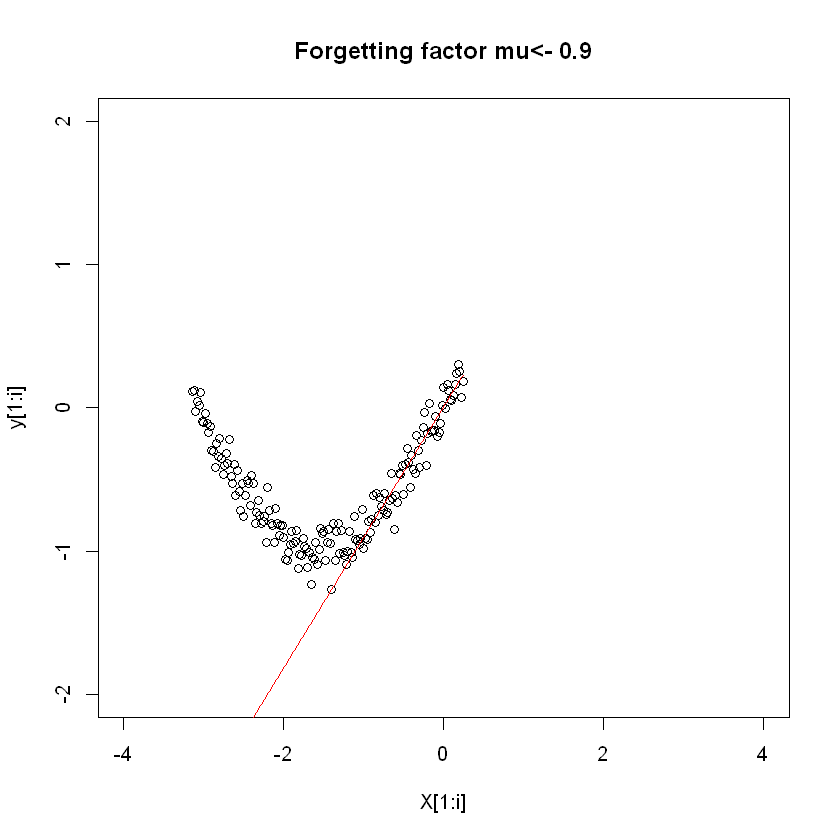

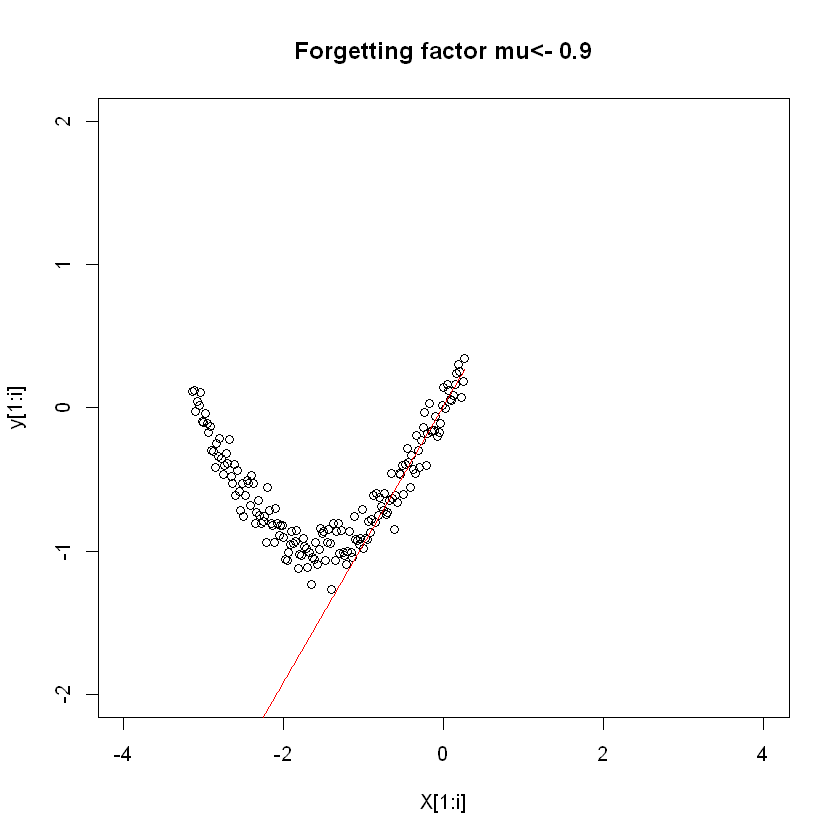

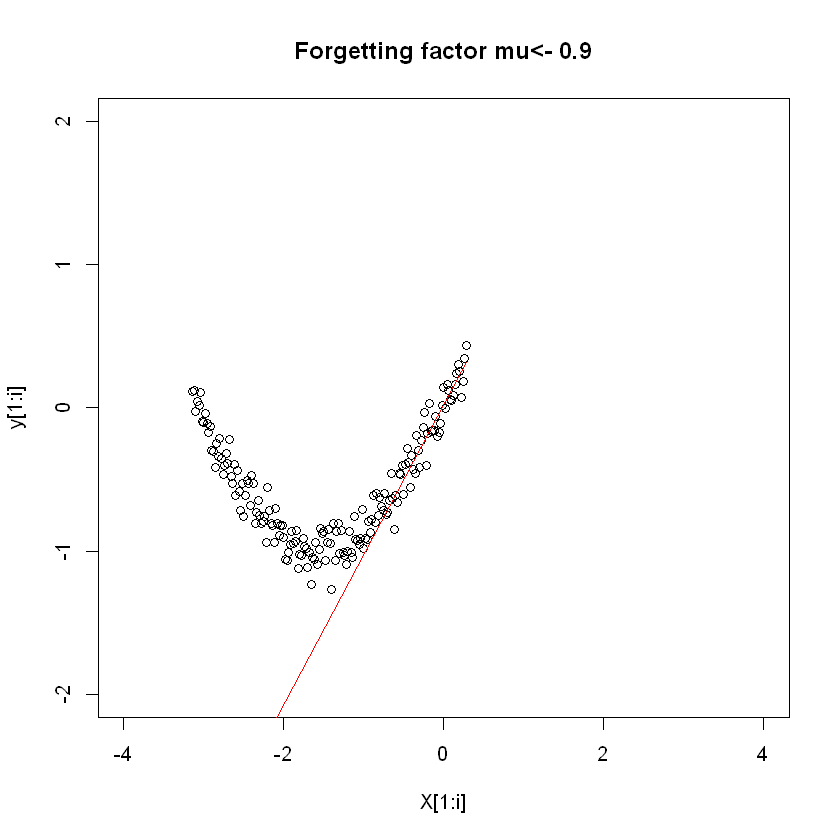

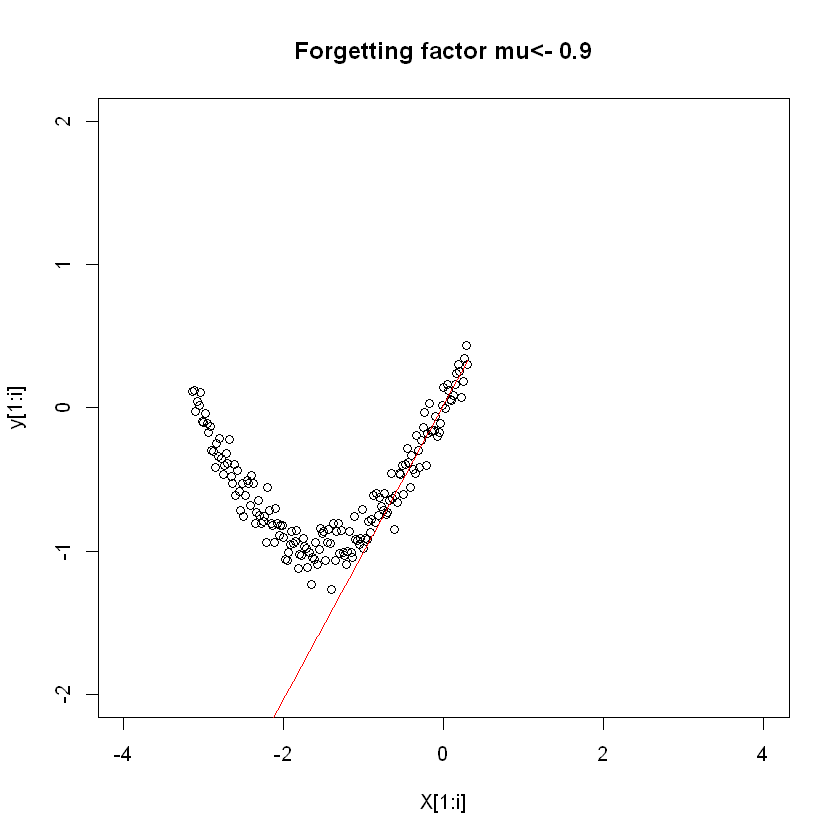

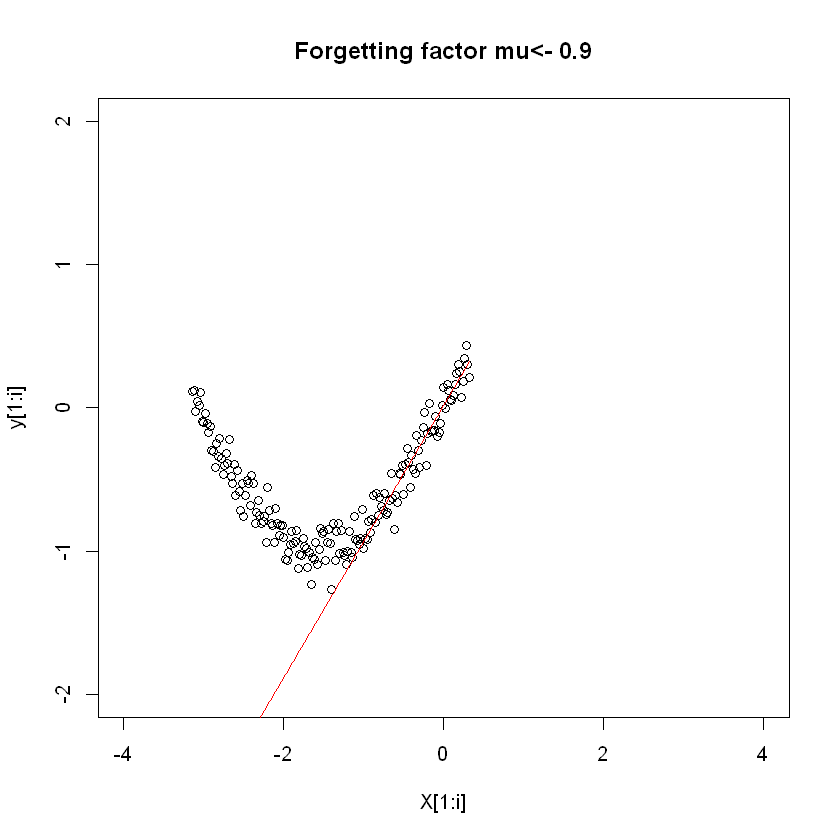

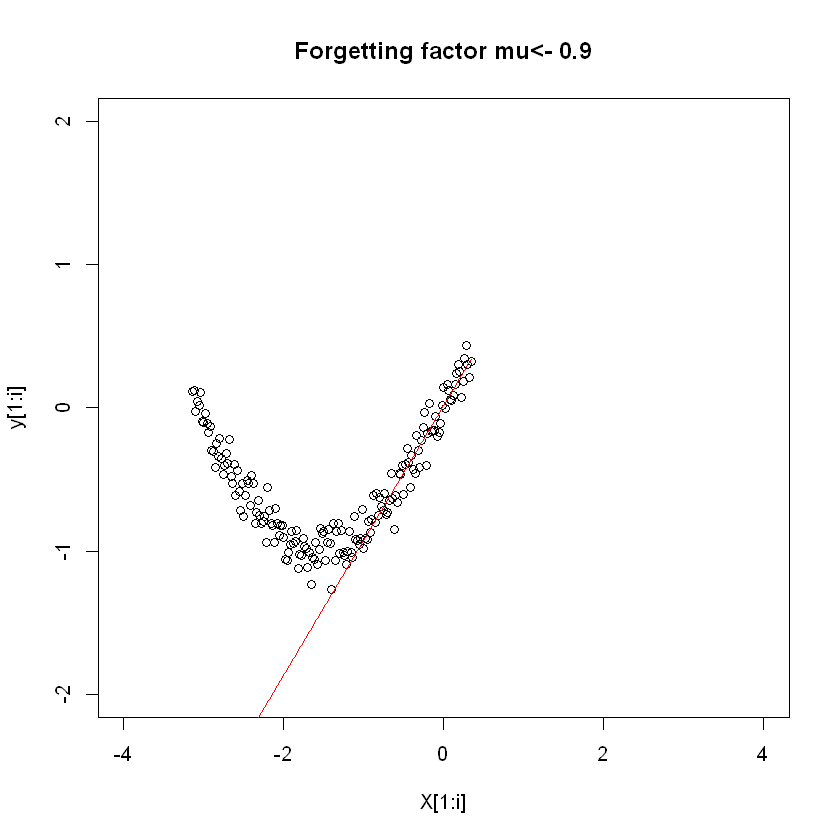

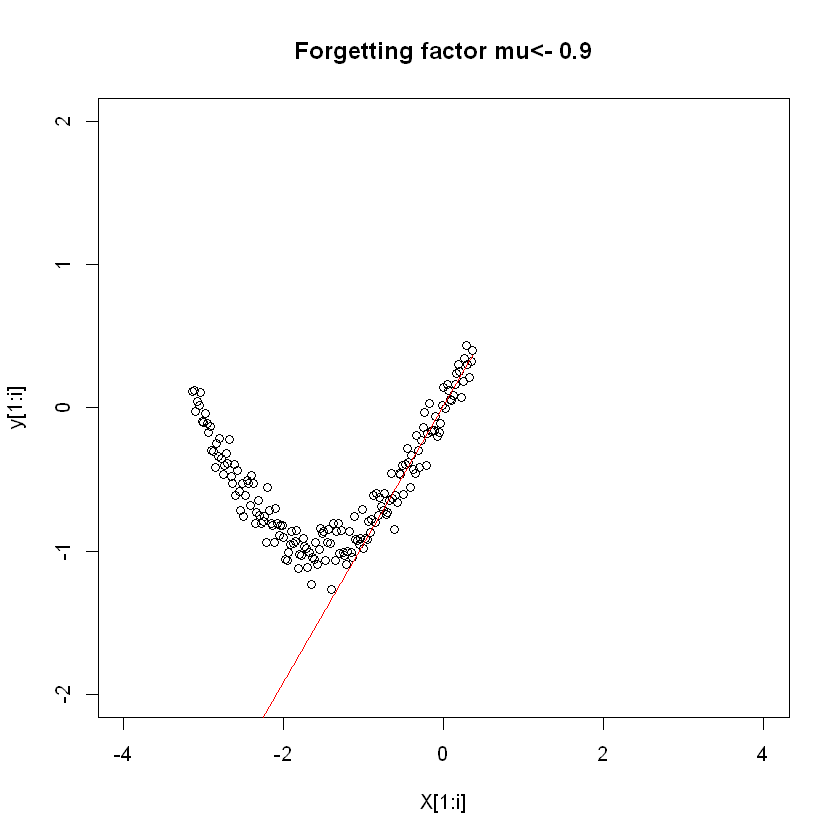

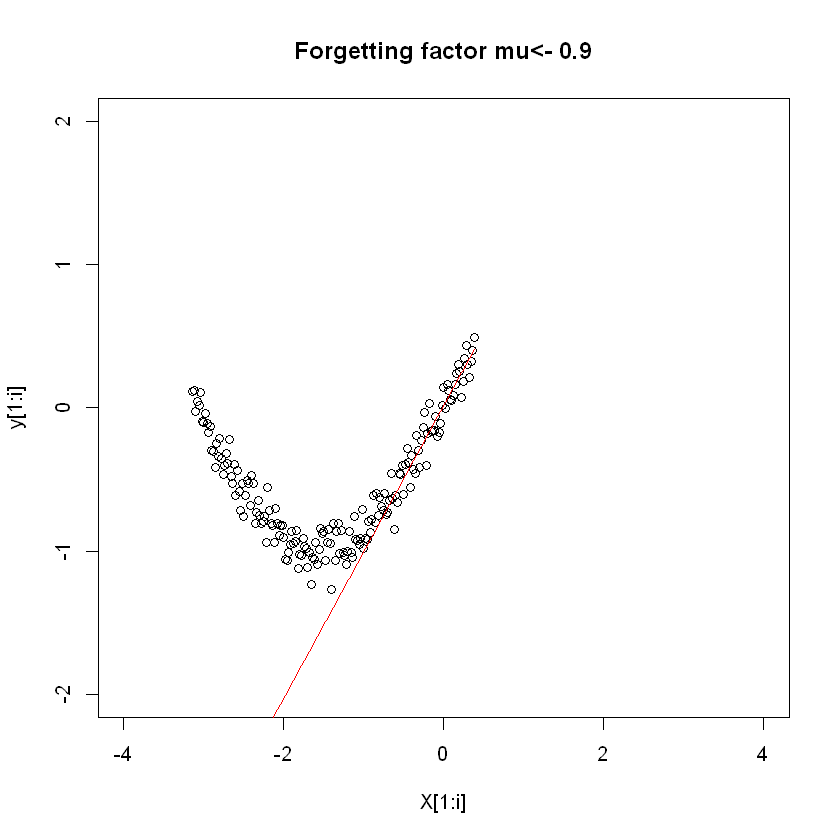

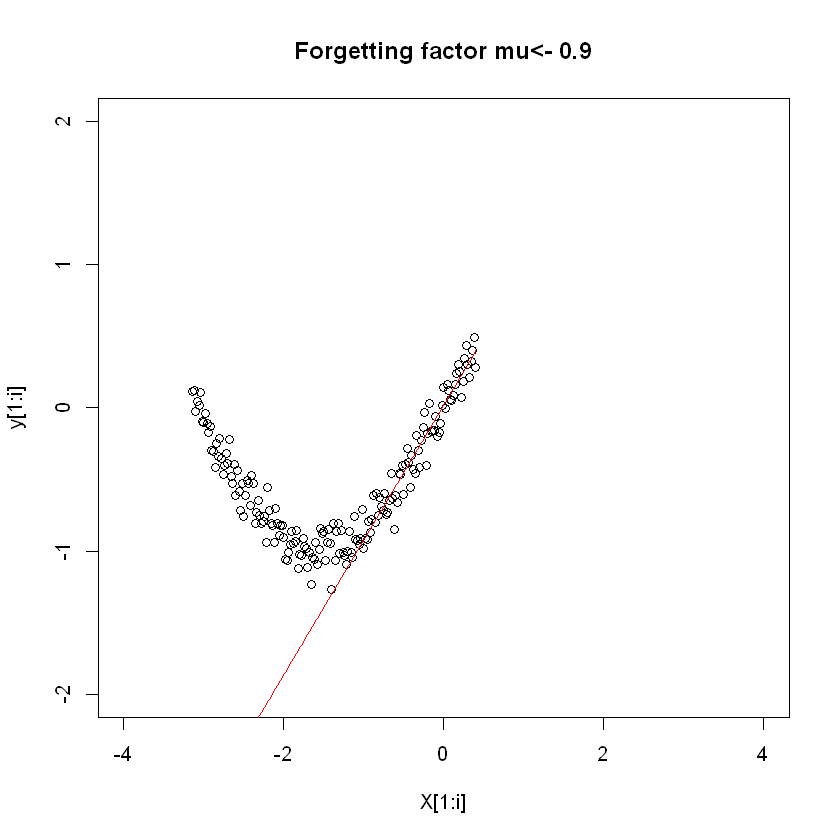

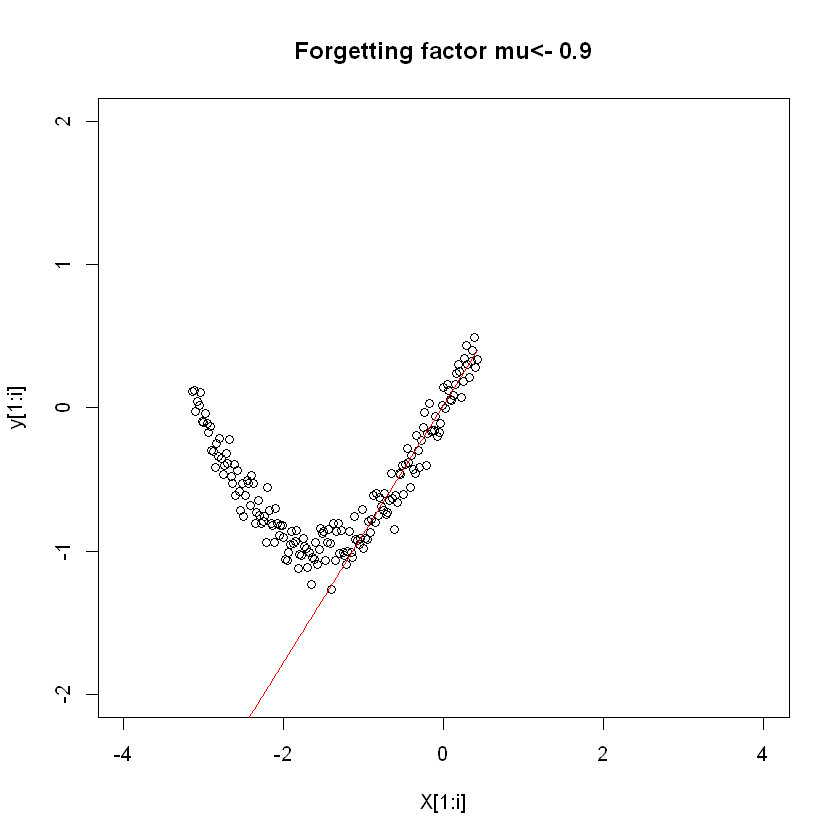

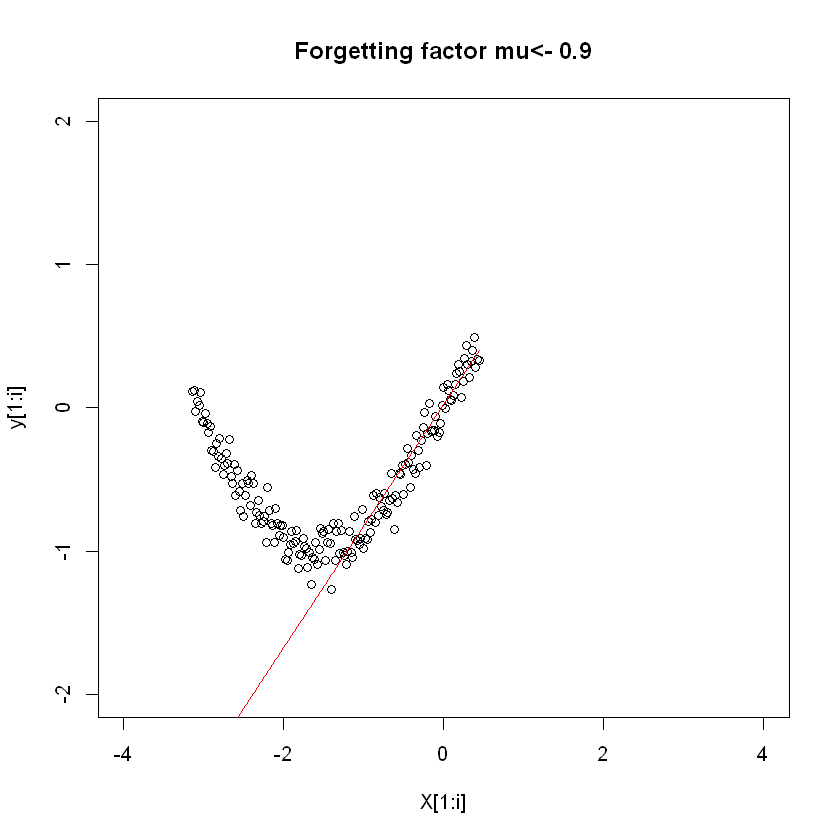

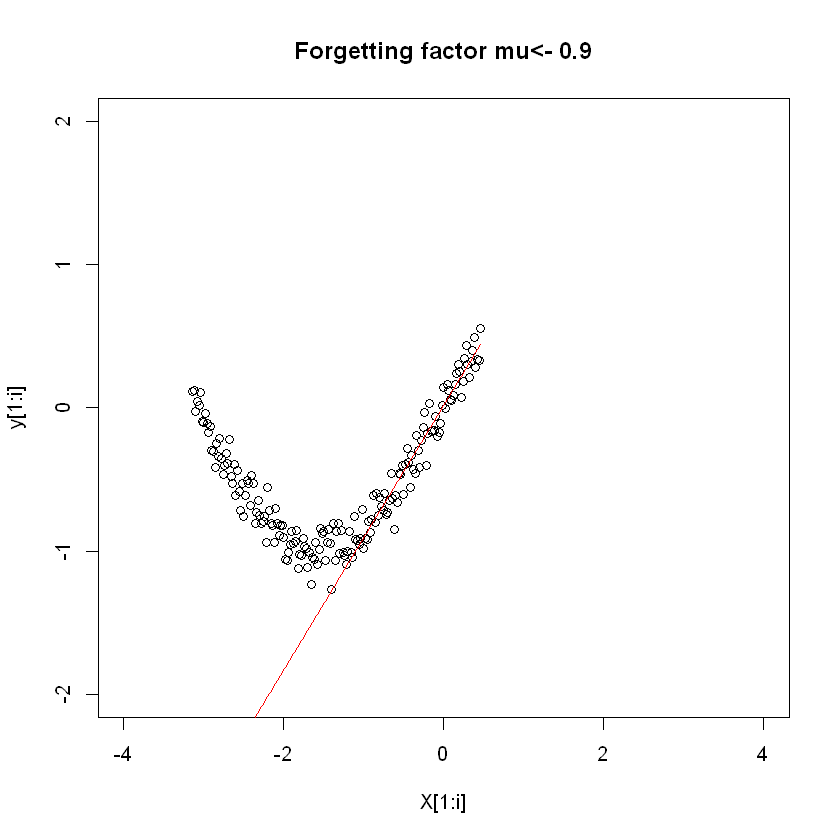

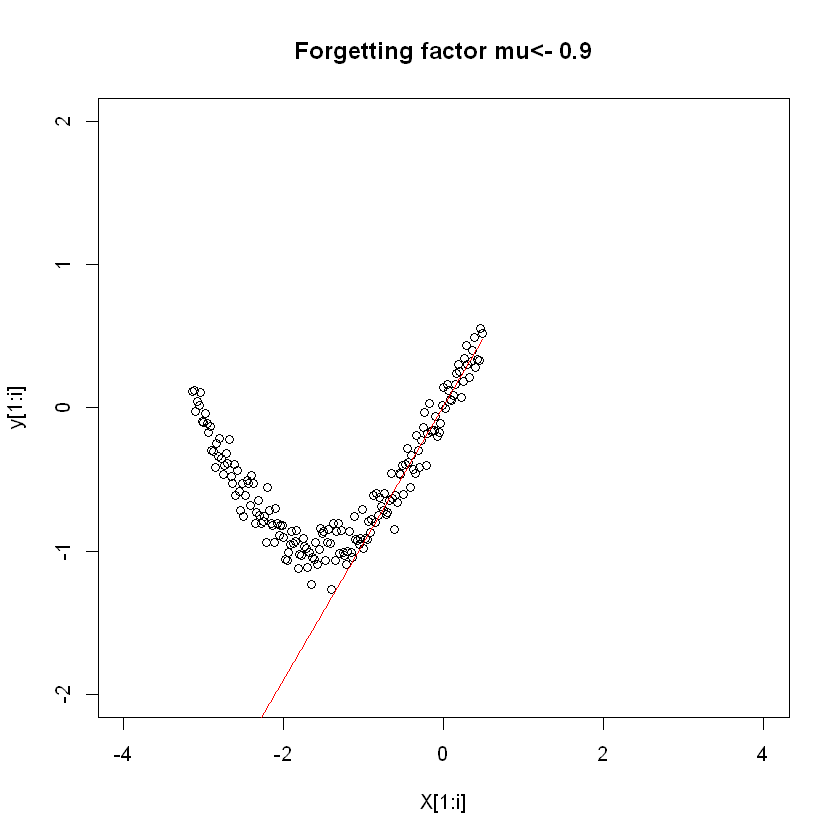

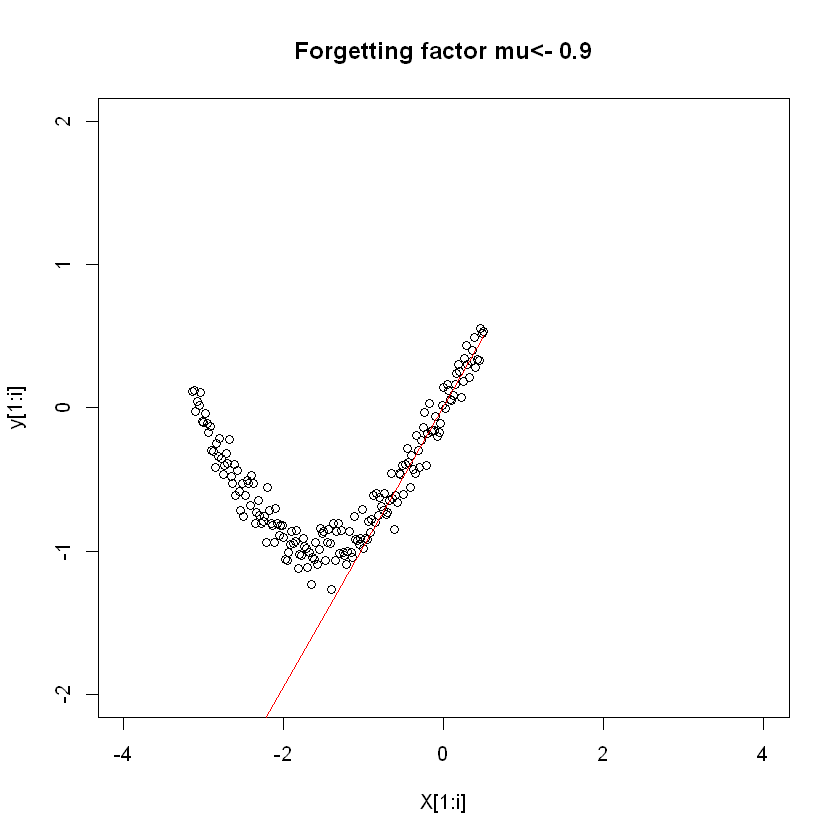

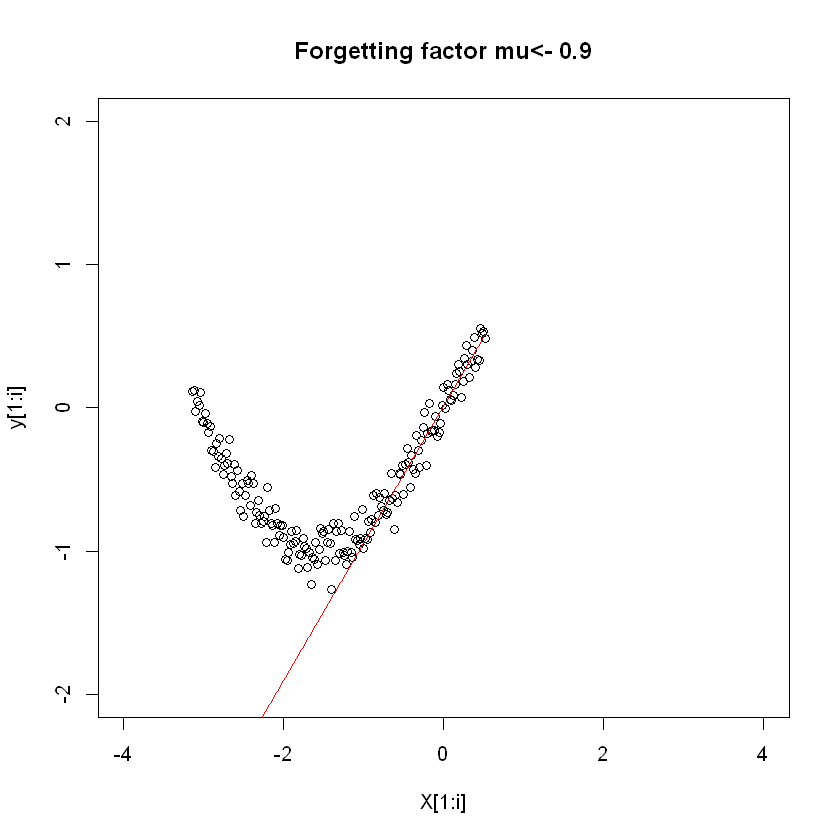

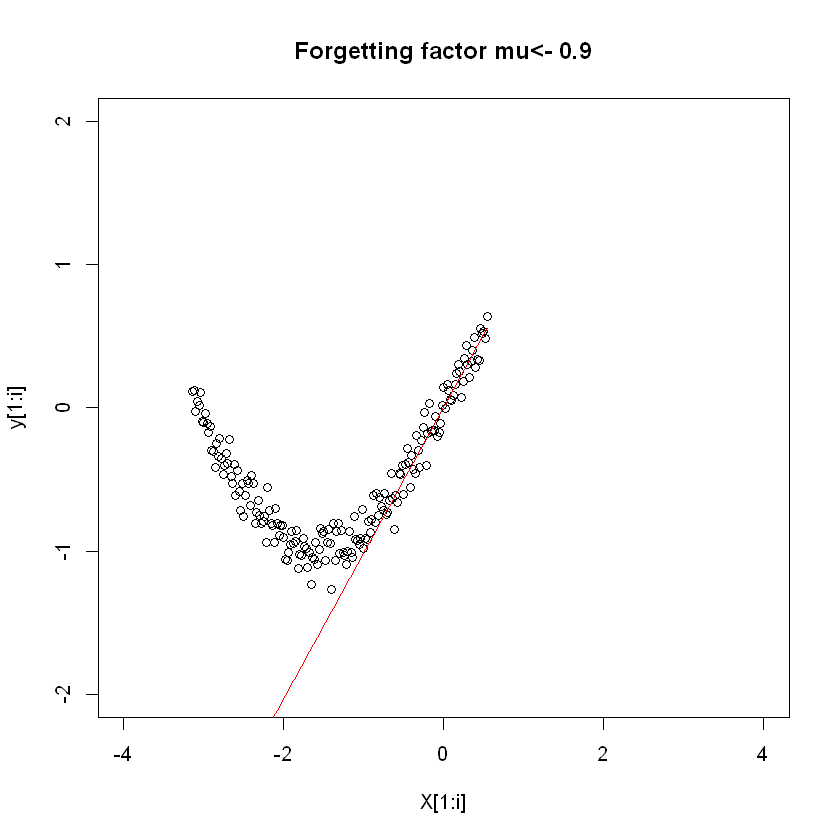

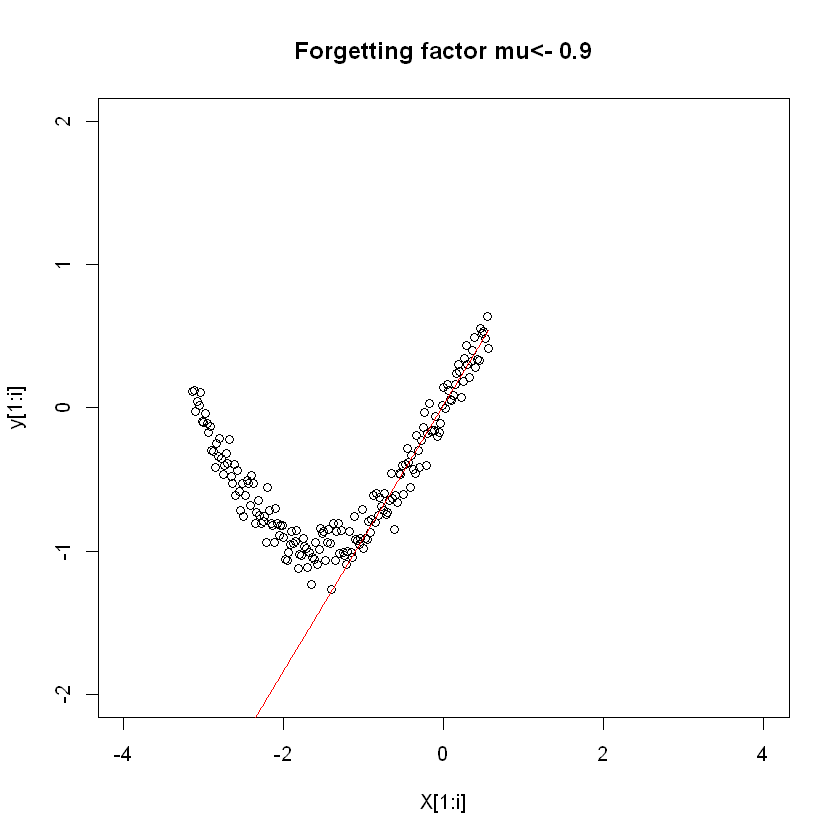

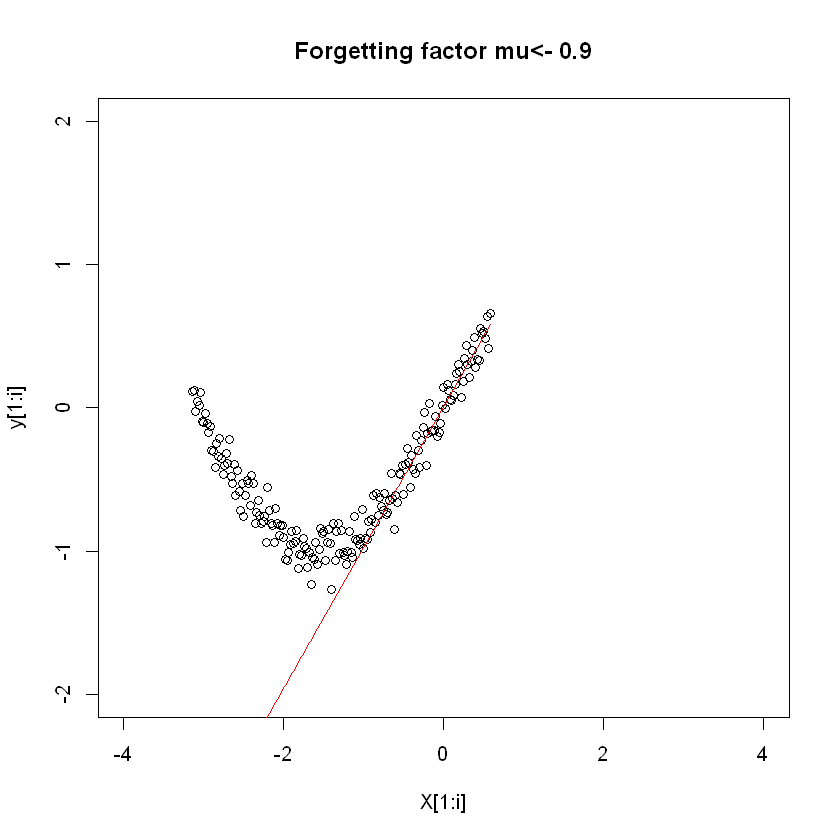

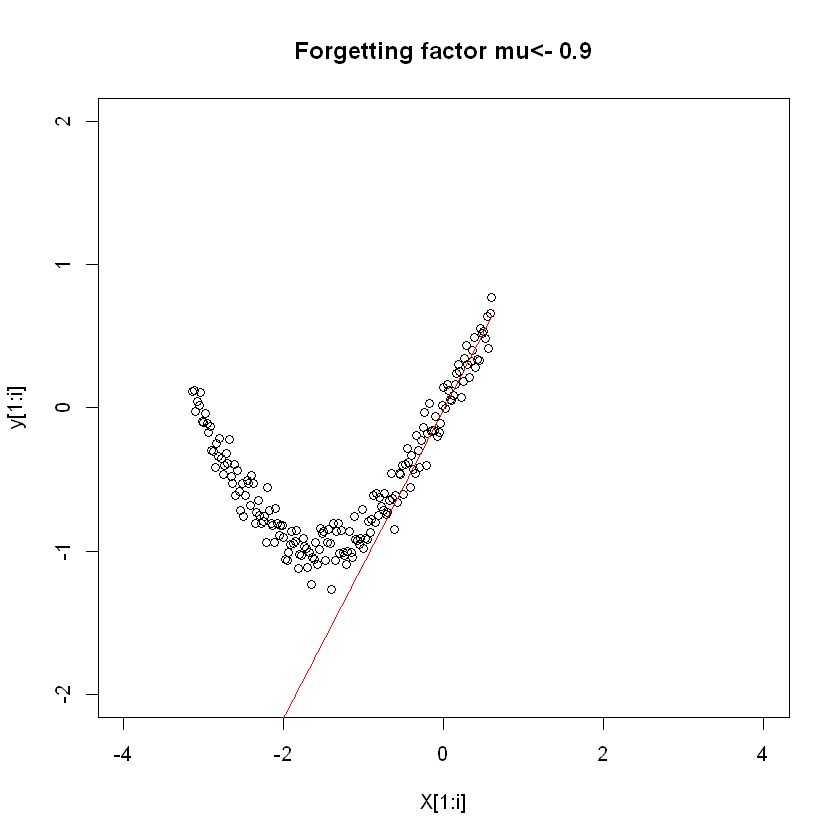

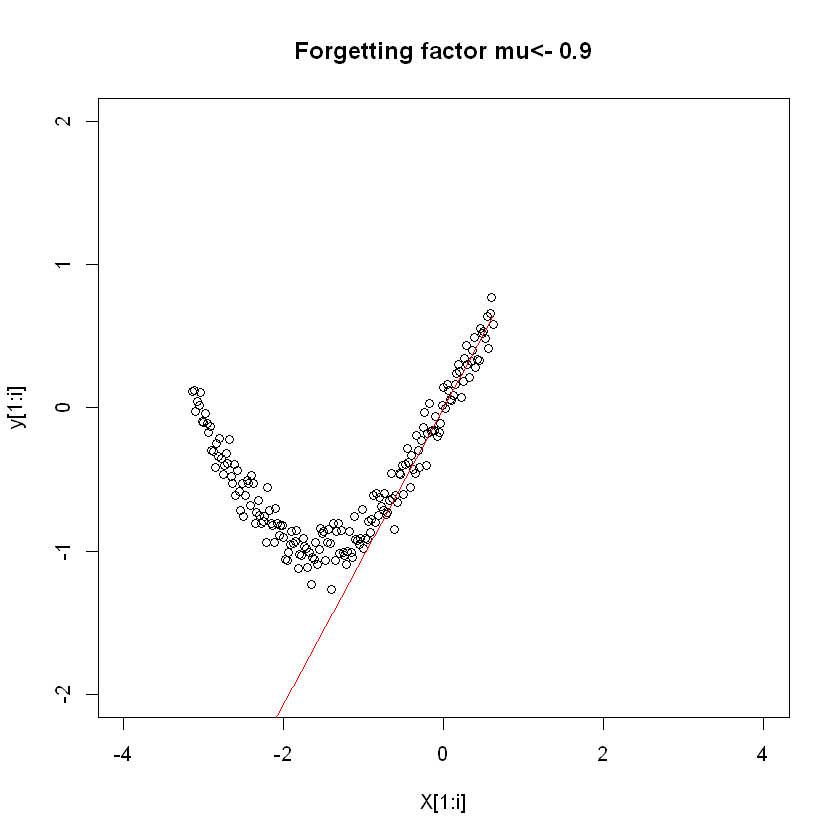

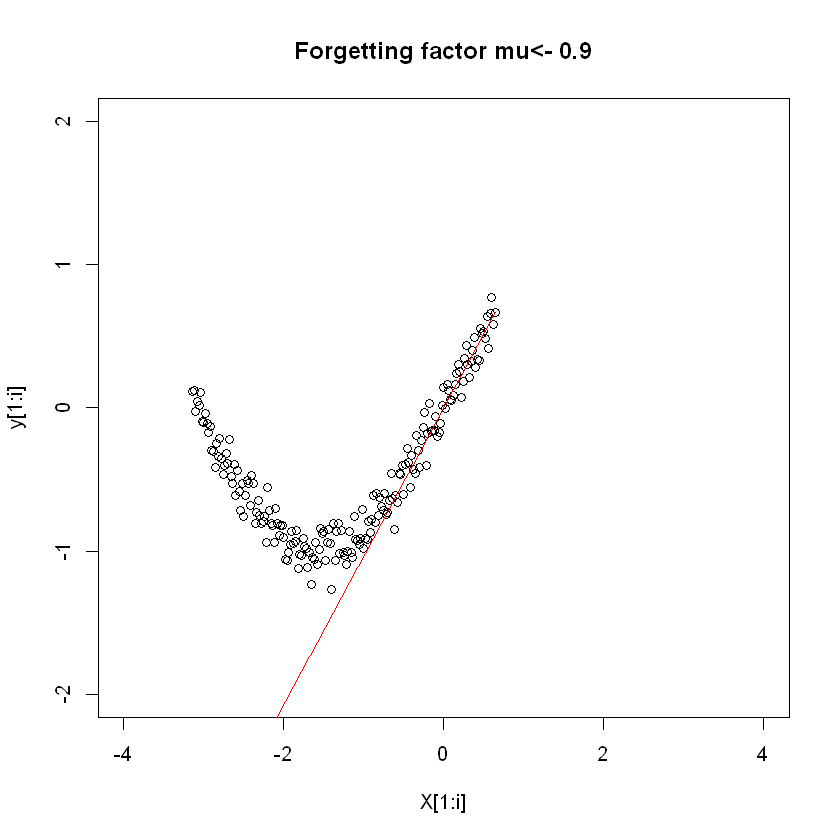

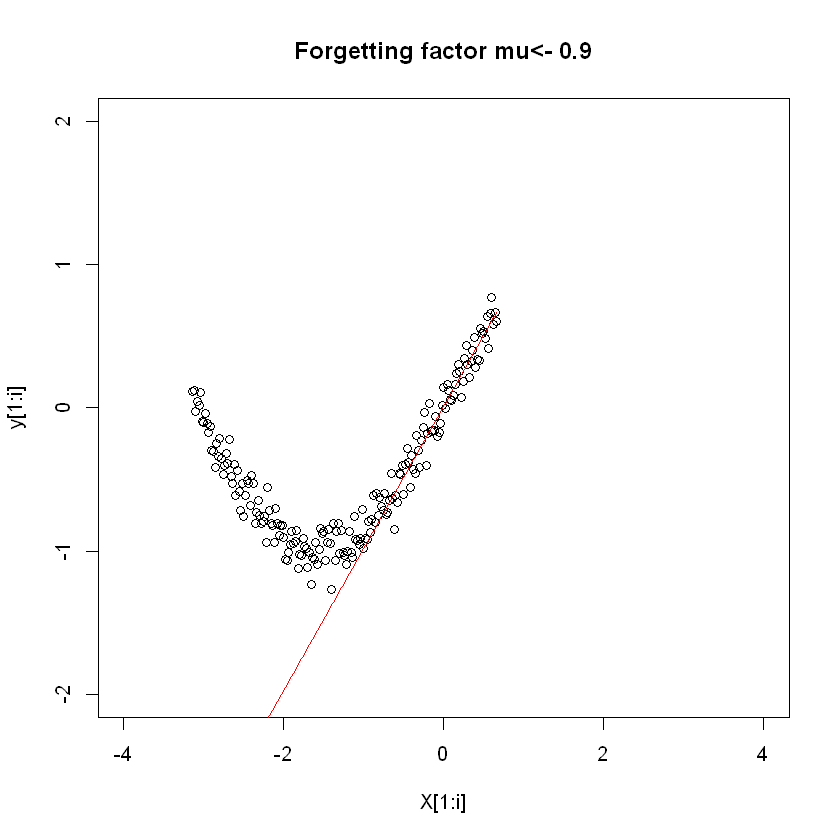

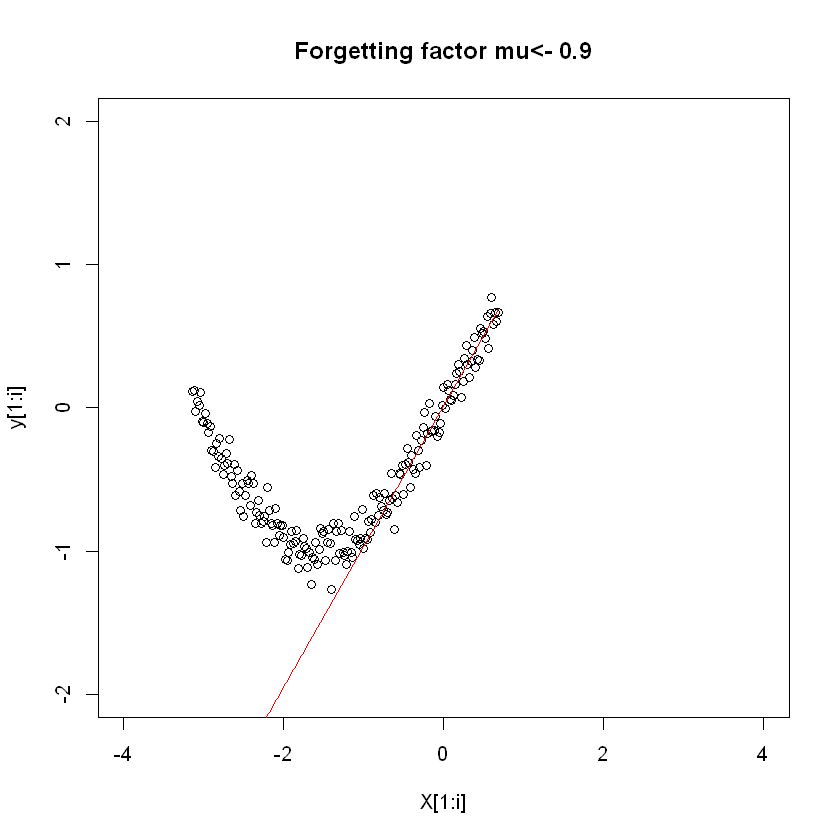

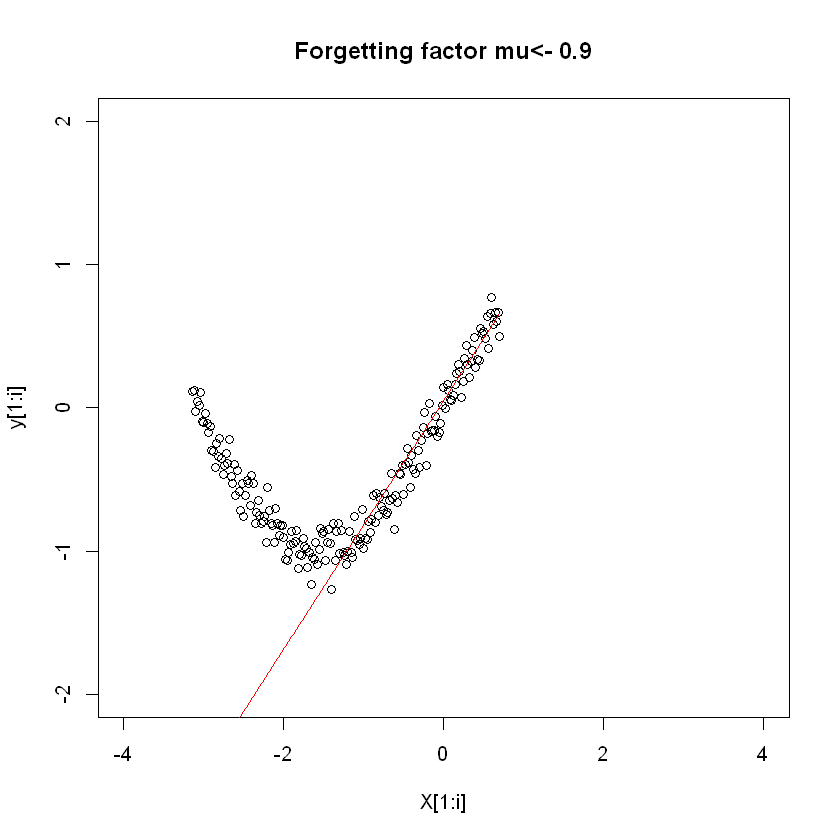

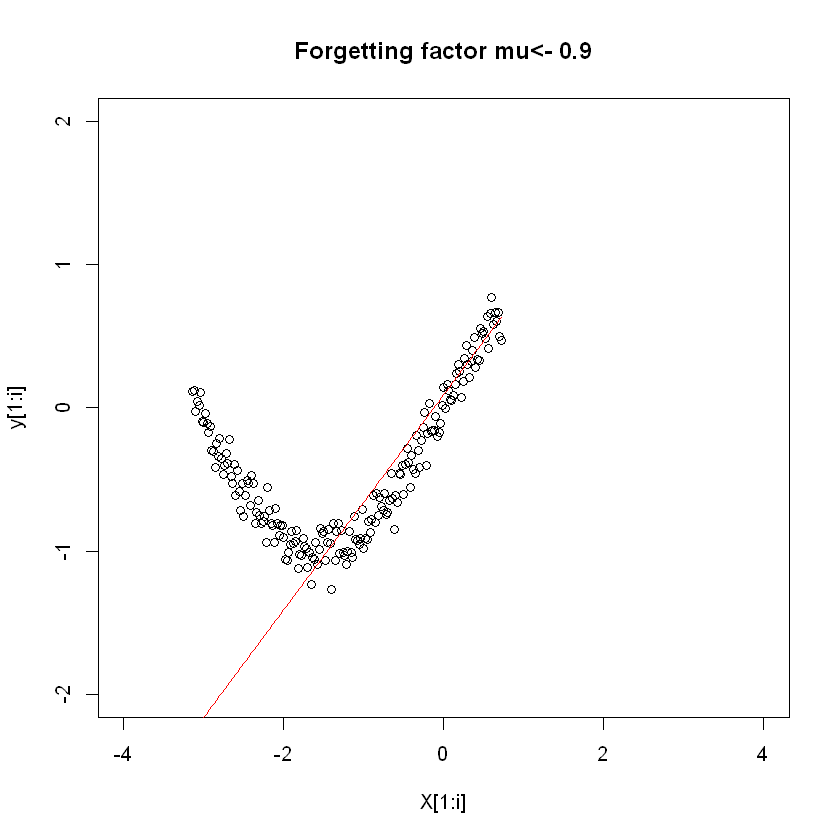

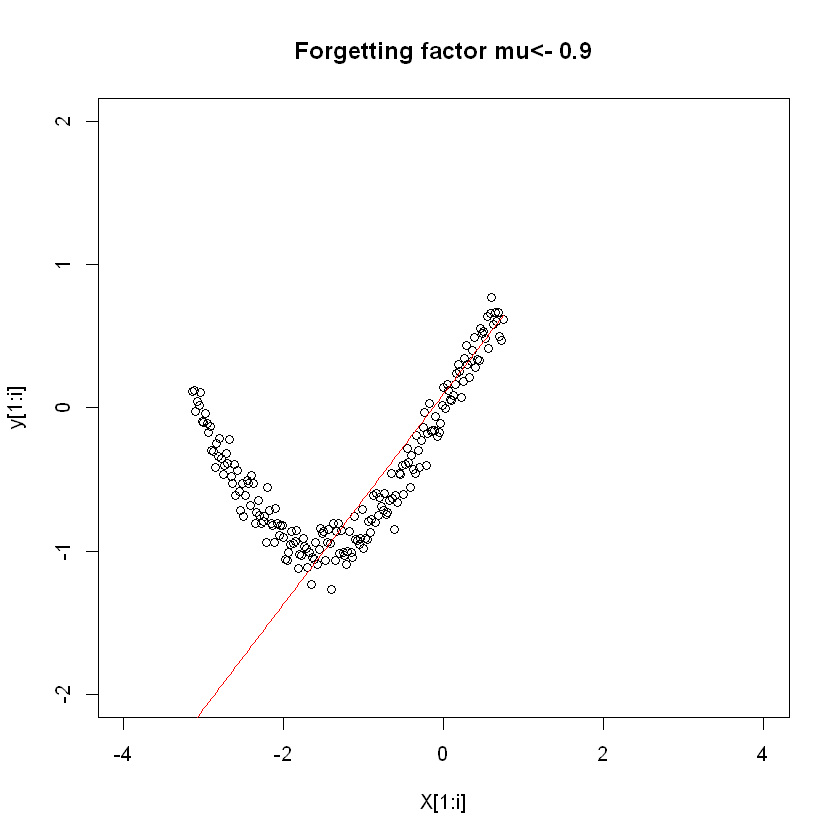

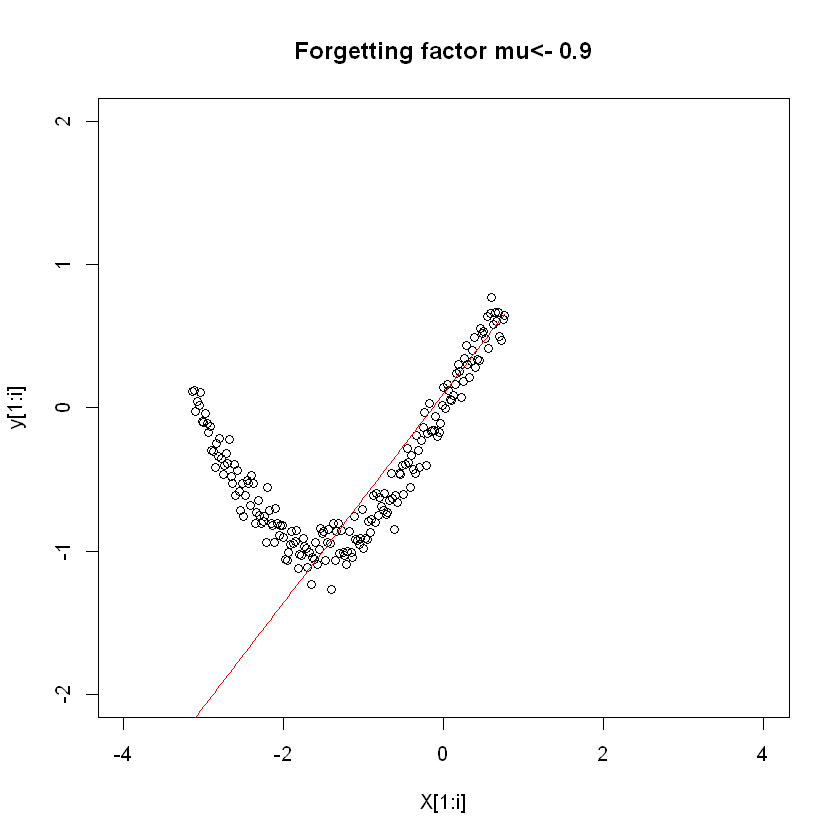

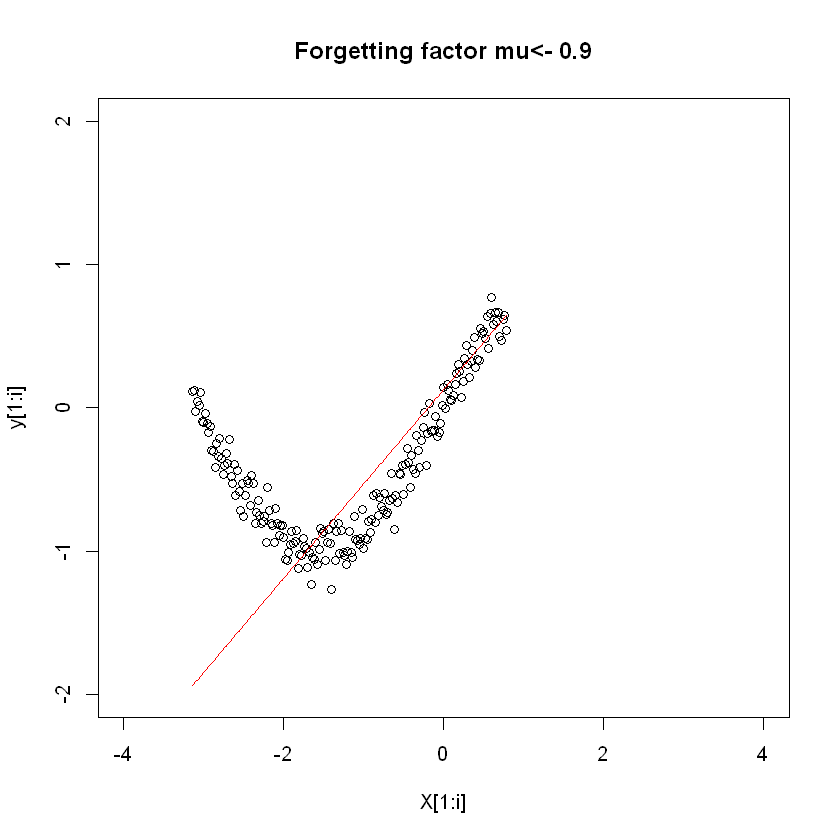

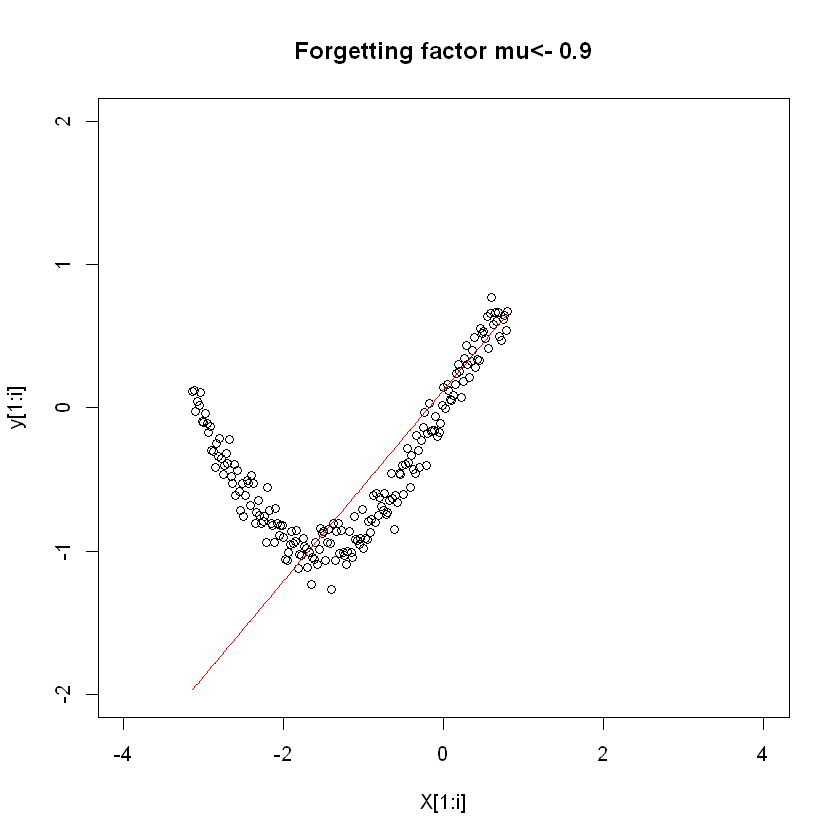

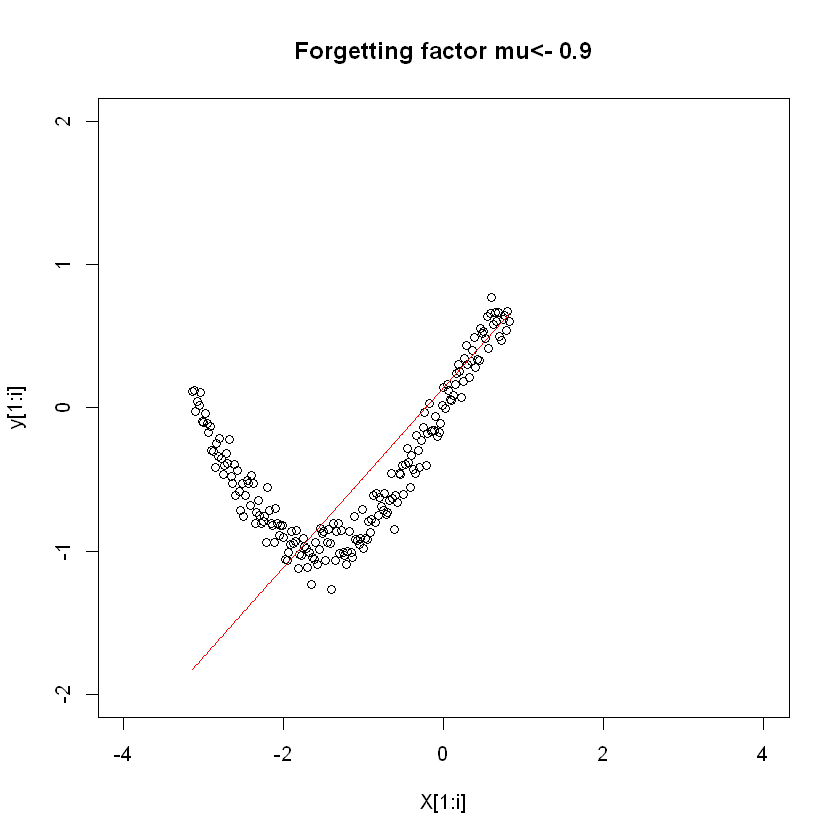

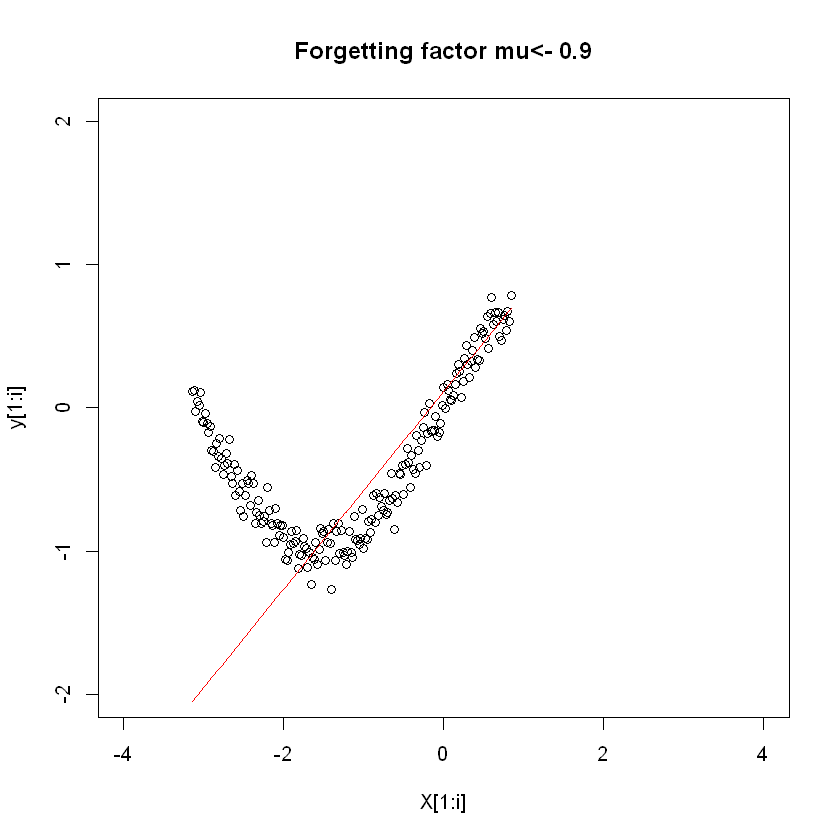

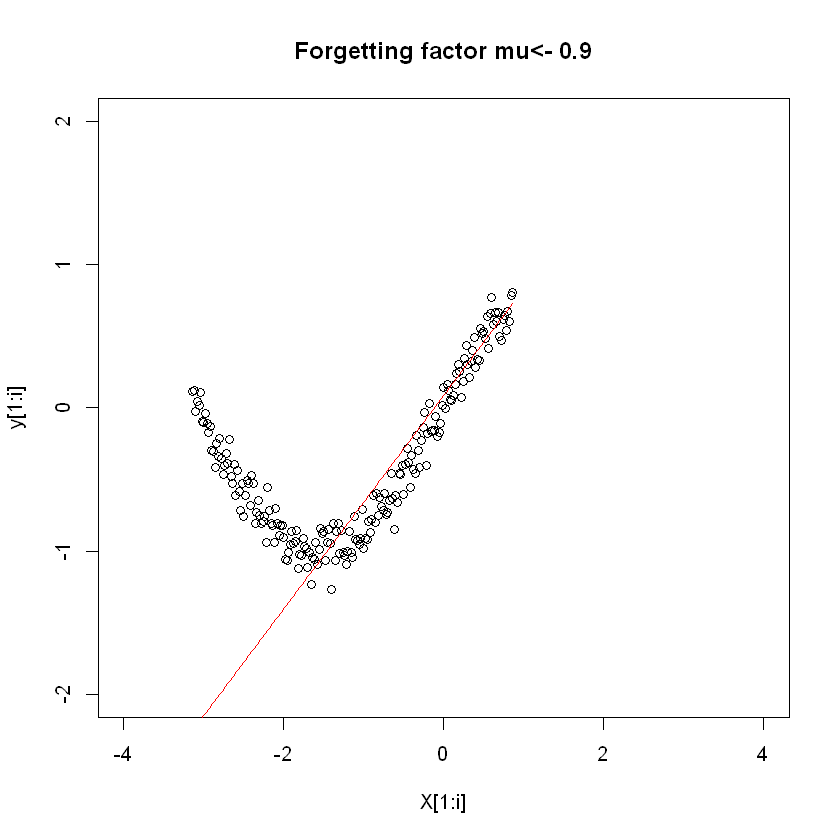

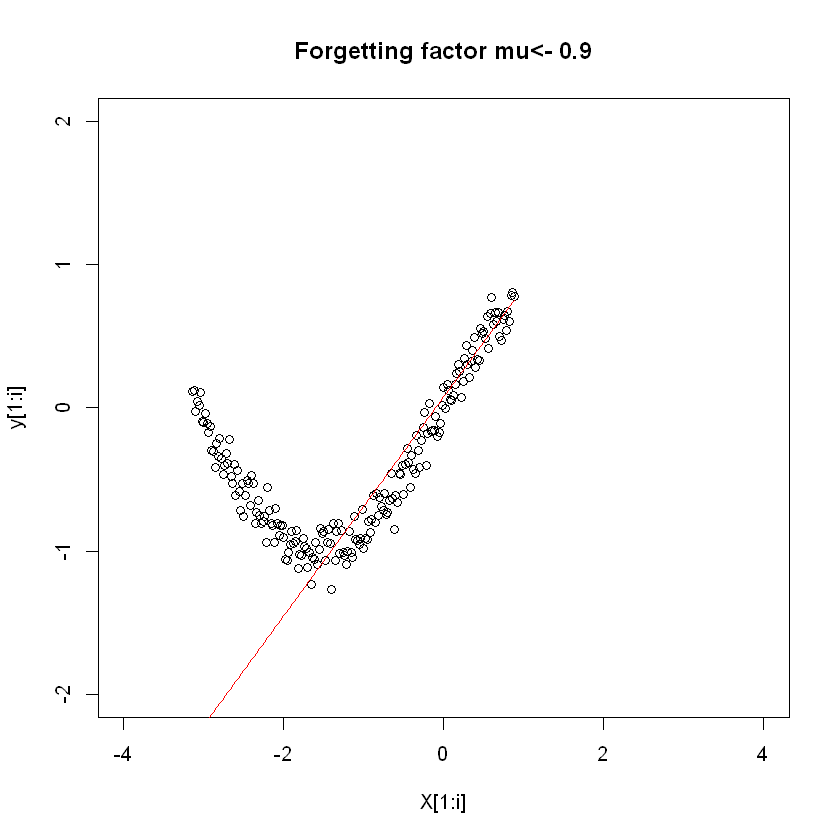

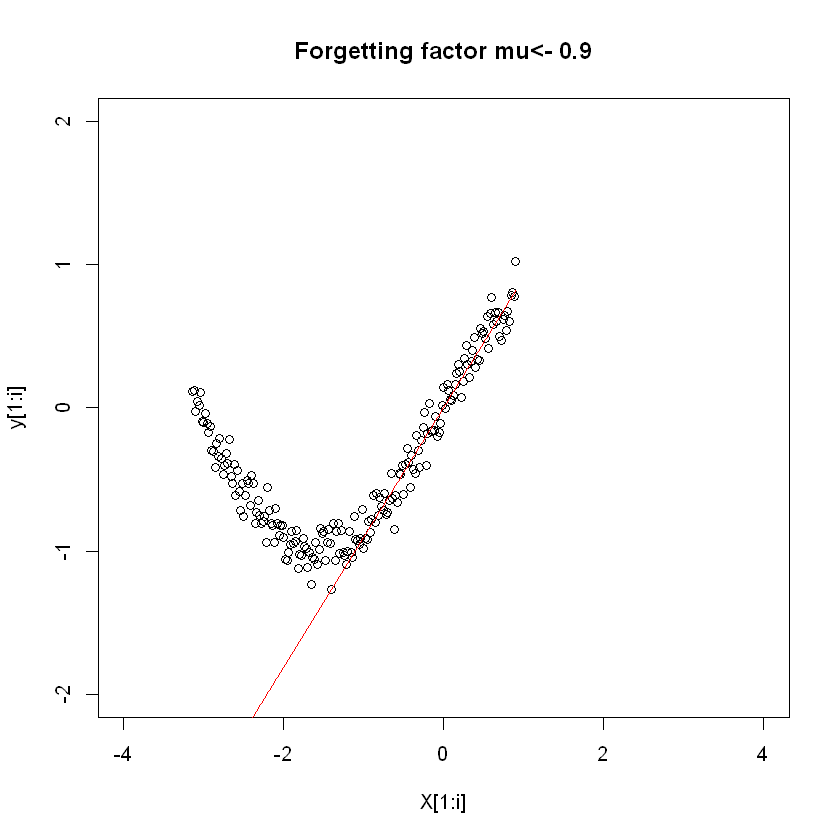

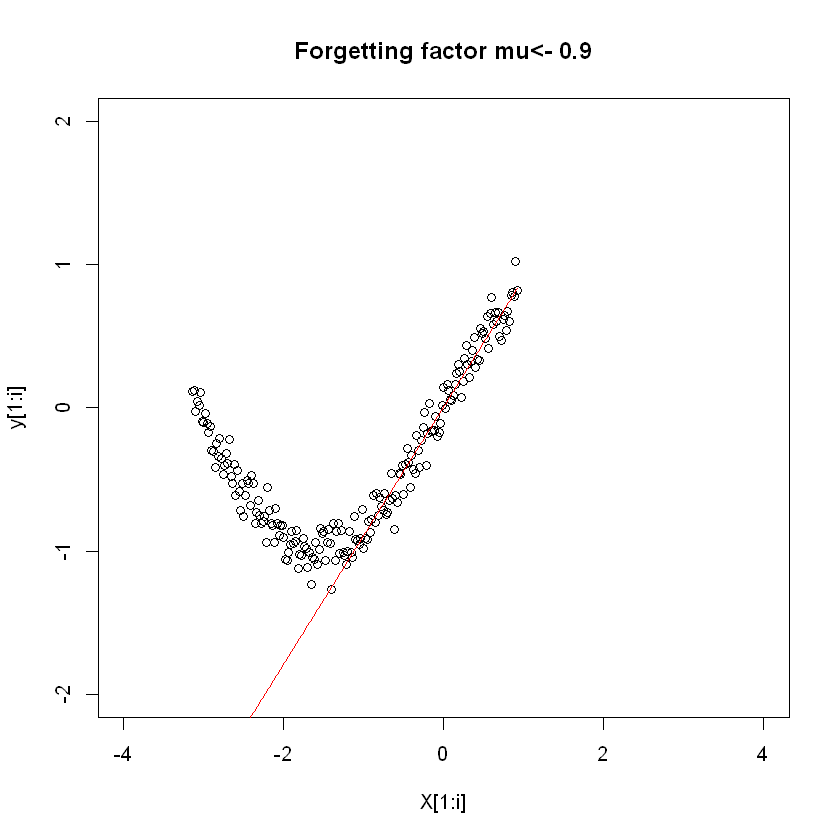

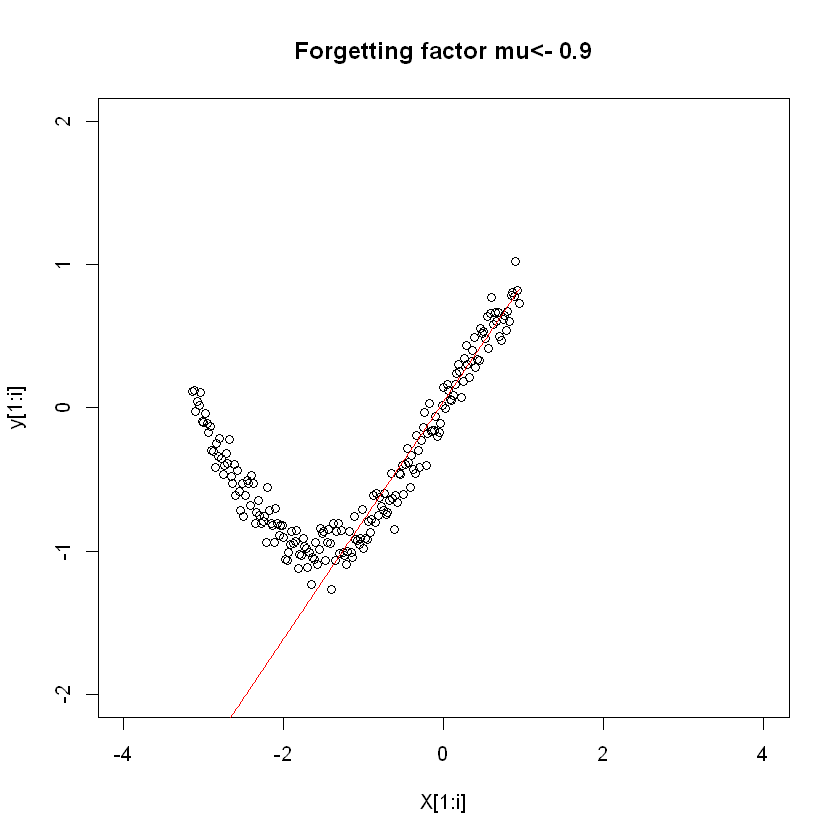

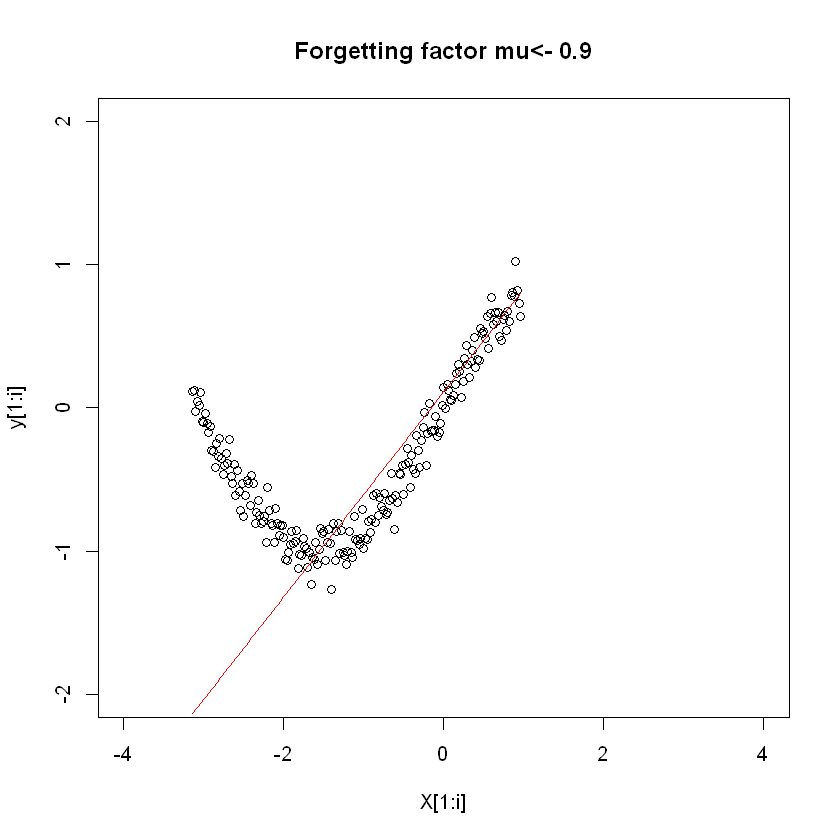

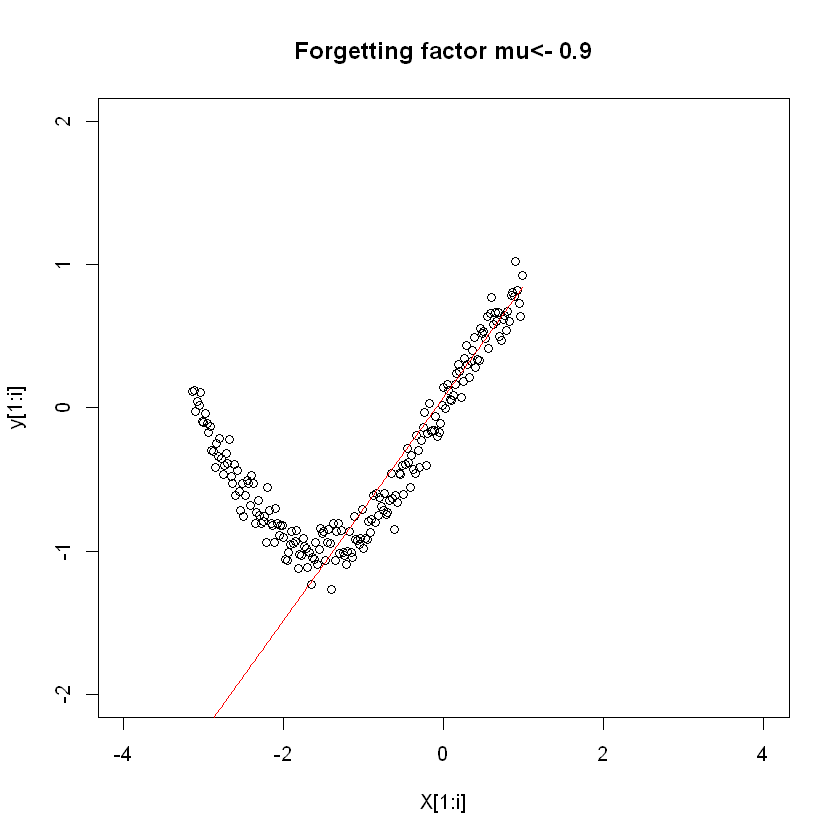

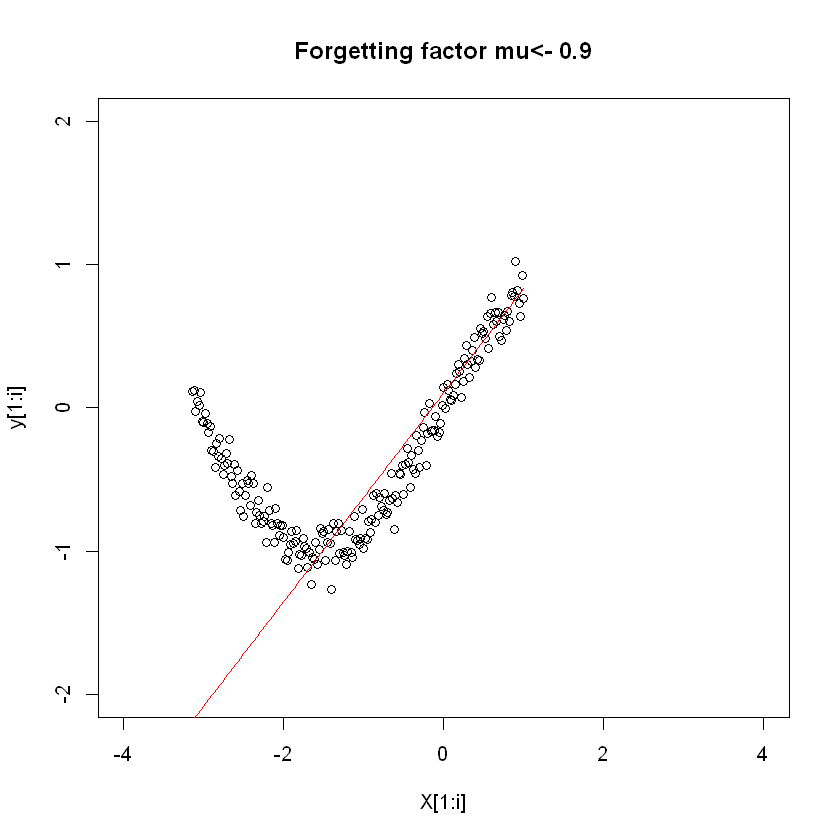

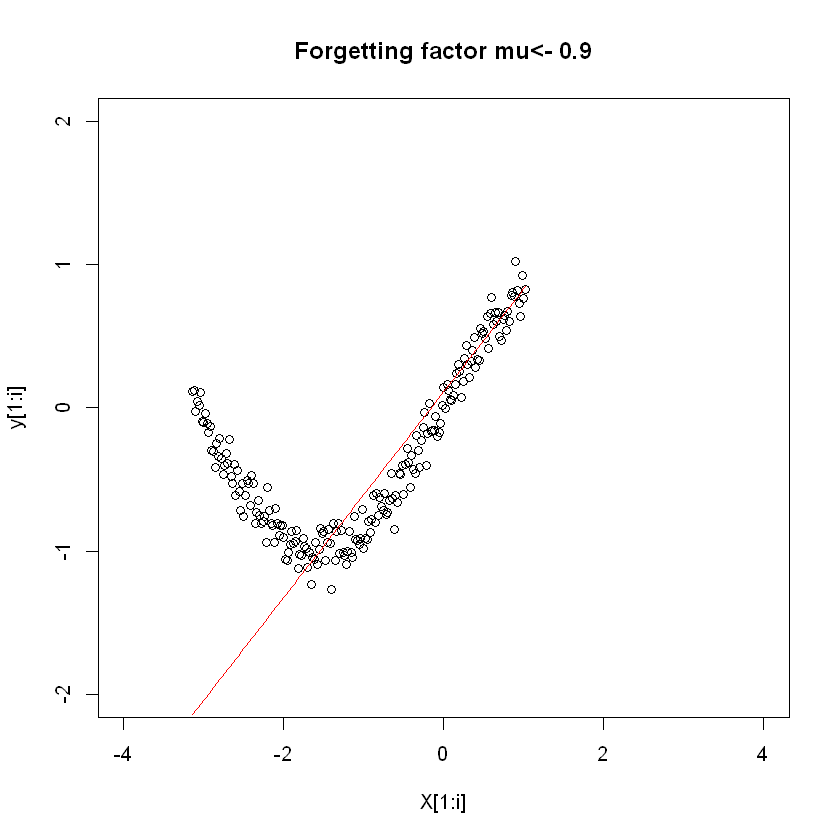

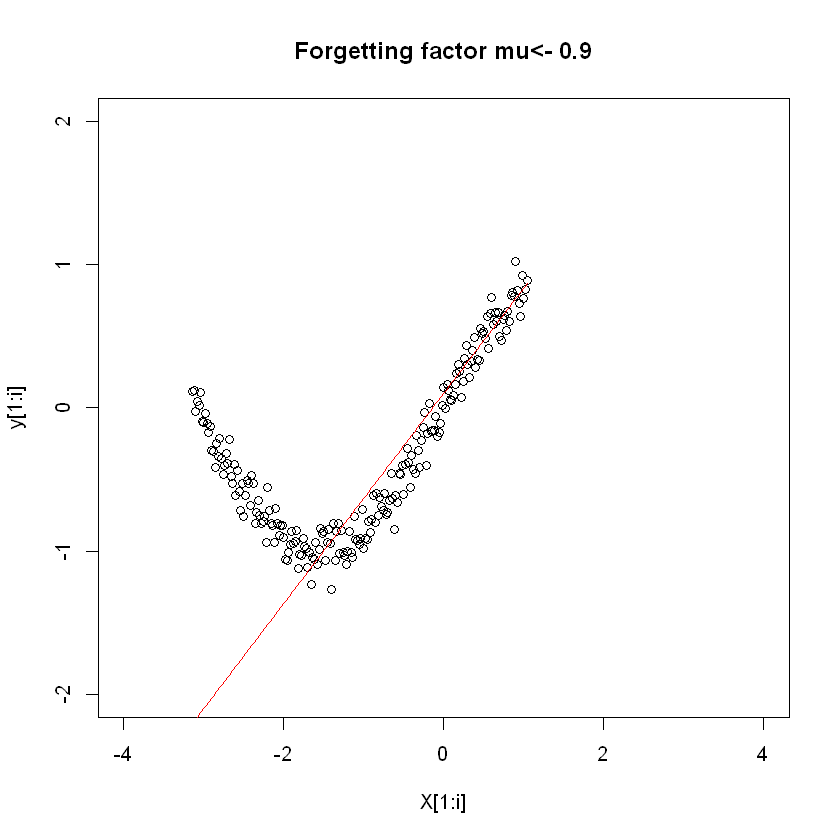

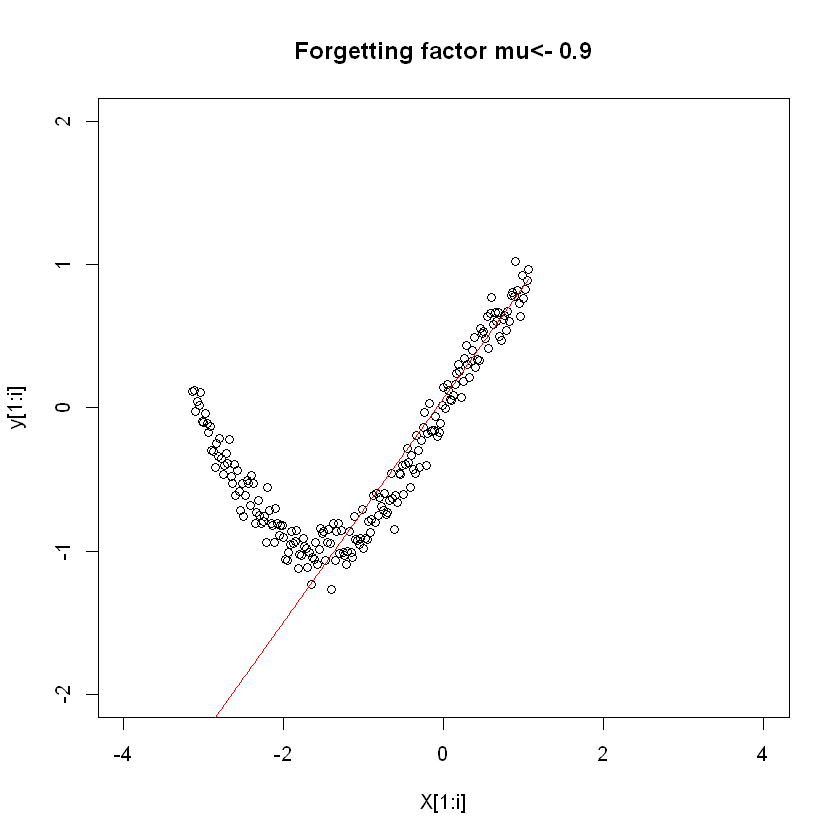

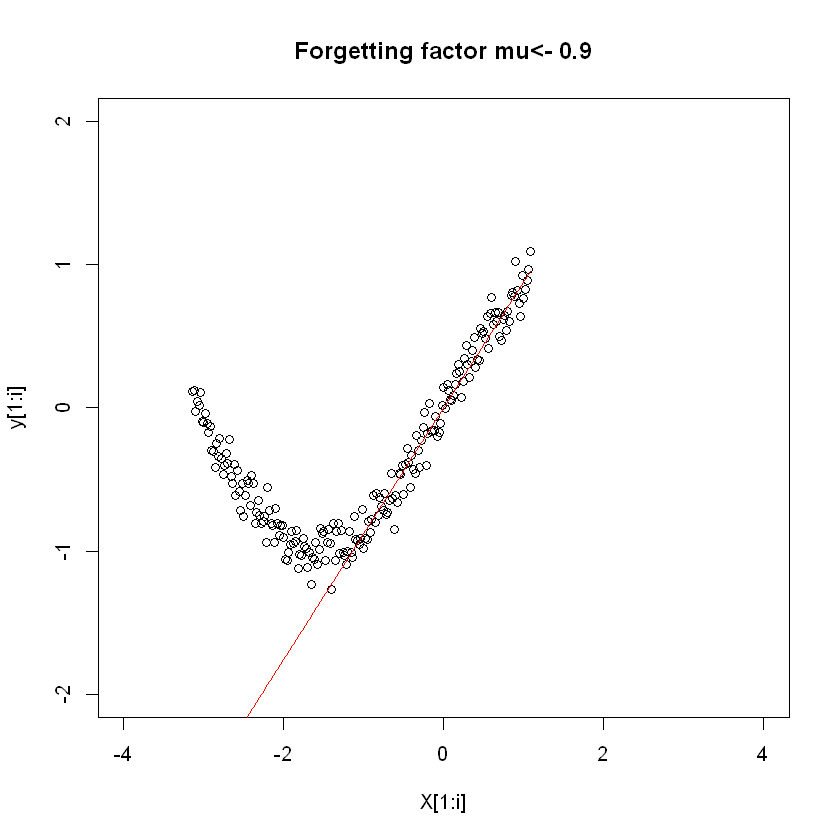

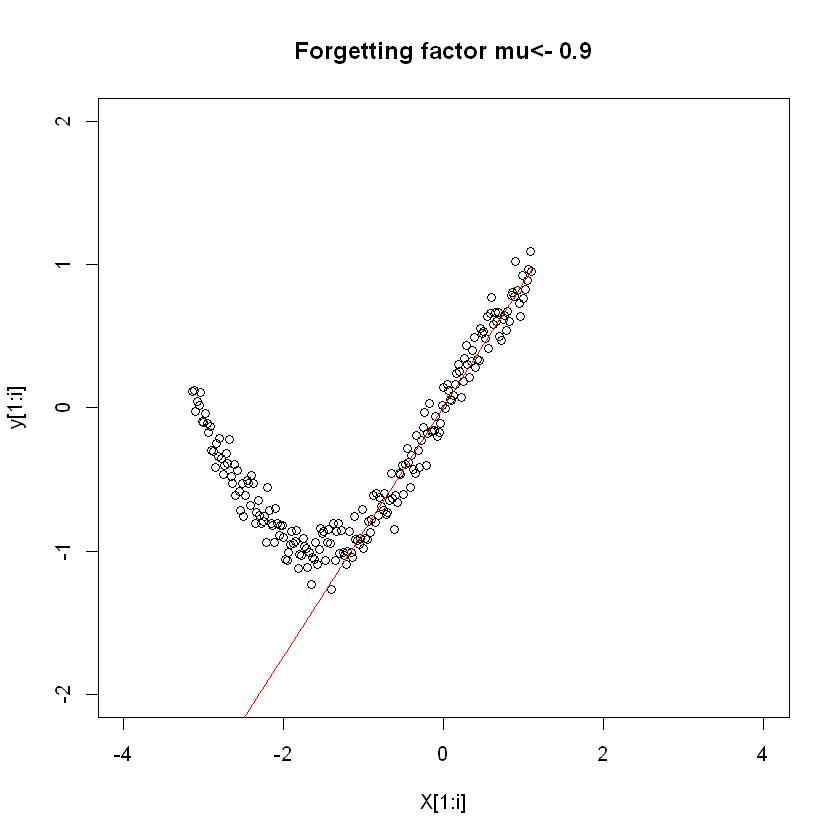

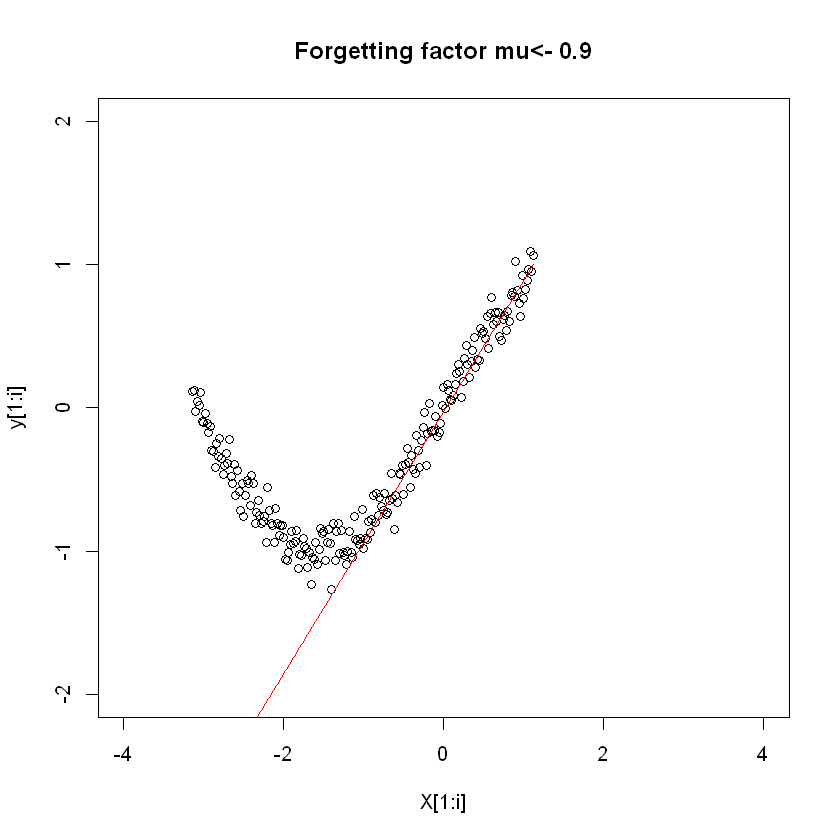

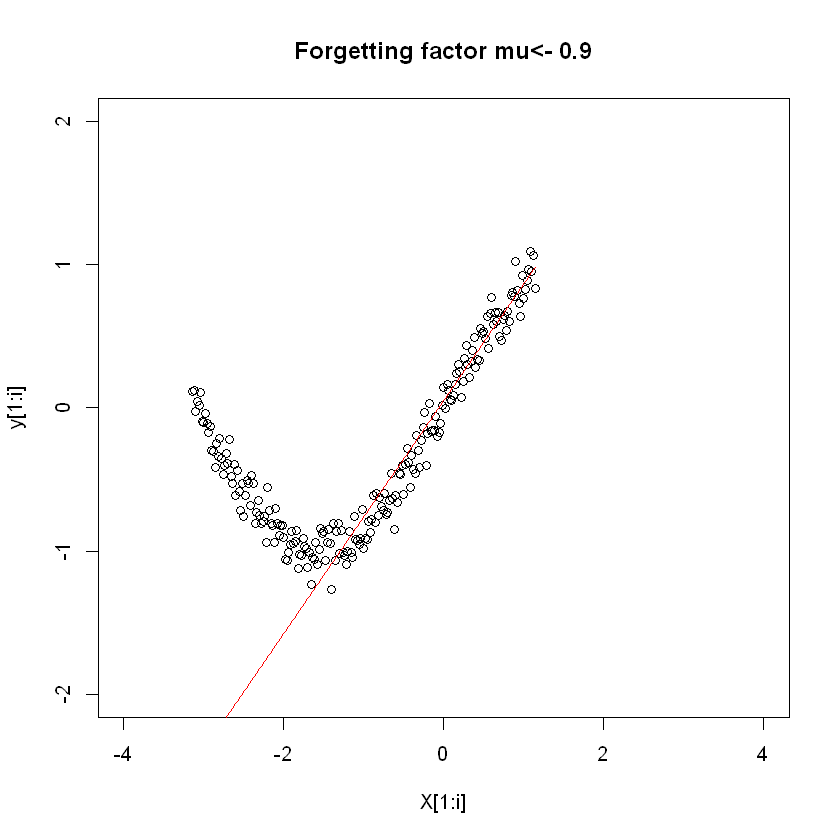

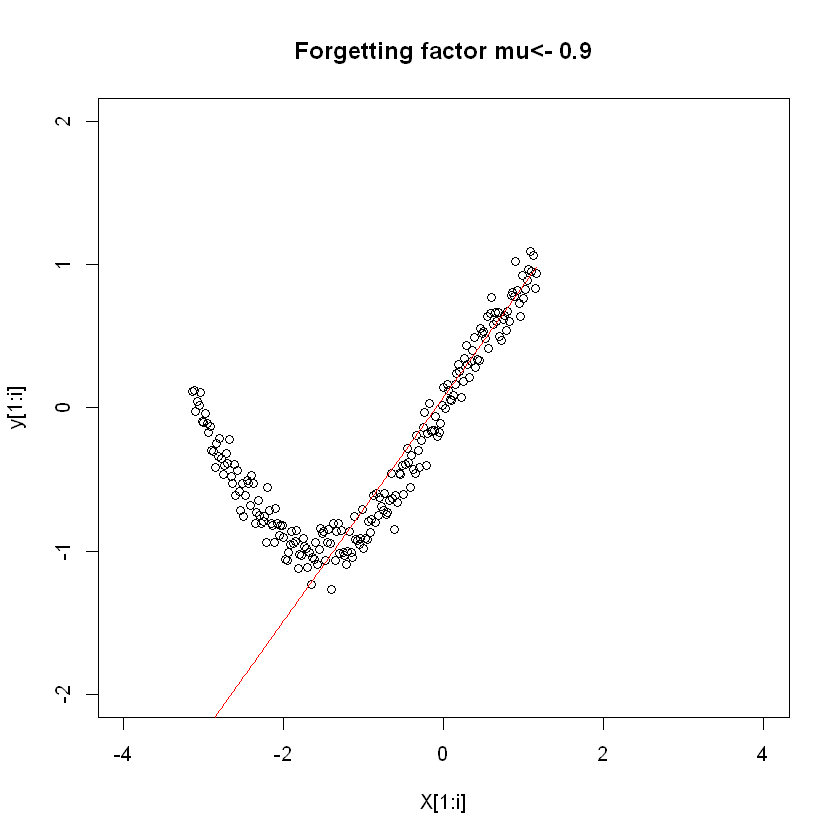

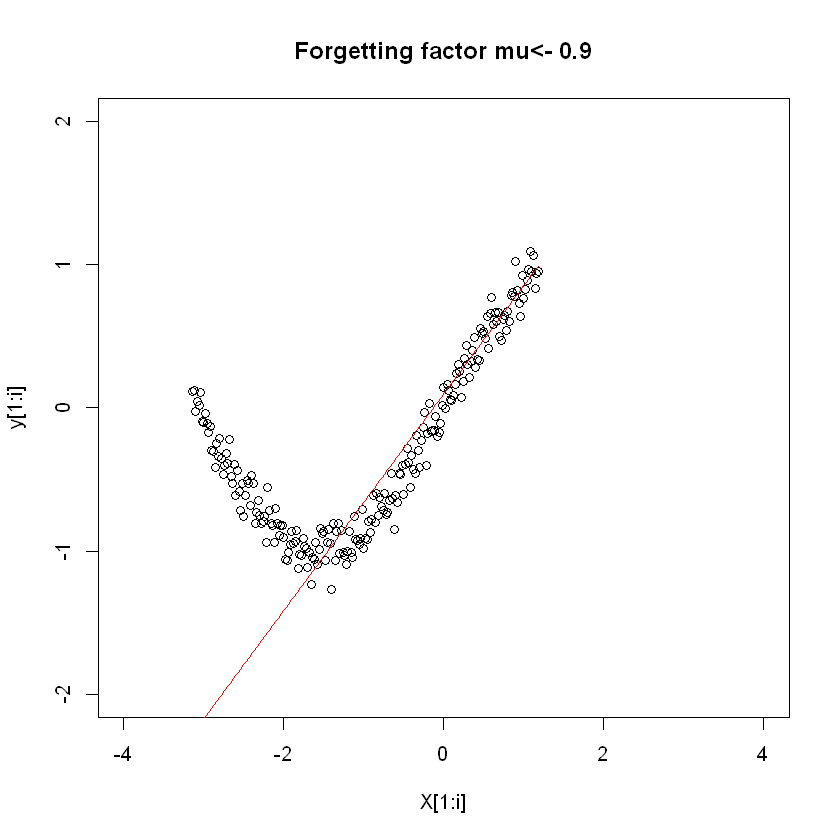

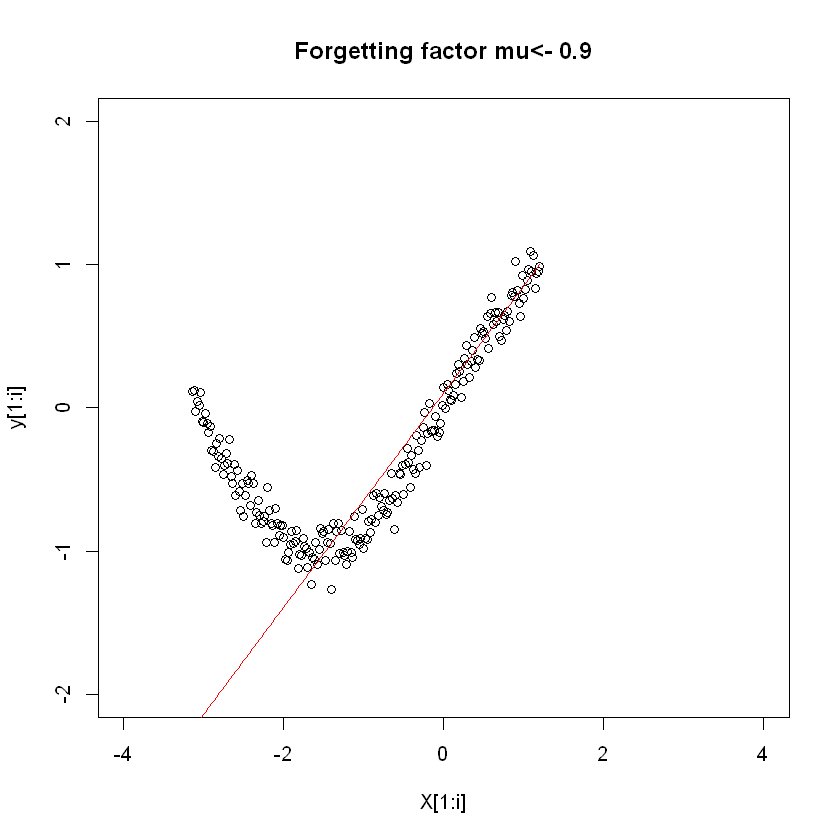

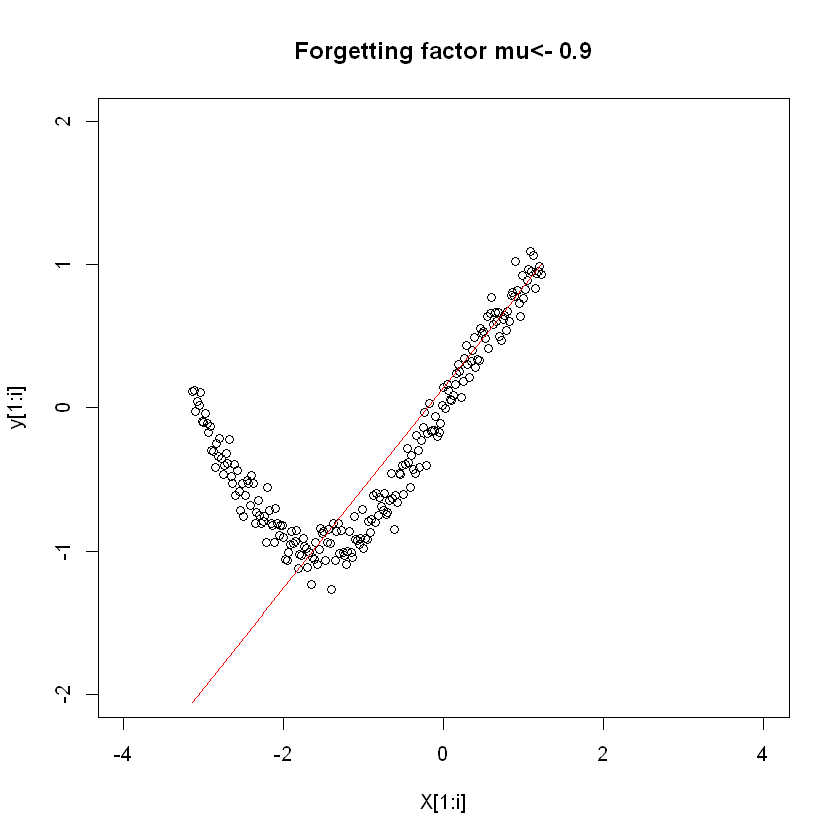

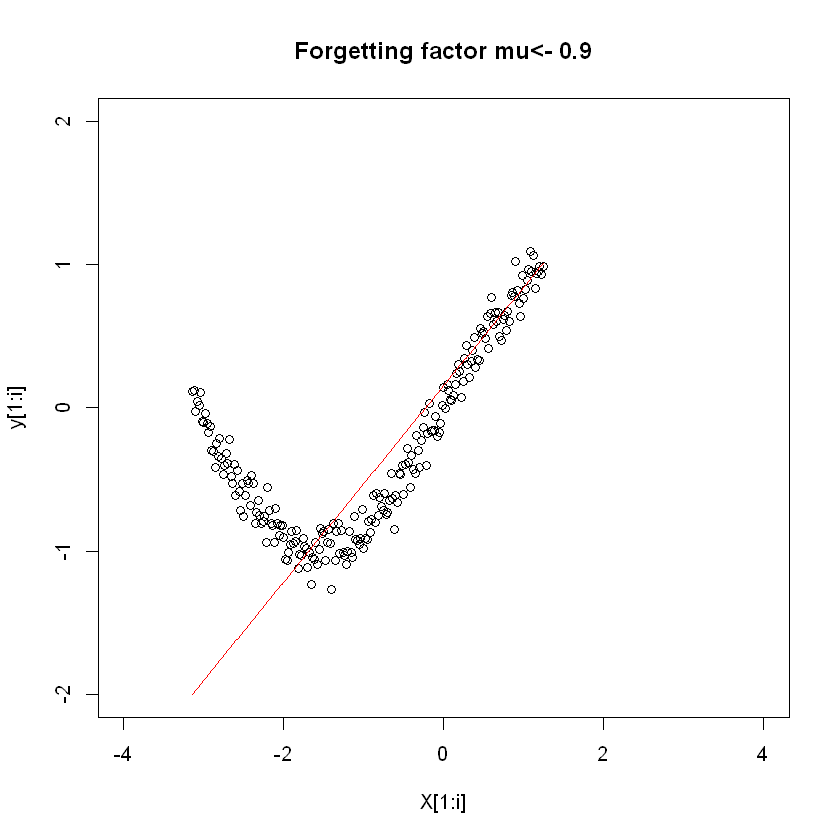

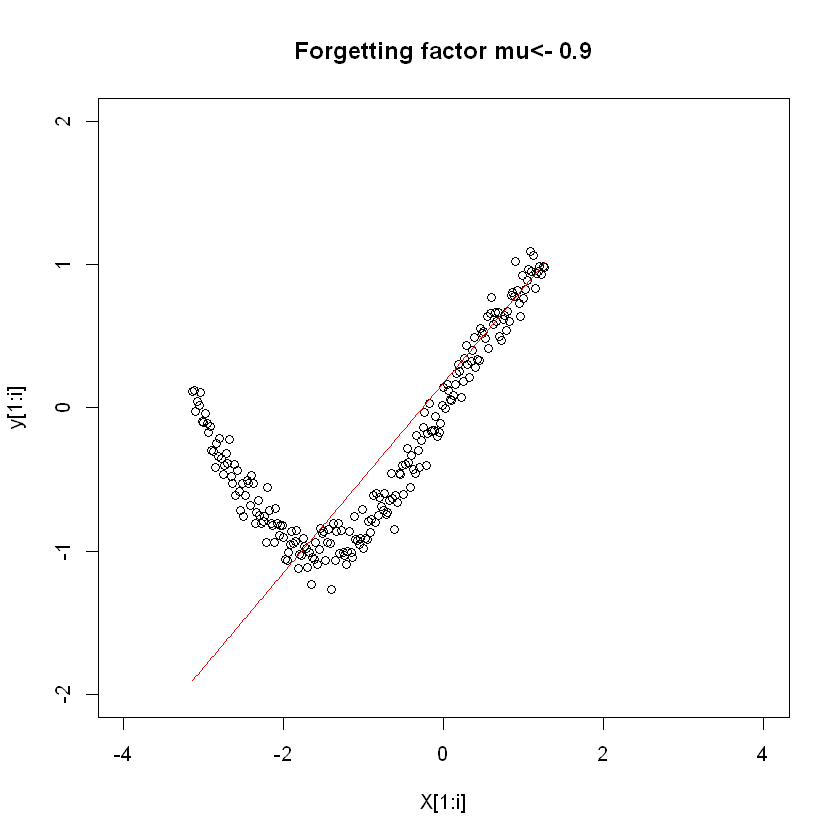

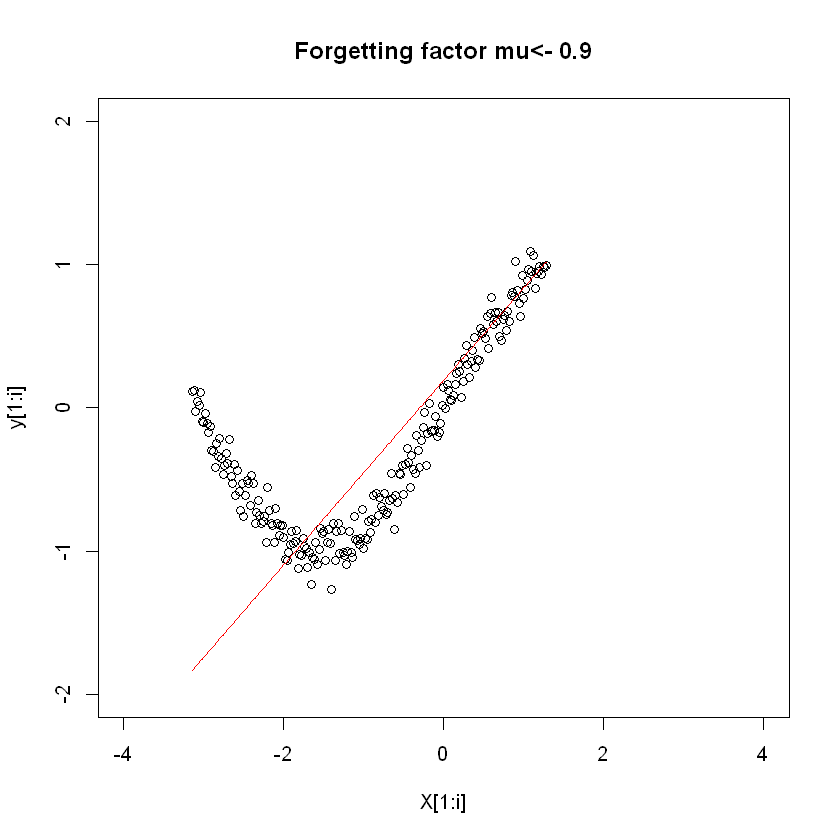

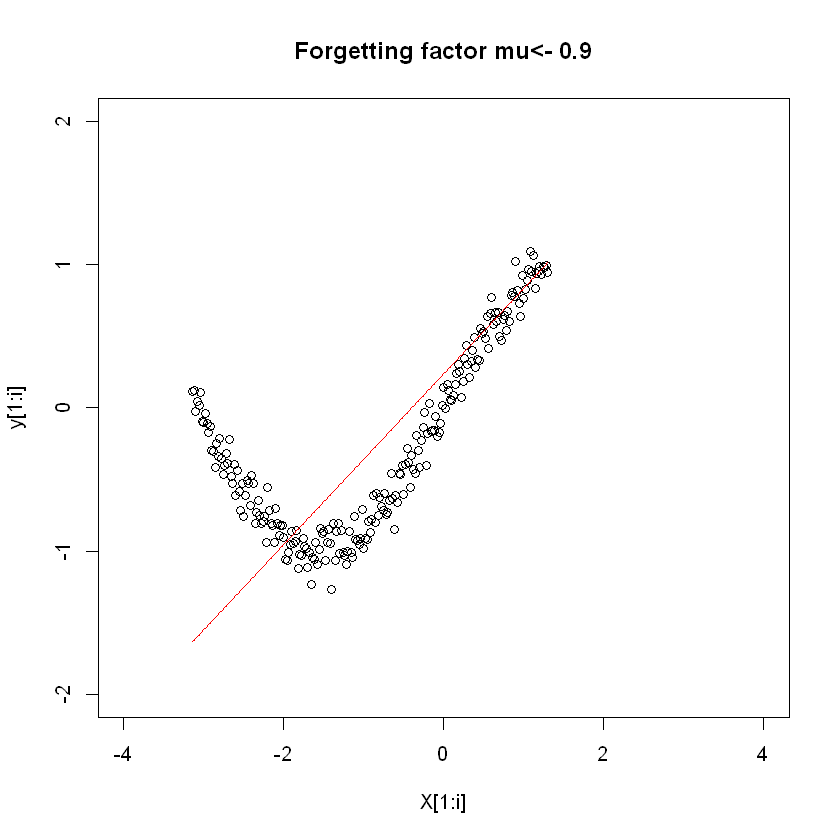

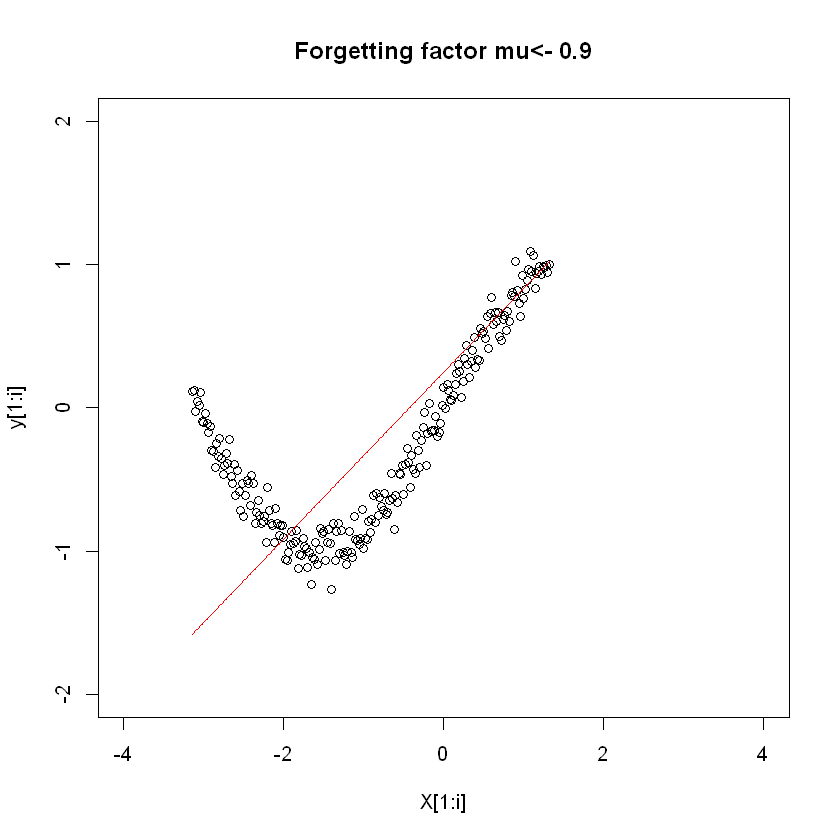

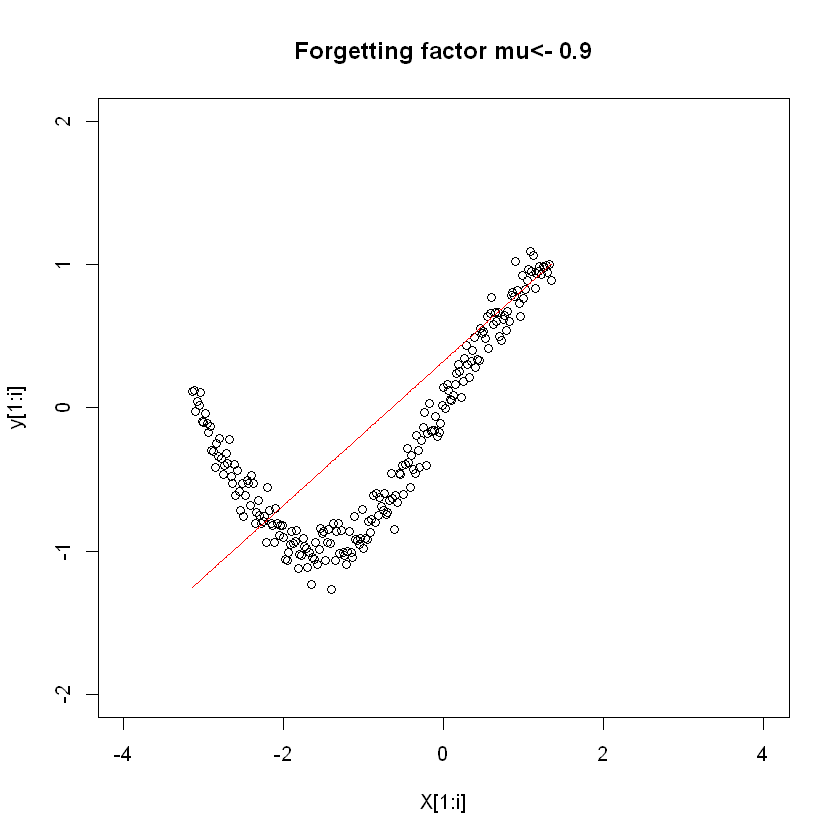

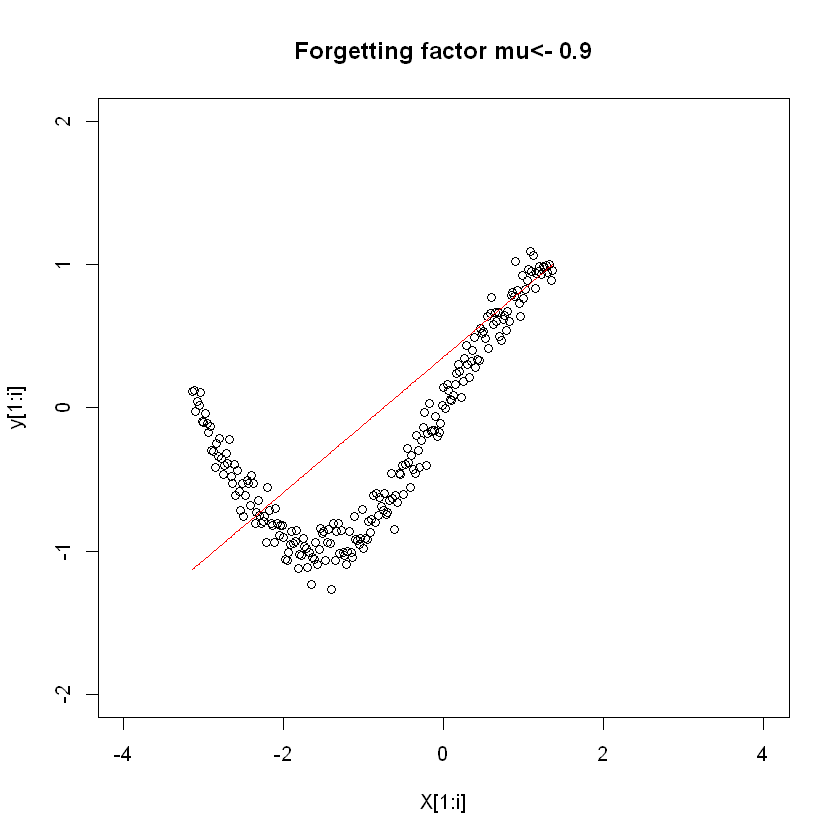

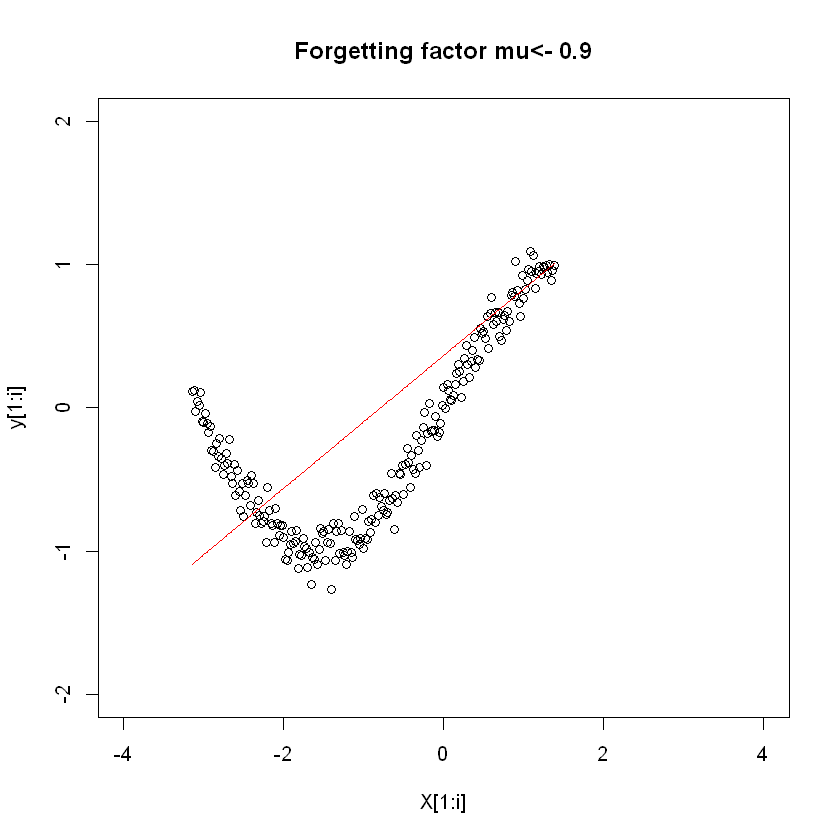

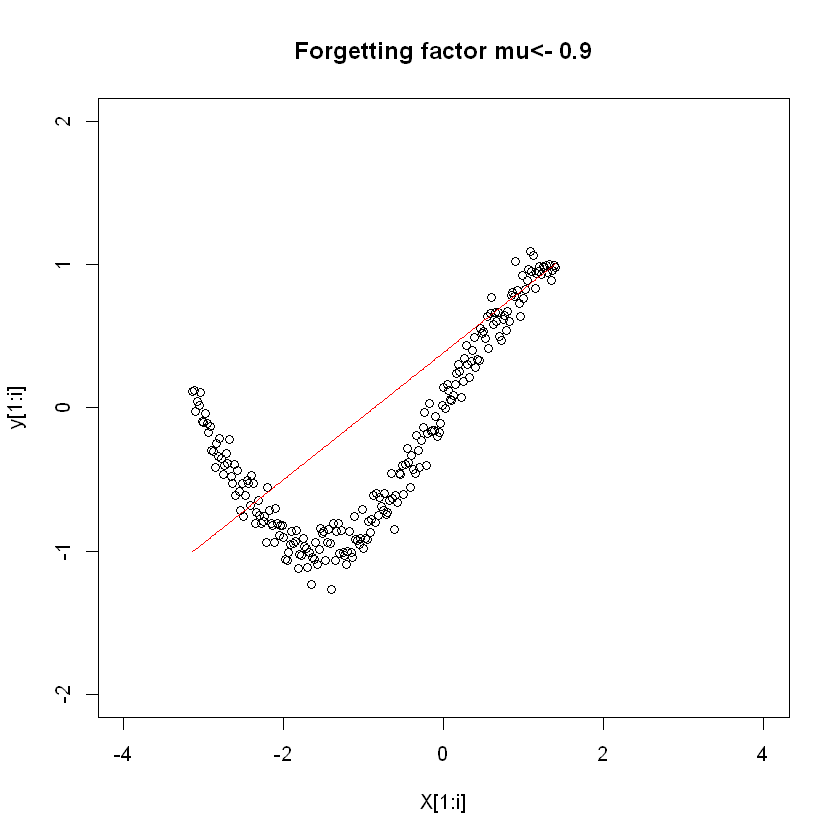

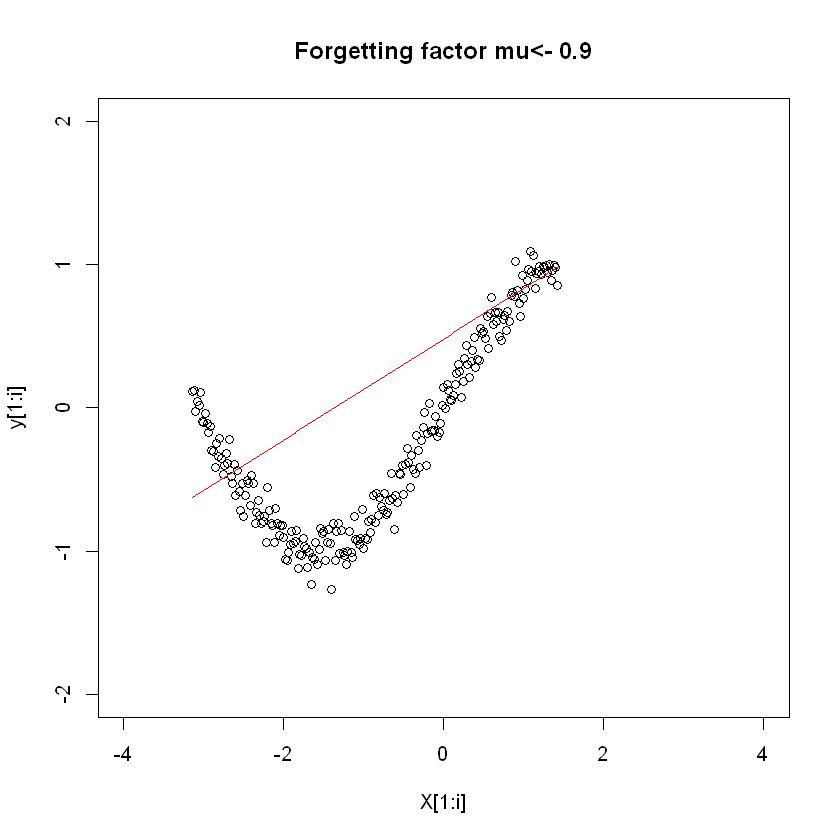

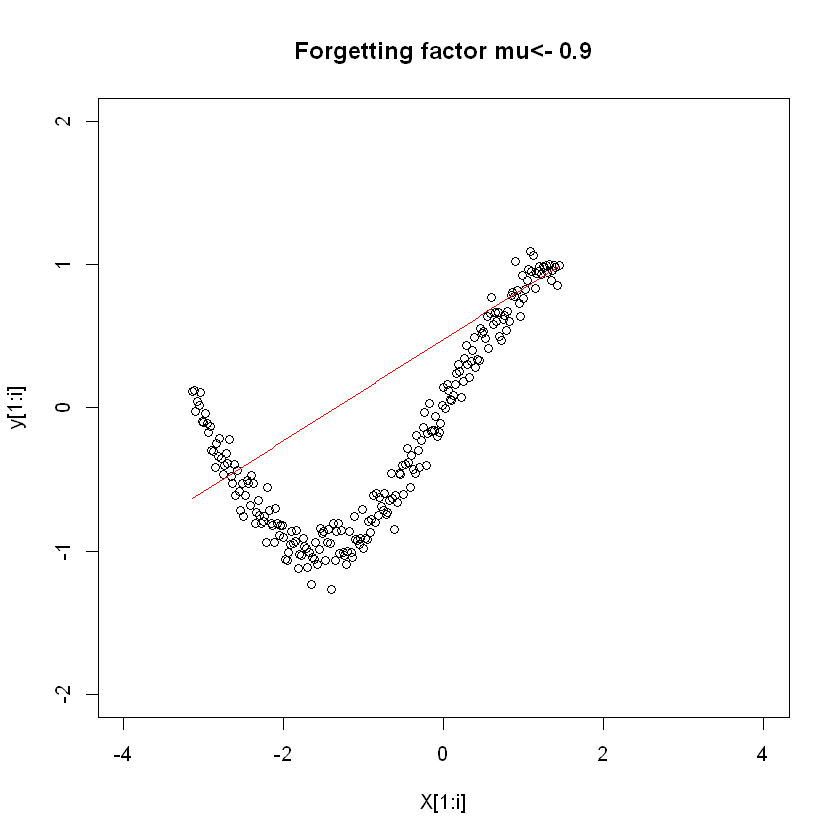

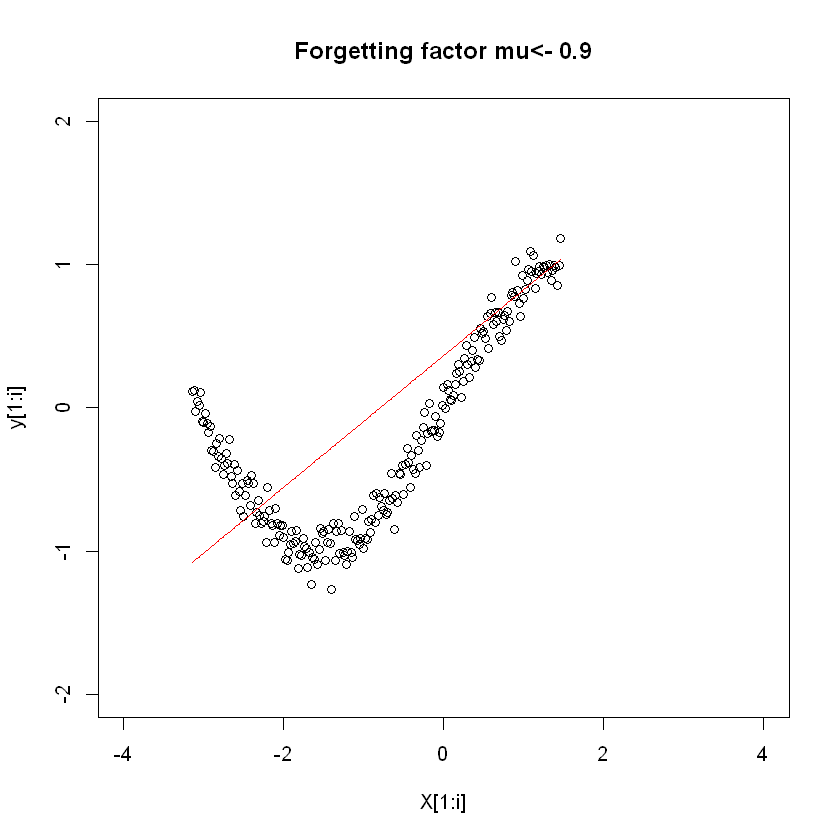

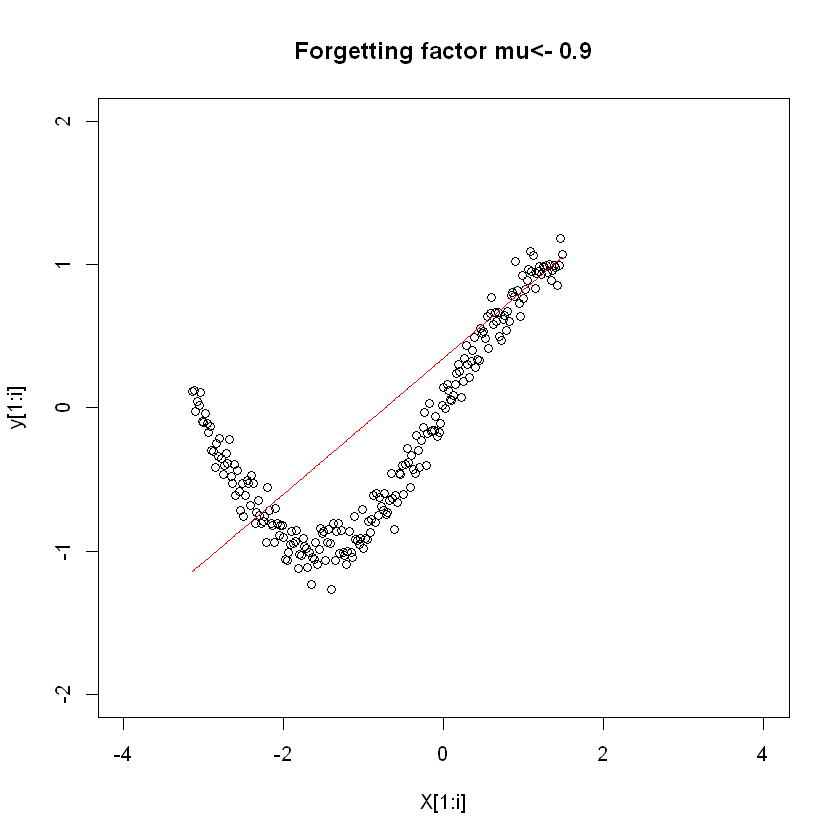

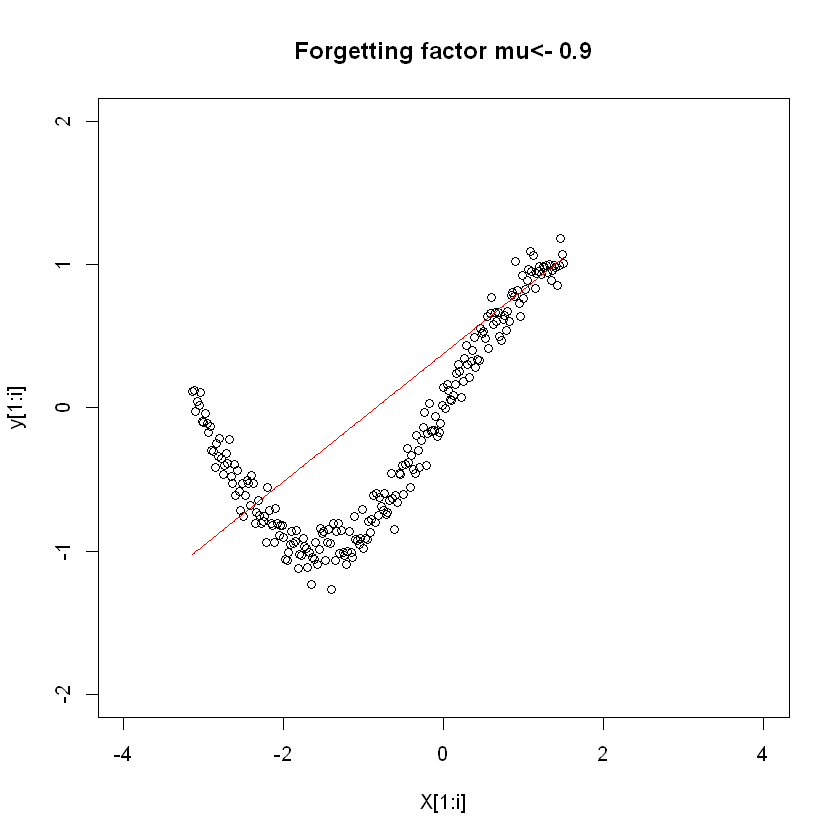

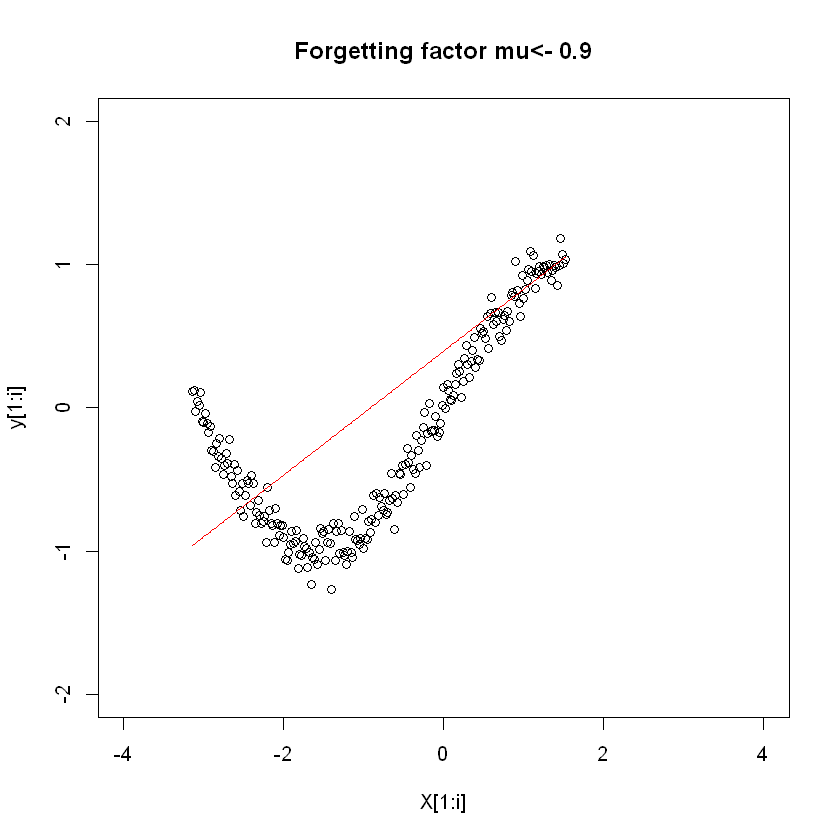

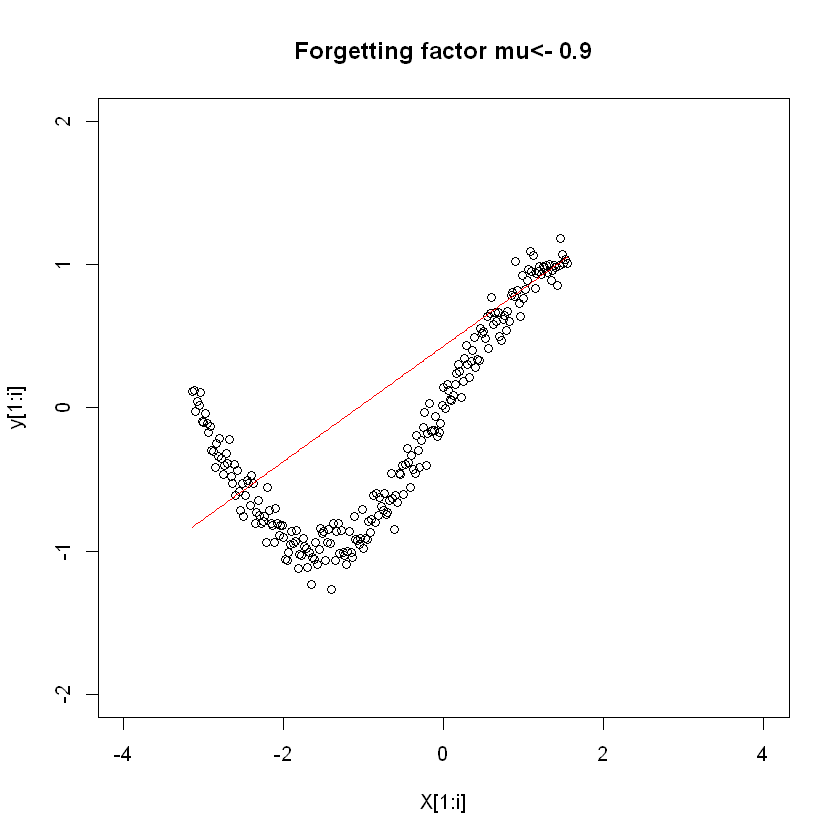

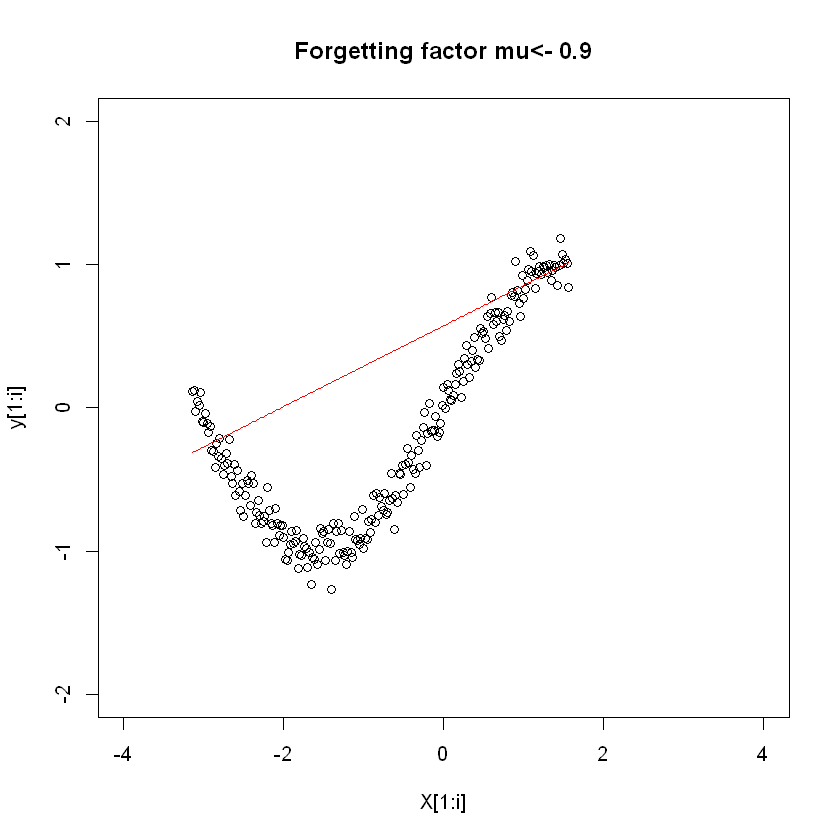

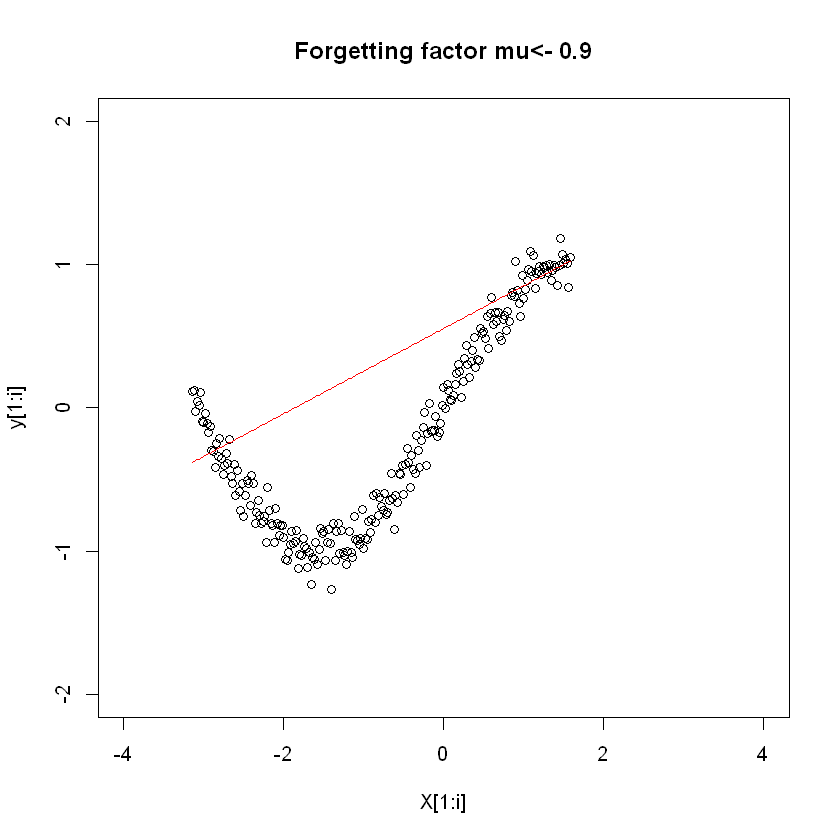

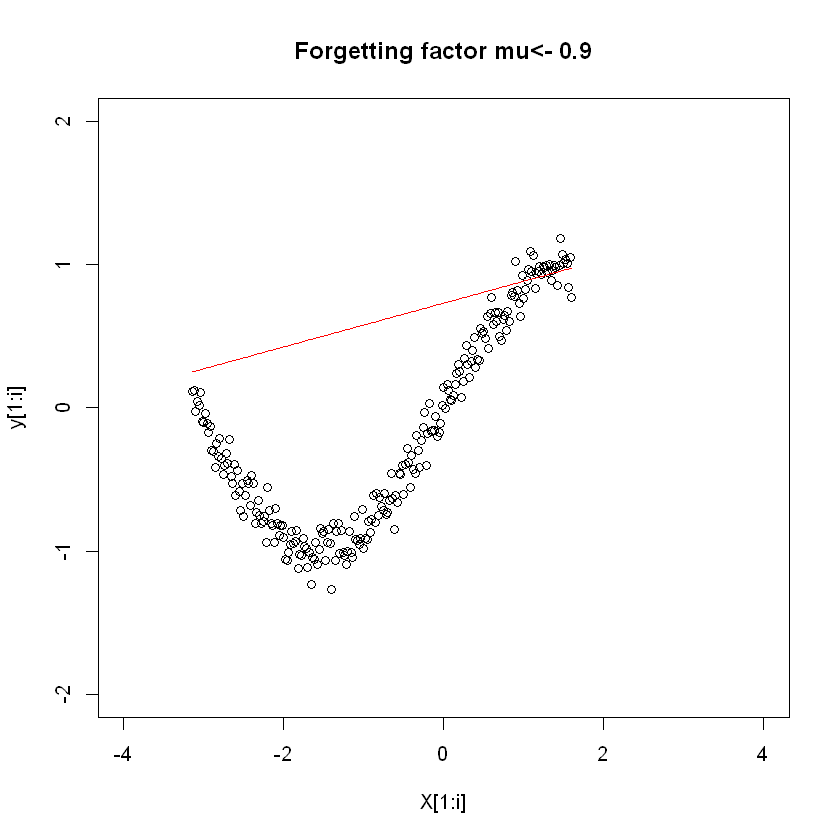

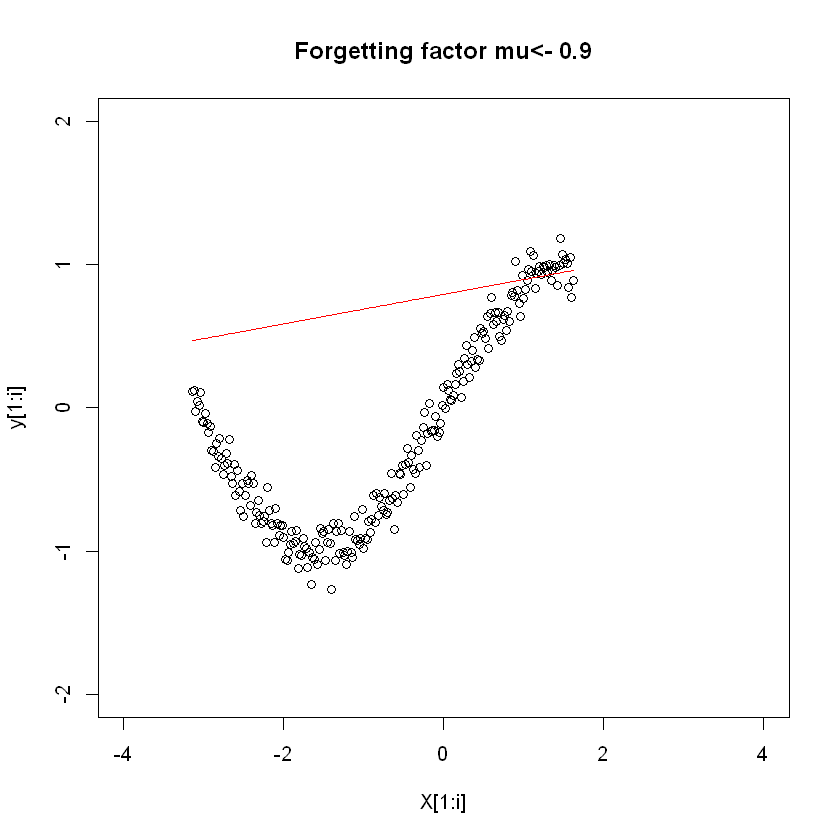

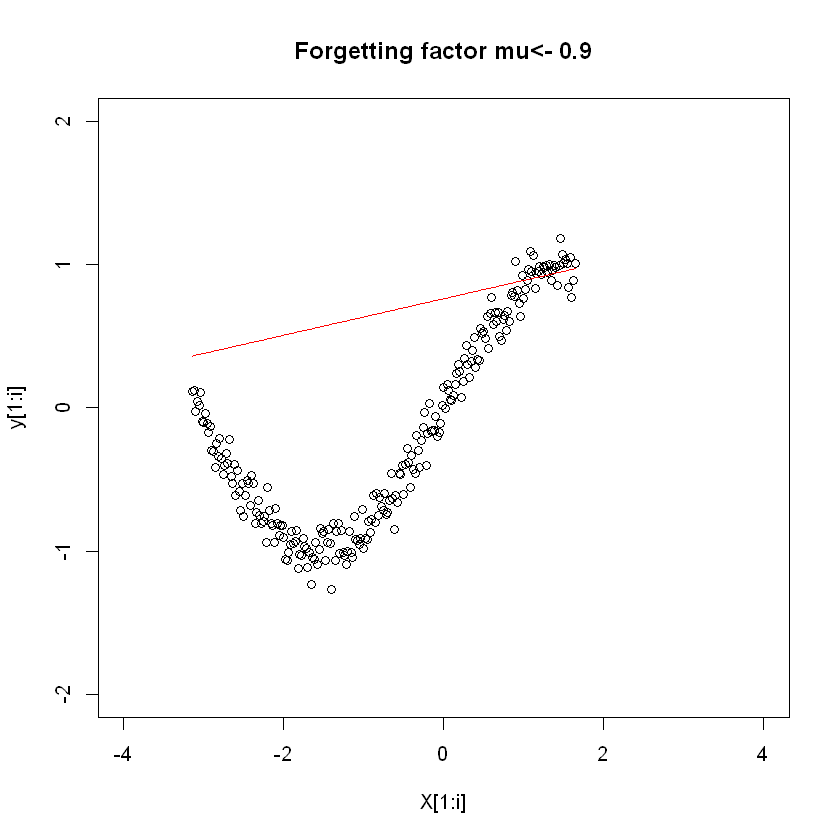

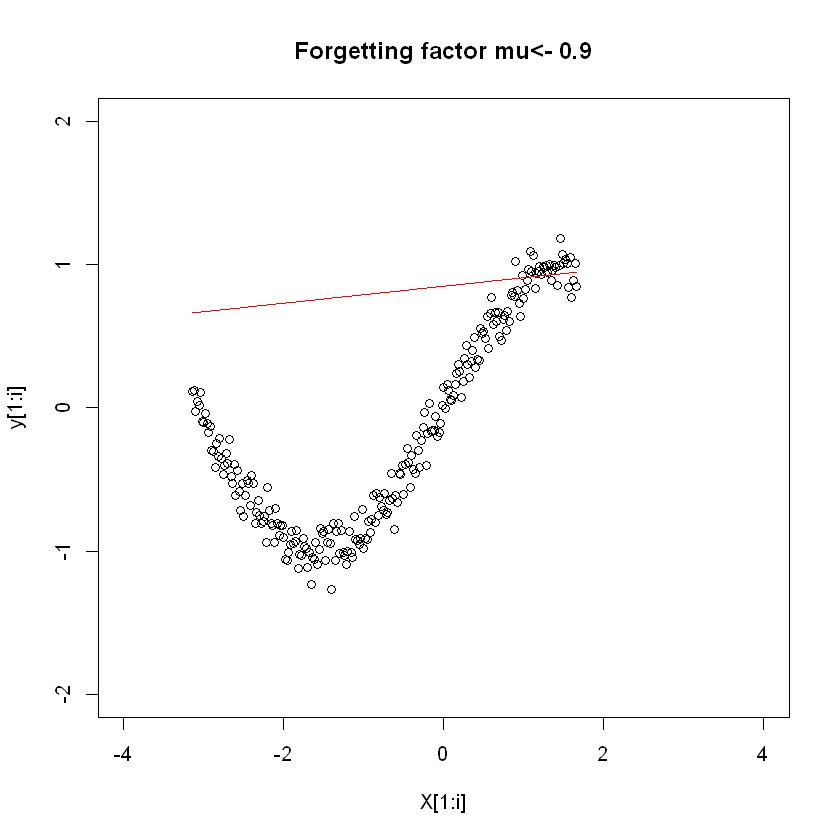

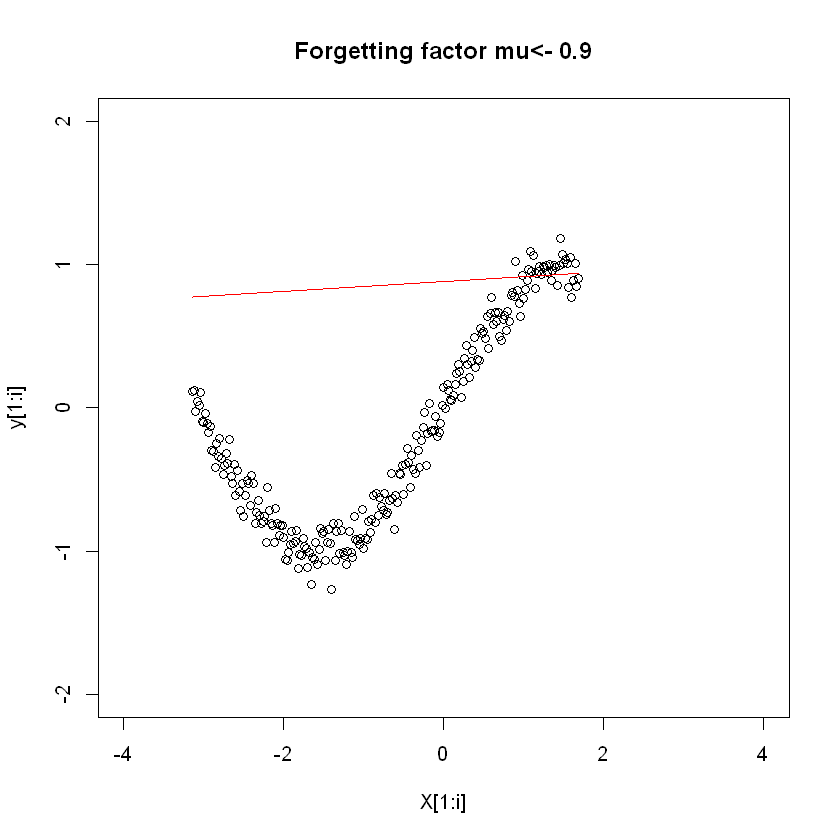

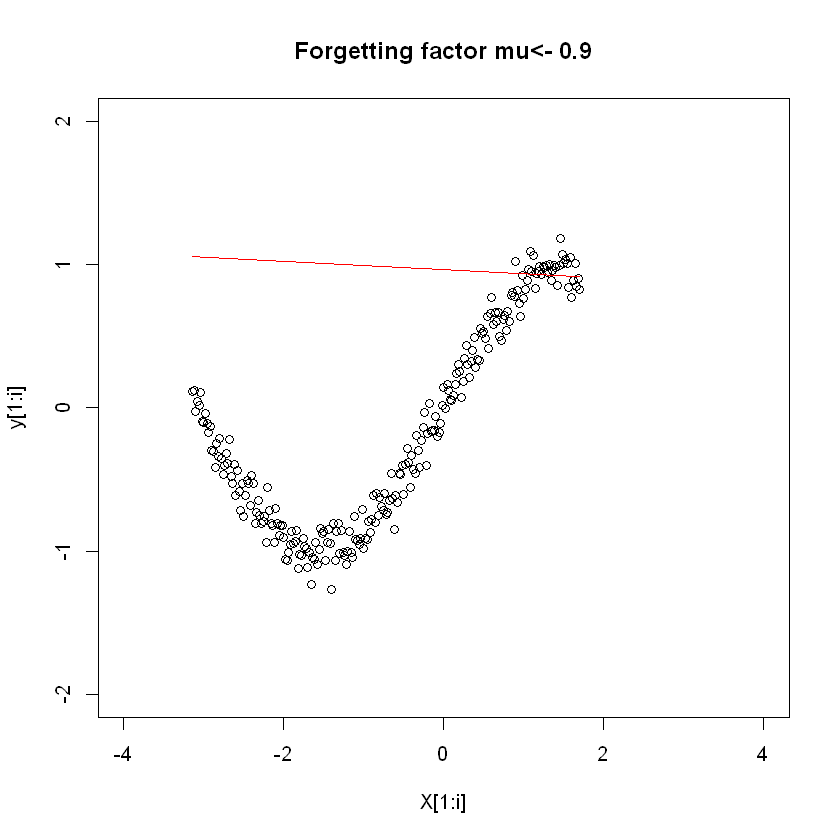

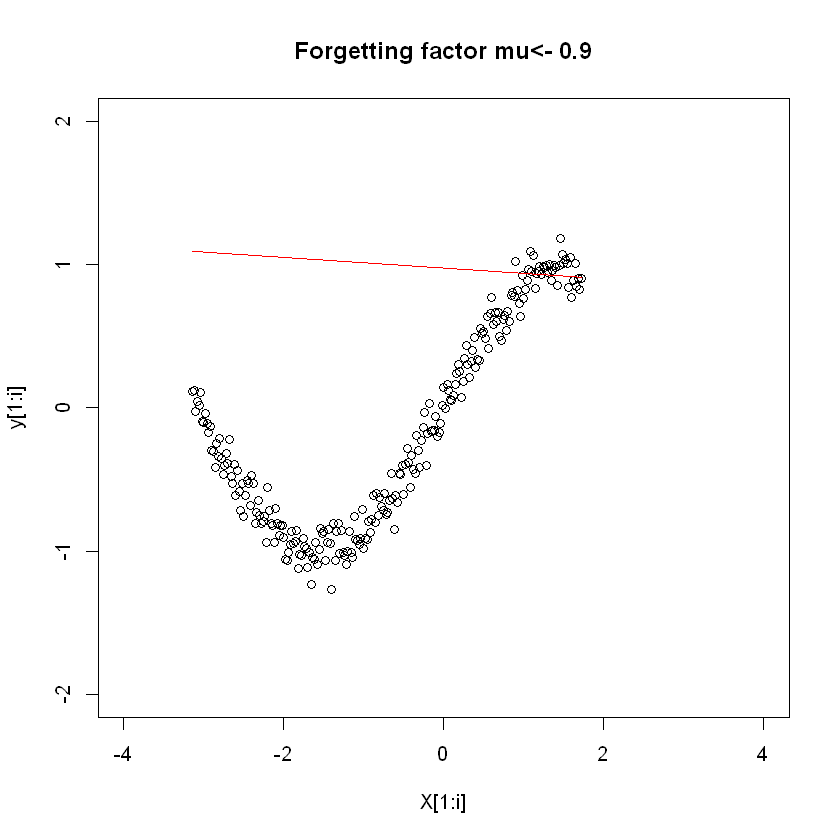

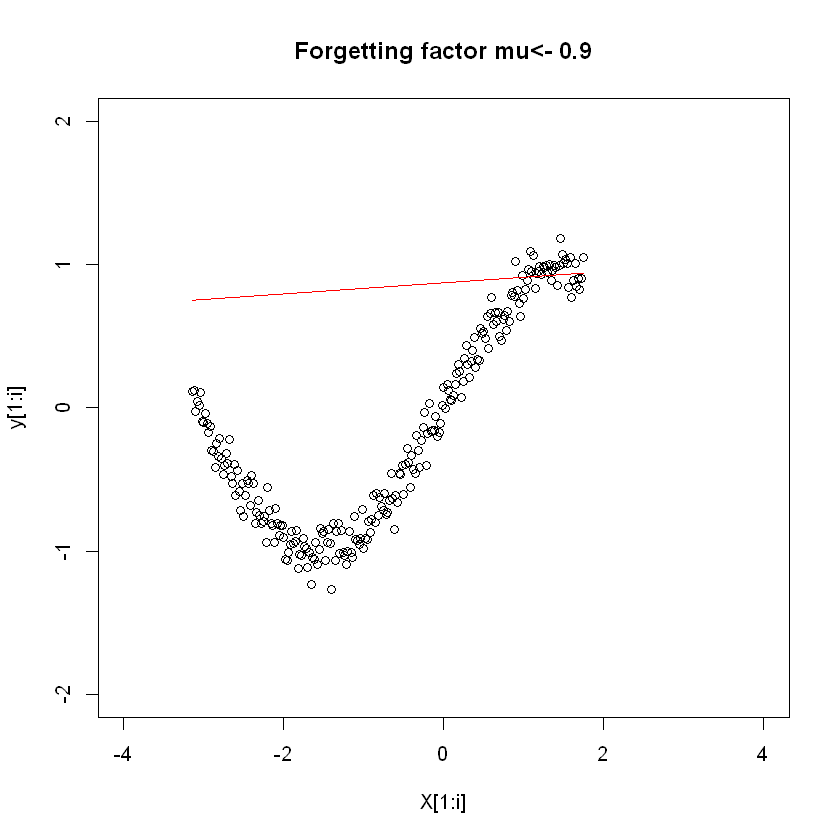

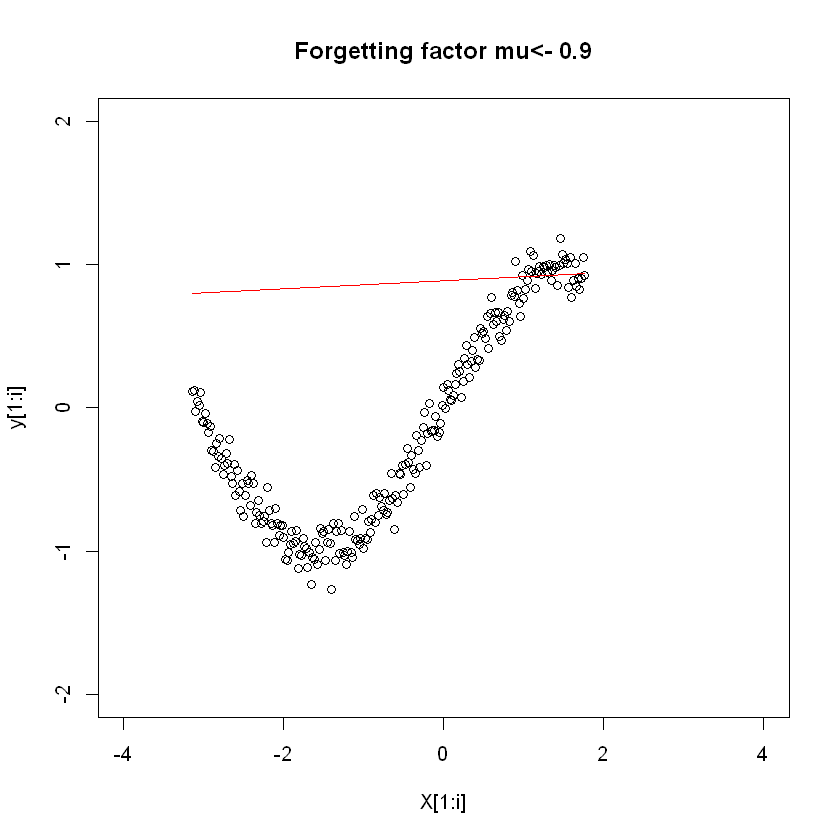

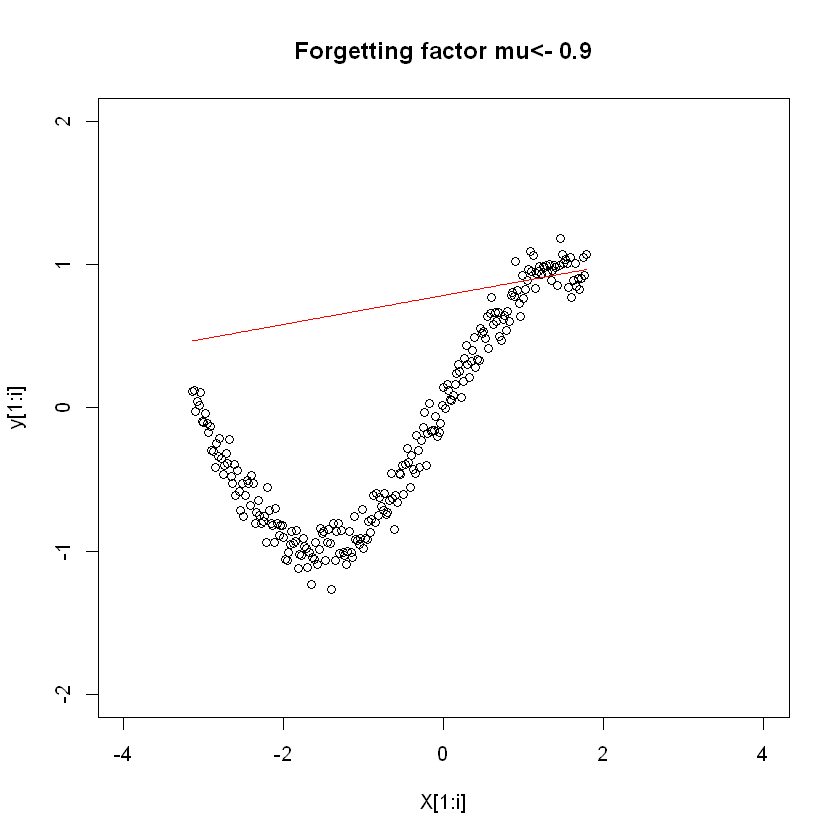

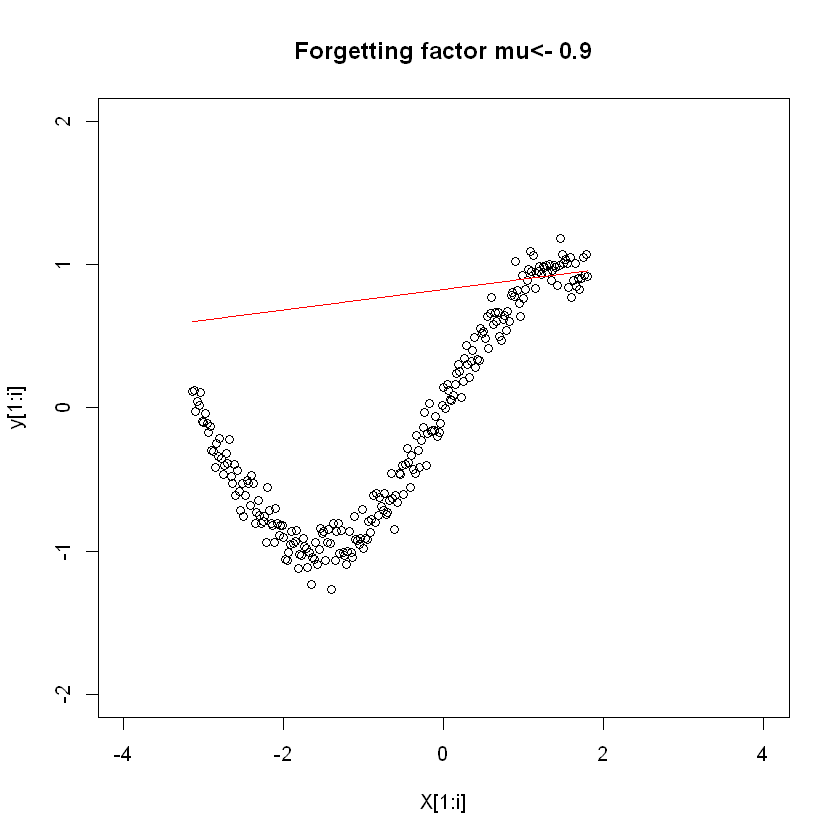

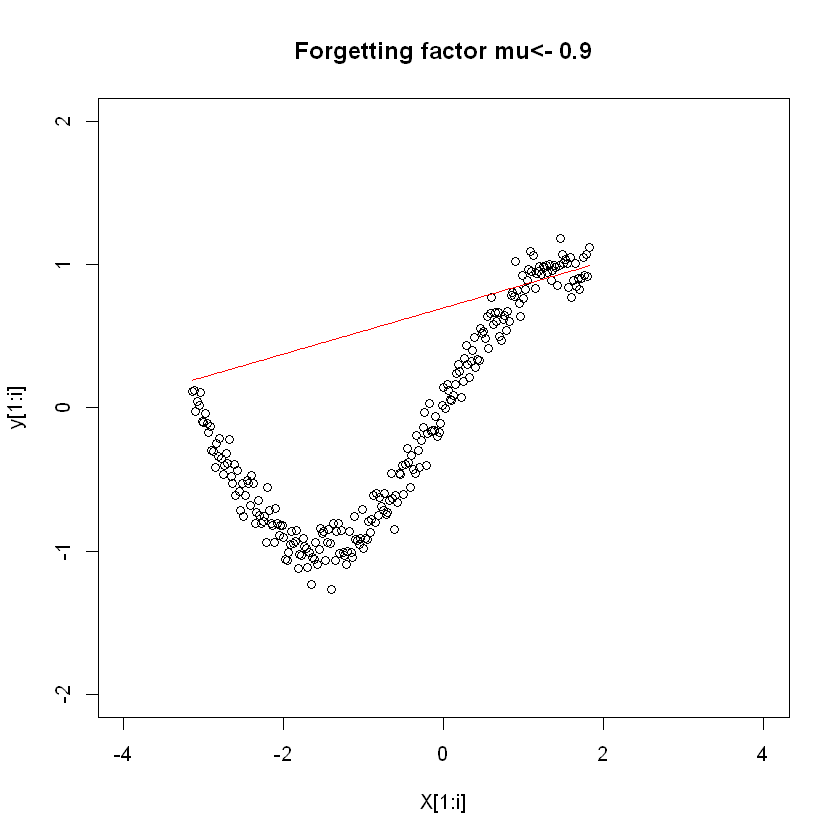

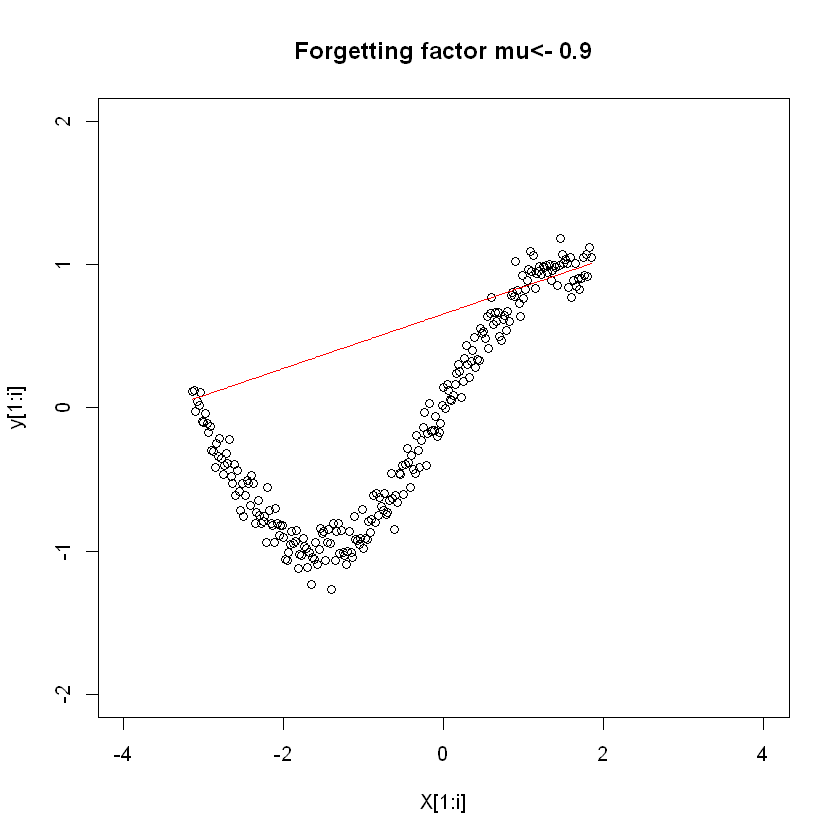

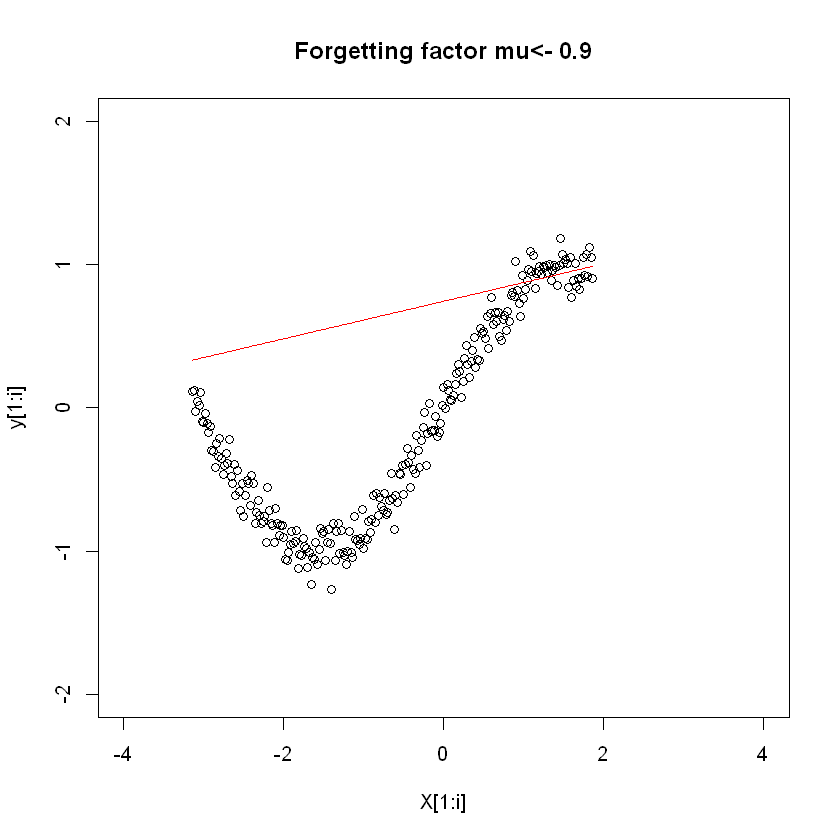

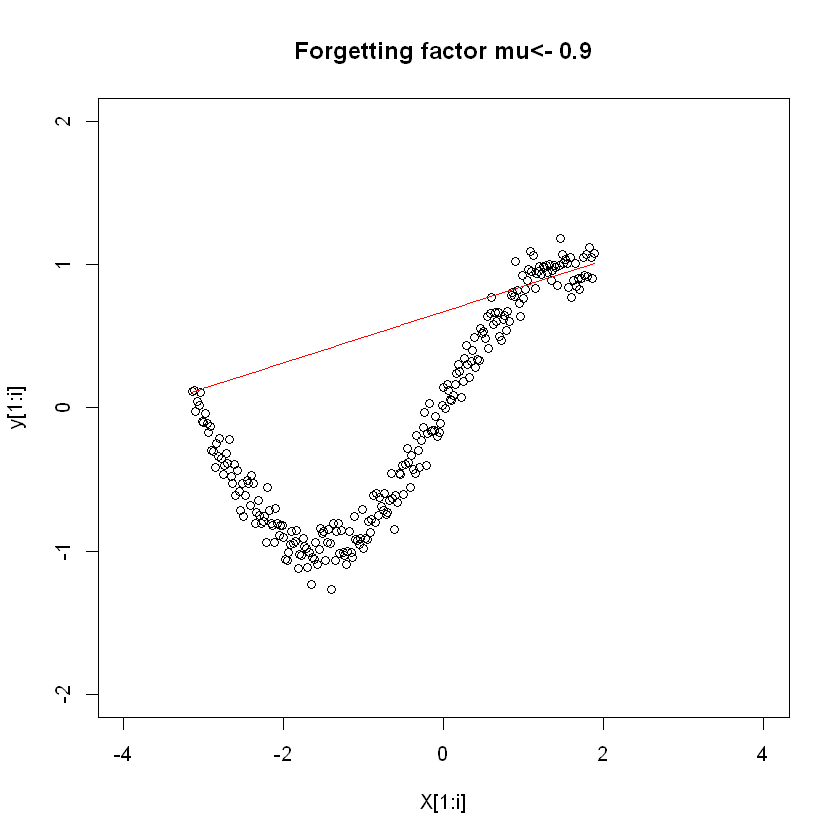

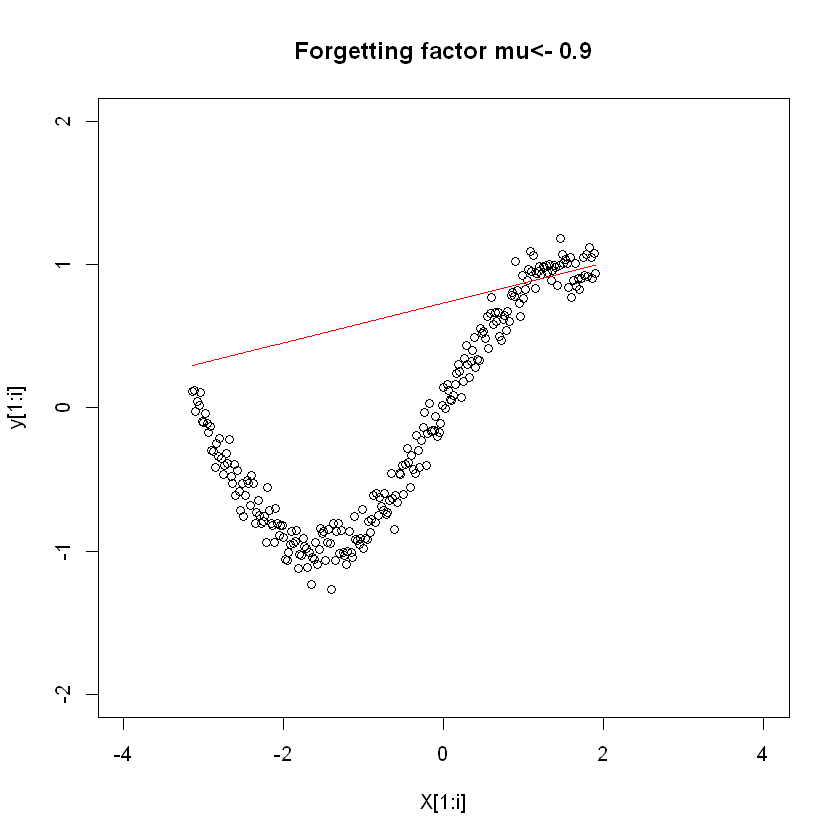

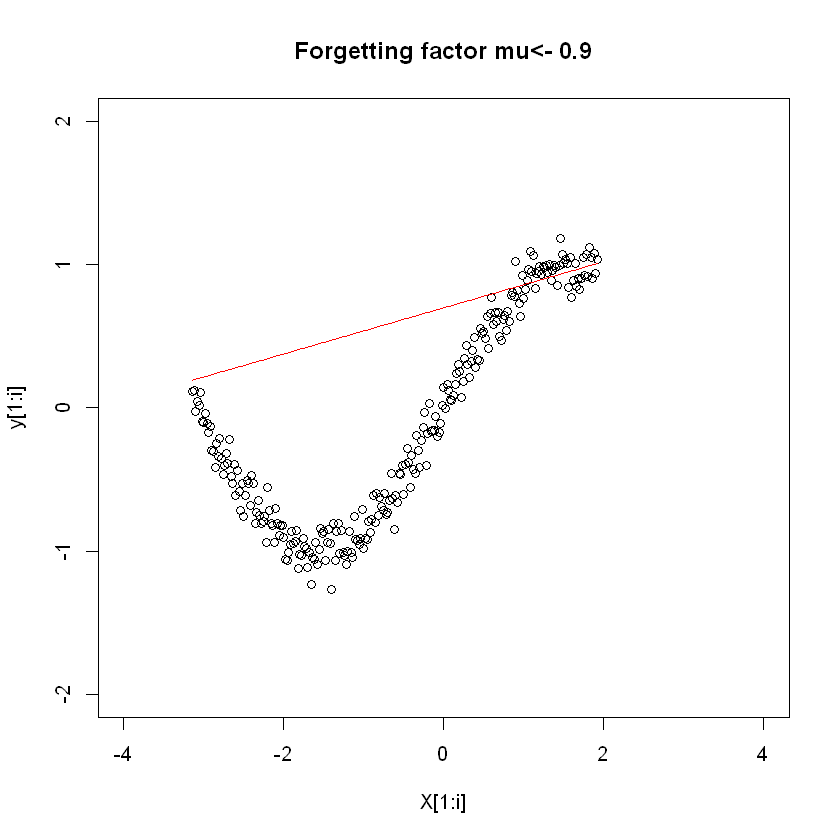

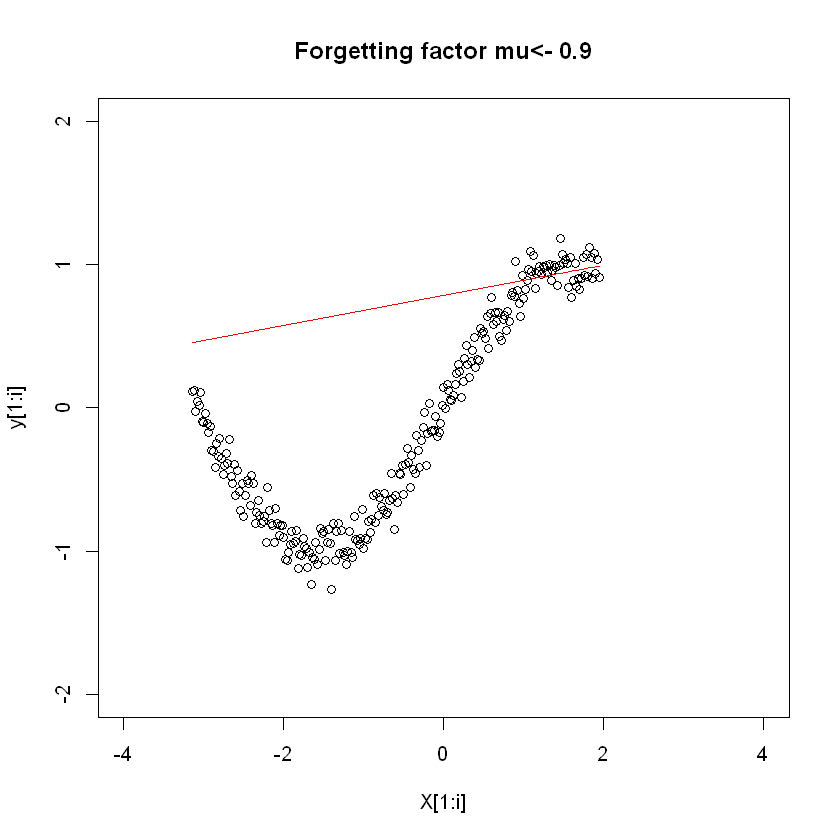

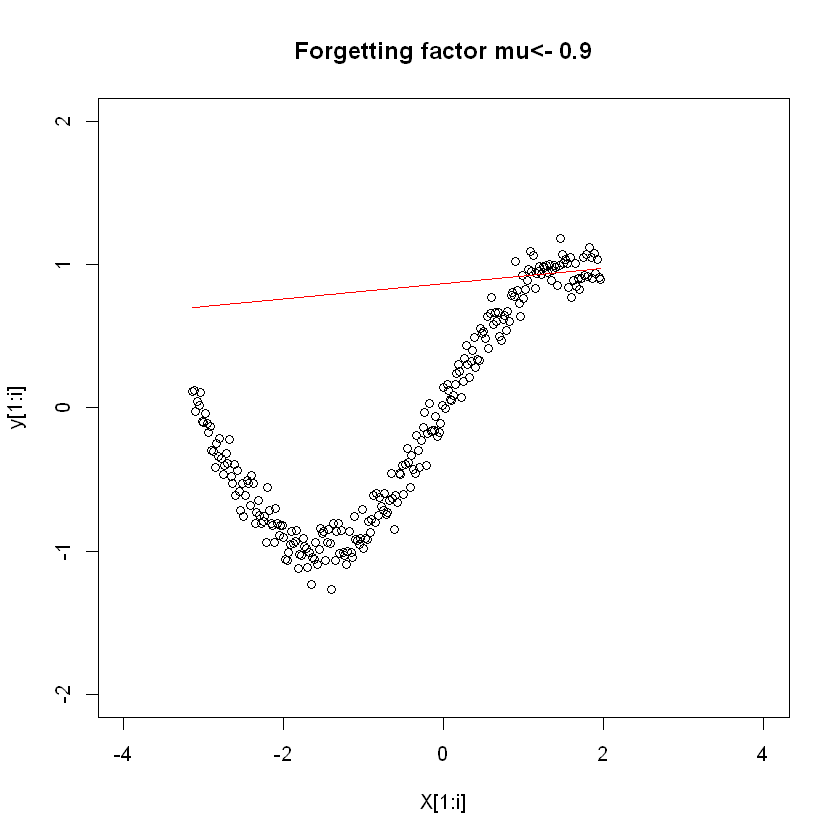

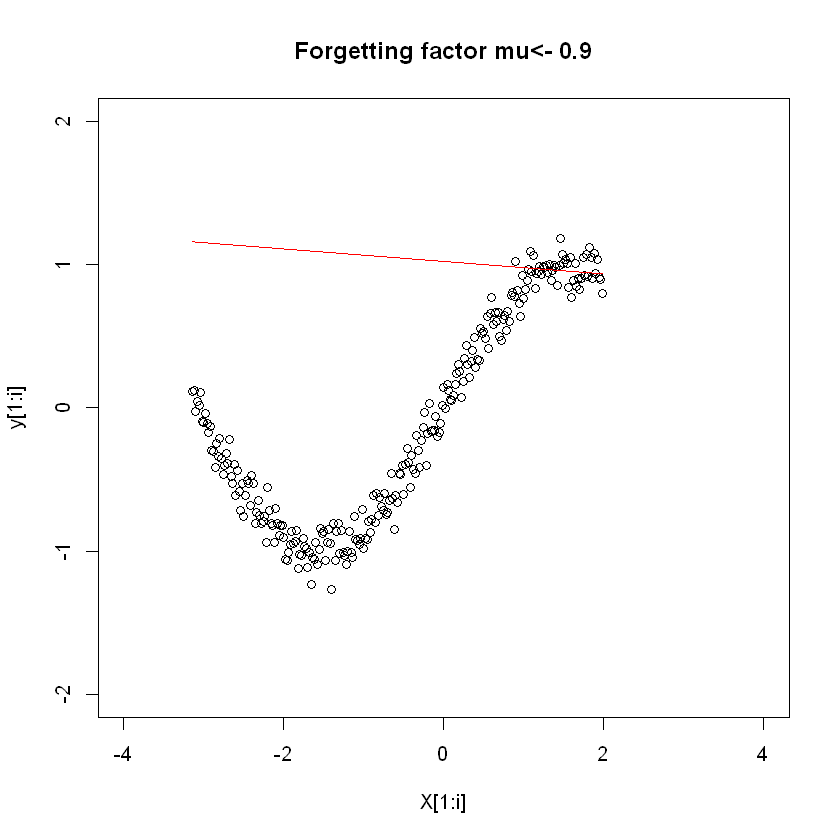

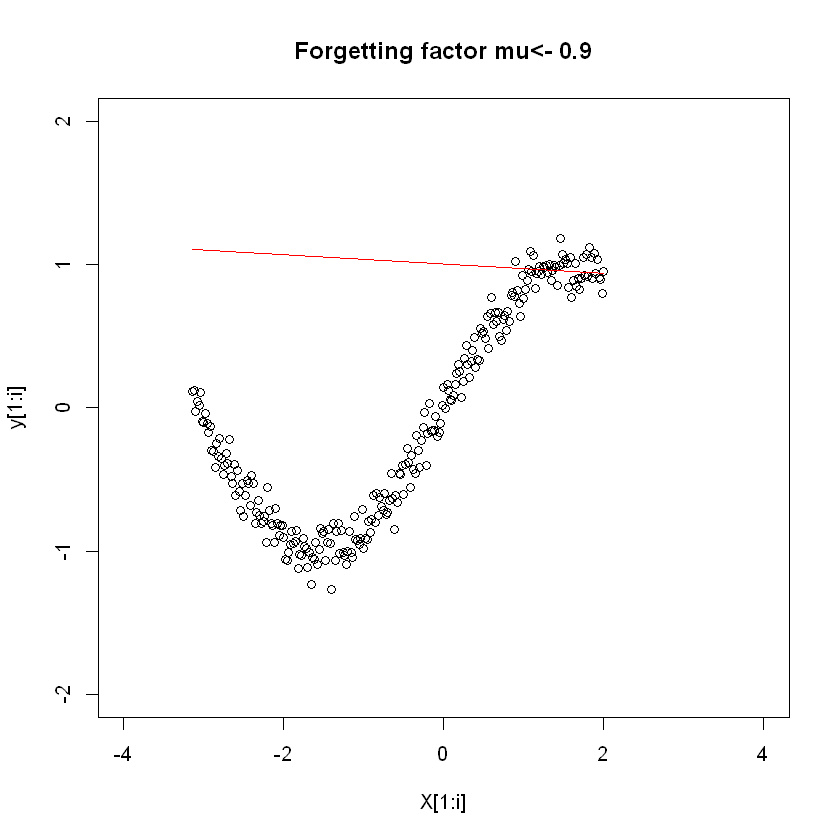

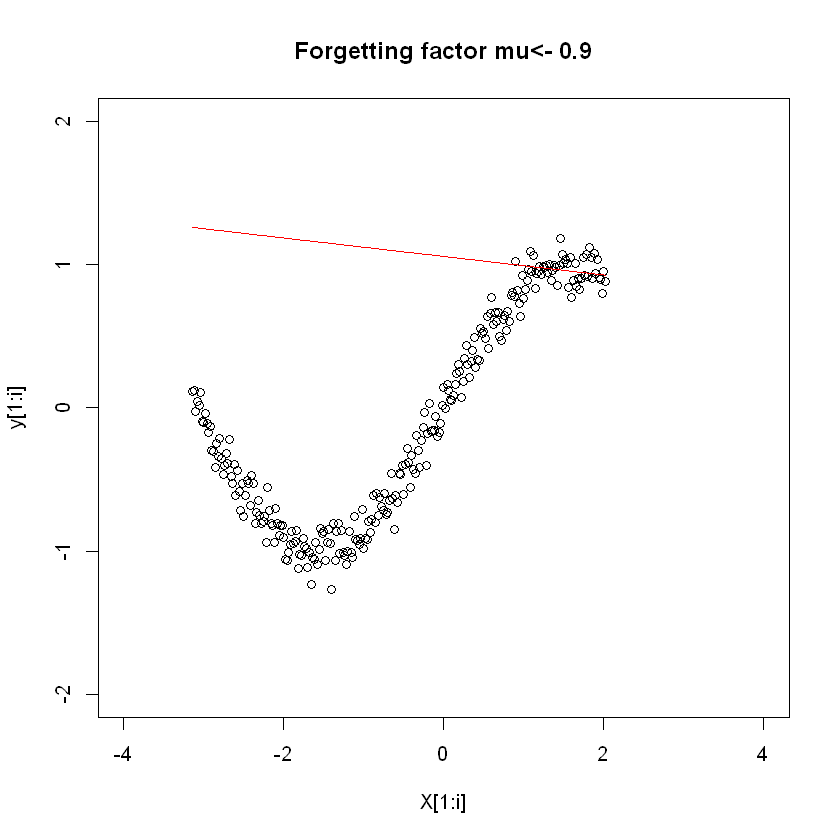

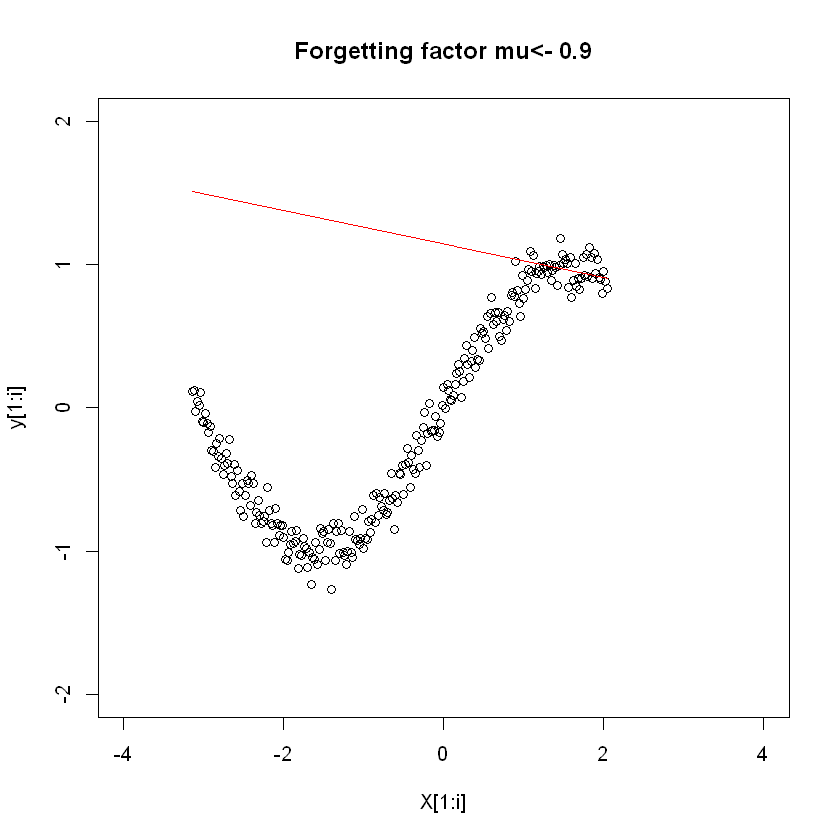

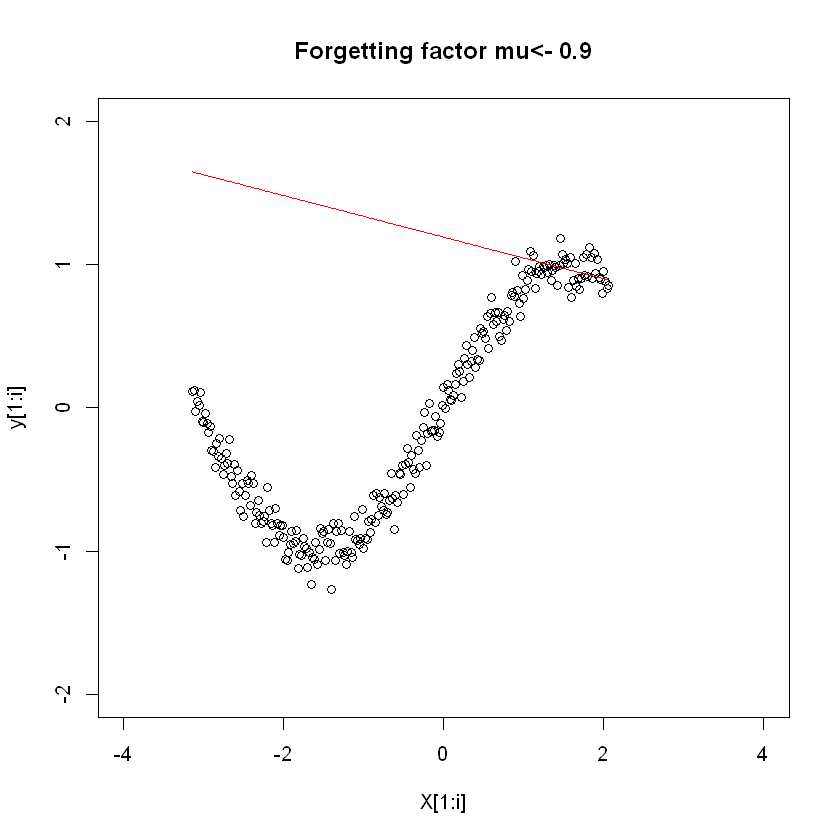

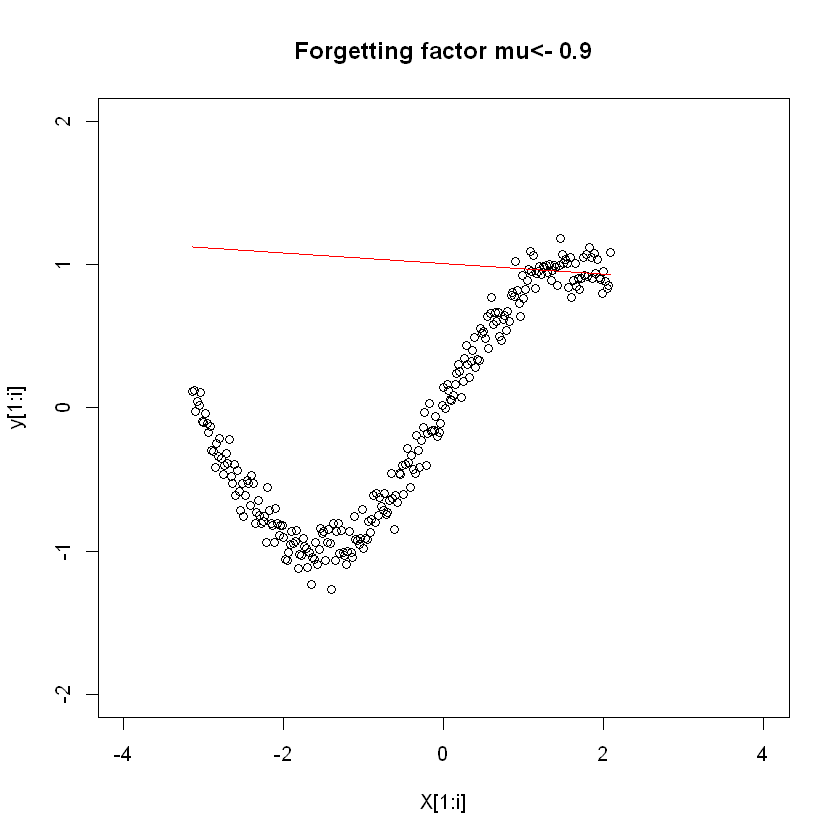

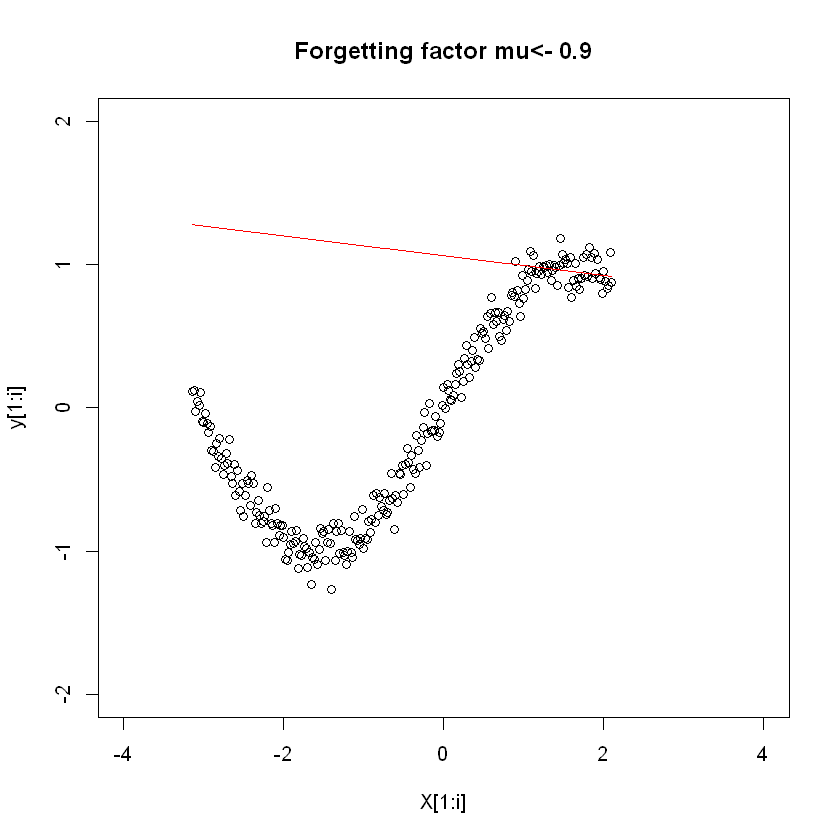

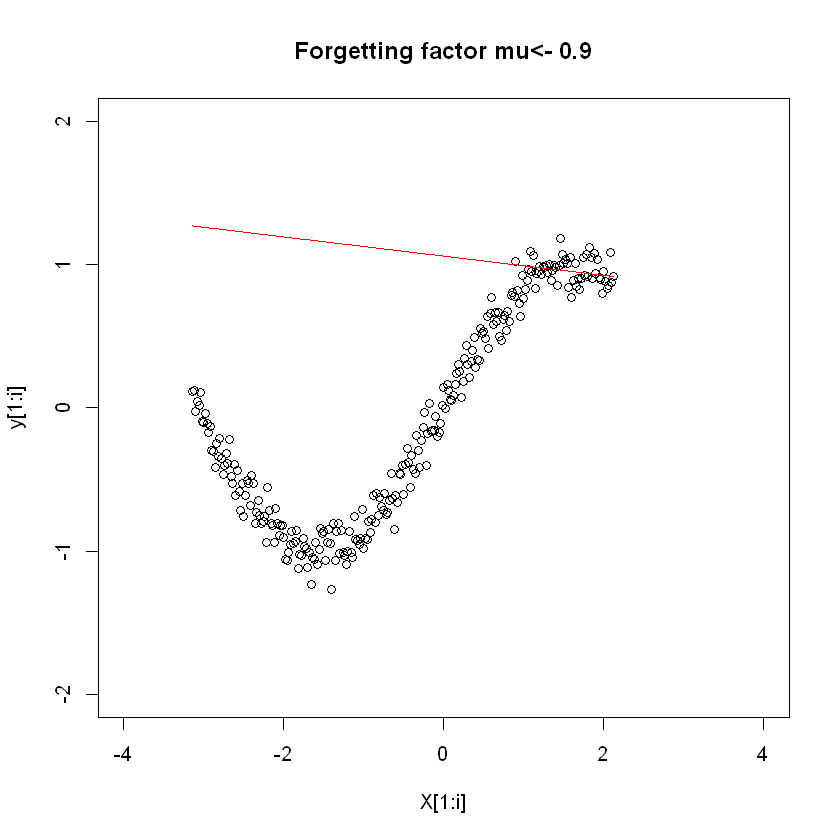

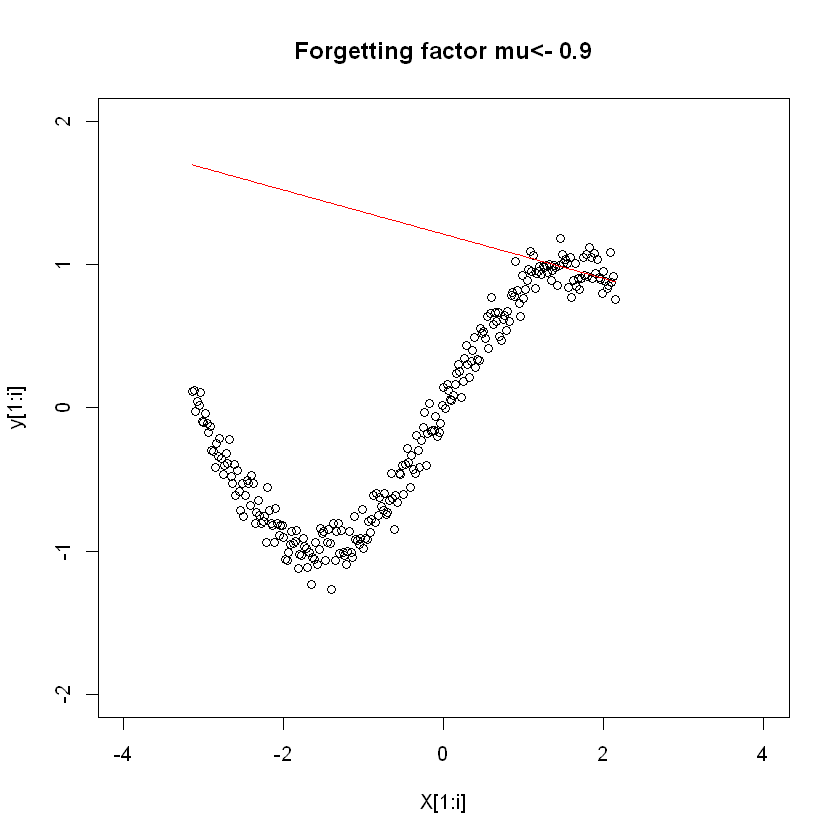

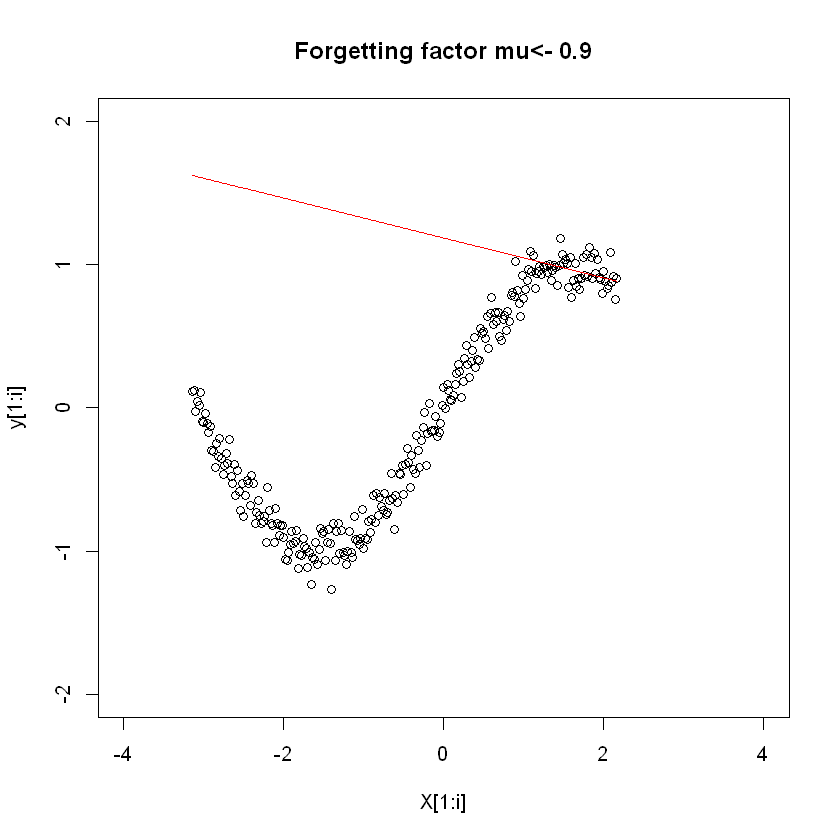

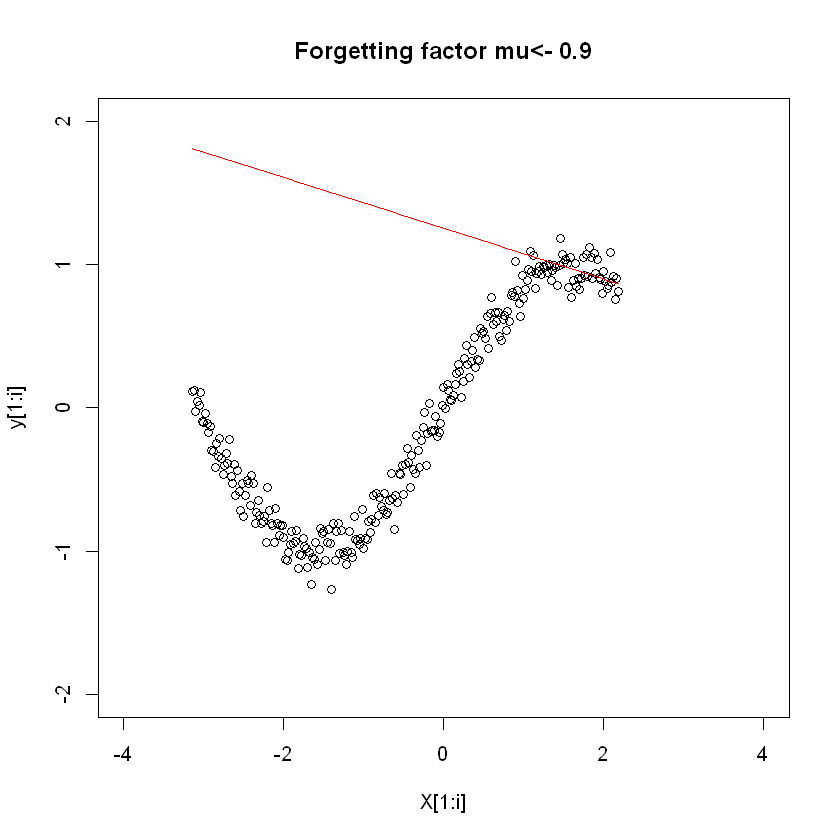

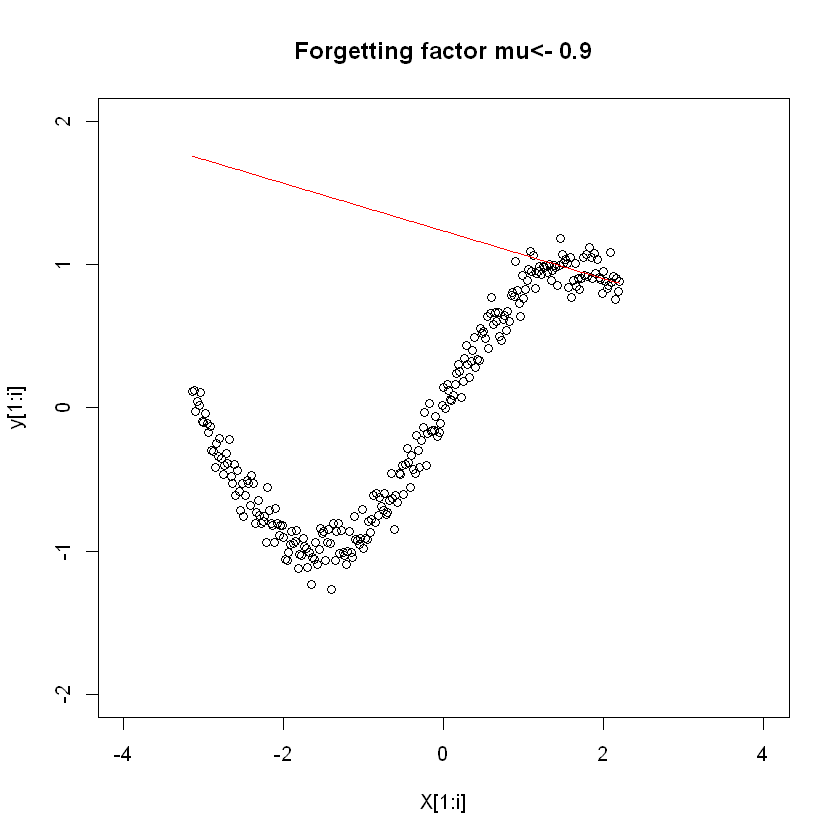

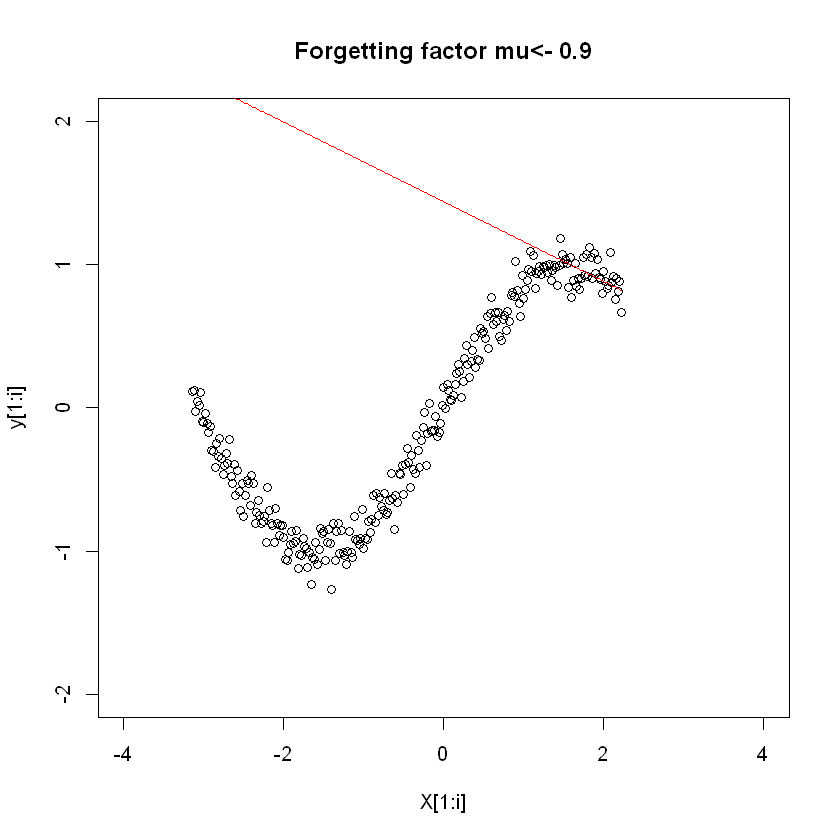

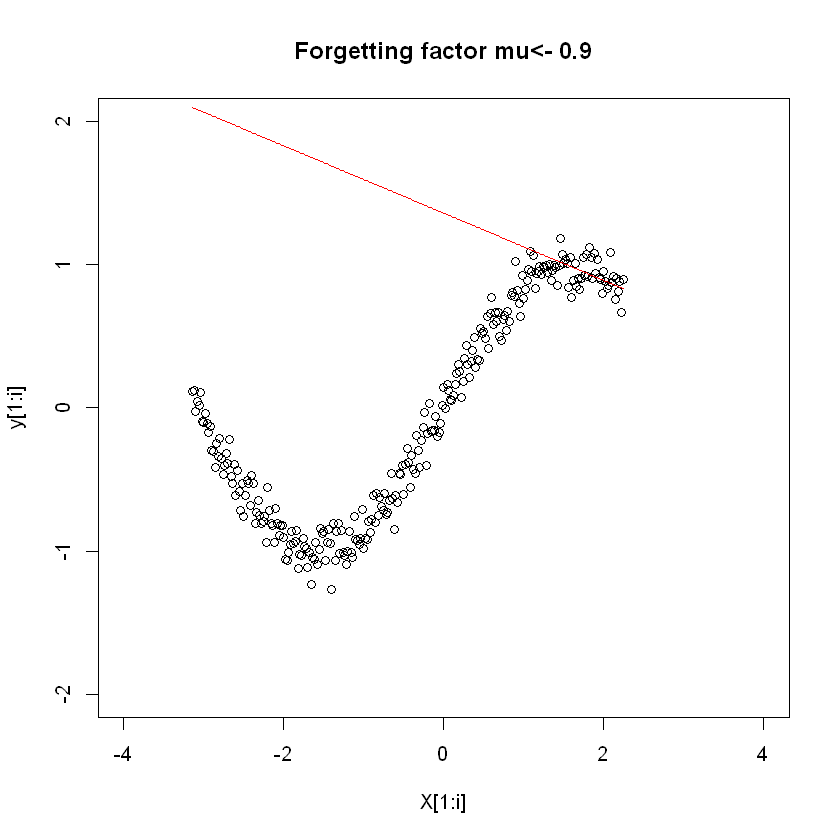

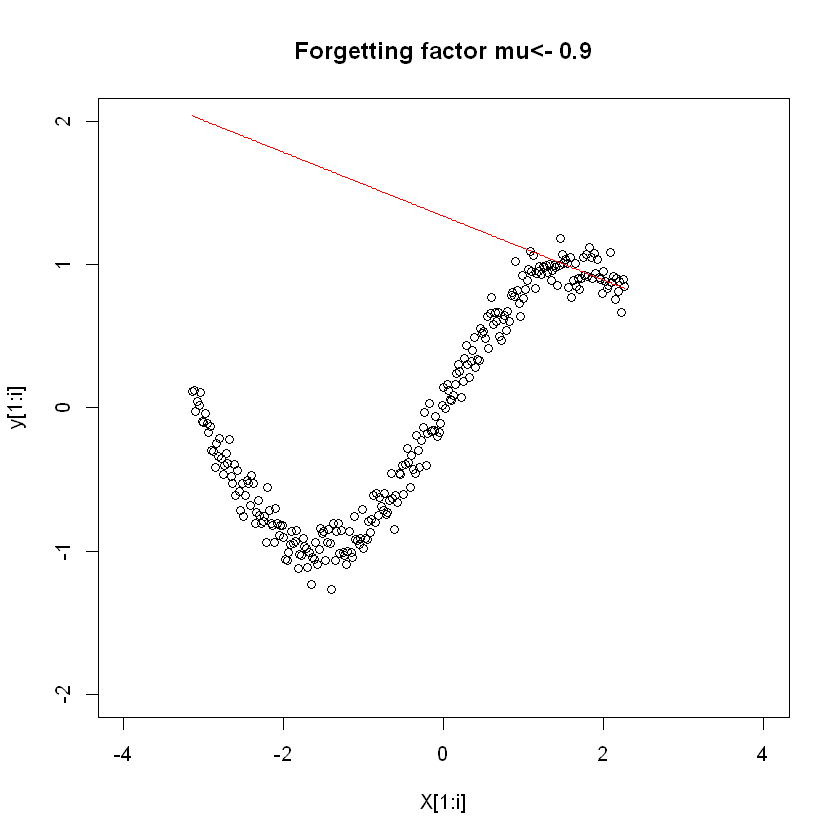

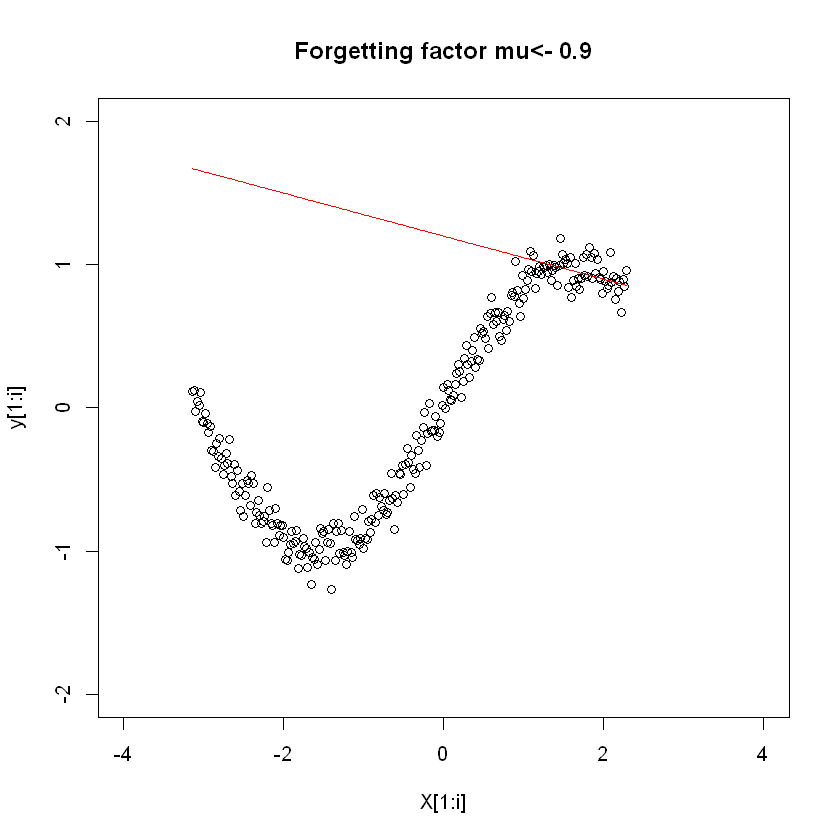

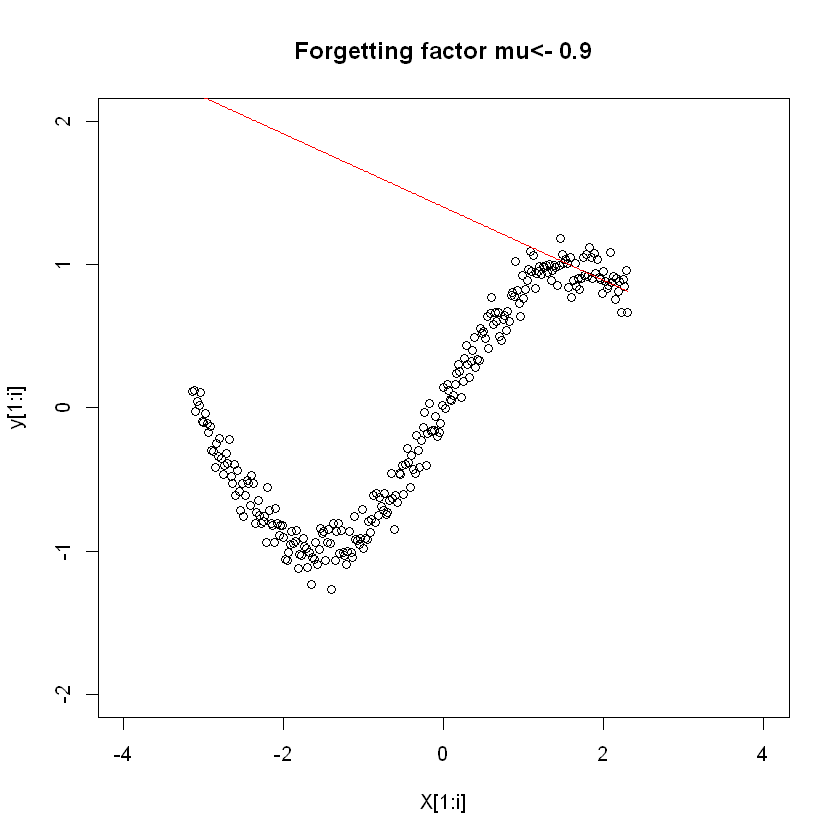

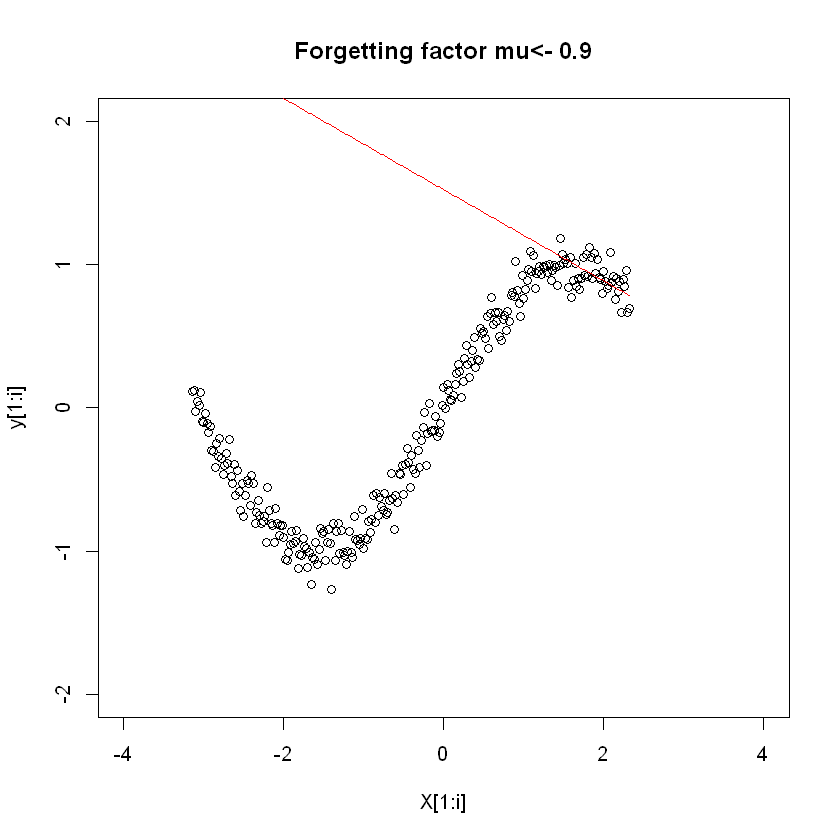

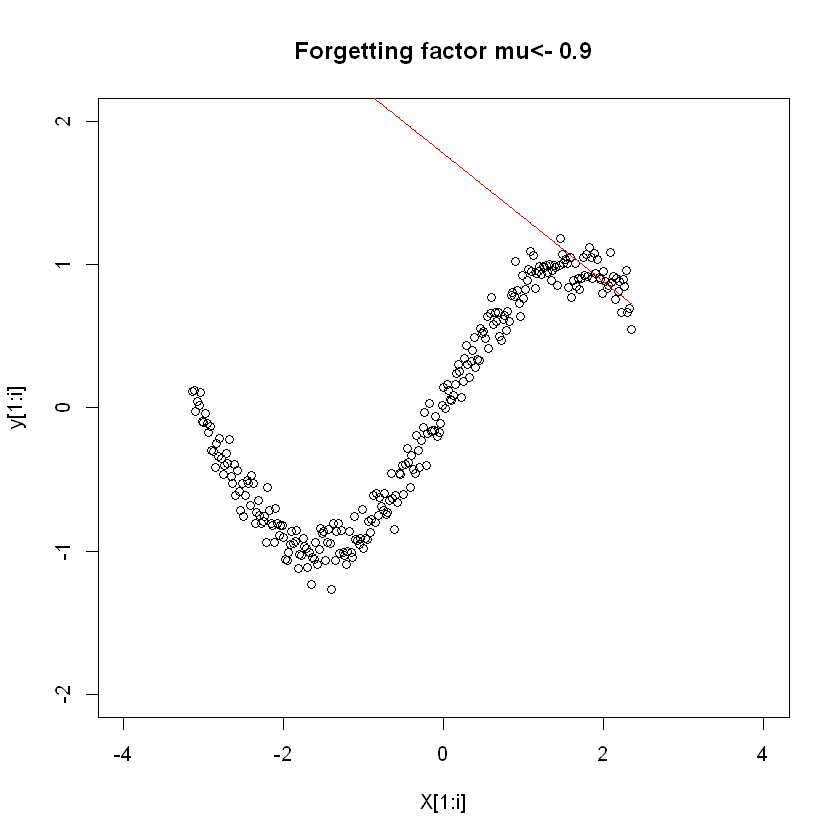

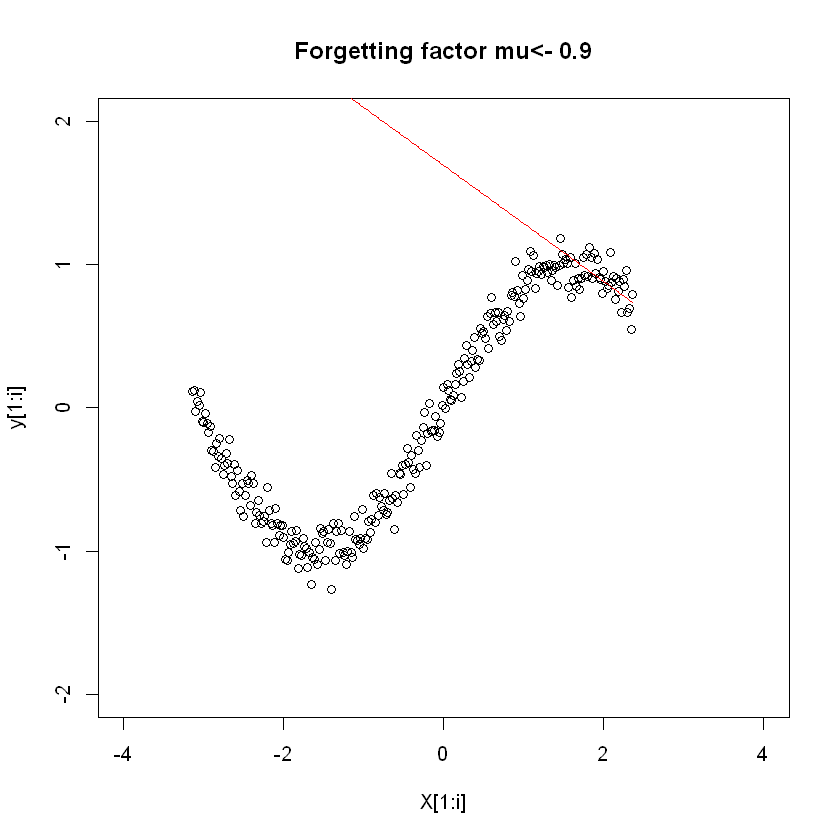

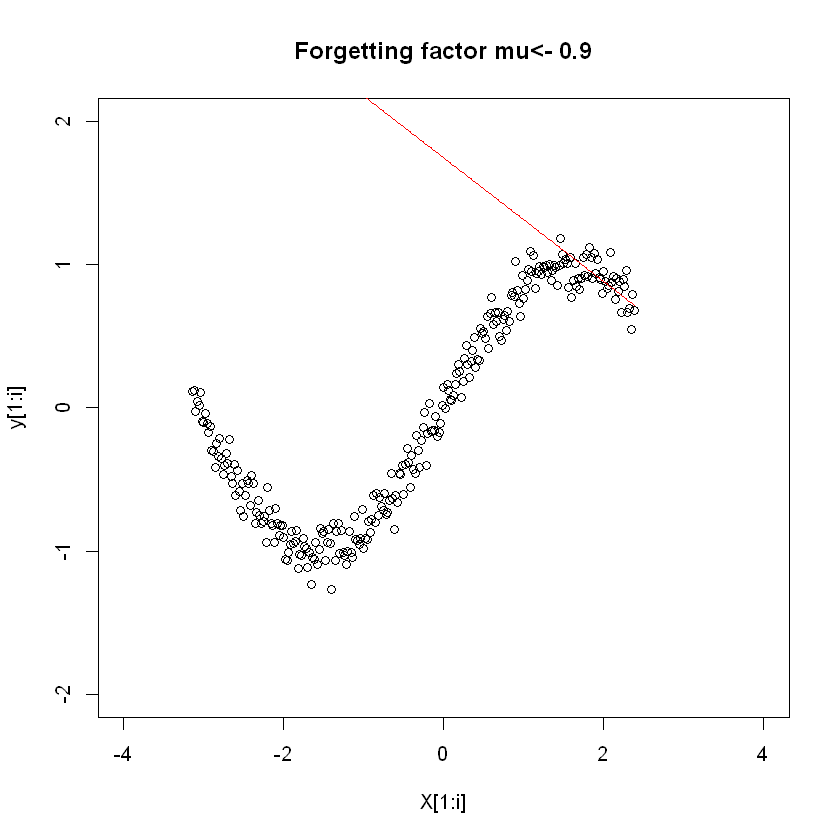

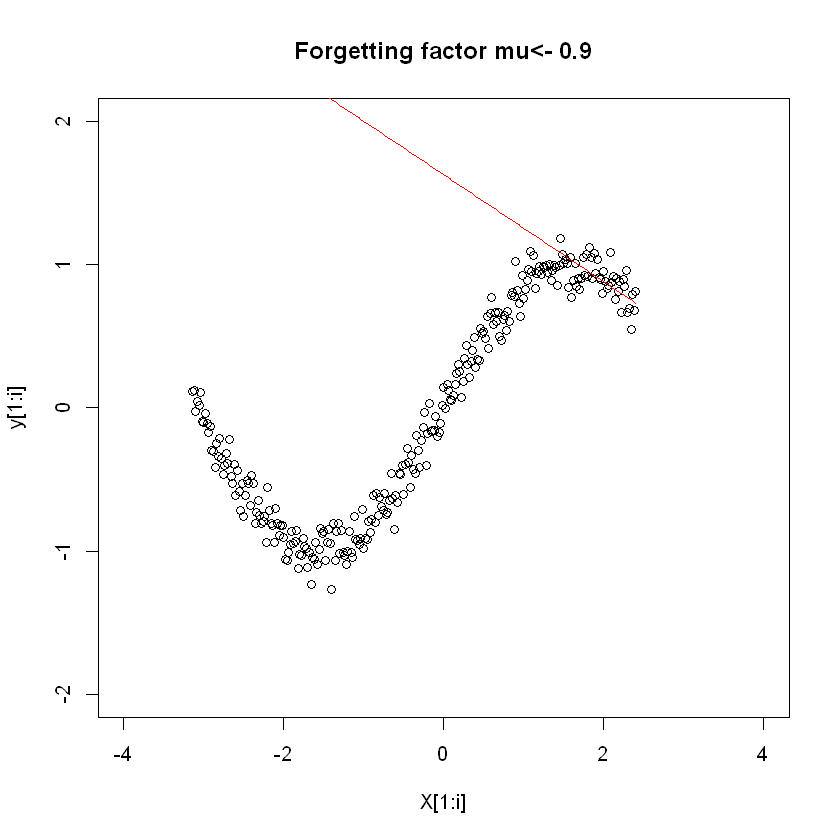

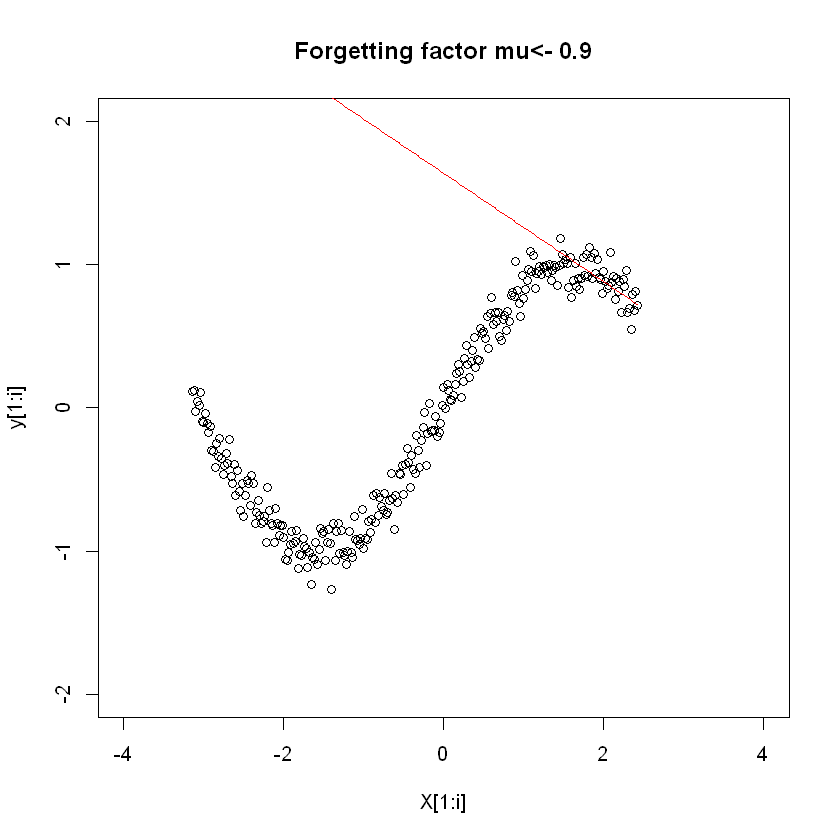

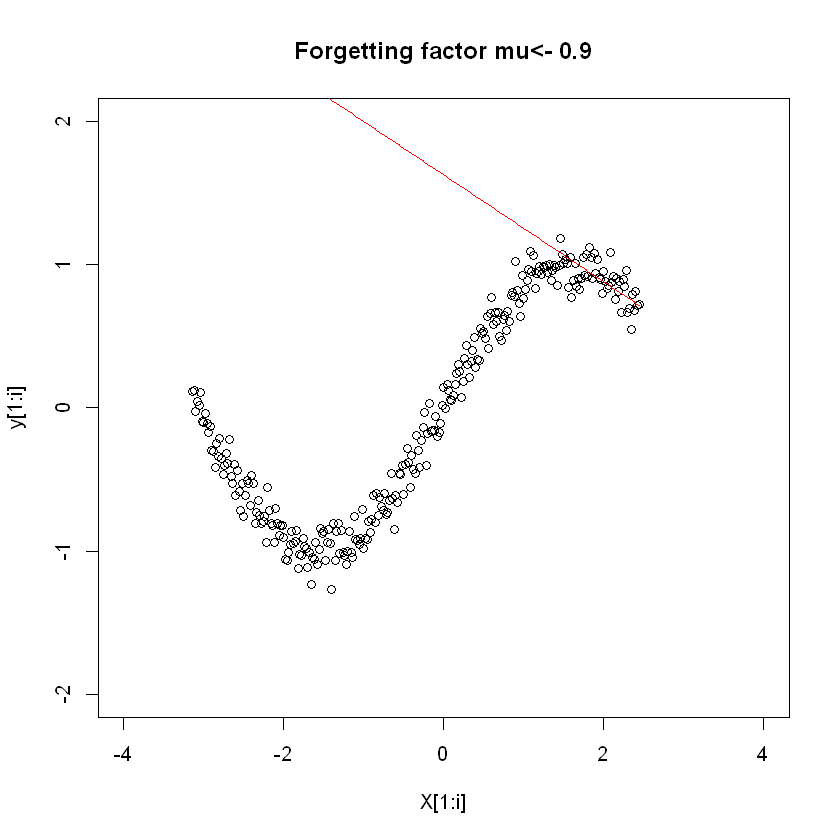

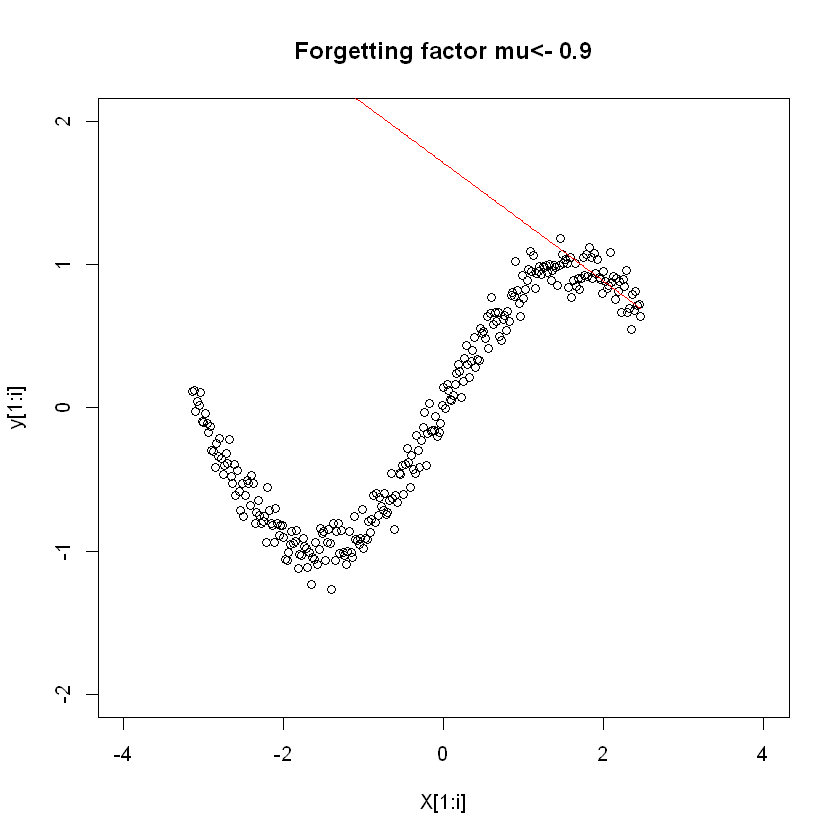

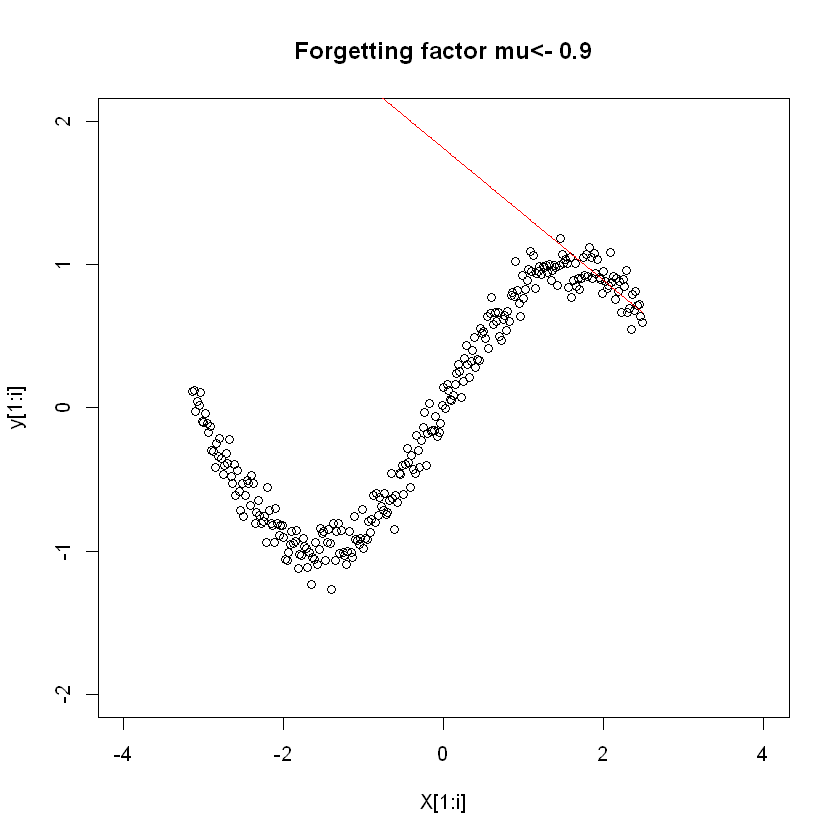

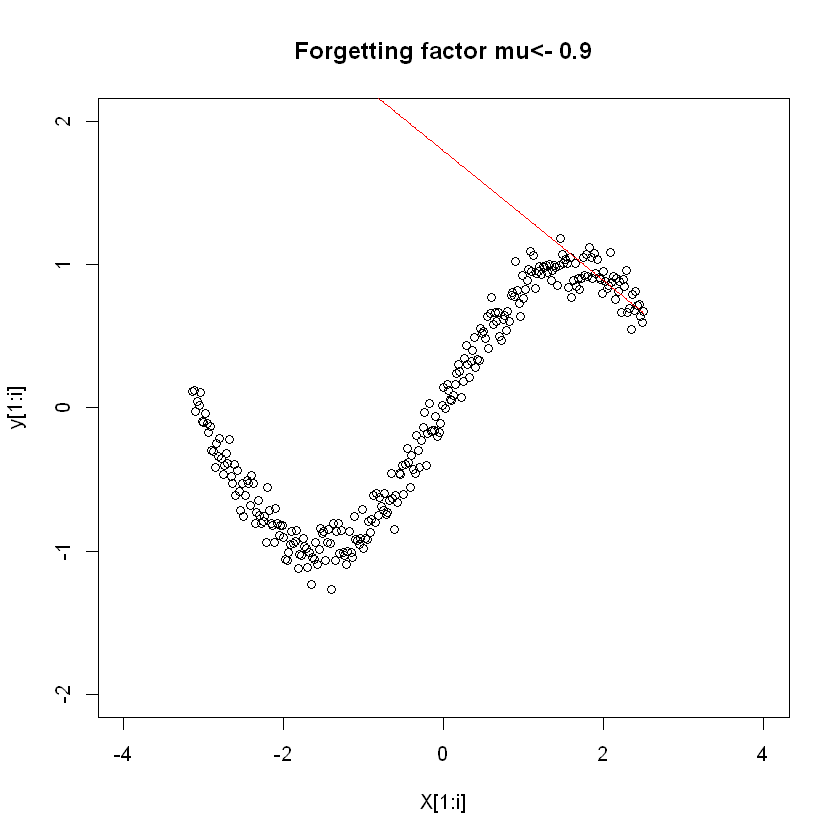

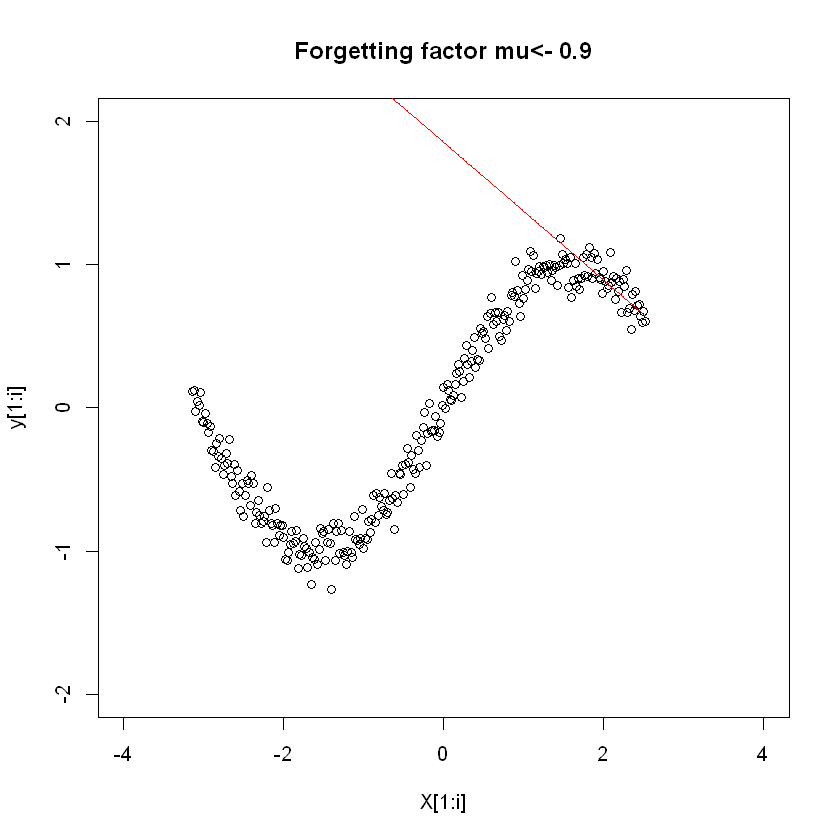

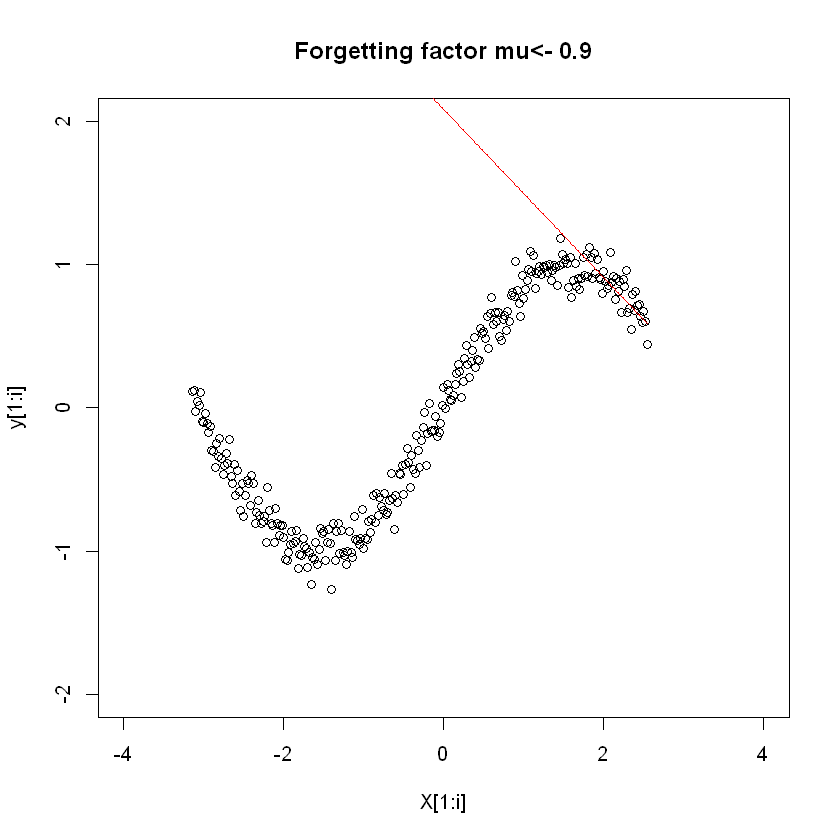

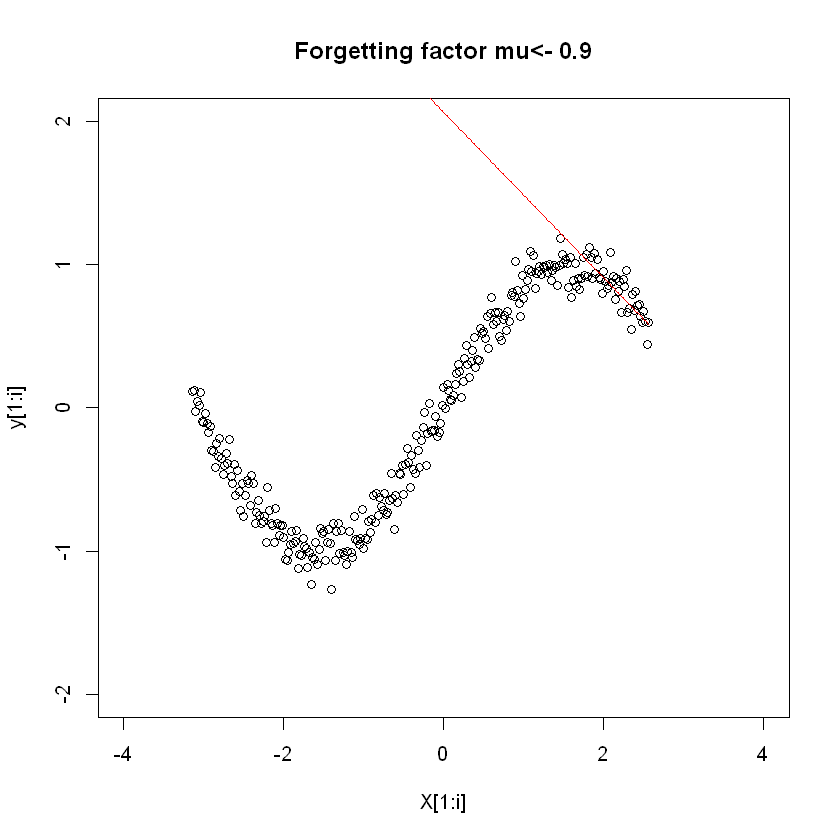

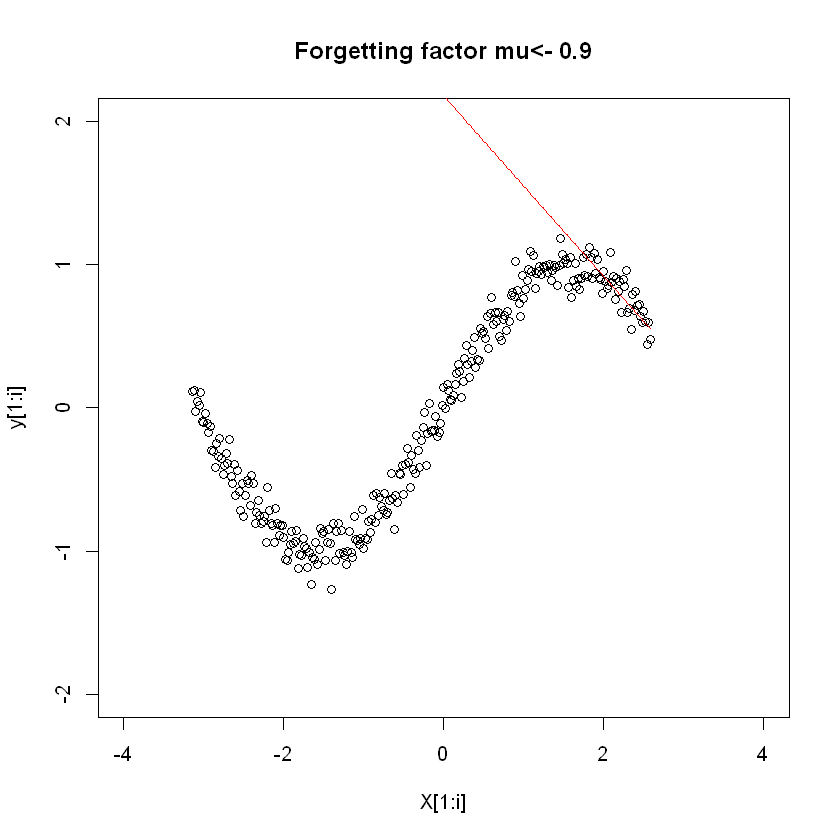

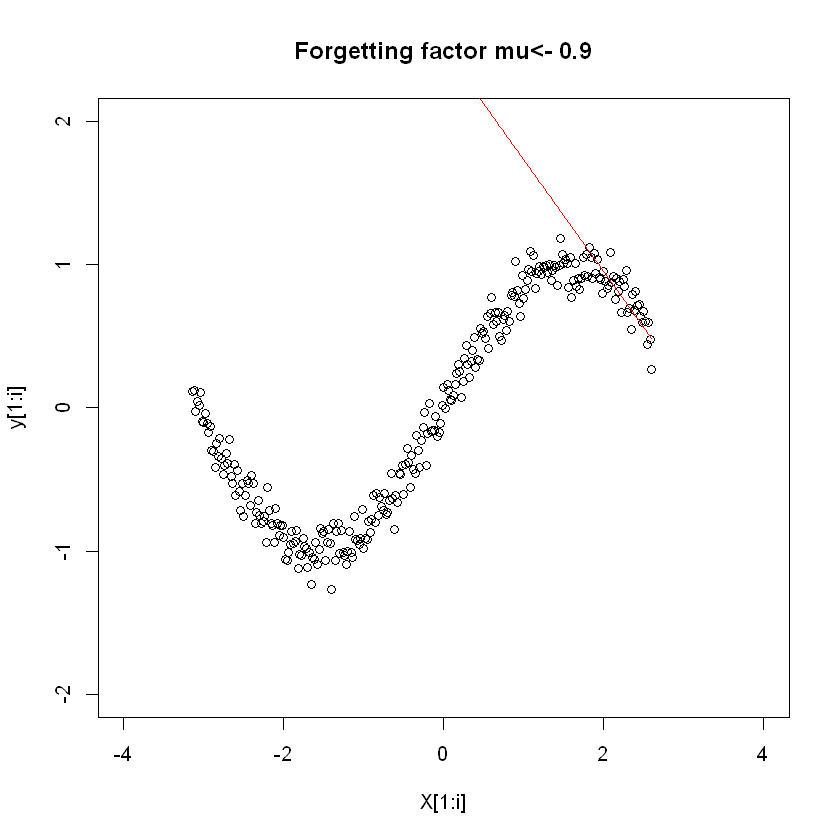

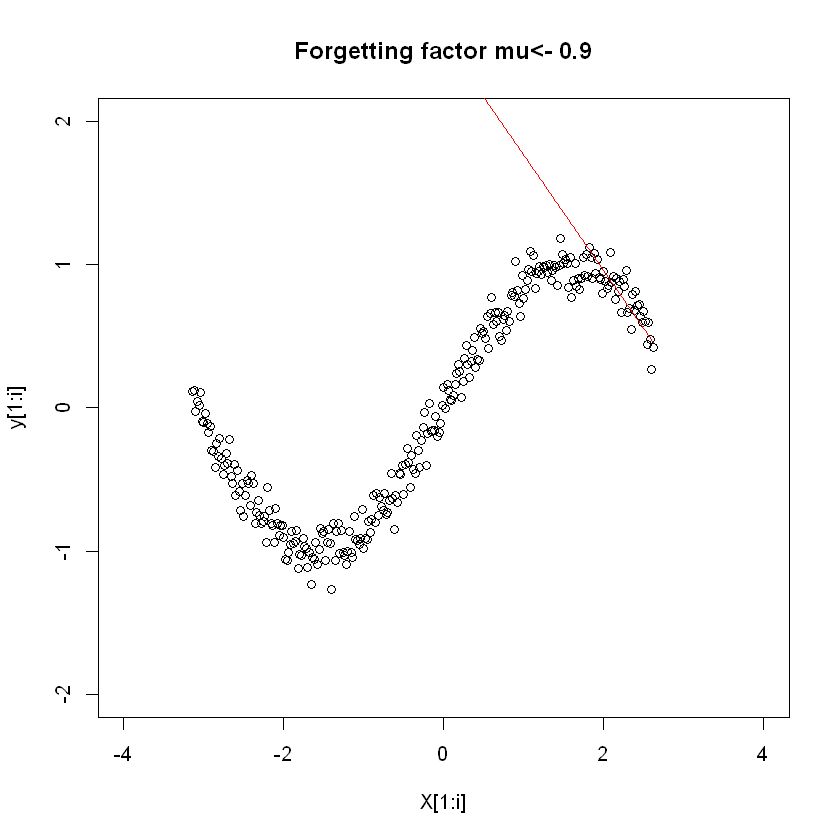

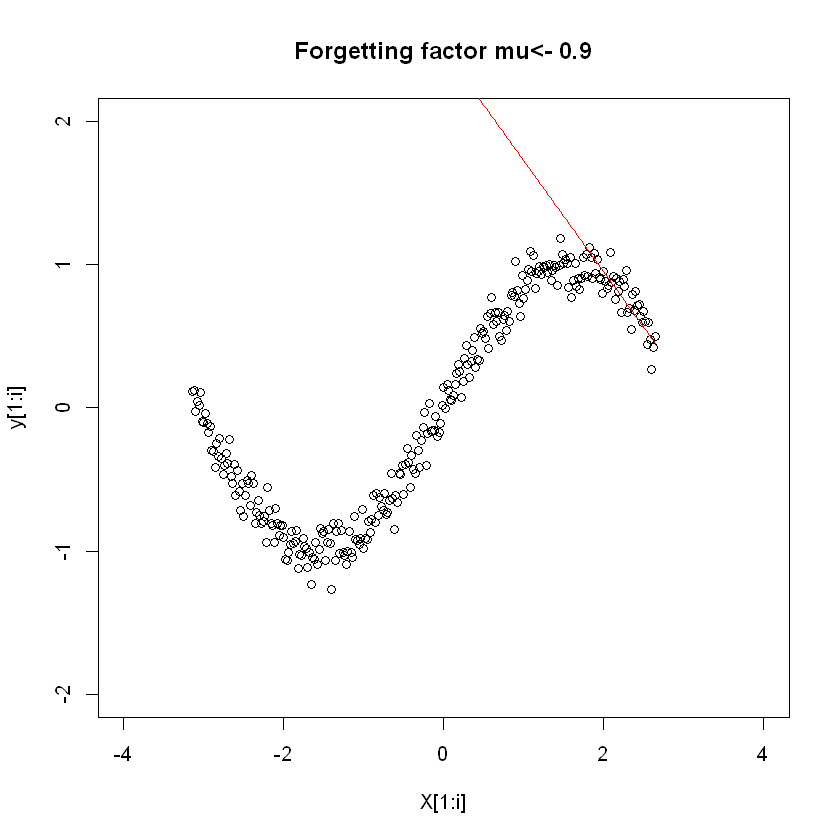

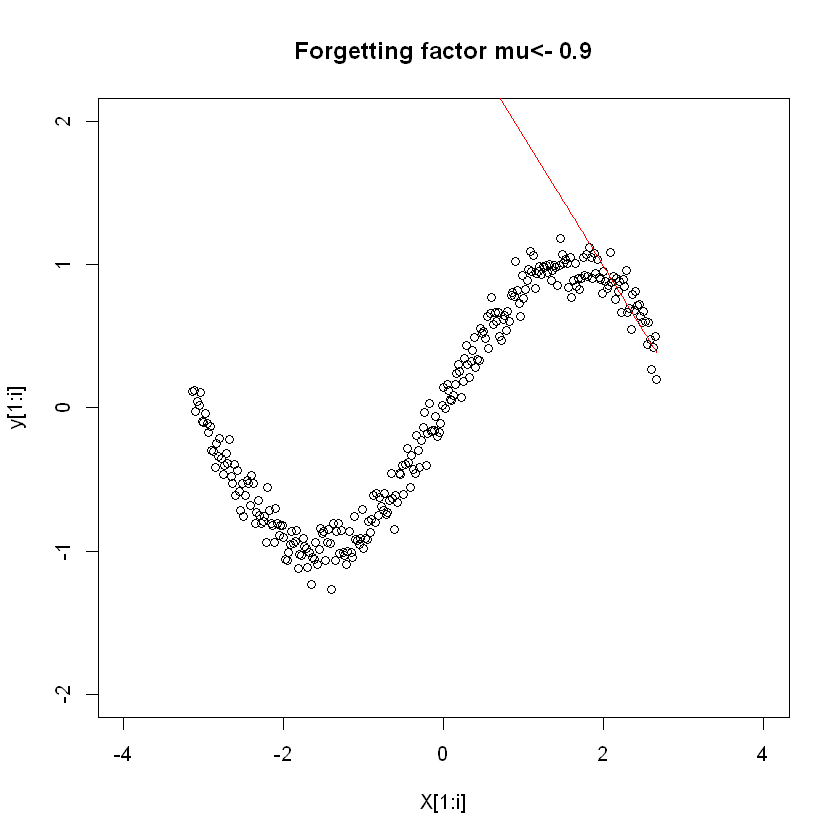

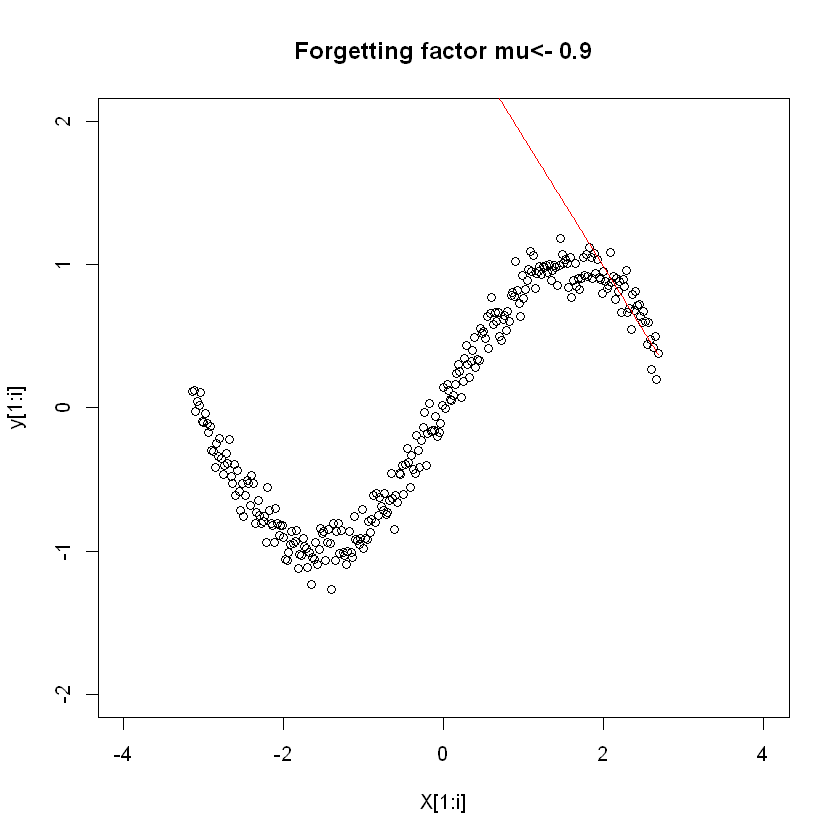

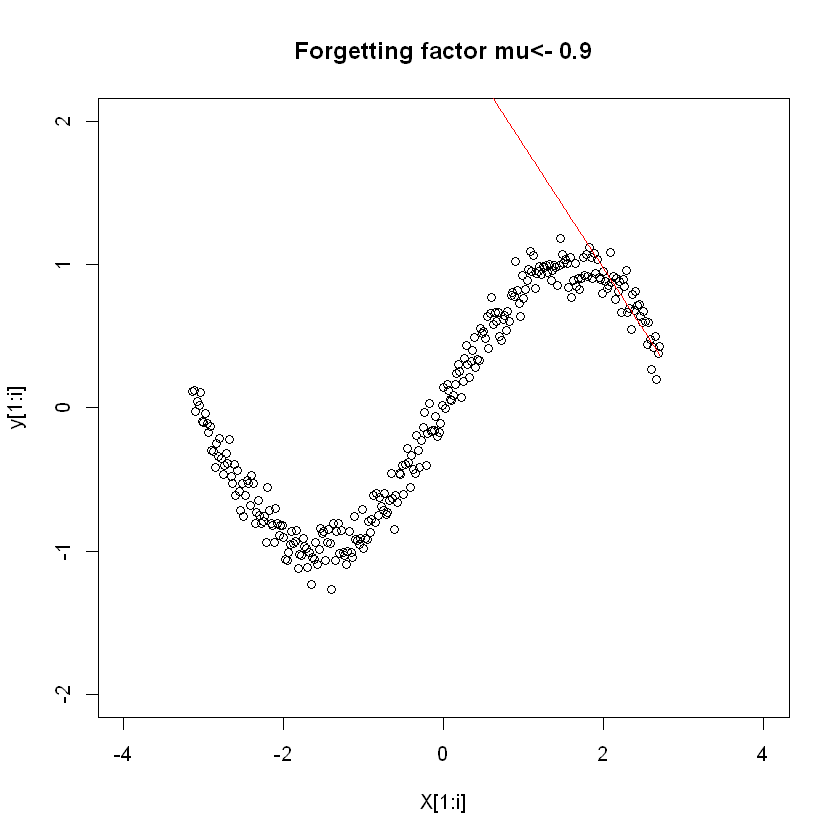

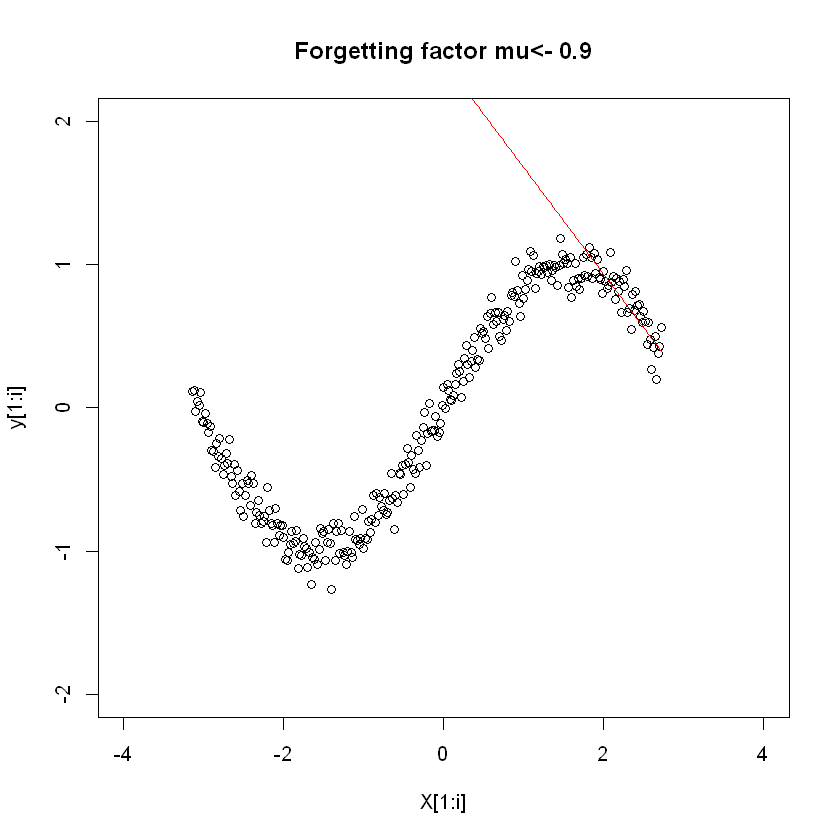

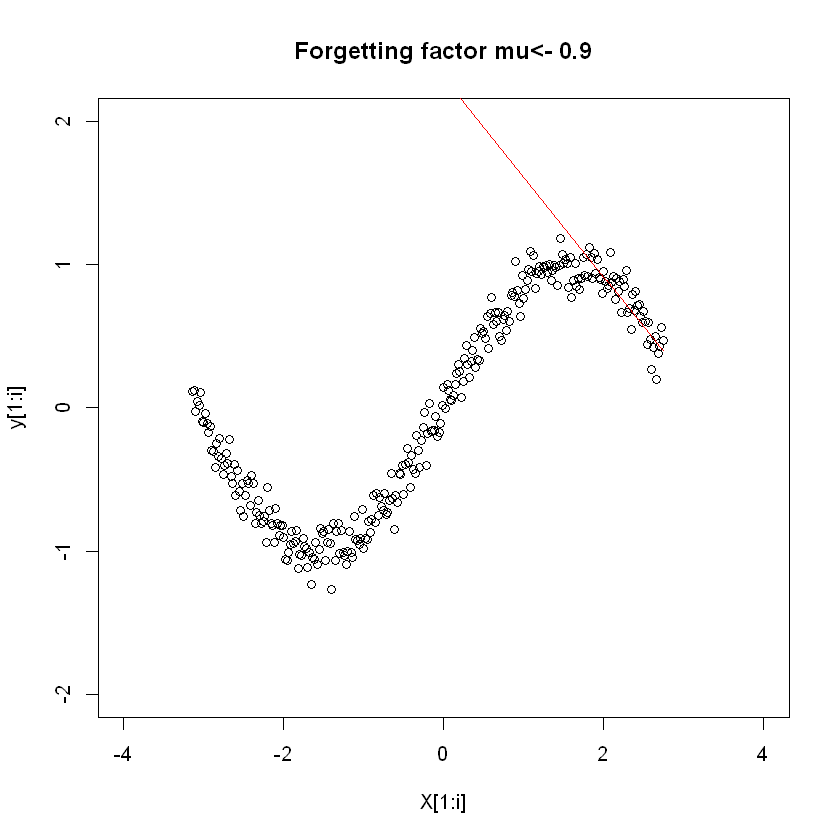

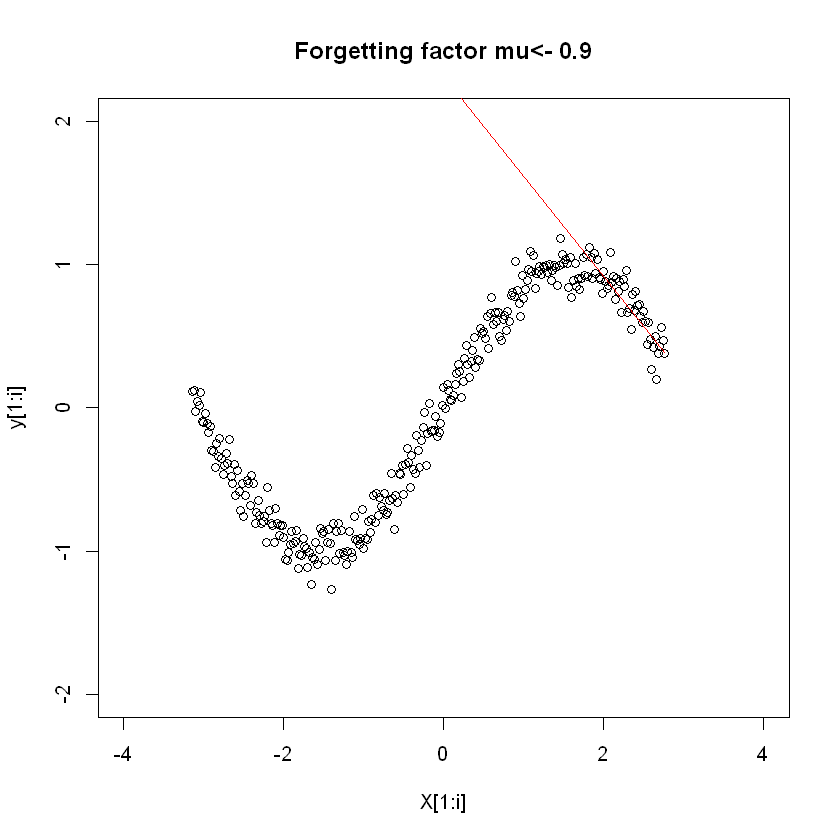

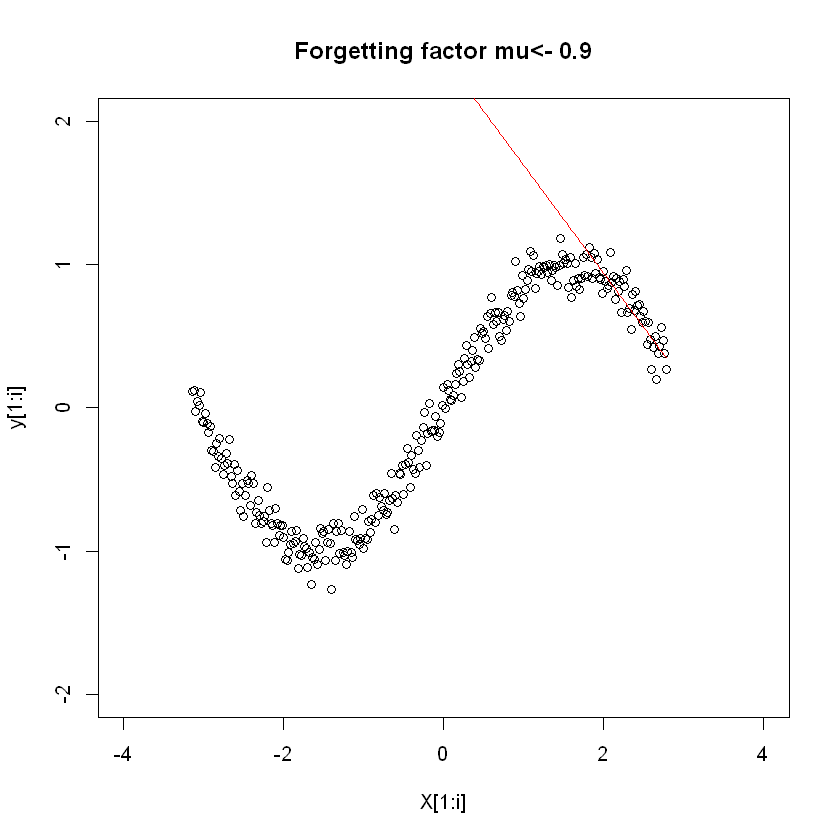

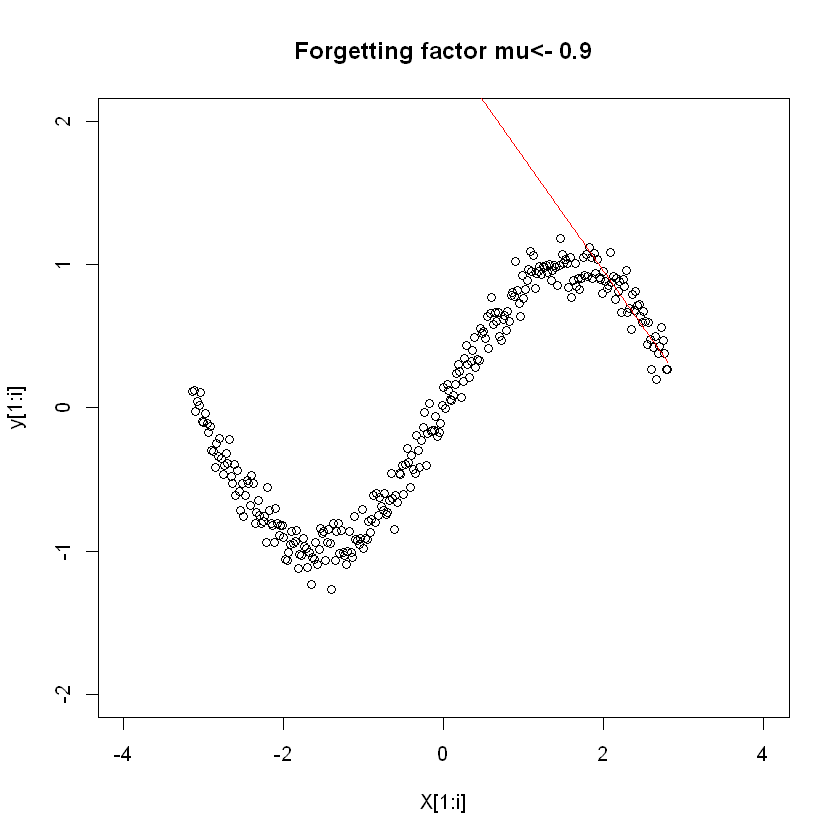

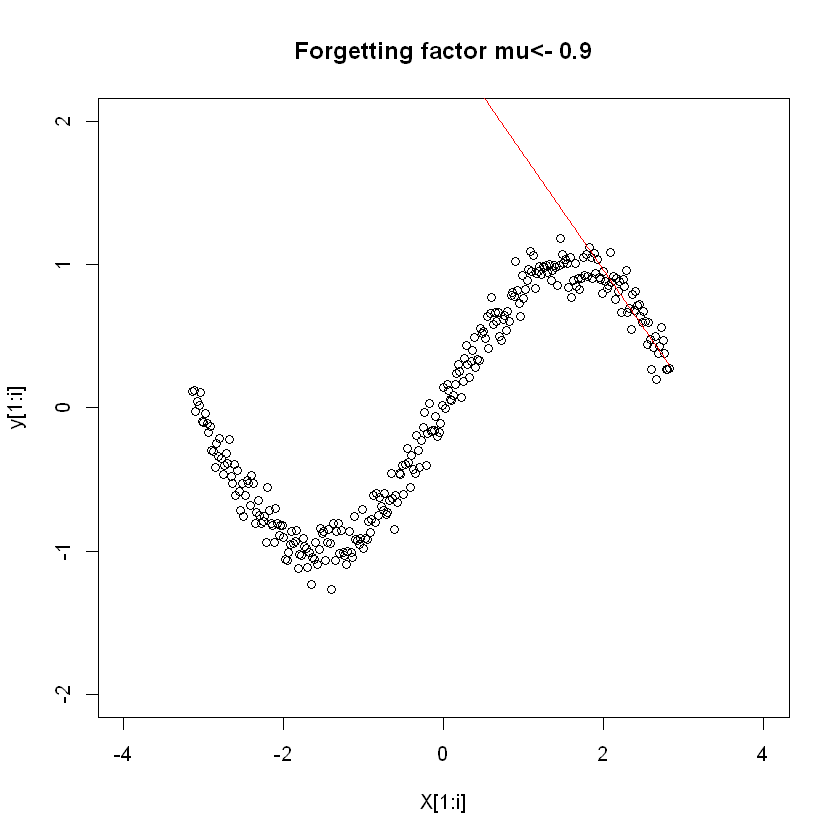

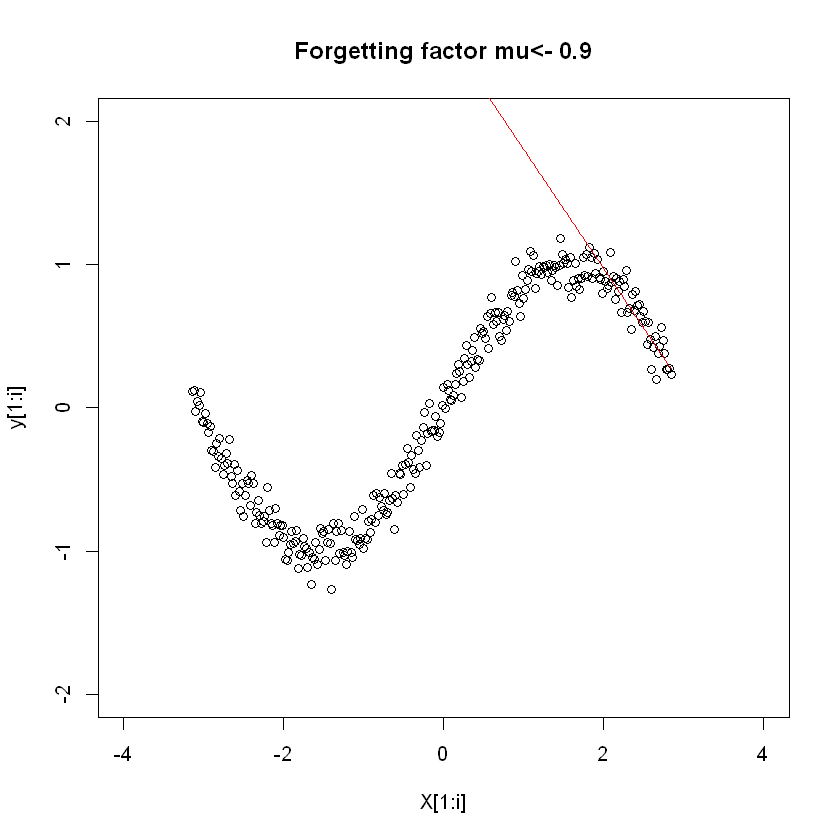

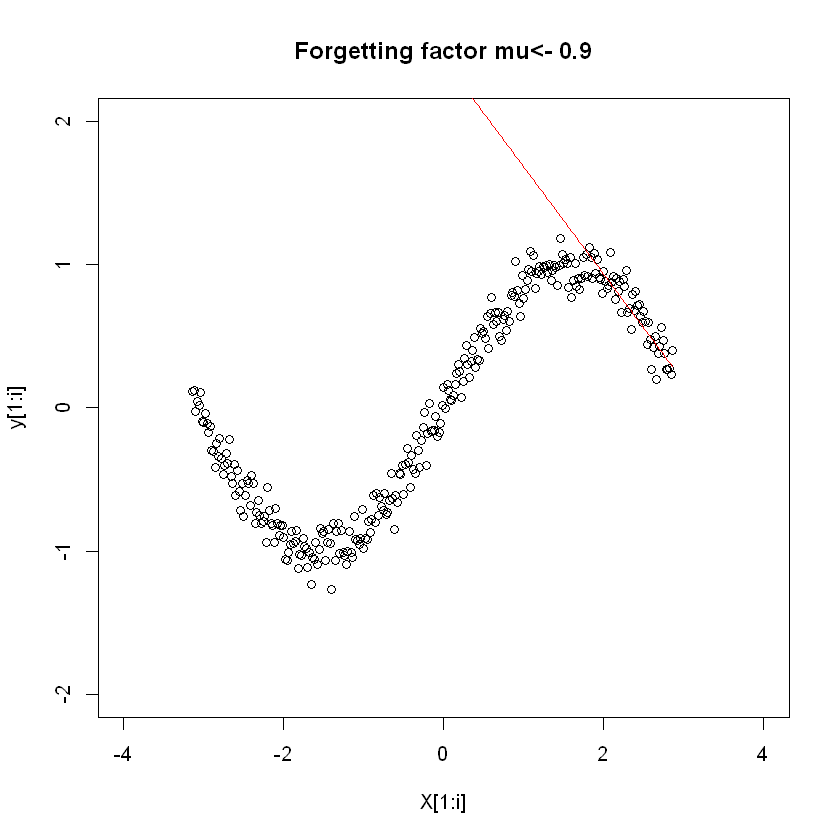

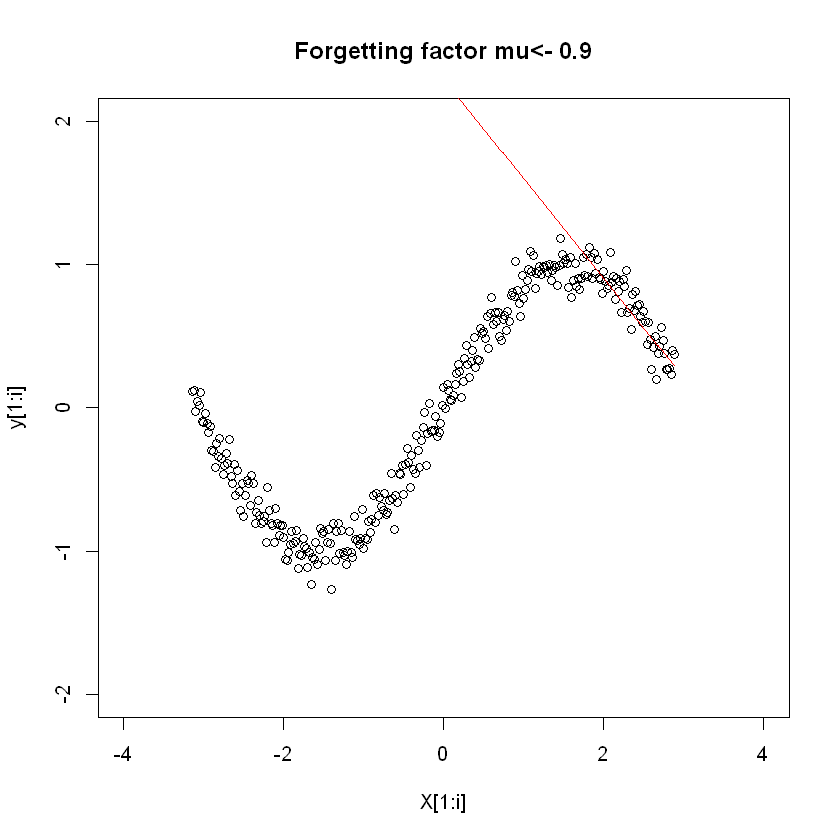

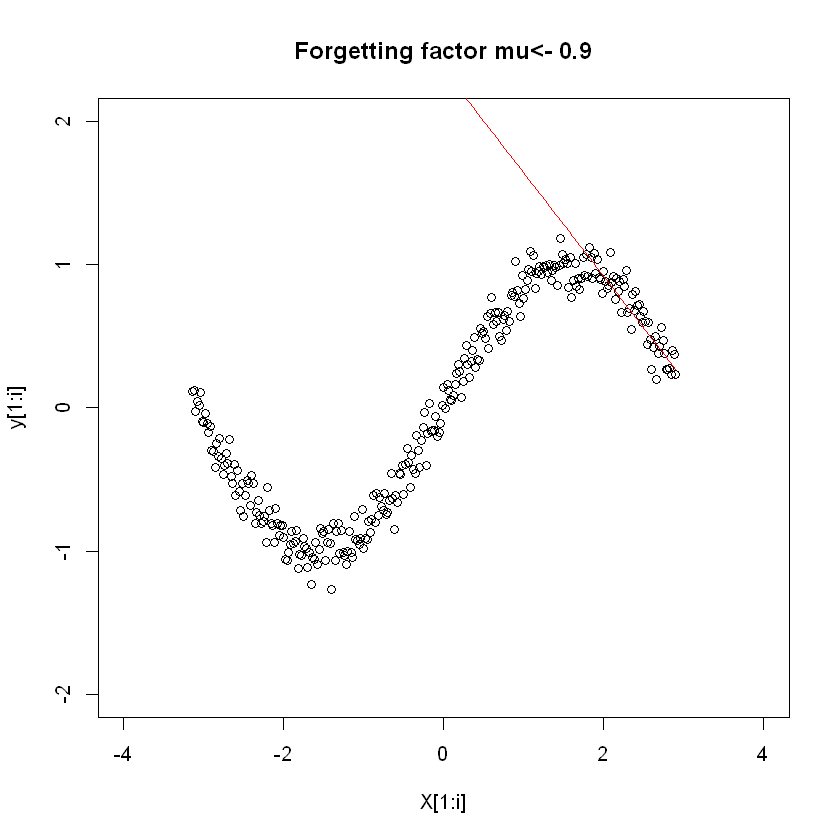

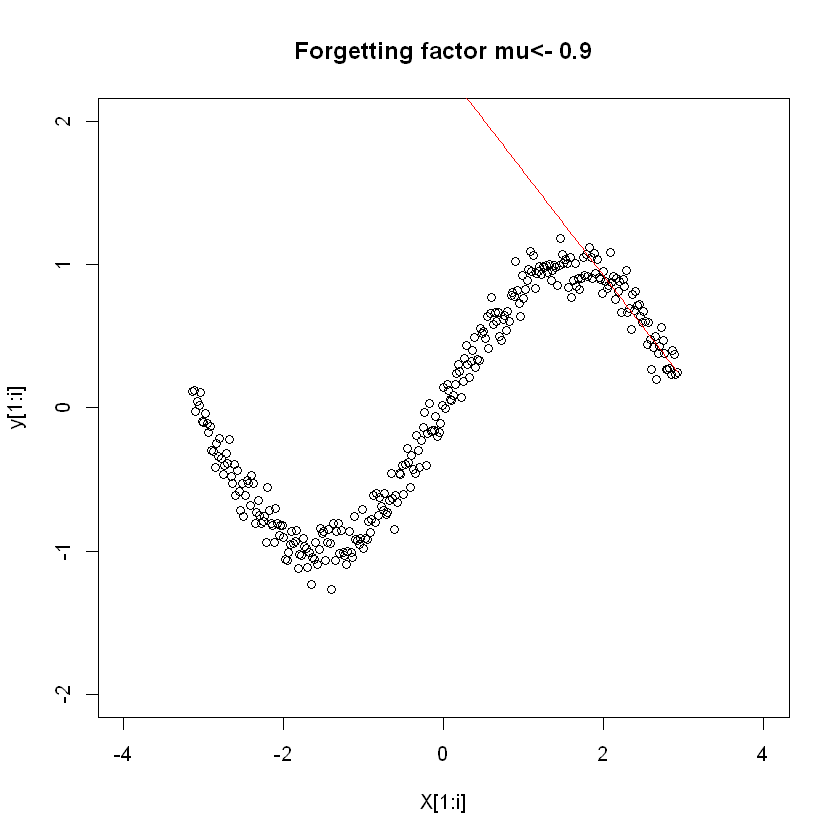

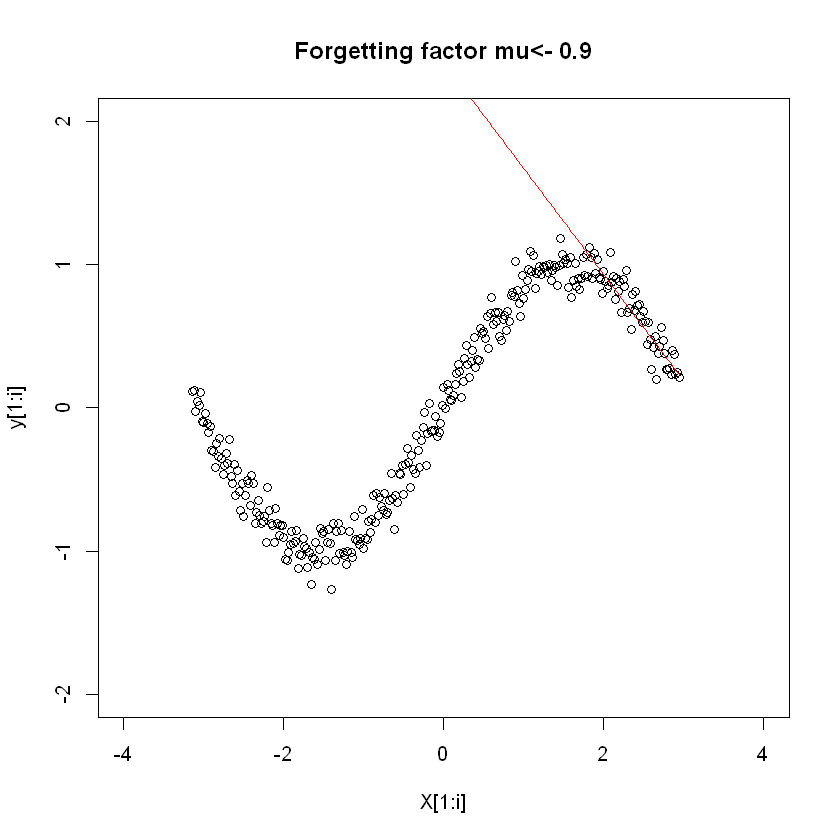

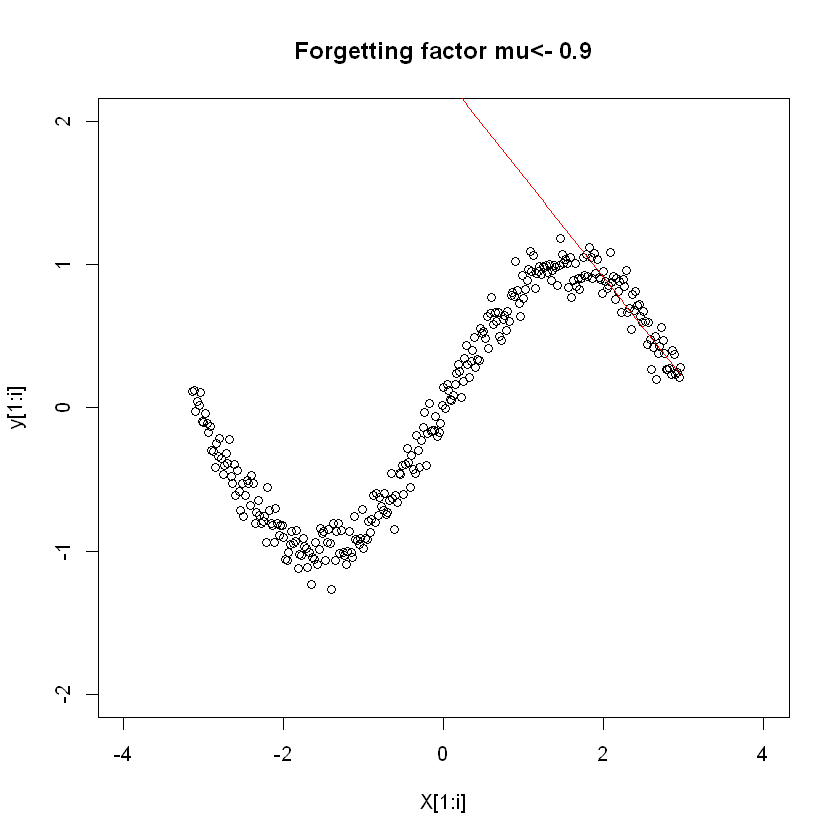

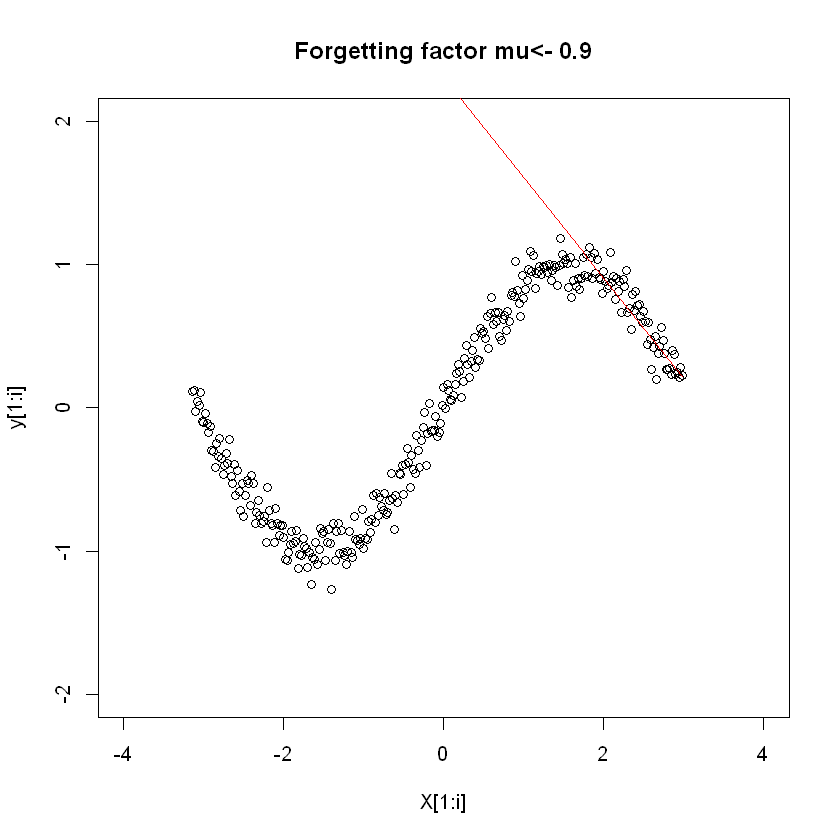

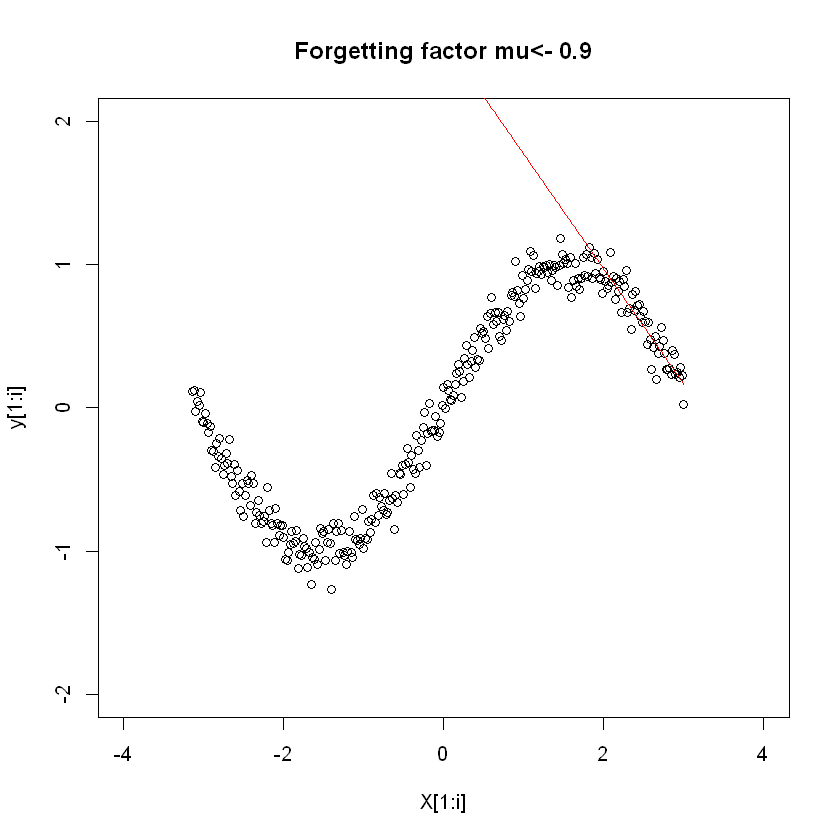

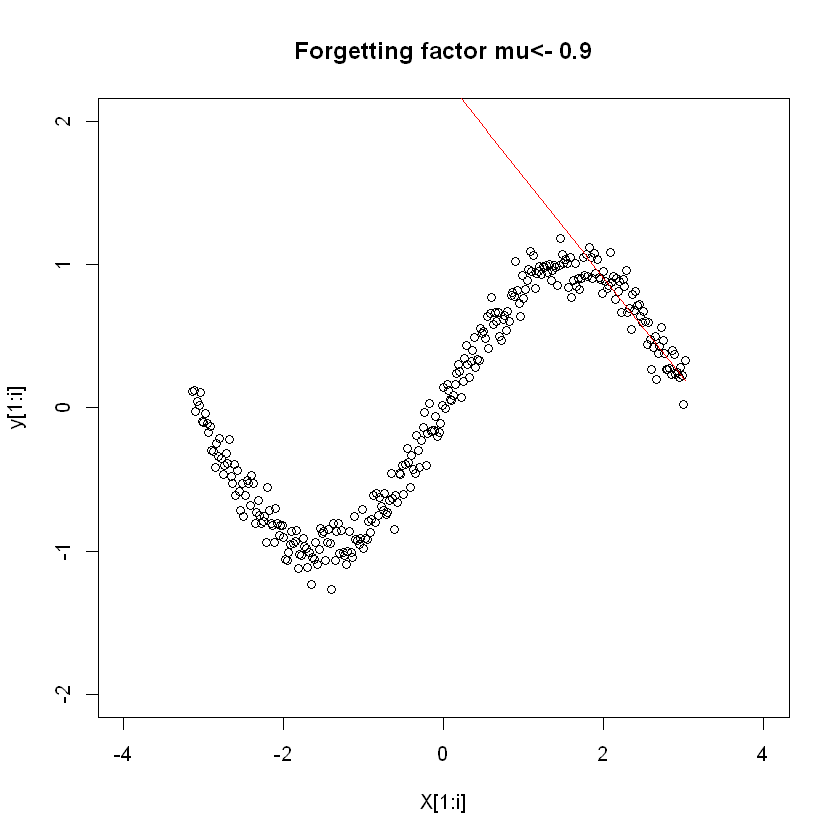

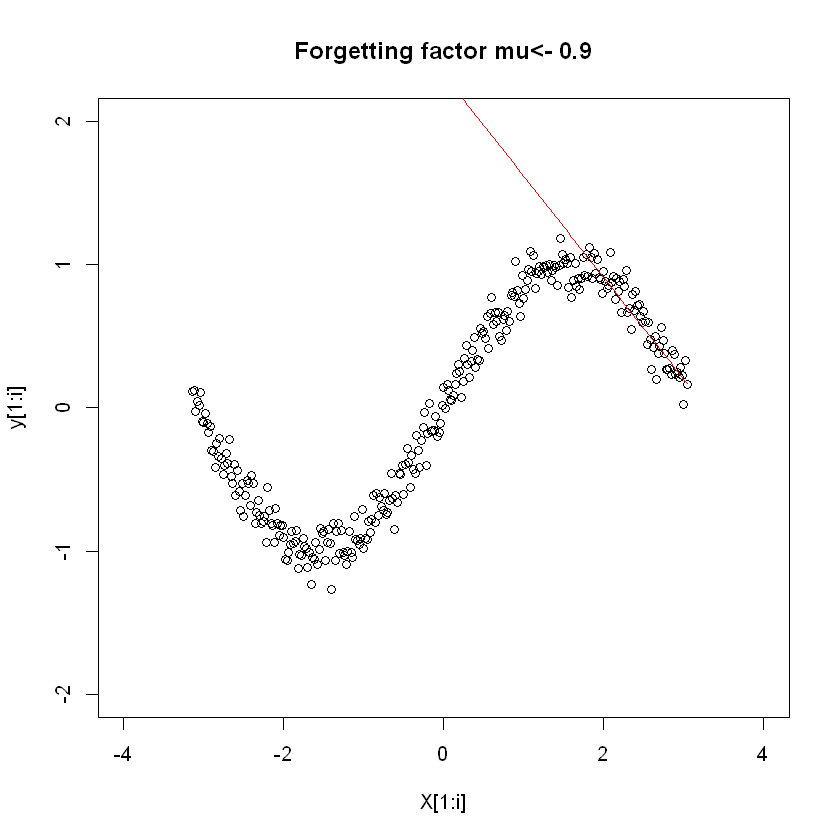

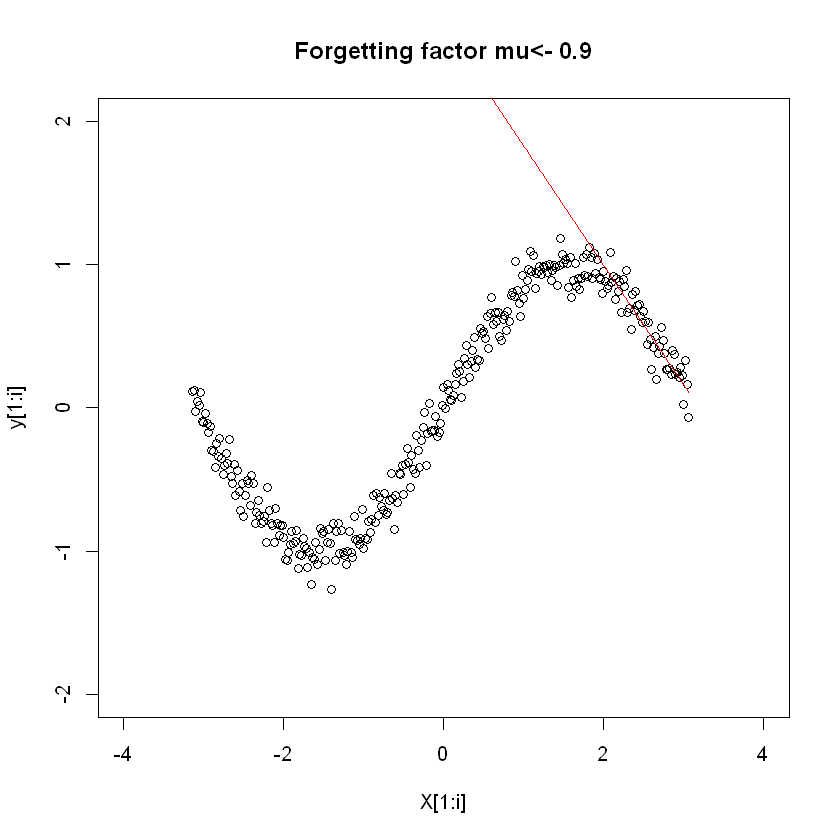

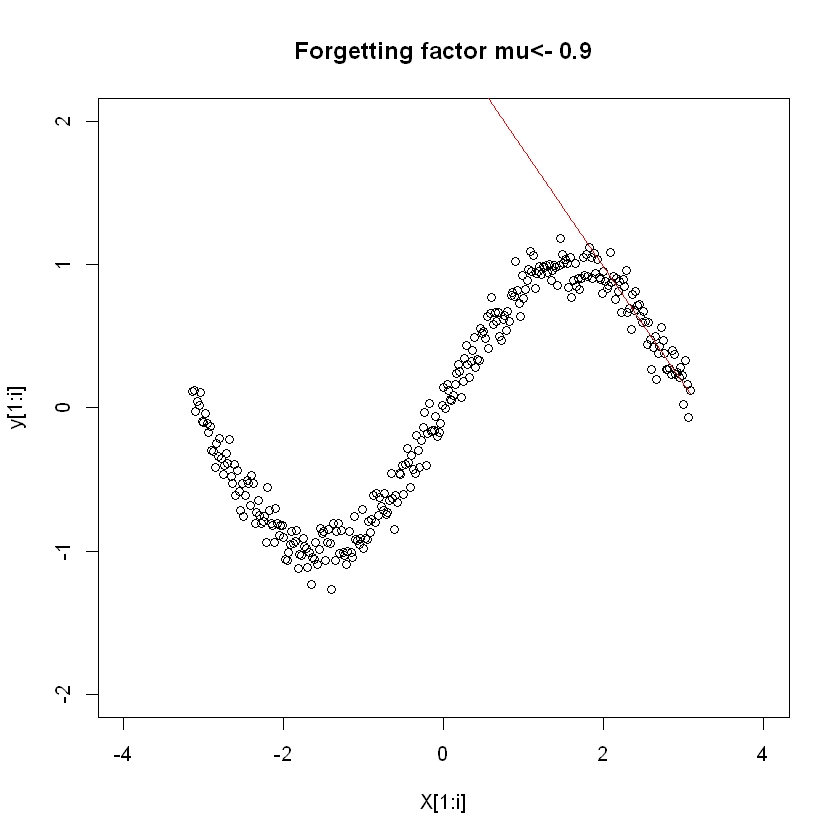

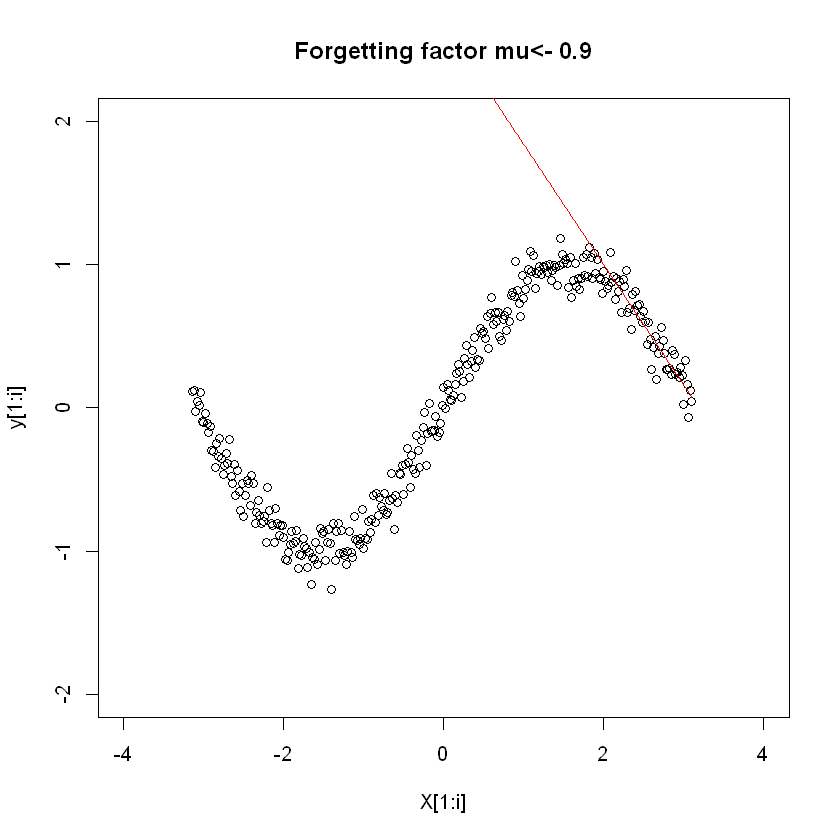

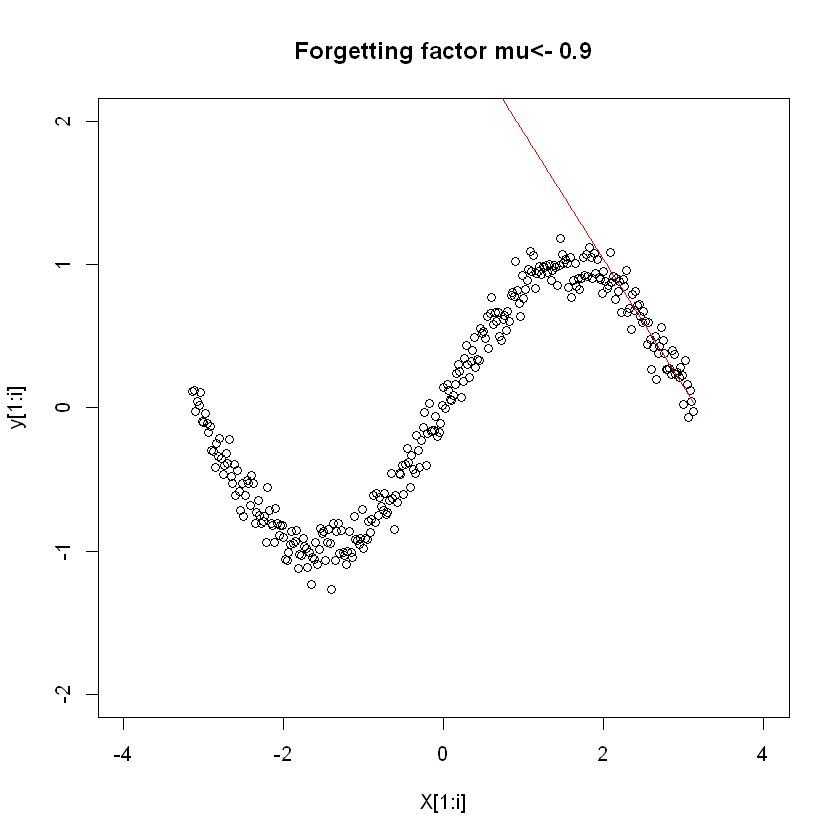

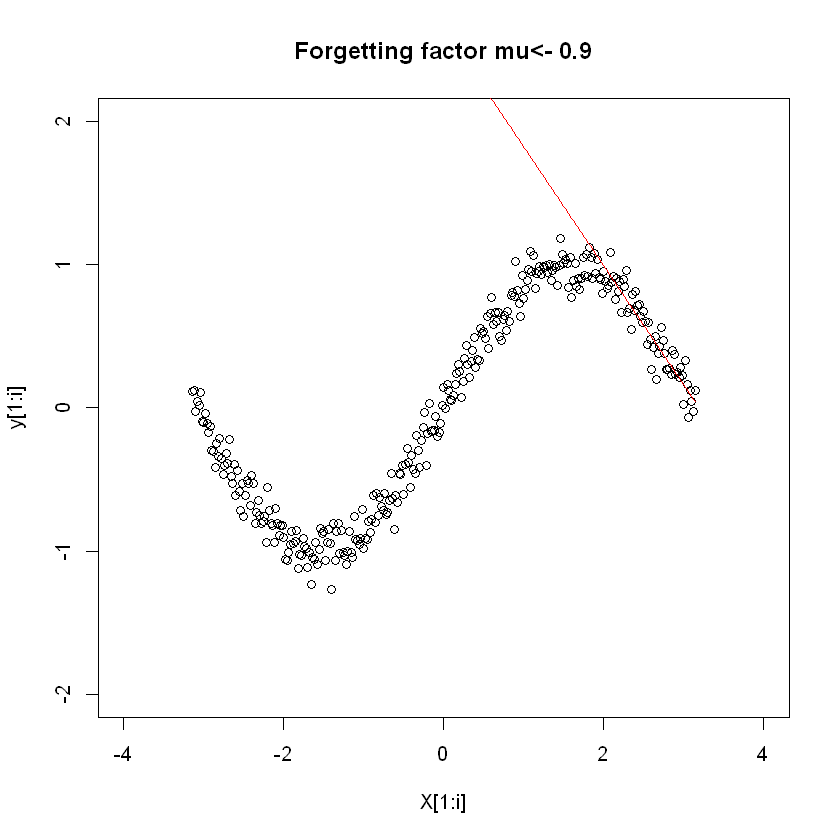

In [1]:
## script lin_rls.R
##
rm(list=ls())
par(ask=TRUE)
n<-1;

rls<-function(x,y,t,P,mu=1){

P.new <-(P-(P%*%x%*%x%*%P)/as.numeric(1+x%*%P%*%x))/mu
ga <- P.new%*%x
epsi <- y-x%*%t
t.new<-t+ga*as.numeric(epsi)
list(t.new,P.new)
}

X<-seq(-pi,pi,by=.02)
N<-length(X)

y<-sin(X)+0.1*rnorm(N)
t<-numeric(2)
P<-500*diag(n+1)
mu<-0.9
for (i in 1:N){
    rls.step<-rls(c(1, X[i]),y[i],t,P,mu)
    t<-rls.step[[1]]
    P<-rls.step[[2]]
    plot(X[1:i],y[1:i],
         xlim=c(-4,4),
         ylim=c(-2,2),
         main=paste("Forgetting factor mu<-",mu))
      lines(X[1:i],cbind(array(1,c(i,1)), X[1:i])%*%t,
         col="red",
         ) 
}

## Python

In [25]:
def rlse_online(aT_k1,b_k1,x,P): 

    
    K = np.dot(P,aT_k1.T)/(np.dot(np.dot(aT_k1,P),aT_k1.T)+1)

    x = x + K * (b_k1-np.dot(aT_k1,x))

    P = P-np.dot(K,np.dot(aT_k1,P))

    return x,K,P


Coefficients: [[ 0.4]
 [20. ]]


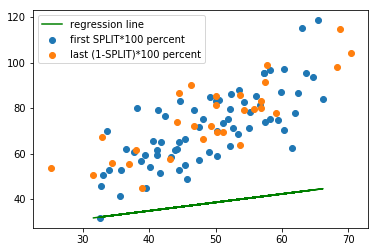

Coefficients: [[ 0.37064395]
 [19.99907066]]


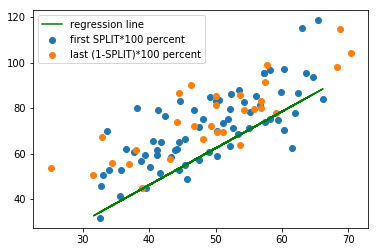

Coefficients: [[  1.61241278]
 [-18.29455438]]


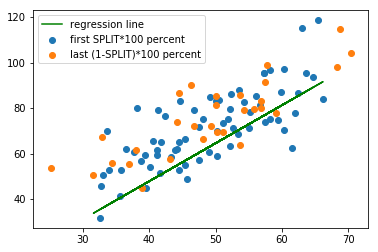

Coefficients: [[  1.67056798]
 [-18.98776869]]


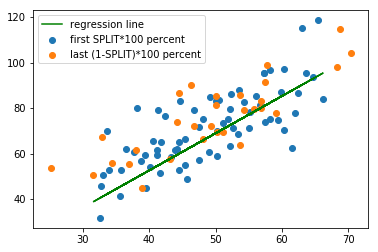

Coefficients: [[  1.63391256]
 [-12.7693179 ]]


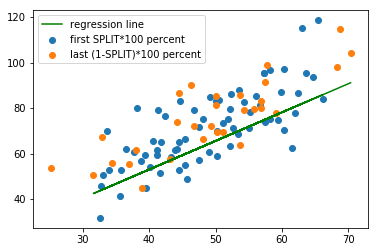

Coefficients: [[1.25600502]
 [2.75838969]]


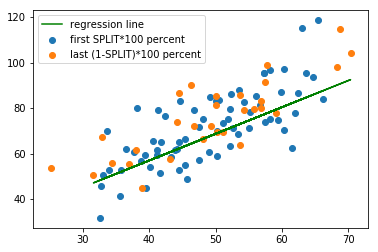

Coefficients: [[ 1.17104629]
 [10.112391  ]]


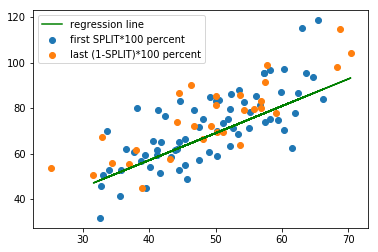

Coefficients: [[1.18965499]
 [9.5025157 ]]


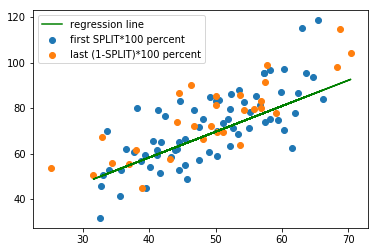

Coefficients: [[ 1.13069068]
 [13.04754087]]


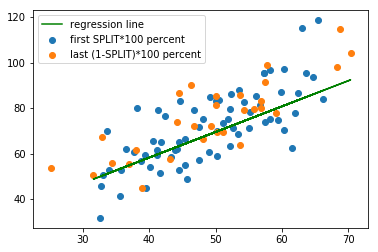

Coefficients: [[ 1.12566633]
 [13.20247855]]


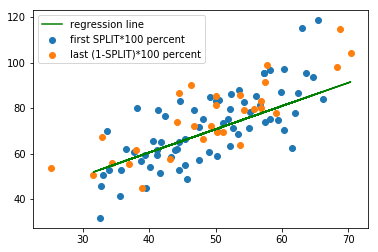

Coefficients: [[ 1.02142882]
 [19.61463817]]


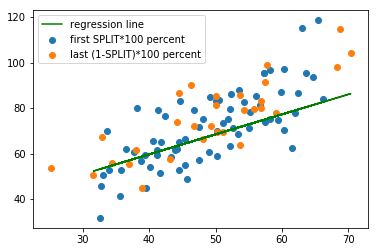

Coefficients: [[ 0.87777372]
 [24.55795806]]


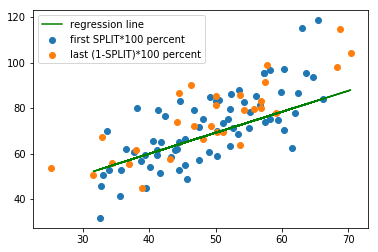

Coefficients: [[ 0.92217409]
 [23.03259604]]


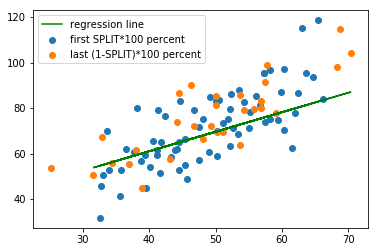

Coefficients: [[ 0.85717758]
 [26.728175  ]]


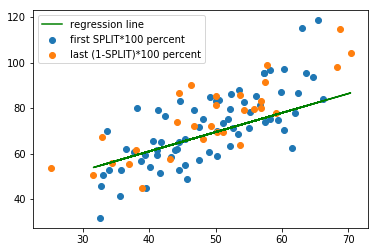

Coefficients: [[ 0.84541703]
 [27.16493313]]


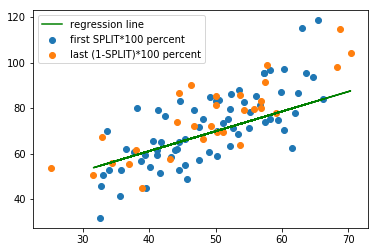

Coefficients: [[ 0.87095943]
 [26.25968299]]


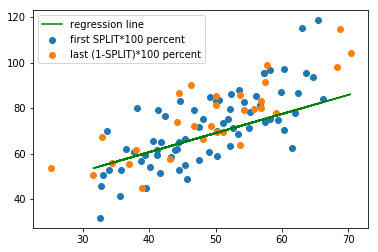

Coefficients: [[ 0.83885095]
 [27.06032698]]


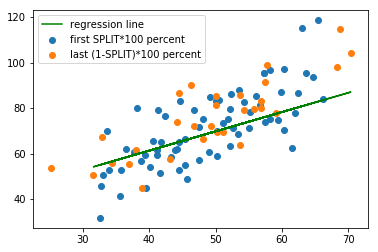

Coefficients: [[ 0.84733548]
 [27.39952274]]


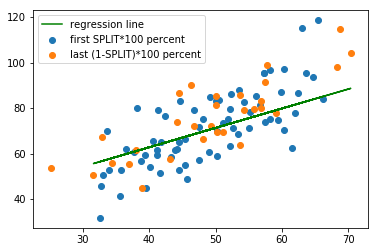

Coefficients: [[ 0.85243709]
 [28.66460761]]


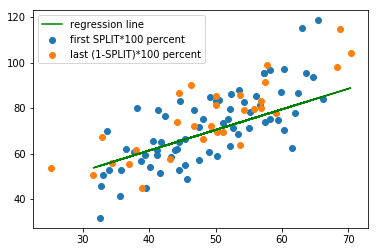

Coefficients: [[ 0.90543984]
 [25.11208719]]


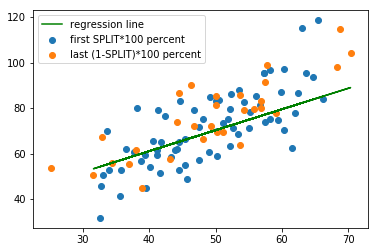

Coefficients: [[ 0.92064718]
 [24.23360538]]


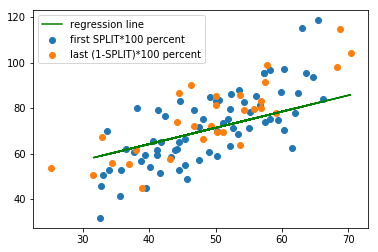

Coefficients: [[ 0.71341552]
 [35.63876772]]


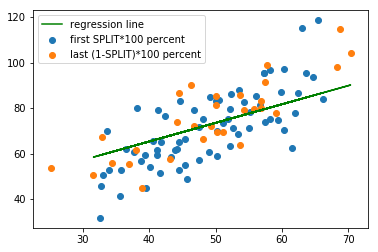

Coefficients: [[ 0.81777664]
 [32.60088984]]


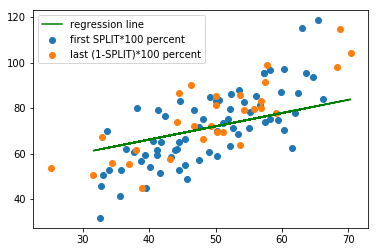

Coefficients: [[ 0.58211869]
 [42.87580402]]


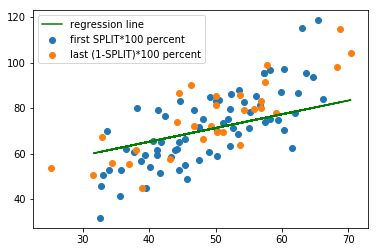

Coefficients: [[ 0.60376524]
 [41.04261075]]


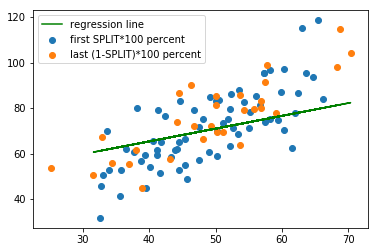

Coefficients: [[ 0.56096544]
 [42.90856121]]


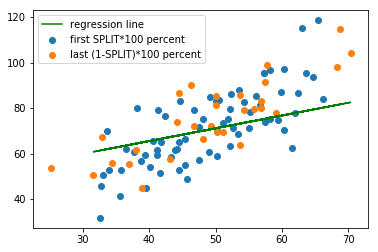

Coefficients: [[ 0.56093682]
 [43.05577617]]


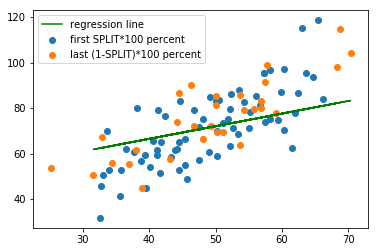

Coefficients: [[ 0.55436348]
 [44.30198622]]


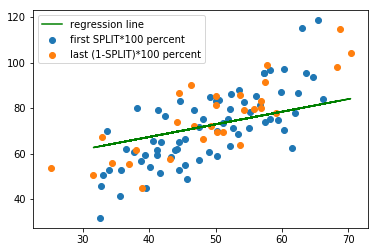

Coefficients: [[ 0.55449407]
 [45.12327482]]


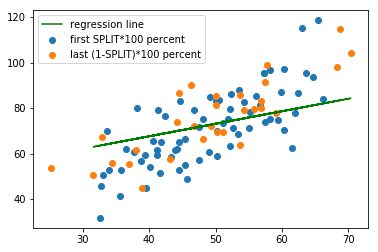

Coefficients: [[ 0.55006655]
 [45.59370208]]


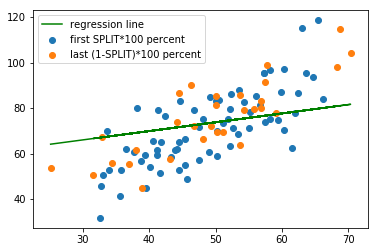

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('C:\\Users\\Paul\\Downloads\\PSEs\\data_new.csv',header=None)
D =df.values
SPLIT=0.7
t = D[0:int(D.shape[0]*SPLIT),0]
R = D[0:int(D.shape[0]*SPLIT),1]

#Find coefficients w for SPLIT percent of data points using least squares
phi_zero = t**0
phi_one = t**1
phi = np.column_stack((phi_one,phi_zero))
w = np.linalg.pinv(phi).dot(R)

Ak=np.column_stack((t**1,t**0))
bk=R

Pk=np.linalg.inv(Ak.T@Ak)


t_last = D[int(D.shape[0]*SPLIT):int(D.shape[0]),0]
R_last = D[int(D.shape[0]*SPLIT):int(D.shape[0]),1]

n=2
x=w
#print(x)
P =100*np.eye(n,n)


x=np.array([[0.4],[20]])

for k in range(0,int(D.shape[0]*(1-SPLIT))):
    
    print('Coefficients:',x)
    
    a_k1=np.array([t_last[k],1])
    a_k1=a_k1.reshape(1,2)
    A_k1=np.row_stack((Ak,a_k1))
    b_k1 =np.append(bk,R_last[k])
    
    
    
    [x,K,P] = rlse_online(a_k1,b_k1[k],x,P);
    
   
    
    #print(x.shape)
    phi =np.row_stack((phi,[t_last[k]**1 , t_last[k]**0]))
    
   # phi = np.column_stack((D[:,0]**1,D[:,0]**0)) 
    y_line=np.dot(phi,x)

    plt.scatter(t, R,label='first SPLIT*100 percent')
    plt.scatter(t_last, R_last,label='last (1-SPLIT)*100 percent')
    plt.plot(D[:phi.shape[0],0],y_line,'g',label='regression line')
    plt.legend()
    plt.show()